In [ ]:


from google.colab import drive
drive.mount('/content/gdrive')
!unzip gdrive/My\ Drive/data_new/chest_xray_new.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0512-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0513-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0514-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0515-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0516-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0517-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0517-0001-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0519-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0519-0001-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0519-0001-0002.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0520-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0521-0001.jpeg  
  inflating: chest_xray_new/chest_xray/train/NORMAL/IM-0522-0001.jpeg 

['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-8-c08764ab8d0f>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 25, 25, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 activation_7 (Activation)   (None, 25, 25, 128)       0         
                                                      

Test loss 0.20326966047286987
Test accuracy 0.9602920413017273


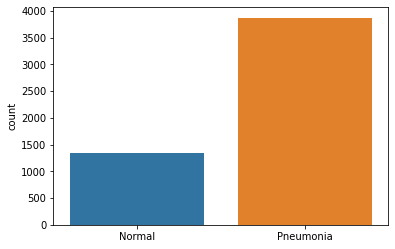

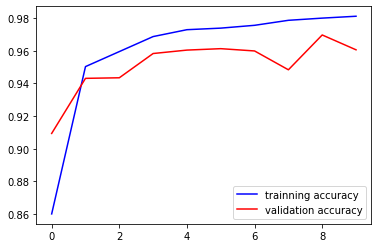

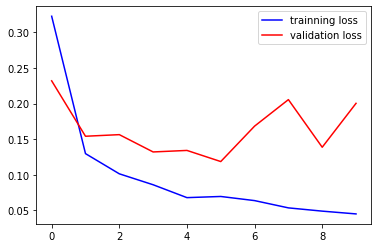

176/176 [==============================] - 1s 3ms/step


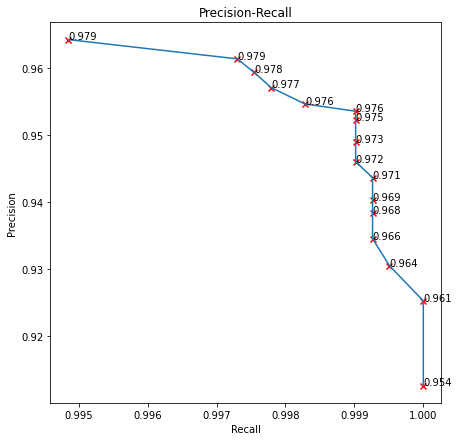

      Precision    Recall  F_score
0.10   0.912654  1.000000    0.954
0.15   0.925295  1.000000    0.961
0.20   0.930546  0.999509    0.964
0.25   0.934588  0.999264    0.966
0.30   0.938465  0.999264    0.968
0.35   0.940416  0.999264    0.969
0.40   0.943685  0.999264    0.971
0.45   0.946084  0.999018    0.972
0.50   0.948951  0.999018    0.973
0.55   0.952281  0.999018    0.975
0.60   0.953619  0.999018    0.976
0.65   0.954705  0.998282    0.976
0.70   0.957156  0.997791    0.977
0.75   0.959405  0.997546    0.978
0.80   0.961438  0.997301    0.979
0.85   0.964320  0.994847    0.979
The highest F-SCORE accepted in Threshold: 0.8000000000000002


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#-------------------------------------------
#   q1 cnn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,batch_size = 32, validation_data=(X_val, y_val))
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
##loading data
import cv2 as cv
import os
test_predictions = model.predict(X_test) 
Threshold_level=0.1
precision_y=[]
recall_x=[]
f_score_array=[]
plt.figure(figsize=(7,7))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
select_Thr,max_F_SCORE=0,0 ##select_Thr-The Threshold that give the highest F-SCORE
while(Threshold_level<=0.9):
  predict_label=test_predictions>=Threshold_level
  true_label=y_test
  TN,FP,FN,TP=confusion_matrix(true_label,predict_label,labels=(0,1)).ravel()
  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  f_score=round(2/((1/precision)+(1/recall)),3)
  f_score_array.append(f_score)
  if f_score>max_F_SCORE:
    max_F_SCORE=f_score
    select_Thr=Threshold_level
  precision_y.append(precision)
  recall_x.append(recall)
  plt.annotate(f_score,(recall,precision))
  plt.scatter(recall,precision,c='red',marker='x')
  Threshold_level+=0.05
plt.plot(recall_x,precision_y)
plt.show()
dict={"Precision":precision_y,"Recall":recall_x,"F_score":f_score_array}
brics = pd.DataFrame(dict)
brics.index =np.arange(0.1,0.9,0.05)
print (brics)
print("The highest F-SCORE accepted in Threshold:",select_Thr)


['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-7-83673bc9945d>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 zero_padding2d_4 (ZeroPadding2  (None, 56, 56, 3)   0           ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 25, 25, 64)   9408        ['zero_padding2d_4[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 25, 25, 64)   256         ['conv1/conv[0][0]']   

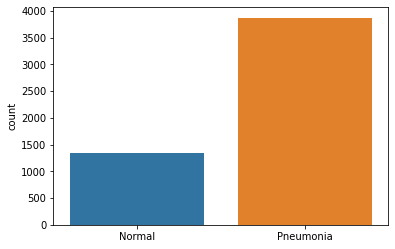

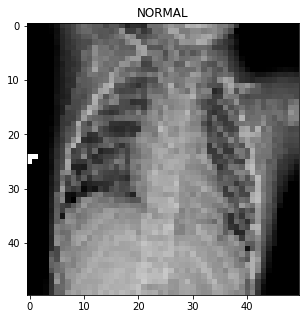

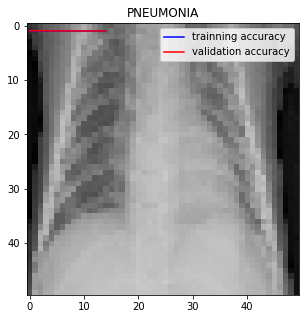

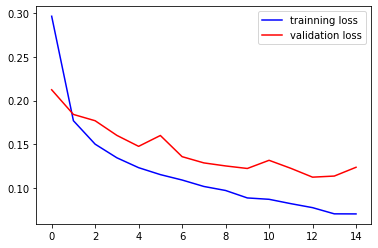

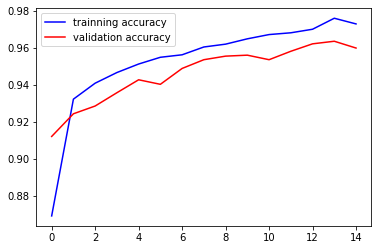

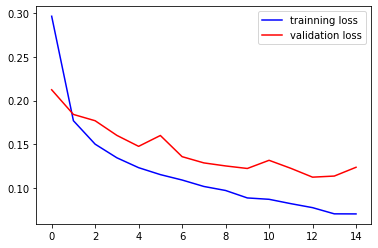

176/176 [==============================] - 6s 23ms/step


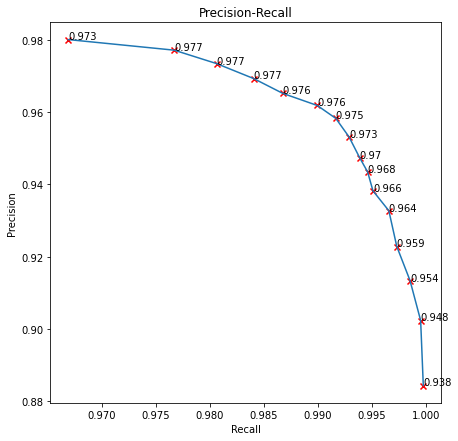

      Precision    Recall  F_score
0.10   0.884306  0.999755    0.938
0.15   0.902304  0.999509    0.948
0.20   0.913356  0.998528    0.954
0.25   0.922797  0.997301    0.959
0.30   0.932706  0.996564    0.964
0.35   0.938223  0.995092    0.966
0.40   0.943436  0.994601    0.968
0.45   0.947368  0.993865    0.970
0.50   0.953121  0.992883    0.973
0.55   0.958264  0.991656    0.975
0.60   0.961850  0.989939    0.976
0.65   0.965194  0.986748    0.976
0.70   0.969301  0.984049    0.977
0.75   0.973447  0.980613    0.977
0.80   0.977167  0.976687    0.977
0.85   0.980100  0.966871    0.973
The highest F-SCORE accepted in Threshold: 0.7000000000000001


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#-------------------------------------------
#   Q1 transfer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
print(os.listdir("chest_xray_new"))

DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])
 
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

base_model = tf.keras.applications.DenseNet121(
    weights='imagenet',
    input_shape=X_train.shape[1:],
    include_top=False)
base_model.trainable = False
base_model.summary()


inputs = tf.keras.Input(X_train.shape[1:])
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, output)

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

model.summary()
history = model.fit(X_train, y_train, epochs=15,batch_size = 32, validation_data=(X_val, y_val))
scores = model.evaluate(X_test, y_test)

print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
##loading data
import cv2 as cv
import os
test_predictions = model.predict(X_test) 
Threshold_level=0.1
precision_y=[]
recall_x=[]
f_score_array=[]
plt.figure(figsize=(7,7))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
select_Thr,max_F_SCORE=0,0 ##select_Thr-The Threshold that give the highest F-SCORE
while(Threshold_level<=0.9):
  predict_label=test_predictions>=Threshold_level
  true_label=y_test
  TN,FP,FN,TP=confusion_matrix(true_label,predict_label,labels=(0,1)).ravel()
  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  f_score=round(2/((1/precision)+(1/recall)),3)
  f_score_array.append(f_score)
  if f_score>max_F_SCORE:
    max_F_SCORE=f_score
    select_Thr=Threshold_level
  precision_y.append(precision)
  recall_x.append(recall)
  plt.annotate(f_score,(recall,precision))
  plt.scatter(recall,precision,c='red',marker='x')
  Threshold_level+=0.05
plt.plot(recall_x,precision_y)
plt.show()
dict={"Precision":precision_y,"Recall":recall_x,"F_score":f_score_array}
brics = pd.DataFrame(dict)
brics.index =np.arange(0.1,0.9,0.05)
print (brics)
print("The highest F-SCORE accepted in Threshold:",select_Thr)

['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-9-e4b63ac4ffbe>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 128)               131200    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                           

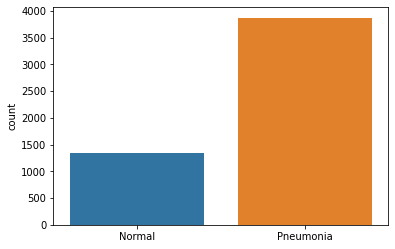

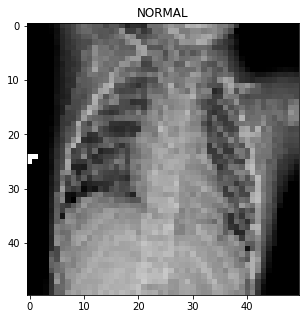

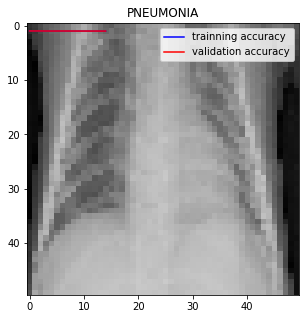

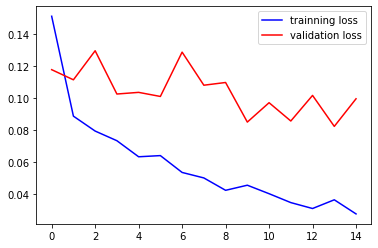

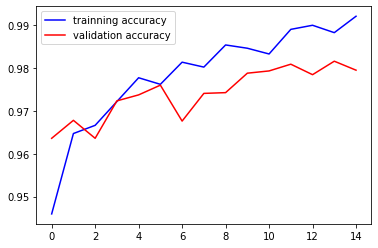

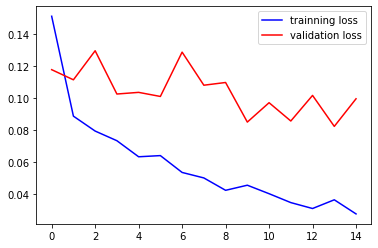

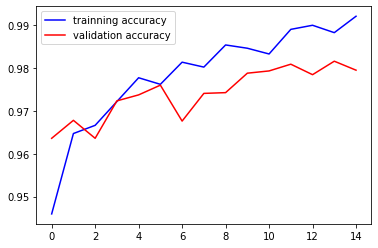

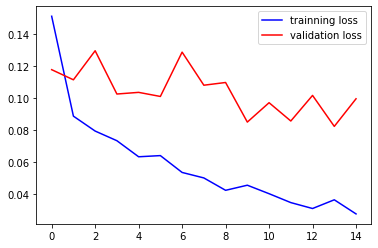

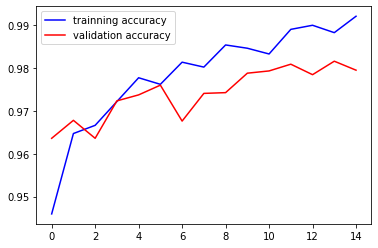

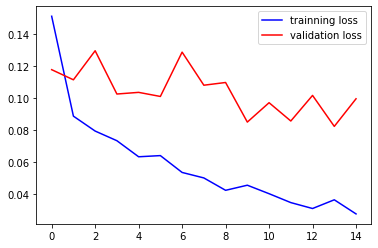

176/176 [==============================] - 5s 17ms/step


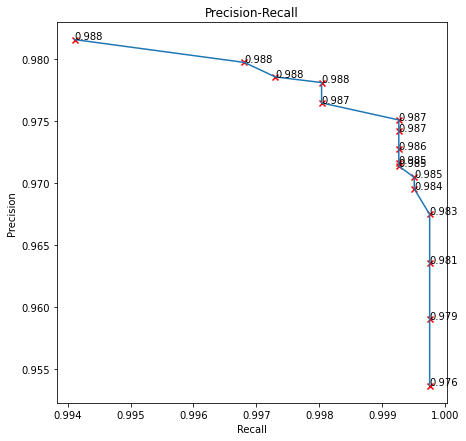

      Precision    Recall  F_score
0.10   0.953652  0.999755    0.976
0.15   0.959040  0.999755    0.979
0.20   0.963576  0.999755    0.981
0.25   0.967466  0.999755    0.983
0.30   0.969531  0.999509    0.984
0.35   0.970455  0.999509    0.985
0.40   0.971374  0.999264    0.985
0.45   0.971606  0.999264    0.985
0.50   0.972766  0.999264    0.986
0.55   0.974163  0.999264    0.987
0.60   0.975096  0.999264    0.987
0.65   0.976471  0.998037    0.987
0.70   0.978114  0.998037    0.988
0.75   0.978570  0.997301    0.988
0.80   0.979740  0.996810    0.988
0.85   0.981585  0.994110    0.988
The highest F-SCORE accepted in Threshold: 0.7000000000000001


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#-------------------------------------------
#   Q2 transfer with fine tuning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])
 
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

base_model = tf.keras.applications.DenseNet121(
    weights='imagenet',
    input_shape=X_train.shape[1:],
    include_top=False)
base_model.trainable = False


inputs = tf.keras.Input(X_train.shape[1:])
x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, output)

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

model.summary()
history = model.fit(X_train, y_train, epochs=15,batch_size = 32, validation_data=(X_val, y_val))
scores = model.evaluate(X_test, y_test)

print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))

for layer in base_model.layers[-1:-20:-1]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(3e-4),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

model.summary()
history = model.fit(X_train, y_train, epochs=15,batch_size = 32, validation_data=(X_val, y_val))
scores = model.evaluate(X_test, y_test)

print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
##loading data
import cv2 as cv
import os
test_predictions = model.predict(X_test) 
Threshold_level=0.1
precision_y=[]
recall_x=[]
f_score_array=[]
plt.figure(figsize=(7,7))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
select_Thr,max_F_SCORE=0,0 ##select_Thr-The Threshold that give the highest F-SCORE
while(Threshold_level<=0.9):
  predict_label=test_predictions>=Threshold_level
  true_label=y_test
  TN,FP,FN,TP=confusion_matrix(true_label,predict_label,labels=(0,1)).ravel()
  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  f_score=round(2/((1/precision)+(1/recall)),3)
  f_score_array.append(f_score)
  if f_score>max_F_SCORE:
    max_F_SCORE=f_score
    select_Thr=Threshold_level
  precision_y.append(precision)
  recall_x.append(recall)
  plt.annotate(f_score,(recall,precision))
  plt.scatter(recall,precision,c='red',marker='x')
  Threshold_level+=0.05
plt.plot(recall_x,precision_y)
plt.show()
dict={"Precision":precision_y,"Recall":recall_x,"F_score":f_score_array}
brics = pd.DataFrame(dict)
brics.index =np.arange(0.1,0.9,0.05)
print (brics)
print("The highest F-SCORE accepted in Threshold:",select_Thr)

In [ ]:
from keras.saving.legacy.serialization import DisableSharedObjectScope
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#-------------------------------------------
#   Q3 CNN
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
import matplotlib.pyplot as plt
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs=10,batch_size = 32, validation_data=(X_val, y_val))

#optimizers = [tf.keras.optimizers.SGD(), tf.keras.optimizers.SGD(momentum=0.9), tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop()]
from keras.optimizers import SGD,Adam,RMSprop
optimizers=[SGD,Adam,RMSprop]
# Define a list of learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Define the number of epochs to train each model


# Train the model for each combination of optimization algorithm and learning rate
for optimizer in optimizers:
    for learning_rate in learning_rates:
        for epochs in range(5 ,20,1):
            model = Sequential()

            model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(2, 2))
            model.add(Dropout(0.25))

            model.add(Conv2D(128, (3, 3), padding="same"))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(2, 2))
            model.add(Dropout(0.25))


            model.add(Flatten())
            model.add(Dense(512, activation="relu"))

            model.add(Dense(1))
            model.add(Activation("sigmoid"))
            model.summary()
            model.compile(loss="binary_crossentropy", optimizer=optimizer(learning_rate=learning_rate), metrics=["accuracy"])
            history = model.fit(X_train, y_train, epochs=epochs,batch_size = 32, validation_data=(X_val, y_val))
            scores = model.evaluate(X_test, y_test)
            print('Optimizer:', optimizer, 'Learning rate:', learning_rate)
             # scores
            print("Test loss {}".format(scores[0]))
            print("Test accuracy {}".format(scores[1]))
            # visualization

            accuracy = history.history['accuracy']
            val_accuracy = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(accuracy))

            plt.plot(epochs, accuracy, "b", label="trainning accuracy")
            plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
            plt.legend()
            plt.show()

            plt.plot(epochs, loss, "b", label="trainning loss")
            plt.plot(epochs, val_loss, "r", label="validation loss")
            plt.legend()
            plt.show()

for learning_rate in learning_rates:
    for epochs in range(5 ,20,1):
        model = Sequential()

        model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(2, 2))
        model.add(Dropout(0.25))

        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(2, 2))
        model.add(Dropout(0.25))


        model.add(Flatten())
        model.add(Dense(512, activation="relu"))

        model.add(Dense(1))
        model.add(Activation("sigmoid"))
        model.summary()
        model.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=learning_rate,momentum=0.9), metrics=["accuracy"])
        history = model.fit(X_train, y_train, epochs=epochs,batch_size = 32, validation_data=(X_val, y_val))
        scores = model.evaluate(X_test, y_test)
        print('Optimizer:', "sgd with 0.9 momentom", 'Learning rate:', learning_rate)
        # scores
        print("Test loss {}".format(scores[0]))
        print("Test accuracy {}".format(scores[1]))
        # visualization

        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(len(accuracy))

        plt.plot(epochs, accuracy, "b", label="trainning accuracy")
        plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
        plt.legend()
        plt.show()

        plt.plot(epochs, loss, "b", label="trainning loss")
        plt.plot(epochs, val_loss, "r", label="validation loss")
        plt.legend()
        plt.show()

['chest_xray']
['chest_xray']


FileNotFoundError: ignored

['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-3-cc68632171c4>:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Epoch 1/5
163/163 [==============================] - 17s 71ms/step - loss: 0.3151 - accuracy: 0.8804 - val_loss: 0.2705 - val_accuracy: 0.9047
Epoch 2/5
163/163 [==============================] - 7s 42ms/step - loss: 0.2618 - accuracy: 0.8903 - val_loss: 0.2211 - val_accuracy: 0.9020
Epoch 3/5
163/163 [==============================] - 8s 50ms/step - loss: 0.2354 - accuracy: 0.8848 - val_loss: 0.2276 - val_accuracy: 0.8998
Epoch 4/5
163/163 [==============================] - 9s 57ms/step - loss: 0.2566 - accuracy: 0.8825 - val_loss: 0.2686 - val_accuracy: 0.9199
Epoch 5/5
176/176 [==============================] - 4s 21ms/step - loss: 0.2463 - accuracy: 0.9097
Optimizer: sgd with 0.9 momentom Learning rate: 0.1
Test loss 0.24628609418869019
Test accuracy 0.9097222089767456


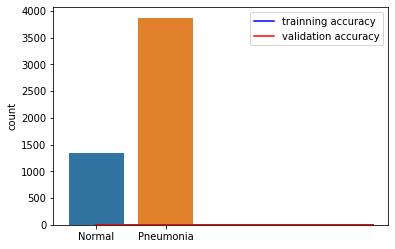

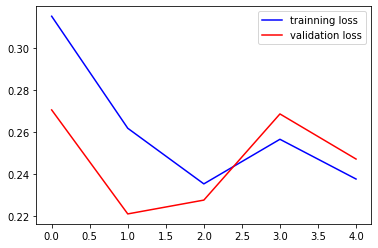

Epoch 1/6
163/163 [==============================] - 18s 67ms/step - loss: 0.3098 - accuracy: 0.8852 - val_loss: 0.2424 - val_accuracy: 0.9059
Epoch 2/6
163/163 [==============================] - 8s 51ms/step - loss: 0.2583 - accuracy: 0.8988 - val_loss: 0.2284 - val_accuracy: 0.8784
Epoch 3/6
163/163 [==============================] - 7s 42ms/step - loss: 0.2512 - accuracy: 0.8930 - val_loss: 0.2014 - val_accuracy: 0.9097
Epoch 4/6
163/163 [==============================] - 8s 50ms/step - loss: 0.2265 - accuracy: 0.9076 - val_loss: 0.2393 - val_accuracy: 0.8922
Epoch 5/6
163/163 [==============================] - 7s 41ms/step - loss: 0.2478 - accuracy: 0.8980 - val_loss: 0.2202 - val_accuracy: 0.8835
Epoch 6/6
176/176 [==============================] - 5s 31ms/step - loss: 0.2454 - accuracy: 0.9211
Optimizer: sgd with 0.9 momentom Learning rate: 0.1
Test loss 0.24542368948459625
Test accuracy 0.9211182594299316


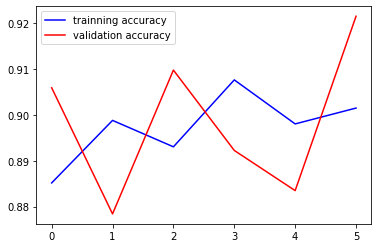

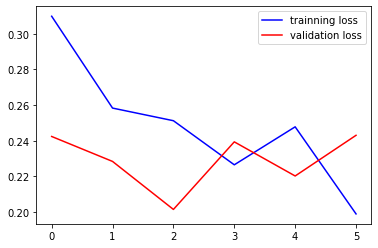

Epoch 1/7
163/163 [==============================] - 16s 54ms/step - loss: 0.3328 - accuracy: 0.8685 - val_loss: 0.2158 - val_accuracy: 0.8851
Epoch 2/7
163/163 [==============================] - 6s 37ms/step - loss: 0.2405 - accuracy: 0.8946 - val_loss: 0.2025 - val_accuracy: 0.9134
Epoch 3/7
163/163 [==============================] - 8s 49ms/step - loss: 0.2732 - accuracy: 0.8827 - val_loss: 0.2366 - val_accuracy: 0.9097
Epoch 4/7
163/163 [==============================] - 6s 34ms/step - loss: 0.2569 - accuracy: 0.8848 - val_loss: 0.2796 - val_accuracy: 0.8728
Epoch 5/7
163/163 [==============================] - 6s 36ms/step - loss: 0.2249 - accuracy: 0.8888 - val_loss: 0.2456 - val_accuracy: 0.9125
Epoch 6/7
163/163 [==============================] - 6s 38ms/step - loss: 0.2063 - accuracy: 0.9082 - val_loss: 0.2290 - val_accuracy: 0.8767
Epoch 7/7
176/176 [==============================] - 4s 24ms/step - loss: 0.3325 - accuracy: 0.8526
Optimizer: sgd with 0.9 momentom Learning rate:

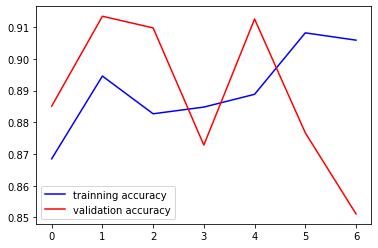

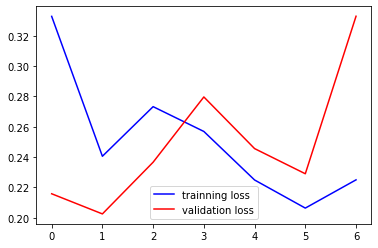

Epoch 1/8
163/163 [==============================] - 14s 53ms/step - loss: 0.2776 - accuracy: 0.8867 - val_loss: 0.1968 - val_accuracy: 0.9183
Epoch 2/8
163/163 [==============================] - 6s 36ms/step - loss: 0.2637 - accuracy: 0.8959 - val_loss: 0.2385 - val_accuracy: 0.8635
Epoch 3/8
163/163 [==============================] - 6s 37ms/step - loss: 0.2695 - accuracy: 0.8869 - val_loss: 0.3119 - val_accuracy: 0.9078
Epoch 4/8
163/163 [==============================] - 5s 33ms/step - loss: 0.2811 - accuracy: 0.8668 - val_loss: 0.2808 - val_accuracy: 0.9064
Epoch 5/8
163/163 [==============================] - 9s 56ms/step - loss: 0.2359 - accuracy: 0.8882 - val_loss: 0.2331 - val_accuracy: 0.9255
Epoch 6/8
163/163 [==============================] - 6s 36ms/step - loss: 0.2192 - accuracy: 0.9032 - val_loss: 0.1988 - val_accuracy: 0.9120
Epoch 7/8
163/163 [==============================] - 6s 38ms/step - loss: 0.2142 - accuracy: 0.9091 - val_loss: 0.2895 - val_accuracy: 0.9169
Epoch

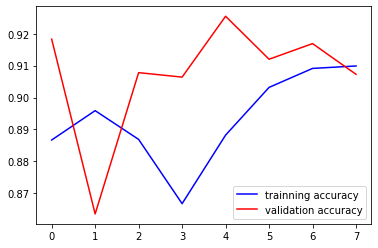

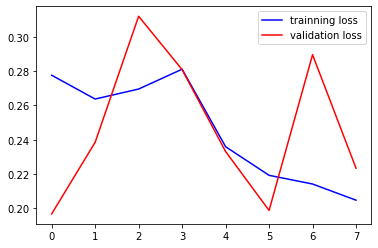

Epoch 1/9
163/163 [==============================] - 17s 63ms/step - loss: 0.3338 - accuracy: 0.8813 - val_loss: 0.2550 - val_accuracy: 0.8887
Epoch 2/9
163/163 [==============================] - 8s 50ms/step - loss: 0.2537 - accuracy: 0.8923 - val_loss: 0.5722 - val_accuracy: 0.8893
Epoch 3/9
163/163 [==============================] - 7s 41ms/step - loss: 0.2606 - accuracy: 0.8832 - val_loss: 0.2477 - val_accuracy: 0.8894
Epoch 4/9
163/163 [==============================] - 6s 34ms/step - loss: 0.2612 - accuracy: 0.8995 - val_loss: 0.2322 - val_accuracy: 0.9068
Epoch 5/9
163/163 [==============================] - 9s 54ms/step - loss: 0.2253 - accuracy: 0.9064 - val_loss: 0.2486 - val_accuracy: 0.9089
Epoch 6/9
163/163 [==============================] - 6s 35ms/step - loss: 0.2582 - accuracy: 0.8947 - val_loss: 0.2857 - val_accuracy: 0.9022
Epoch 7/9
163/163 [==============================] - 7s 42ms/step - loss: 0.3042 - accuracy: 0.8658 - val_loss: 0.2352 - val_accuracy: 0.9013
Epoch

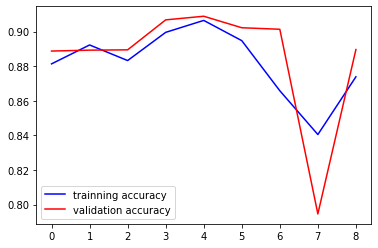

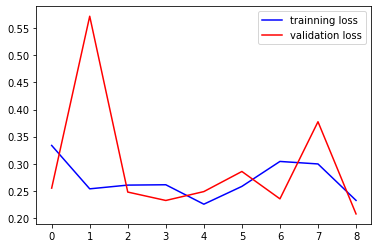

Epoch 1/10
163/163 [==============================] - 17s 69ms/step - loss: 0.2846 - accuracy: 0.8984 - val_loss: 0.2061 - val_accuracy: 0.9124
Epoch 2/10
163/163 [==============================] - 7s 41ms/step - loss: 0.2152 - accuracy: 0.9087 - val_loss: 0.2527 - val_accuracy: 0.8681
Epoch 3/10
163/163 [==============================] - 8s 50ms/step - loss: 0.2373 - accuracy: 0.8969 - val_loss: 0.2174 - val_accuracy: 0.9178
Epoch 4/10
163/163 [==============================] - 7s 41ms/step - loss: 0.2250 - accuracy: 0.9082 - val_loss: 0.2070 - val_accuracy: 0.9036
Epoch 5/10
163/163 [==============================] - 8s 50ms/step - loss: 0.2405 - accuracy: 0.8940 - val_loss: 0.2080 - val_accuracy: 0.9131
Epoch 6/10
163/163 [==============================] - 7s 40ms/step - loss: 0.2588 - accuracy: 0.8859 - val_loss: 0.2867 - val_accuracy: 0.8579
Epoch 7/10
163/163 [==============================] - 6s 34ms/step - loss: 0.2379 - accuracy: 0.9009 - val_loss: 0.4104 - val_accuracy: 0.907

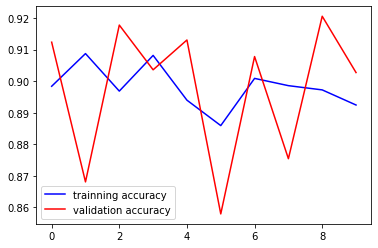

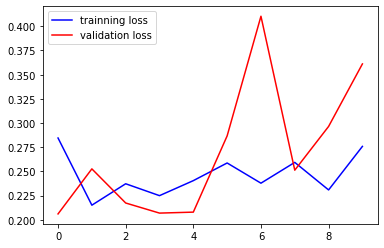

Epoch 1/11
163/163 [==============================] - 18s 64ms/step - loss: 0.2920 - accuracy: 0.8909 - val_loss: 0.2294 - val_accuracy: 0.9026
Epoch 2/11
163/163 [==============================] - 6s 36ms/step - loss: 0.2610 - accuracy: 0.9001 - val_loss: 0.4419 - val_accuracy: 0.8980
Epoch 3/11
163/163 [==============================] - 8s 51ms/step - loss: 0.3048 - accuracy: 0.8863 - val_loss: 0.2957 - val_accuracy: 0.8768
Epoch 4/11
163/163 [==============================] - 8s 51ms/step - loss: 0.2657 - accuracy: 0.8671 - val_loss: 0.2009 - val_accuracy: 0.9043
Epoch 5/11
163/163 [==============================] - 7s 41ms/step - loss: 0.2268 - accuracy: 0.8944 - val_loss: 0.2812 - val_accuracy: 0.9017
Epoch 6/11
163/163 [==============================] - 6s 35ms/step - loss: 0.2831 - accuracy: 0.8510 - val_loss: 0.2559 - val_accuracy: 0.9040
Epoch 7/11
163/163 [==============================] - 8s 52ms/step - loss: 0.2834 - accuracy: 0.8738 - val_loss: 0.2684 - val_accuracy: 0.914

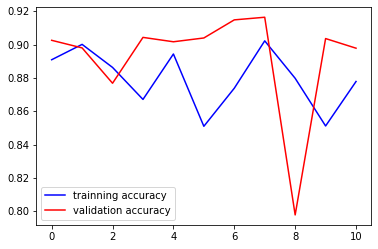

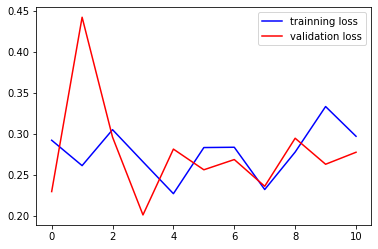

Epoch 1/12
163/163 [==============================] - 17s 70ms/step - loss: 0.2921 - accuracy: 0.8901 - val_loss: 0.2795 - val_accuracy: 0.8403
Epoch 2/12
163/163 [==============================] - 6s 38ms/step - loss: 0.2606 - accuracy: 0.8917 - val_loss: 0.6341 - val_accuracy: 0.8453
Epoch 3/12
163/163 [==============================] - 6s 37ms/step - loss: 0.2523 - accuracy: 0.8919 - val_loss: 0.2402 - val_accuracy: 0.8709
Epoch 4/12
163/163 [==============================] - 6s 34ms/step - loss: 0.2333 - accuracy: 0.8955 - val_loss: 0.1905 - val_accuracy: 0.9197
Epoch 5/12
163/163 [==============================] - 7s 41ms/step - loss: 0.2212 - accuracy: 0.9045 - val_loss: 0.2751 - val_accuracy: 0.8828
Epoch 6/12
163/163 [==============================] - 8s 50ms/step - loss: 0.2368 - accuracy: 0.8951 - val_loss: 0.2139 - val_accuracy: 0.9026
Epoch 7/12
163/163 [==============================] - 9s 55ms/step - loss: 0.2317 - accuracy: 0.8961 - val_loss: 0.2106 - val_accuracy: 0.905

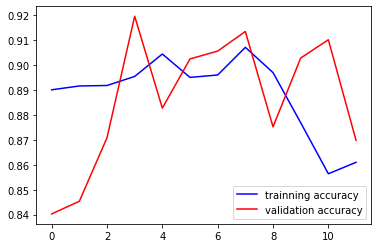

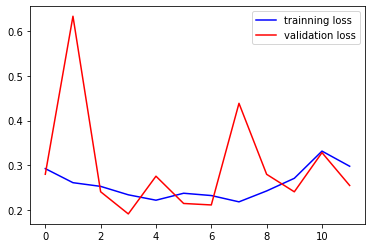

Epoch 1/13
163/163 [==============================] - 15s 62ms/step - loss: 0.3101 - accuracy: 0.8721 - val_loss: 0.3203 - val_accuracy: 0.8585
Epoch 2/13
163/163 [==============================] - 8s 50ms/step - loss: 0.2567 - accuracy: 0.8947 - val_loss: 0.2260 - val_accuracy: 0.9052
Epoch 3/13
163/163 [==============================] - 6s 34ms/step - loss: 0.2639 - accuracy: 0.8976 - val_loss: 0.2612 - val_accuracy: 0.8849
Epoch 4/13
163/163 [==============================] - 7s 41ms/step - loss: 0.2725 - accuracy: 0.8928 - val_loss: 0.2992 - val_accuracy: 0.8901
Epoch 5/13
163/163 [==============================] - 8s 50ms/step - loss: 0.2499 - accuracy: 0.9039 - val_loss: 0.2624 - val_accuracy: 0.9096
Epoch 6/13
163/163 [==============================] - 9s 54ms/step - loss: 0.2310 - accuracy: 0.9003 - val_loss: 0.2046 - val_accuracy: 0.9185
Epoch 7/13
163/163 [==============================] - 8s 50ms/step - loss: 0.2404 - accuracy: 0.9038 - val_loss: 0.2458 - val_accuracy: 0.911

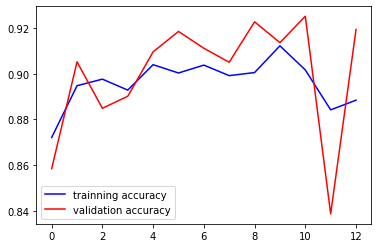

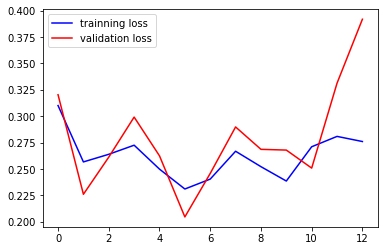

Epoch 1/14
163/163 [==============================] - 17s 64ms/step - loss: 0.2648 - accuracy: 0.8924 - val_loss: 0.2087 - val_accuracy: 0.9183
Epoch 2/14
163/163 [==============================] - 6s 35ms/step - loss: 0.2444 - accuracy: 0.8978 - val_loss: 0.2330 - val_accuracy: 0.8963
Epoch 3/14
163/163 [==============================] - 6s 38ms/step - loss: 0.2524 - accuracy: 0.8938 - val_loss: 0.2124 - val_accuracy: 0.9083
Epoch 4/14
163/163 [==============================] - 6s 38ms/step - loss: 0.2642 - accuracy: 0.8901 - val_loss: 0.2314 - val_accuracy: 0.9111
Epoch 5/14
163/163 [==============================] - 6s 34ms/step - loss: 0.2489 - accuracy: 0.8974 - val_loss: 0.2187 - val_accuracy: 0.9041
Epoch 6/14
163/163 [==============================] - 7s 40ms/step - loss: 0.2390 - accuracy: 0.8970 - val_loss: 0.2890 - val_accuracy: 0.8854
Epoch 7/14
163/163 [==============================] - 8s 50ms/step - loss: 0.2568 - accuracy: 0.8783 - val_loss: 0.2946 - val_accuracy: 0.913

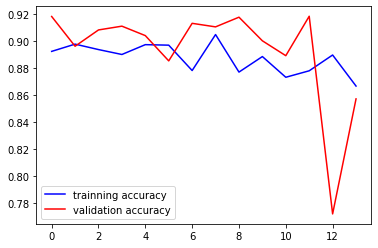

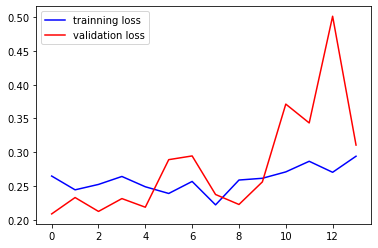

Epoch 1/15
163/163 [==============================] - 15s 55ms/step - loss: 0.3364 - accuracy: 0.8771 - val_loss: 0.3149 - val_accuracy: 0.7978
Epoch 2/15
163/163 [==============================] - 6s 34ms/step - loss: 0.2624 - accuracy: 0.8829 - val_loss: 0.2390 - val_accuracy: 0.9006
Epoch 3/15
163/163 [==============================] - 7s 41ms/step - loss: 0.2795 - accuracy: 0.8802 - val_loss: 0.2177 - val_accuracy: 0.9131
Epoch 4/15
163/163 [==============================] - 6s 35ms/step - loss: 0.3087 - accuracy: 0.8692 - val_loss: 0.2904 - val_accuracy: 0.8947
Epoch 5/15
163/163 [==============================] - 6s 40ms/step - loss: 0.2807 - accuracy: 0.8767 - val_loss: 0.3730 - val_accuracy: 0.8998
Epoch 6/15
163/163 [==============================] - 6s 36ms/step - loss: 0.2682 - accuracy: 0.8723 - val_loss: 0.3089 - val_accuracy: 0.8485
Epoch 7/15
163/163 [==============================] - 8s 50ms/step - loss: 0.2515 - accuracy: 0.8744 - val_loss: 0.2485 - val_accuracy: 0.902

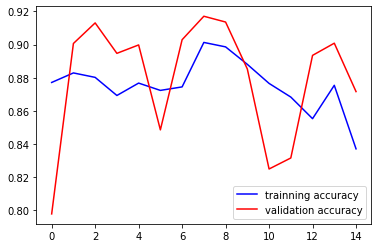

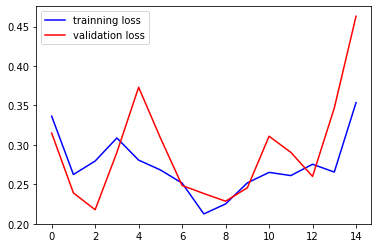

Epoch 1/16
163/163 [==============================] - 15s 55ms/step - loss: 0.2987 - accuracy: 0.8827 - val_loss: 0.2633 - val_accuracy: 0.9020
Epoch 2/16
163/163 [==============================] - 6s 34ms/step - loss: 0.2745 - accuracy: 0.8898 - val_loss: 0.2514 - val_accuracy: 0.8851
Epoch 3/16
163/163 [==============================] - 9s 55ms/step - loss: 0.2391 - accuracy: 0.8995 - val_loss: 0.2373 - val_accuracy: 0.8620
Epoch 4/16
163/163 [==============================] - 6s 34ms/step - loss: 0.2288 - accuracy: 0.8915 - val_loss: 0.3039 - val_accuracy: 0.9113
Epoch 5/16
163/163 [==============================] - 7s 42ms/step - loss: 0.2250 - accuracy: 0.9118 - val_loss: 0.1792 - val_accuracy: 0.9351
Epoch 6/16
163/163 [==============================] - 6s 34ms/step - loss: 0.2434 - accuracy: 0.8909 - val_loss: 0.2284 - val_accuracy: 0.9171
Epoch 7/16
163/163 [==============================] - 7s 42ms/step - loss: 0.2283 - accuracy: 0.8969 - val_loss: 0.2226 - val_accuracy: 0.898

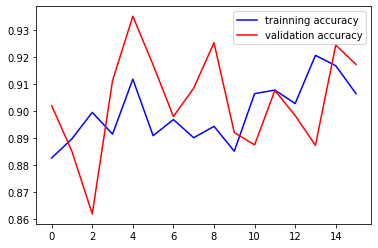

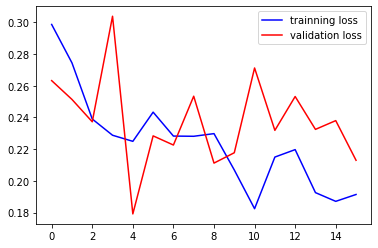

Epoch 1/17
163/163 [==============================] - 18s 70ms/step - loss: 0.3586 - accuracy: 0.8589 - val_loss: 0.2531 - val_accuracy: 0.8942
Epoch 2/17
163/163 [==============================] - 8s 51ms/step - loss: 0.2465 - accuracy: 0.8980 - val_loss: 0.2360 - val_accuracy: 0.8679
Epoch 3/17
163/163 [==============================] - 8s 51ms/step - loss: 0.2577 - accuracy: 0.8738 - val_loss: 0.2466 - val_accuracy: 0.8782
Epoch 4/17
163/163 [==============================] - 7s 42ms/step - loss: 0.2564 - accuracy: 0.8758 - val_loss: 0.2132 - val_accuracy: 0.8887
Epoch 5/17
163/163 [==============================] - 8s 50ms/step - loss: 0.2286 - accuracy: 0.8972 - val_loss: 0.3274 - val_accuracy: 0.8894
Epoch 6/17
163/163 [==============================] - 7s 41ms/step - loss: 0.2194 - accuracy: 0.8928 - val_loss: 0.2290 - val_accuracy: 0.9104
Epoch 7/17
163/163 [==============================] - 6s 35ms/step - loss: 0.2133 - accuracy: 0.9016 - val_loss: 0.3016 - val_accuracy: 0.833

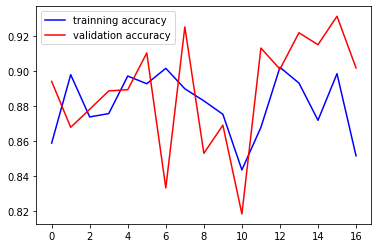

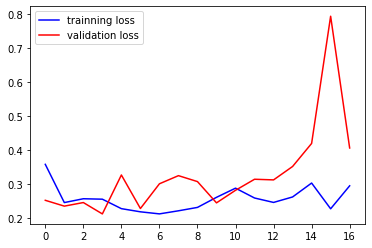

Epoch 1/18
163/163 [==============================] - 15s 52ms/step - loss: 0.2636 - accuracy: 0.8965 - val_loss: 0.2736 - val_accuracy: 0.9120
Epoch 2/18
163/163 [==============================] - 6s 37ms/step - loss: 0.2518 - accuracy: 0.9024 - val_loss: 0.4770 - val_accuracy: 0.8819
Epoch 3/18
163/163 [==============================] - 8s 50ms/step - loss: 0.2475 - accuracy: 0.8995 - val_loss: 0.4217 - val_accuracy: 0.9029
Epoch 4/18
163/163 [==============================] - 6s 34ms/step - loss: 0.2510 - accuracy: 0.8817 - val_loss: 0.2079 - val_accuracy: 0.9213
Epoch 5/18
163/163 [==============================] - 6s 40ms/step - loss: 0.2075 - accuracy: 0.9070 - val_loss: 0.3024 - val_accuracy: 0.9176
Epoch 6/18
163/163 [==============================] - 6s 35ms/step - loss: 0.2181 - accuracy: 0.9105 - val_loss: 0.2219 - val_accuracy: 0.9230
Epoch 7/18
163/163 [==============================] - 8s 50ms/step - loss: 0.2090 - accuracy: 0.9061 - val_loss: 0.1876 - val_accuracy: 0.923

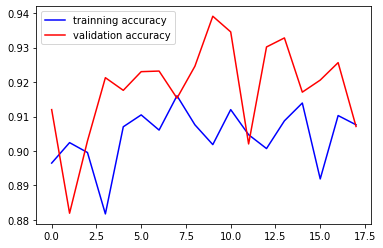

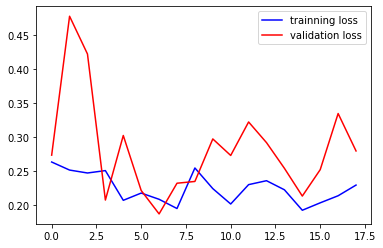

Epoch 1/19
163/163 [==============================] - 17s 64ms/step - loss: 0.2986 - accuracy: 0.8924 - val_loss: 0.2358 - val_accuracy: 0.8931
Epoch 2/19
163/163 [==============================] - 6s 35ms/step - loss: 0.2594 - accuracy: 0.8880 - val_loss: 0.2459 - val_accuracy: 0.9185
Epoch 3/19
163/163 [==============================] - 9s 53ms/step - loss: 0.2515 - accuracy: 0.8905 - val_loss: 0.2466 - val_accuracy: 0.9017
Epoch 4/19
163/163 [==============================] - 8s 50ms/step - loss: 0.2288 - accuracy: 0.9036 - val_loss: 0.2574 - val_accuracy: 0.9225
Epoch 5/19
163/163 [==============================] - 6s 40ms/step - loss: 0.2459 - accuracy: 0.8980 - val_loss: 0.2250 - val_accuracy: 0.9027
Epoch 6/19
163/163 [==============================] - 6s 34ms/step - loss: 0.2606 - accuracy: 0.8963 - val_loss: 0.2987 - val_accuracy: 0.9251
Epoch 7/19
163/163 [==============================] - 9s 57ms/step - loss: 0.2742 - accuracy: 0.8921 - val_loss: 0.2723 - val_accuracy: 0.924

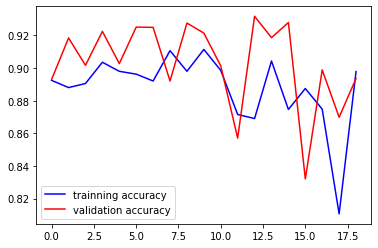

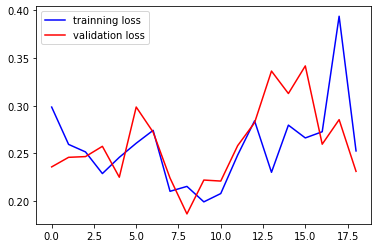

Epoch 1/5
163/163 [==============================] - 17s 64ms/step - loss: 0.2312 - accuracy: 0.9038 - val_loss: 0.1747 - val_accuracy: 0.9368
Epoch 2/5
163/163 [==============================] - 7s 42ms/step - loss: 0.1517 - accuracy: 0.9392 - val_loss: 0.1549 - val_accuracy: 0.9398
Epoch 3/5
163/163 [==============================] - 6s 35ms/step - loss: 0.1228 - accuracy: 0.9538 - val_loss: 0.1382 - val_accuracy: 0.9500
Epoch 4/5
163/163 [==============================] - 7s 42ms/step - loss: 0.1078 - accuracy: 0.9597 - val_loss: 0.1197 - val_accuracy: 0.9573
Epoch 5/5
176/176 [==============================] - 4s 22ms/step - loss: 0.1121 - accuracy: 0.9574
Optimizer: sgd with 0.9 momentom Learning rate: 0.01
Test loss 0.11213252693414688
Test accuracy 0.9574429988861084


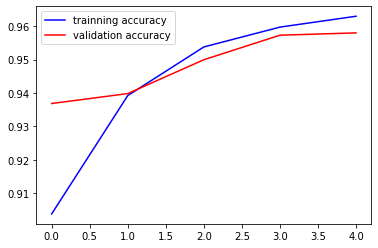

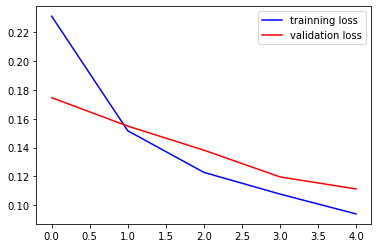

Epoch 1/6
163/163 [==============================] - 18s 68ms/step - loss: 0.2359 - accuracy: 0.9049 - val_loss: 0.1993 - val_accuracy: 0.9269
Epoch 2/6
163/163 [==============================] - 9s 56ms/step - loss: 0.1458 - accuracy: 0.9390 - val_loss: 0.1426 - val_accuracy: 0.9440
Epoch 3/6
163/163 [==============================] - 8s 51ms/step - loss: 0.1299 - accuracy: 0.9488 - val_loss: 0.1295 - val_accuracy: 0.9515
Epoch 4/6
163/163 [==============================] - 6s 35ms/step - loss: 0.1061 - accuracy: 0.9580 - val_loss: 0.1333 - val_accuracy: 0.9543
Epoch 5/6
163/163 [==============================] - 7s 40ms/step - loss: 0.0886 - accuracy: 0.9628 - val_loss: 0.1074 - val_accuracy: 0.9643
Epoch 6/6
176/176 [==============================] - 3s 19ms/step - loss: 0.1330 - accuracy: 0.9571
Optimizer: sgd with 0.9 momentom Learning rate: 0.01
Test loss 0.1330169141292572
Test accuracy 0.9570869207382202


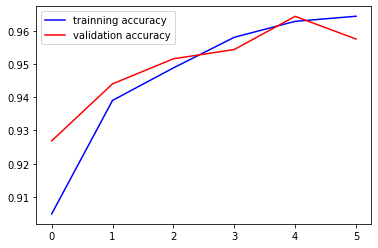

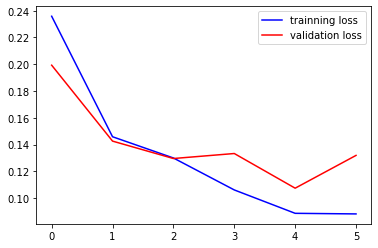

Epoch 1/7
163/163 [==============================] - 15s 56ms/step - loss: 0.2360 - accuracy: 0.9011 - val_loss: 0.1956 - val_accuracy: 0.9227
Epoch 2/7
163/163 [==============================] - 6s 35ms/step - loss: 0.1466 - accuracy: 0.9400 - val_loss: 0.1623 - val_accuracy: 0.9351
Epoch 3/7
163/163 [==============================] - 9s 56ms/step - loss: 0.1260 - accuracy: 0.9513 - val_loss: 0.1257 - val_accuracy: 0.9557
Epoch 4/7
163/163 [==============================] - 6s 35ms/step - loss: 0.1118 - accuracy: 0.9580 - val_loss: 0.1100 - val_accuracy: 0.9640
Epoch 5/7
163/163 [==============================] - 7s 42ms/step - loss: 0.0973 - accuracy: 0.9588 - val_loss: 0.1063 - val_accuracy: 0.9675
Epoch 6/7
163/163 [==============================] - 6s 35ms/step - loss: 0.0899 - accuracy: 0.9624 - val_loss: 0.1439 - val_accuracy: 0.9550
Epoch 7/7
176/176 [==============================] - 4s 24ms/step - loss: 0.0983 - accuracy: 0.9701
Optimizer: sgd with 0.9 momentom Learning rate:

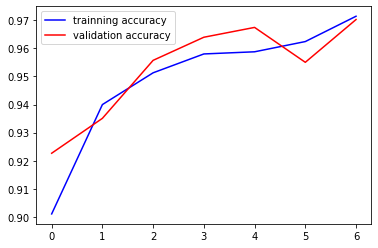

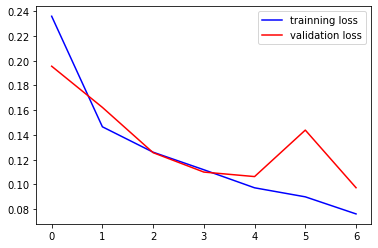

Epoch 1/8
163/163 [==============================] - 16s 57ms/step - loss: 0.2459 - accuracy: 0.9024 - val_loss: 0.1826 - val_accuracy: 0.9304
Epoch 2/8
163/163 [==============================] - 9s 56ms/step - loss: 0.1593 - accuracy: 0.9365 - val_loss: 0.1675 - val_accuracy: 0.9344
Epoch 3/8
163/163 [==============================] - 6s 35ms/step - loss: 0.1283 - accuracy: 0.9490 - val_loss: 0.1512 - val_accuracy: 0.9417
Epoch 4/8
163/163 [==============================] - 10s 59ms/step - loss: 0.1057 - accuracy: 0.9578 - val_loss: 0.1268 - val_accuracy: 0.9542
Epoch 5/8
163/163 [==============================] - 6s 38ms/step - loss: 0.0978 - accuracy: 0.9615 - val_loss: 0.1087 - val_accuracy: 0.9647
Epoch 6/8
163/163 [==============================] - 6s 39ms/step - loss: 0.0819 - accuracy: 0.9716 - val_loss: 0.1293 - val_accuracy: 0.9605
Epoch 7/8
163/163 [==============================] - 6s 35ms/step - loss: 0.0759 - accuracy: 0.9720 - val_loss: 0.1457 - val_accuracy: 0.9584
Epoc

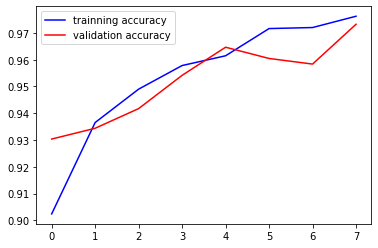

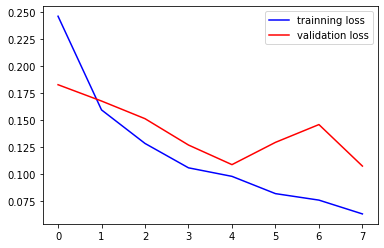

Epoch 1/9
163/163 [==============================] - 17s 64ms/step - loss: 0.2455 - accuracy: 0.9043 - val_loss: 0.1809 - val_accuracy: 0.9290
Epoch 2/9
163/163 [==============================] - 6s 35ms/step - loss: 0.1492 - accuracy: 0.9375 - val_loss: 0.1484 - val_accuracy: 0.9431
Epoch 3/9
163/163 [==============================] - 7s 42ms/step - loss: 0.1270 - accuracy: 0.9523 - val_loss: 0.1321 - val_accuracy: 0.9514
Epoch 4/9
163/163 [==============================] - 6s 35ms/step - loss: 0.1142 - accuracy: 0.9549 - val_loss: 0.1182 - val_accuracy: 0.9584
Epoch 5/9
163/163 [==============================] - 6s 39ms/step - loss: 0.1087 - accuracy: 0.9599 - val_loss: 0.1135 - val_accuracy: 0.9606
Epoch 6/9
163/163 [==============================] - 6s 37ms/step - loss: 0.0949 - accuracy: 0.9630 - val_loss: 0.1247 - val_accuracy: 0.9589
Epoch 7/9
163/163 [==============================] - 8s 51ms/step - loss: 0.0804 - accuracy: 0.9668 - val_loss: 0.1031 - val_accuracy: 0.9694
Epoch

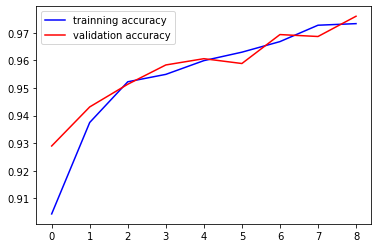

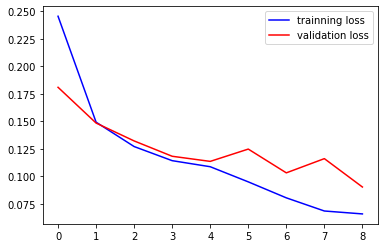

Epoch 1/10
163/163 [==============================] - 17s 69ms/step - loss: 0.2299 - accuracy: 0.9061 - val_loss: 0.1831 - val_accuracy: 0.9318
Epoch 2/10
163/163 [==============================] - 8s 51ms/step - loss: 0.1501 - accuracy: 0.9402 - val_loss: 0.1948 - val_accuracy: 0.9193
Epoch 3/10
163/163 [==============================] - 8s 52ms/step - loss: 0.1368 - accuracy: 0.9436 - val_loss: 0.1454 - val_accuracy: 0.9484
Epoch 4/10
163/163 [==============================] - 7s 43ms/step - loss: 0.1173 - accuracy: 0.9532 - val_loss: 0.1219 - val_accuracy: 0.9577
Epoch 5/10
163/163 [==============================] - 8s 51ms/step - loss: 0.1085 - accuracy: 0.9567 - val_loss: 0.1095 - val_accuracy: 0.9620
Epoch 6/10
163/163 [==============================] - 9s 57ms/step - loss: 0.0907 - accuracy: 0.9641 - val_loss: 0.1031 - val_accuracy: 0.9659
Epoch 7/10
163/163 [==============================] - 8s 51ms/step - loss: 0.0777 - accuracy: 0.9712 - val_loss: 0.1271 - val_accuracy: 0.961

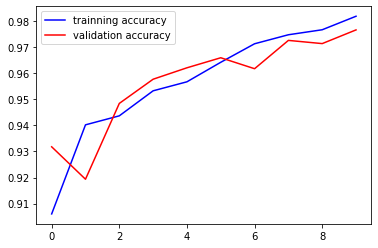

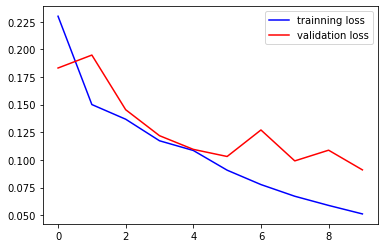

Epoch 1/11
163/163 [==============================] - 18s 72ms/step - loss: 0.2302 - accuracy: 0.9066 - val_loss: 0.1900 - val_accuracy: 0.9265
Epoch 2/11
163/163 [==============================] - 7s 42ms/step - loss: 0.1521 - accuracy: 0.9429 - val_loss: 0.1577 - val_accuracy: 0.9389
Epoch 3/11
163/163 [==============================] - 8s 51ms/step - loss: 0.1223 - accuracy: 0.9532 - val_loss: 0.1332 - val_accuracy: 0.9515
Epoch 4/11
163/163 [==============================] - 9s 57ms/step - loss: 0.1070 - accuracy: 0.9594 - val_loss: 0.1214 - val_accuracy: 0.9557
Epoch 5/11
163/163 [==============================] - 8s 51ms/step - loss: 0.0983 - accuracy: 0.9620 - val_loss: 0.1079 - val_accuracy: 0.9624
Epoch 6/11
163/163 [==============================] - 8s 51ms/step - loss: 0.0915 - accuracy: 0.9624 - val_loss: 0.1265 - val_accuracy: 0.9564
Epoch 7/11
163/163 [==============================] - 9s 56ms/step - loss: 0.0822 - accuracy: 0.9666 - val_loss: 0.1042 - val_accuracy: 0.968

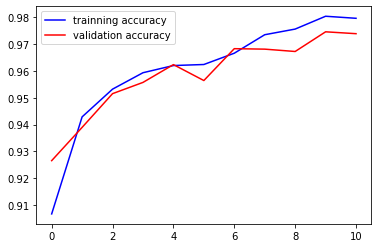

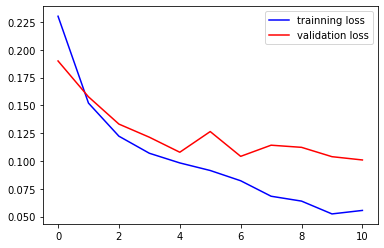

Epoch 1/12
163/163 [==============================] - 16s 53ms/step - loss: 0.2194 - accuracy: 0.9068 - val_loss: 0.2300 - val_accuracy: 0.9054
Epoch 2/12
163/163 [==============================] - 7s 41ms/step - loss: 0.1527 - accuracy: 0.9385 - val_loss: 0.1439 - val_accuracy: 0.9517
Epoch 3/12
163/163 [==============================] - 6s 36ms/step - loss: 0.1249 - accuracy: 0.9540 - val_loss: 0.1335 - val_accuracy: 0.9517
Epoch 4/12
163/163 [==============================] - 8s 51ms/step - loss: 0.1015 - accuracy: 0.9594 - val_loss: 0.1314 - val_accuracy: 0.9550
Epoch 5/12
163/163 [==============================] - 6s 35ms/step - loss: 0.0995 - accuracy: 0.9618 - val_loss: 0.1319 - val_accuracy: 0.9571
Epoch 6/12
163/163 [==============================] - 8s 50ms/step - loss: 0.0890 - accuracy: 0.9651 - val_loss: 0.1027 - val_accuracy: 0.9678
Epoch 7/12
163/163 [==============================] - 6s 35ms/step - loss: 0.0827 - accuracy: 0.9670 - val_loss: 0.1116 - val_accuracy: 0.968

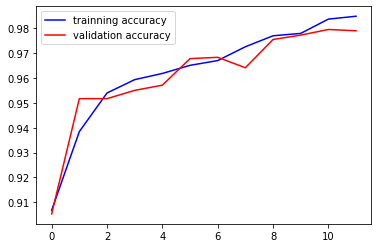

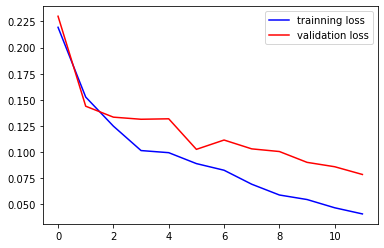

Epoch 1/13
163/163 [==============================] - 14s 55ms/step - loss: 0.2407 - accuracy: 0.9049 - val_loss: 0.1851 - val_accuracy: 0.9326
Epoch 2/13
163/163 [==============================] - 6s 35ms/step - loss: 0.1523 - accuracy: 0.9413 - val_loss: 0.1508 - val_accuracy: 0.9458
Epoch 3/13
163/163 [==============================] - 7s 42ms/step - loss: 0.1243 - accuracy: 0.9509 - val_loss: 0.1419 - val_accuracy: 0.9477
Epoch 4/13
163/163 [==============================] - 6s 35ms/step - loss: 0.1122 - accuracy: 0.9565 - val_loss: 0.1267 - val_accuracy: 0.9550
Epoch 5/13
163/163 [==============================] - 7s 41ms/step - loss: 0.1084 - accuracy: 0.9534 - val_loss: 0.1299 - val_accuracy: 0.9563
Epoch 6/13
163/163 [==============================] - 6s 35ms/step - loss: 0.0892 - accuracy: 0.9651 - val_loss: 0.1120 - val_accuracy: 0.9652
Epoch 7/13
163/163 [==============================] - 8s 51ms/step - loss: 0.0695 - accuracy: 0.9722 - val_loss: 0.1048 - val_accuracy: 0.970

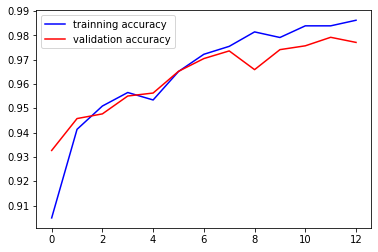

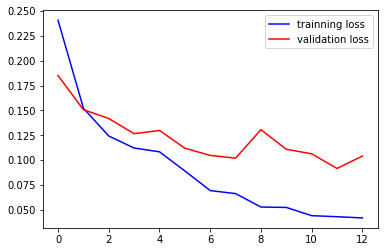

Epoch 1/14
163/163 [==============================] - 15s 57ms/step - loss: 0.2453 - accuracy: 0.9011 - val_loss: 0.1830 - val_accuracy: 0.9284
Epoch 2/14
163/163 [==============================] - 6s 38ms/step - loss: 0.1528 - accuracy: 0.9360 - val_loss: 0.1555 - val_accuracy: 0.9417
Epoch 3/14
163/163 [==============================] - 9s 55ms/step - loss: 0.1316 - accuracy: 0.9498 - val_loss: 0.1360 - val_accuracy: 0.9501
Epoch 4/14
163/163 [==============================] - 7s 42ms/step - loss: 0.1142 - accuracy: 0.9544 - val_loss: 0.1161 - val_accuracy: 0.9633
Epoch 5/14
163/163 [==============================] - 6s 36ms/step - loss: 0.1004 - accuracy: 0.9615 - val_loss: 0.1145 - val_accuracy: 0.9619
Epoch 6/14
163/163 [==============================] - 6s 40ms/step - loss: 0.0837 - accuracy: 0.9666 - val_loss: 0.1202 - val_accuracy: 0.9608
Epoch 7/14
163/163 [==============================] - 9s 53ms/step - loss: 0.0745 - accuracy: 0.9711 - val_loss: 0.1071 - val_accuracy: 0.965

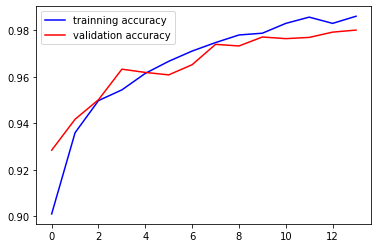

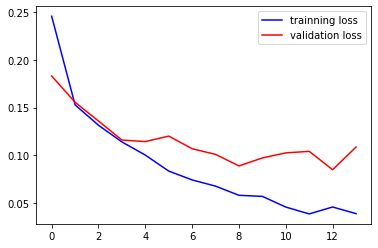

Epoch 1/15
163/163 [==============================] - 15s 56ms/step - loss: 0.2315 - accuracy: 0.9036 - val_loss: 0.1858 - val_accuracy: 0.9332
Epoch 2/15
163/163 [==============================] - 8s 51ms/step - loss: 0.1498 - accuracy: 0.9423 - val_loss: 0.1452 - val_accuracy: 0.9470
Epoch 3/15
163/163 [==============================] - 8s 51ms/step - loss: 0.1293 - accuracy: 0.9492 - val_loss: 0.1307 - val_accuracy: 0.9508
Epoch 4/15
163/163 [==============================] - 7s 43ms/step - loss: 0.1070 - accuracy: 0.9561 - val_loss: 0.1106 - val_accuracy: 0.9622
Epoch 5/15
163/163 [==============================] - 6s 35ms/step - loss: 0.0962 - accuracy: 0.9615 - val_loss: 0.1111 - val_accuracy: 0.9620
Epoch 6/15
163/163 [==============================] - 7s 42ms/step - loss: 0.0869 - accuracy: 0.9666 - val_loss: 0.1961 - val_accuracy: 0.9281
Epoch 7/15
163/163 [==============================] - 6s 35ms/step - loss: 0.0729 - accuracy: 0.9720 - val_loss: 0.0932 - val_accuracy: 0.968

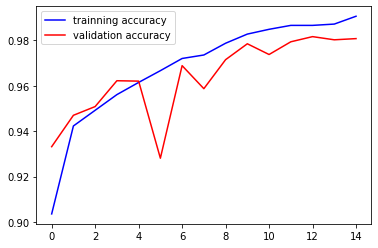

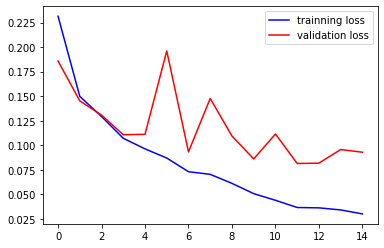

Epoch 1/16
163/163 [==============================] - 18s 71ms/step - loss: 0.2257 - accuracy: 0.9084 - val_loss: 0.1761 - val_accuracy: 0.9354
Epoch 2/16
163/163 [==============================] - 7s 43ms/step - loss: 0.1542 - accuracy: 0.9375 - val_loss: 0.1441 - val_accuracy: 0.9477
Epoch 3/16
163/163 [==============================] - 6s 36ms/step - loss: 0.1322 - accuracy: 0.9463 - val_loss: 0.1257 - val_accuracy: 0.9535
Epoch 4/16
163/163 [==============================] - 7s 43ms/step - loss: 0.1126 - accuracy: 0.9563 - val_loss: 0.1618 - val_accuracy: 0.9416
Epoch 5/16
163/163 [==============================] - 6s 36ms/step - loss: 0.1017 - accuracy: 0.9613 - val_loss: 0.1162 - val_accuracy: 0.9624
Epoch 6/16
163/163 [==============================] - 8s 51ms/step - loss: 0.0892 - accuracy: 0.9651 - val_loss: 0.1368 - val_accuracy: 0.9563
Epoch 7/16
163/163 [==============================] - 6s 36ms/step - loss: 0.0788 - accuracy: 0.9701 - val_loss: 0.1116 - val_accuracy: 0.967

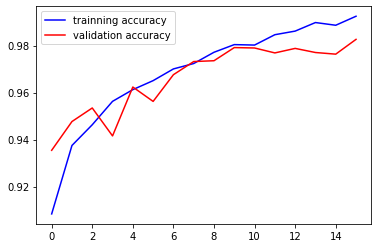

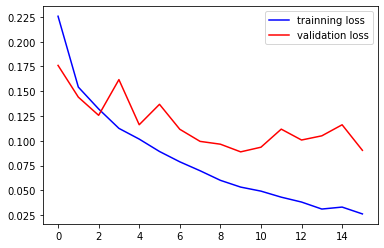

Epoch 1/17
163/163 [==============================] - 15s 55ms/step - loss: 0.2265 - accuracy: 0.9039 - val_loss: 0.1709 - val_accuracy: 0.9319
Epoch 2/17
163/163 [==============================] - 6s 36ms/step - loss: 0.1584 - accuracy: 0.9371 - val_loss: 0.1611 - val_accuracy: 0.9382
Epoch 3/17
163/163 [==============================] - 9s 55ms/step - loss: 0.1309 - accuracy: 0.9484 - val_loss: 0.1252 - val_accuracy: 0.9550
Epoch 4/17
163/163 [==============================] - 8s 51ms/step - loss: 0.1103 - accuracy: 0.9553 - val_loss: 0.1304 - val_accuracy: 0.9517
Epoch 5/17
163/163 [==============================] - 6s 37ms/step - loss: 0.0926 - accuracy: 0.9607 - val_loss: 0.1005 - val_accuracy: 0.9678
Epoch 6/17
163/163 [==============================] - 8s 51ms/step - loss: 0.0884 - accuracy: 0.9632 - val_loss: 0.1209 - val_accuracy: 0.9622
Epoch 7/17
163/163 [==============================] - 8s 51ms/step - loss: 0.0741 - accuracy: 0.9705 - val_loss: 0.1038 - val_accuracy: 0.969

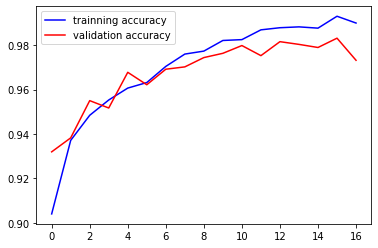

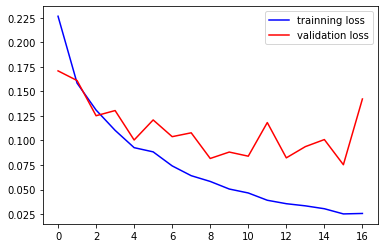

Epoch 1/18
163/163 [==============================] - 14s 56ms/step - loss: 0.2264 - accuracy: 0.9061 - val_loss: 0.1969 - val_accuracy: 0.9279
Epoch 2/18
163/163 [==============================] - 8s 52ms/step - loss: 0.1436 - accuracy: 0.9417 - val_loss: 0.1554 - val_accuracy: 0.9437
Epoch 3/18
163/163 [==============================] - 7s 42ms/step - loss: 0.1244 - accuracy: 0.9503 - val_loss: 0.1416 - val_accuracy: 0.9503
Epoch 4/18
163/163 [==============================] - 6s 35ms/step - loss: 0.1145 - accuracy: 0.9574 - val_loss: 0.1209 - val_accuracy: 0.9556
Epoch 5/18
163/163 [==============================] - 9s 56ms/step - loss: 0.0999 - accuracy: 0.9578 - val_loss: 0.1534 - val_accuracy: 0.9510
Epoch 6/18
163/163 [==============================] - 6s 35ms/step - loss: 0.0875 - accuracy: 0.9649 - val_loss: 0.1135 - val_accuracy: 0.9666
Epoch 7/18
163/163 [==============================] - 7s 43ms/step - loss: 0.0721 - accuracy: 0.9695 - val_loss: 0.1065 - val_accuracy: 0.968

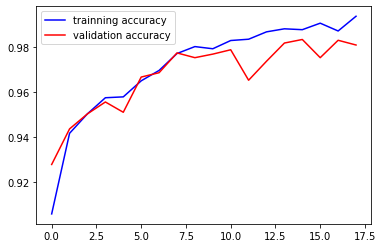

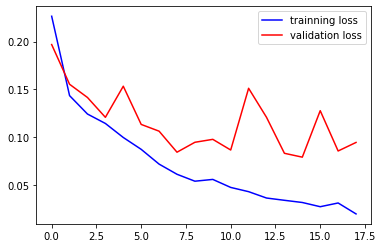

Epoch 1/19
163/163 [==============================] - 17s 65ms/step - loss: 0.2539 - accuracy: 0.9016 - val_loss: 0.2131 - val_accuracy: 0.9223
Epoch 2/19
163/163 [==============================] - 7s 41ms/step - loss: 0.1619 - accuracy: 0.9356 - val_loss: 0.1490 - val_accuracy: 0.9417
Epoch 3/19
163/163 [==============================] - 6s 36ms/step - loss: 0.1278 - accuracy: 0.9500 - val_loss: 0.1281 - val_accuracy: 0.9552
Epoch 4/19
163/163 [==============================] - 7s 44ms/step - loss: 0.1171 - accuracy: 0.9549 - val_loss: 0.1278 - val_accuracy: 0.9521
Epoch 5/19
163/163 [==============================] - 8s 51ms/step - loss: 0.0967 - accuracy: 0.9613 - val_loss: 0.1331 - val_accuracy: 0.9547
Epoch 6/19
163/163 [==============================] - 6s 39ms/step - loss: 0.0955 - accuracy: 0.9632 - val_loss: 0.1145 - val_accuracy: 0.9617
Epoch 7/19
163/163 [==============================] - 8s 51ms/step - loss: 0.0811 - accuracy: 0.9674 - val_loss: 0.1406 - val_accuracy: 0.954

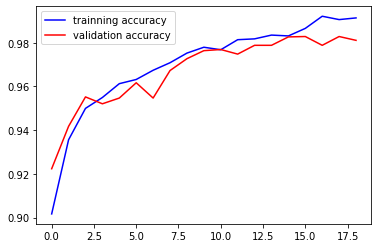

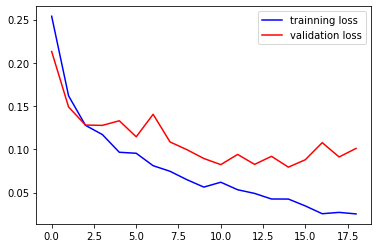

Epoch 1/5
163/163 [==============================] - 15s 57ms/step - loss: 0.2795 - accuracy: 0.8777 - val_loss: 0.2277 - val_accuracy: 0.9110
Epoch 2/5
163/163 [==============================] - 6s 36ms/step - loss: 0.1947 - accuracy: 0.9183 - val_loss: 0.1920 - val_accuracy: 0.9213
Epoch 3/5
163/163 [==============================] - 7s 41ms/step - loss: 0.1745 - accuracy: 0.9300 - val_loss: 0.1793 - val_accuracy: 0.9297
Epoch 4/5
163/163 [==============================] - 6s 35ms/step - loss: 0.1601 - accuracy: 0.9367 - val_loss: 0.1682 - val_accuracy: 0.9326
Epoch 5/5
176/176 [==============================] - 4s 23ms/step - loss: 0.1592 - accuracy: 0.9363
Optimizer: sgd with 0.9 momentom Learning rate: 0.001
Test loss 0.15918220579624176
Test accuracy 0.936253547668457


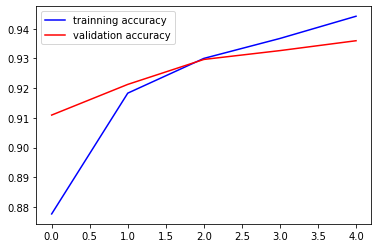

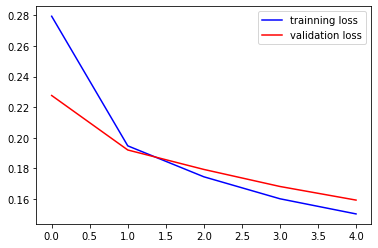

Epoch 1/6
163/163 [==============================] - 16s 55ms/step - loss: 0.2813 - accuracy: 0.8783 - val_loss: 0.2373 - val_accuracy: 0.9055
Epoch 2/6
163/163 [==============================] - 7s 42ms/step - loss: 0.1960 - accuracy: 0.9218 - val_loss: 0.2093 - val_accuracy: 0.9129
Epoch 3/6
163/163 [==============================] - 6s 36ms/step - loss: 0.1769 - accuracy: 0.9285 - val_loss: 0.1817 - val_accuracy: 0.9265
Epoch 4/6
163/163 [==============================] - 8s 51ms/step - loss: 0.1616 - accuracy: 0.9373 - val_loss: 0.1750 - val_accuracy: 0.9305
Epoch 5/6
163/163 [==============================] - 6s 36ms/step - loss: 0.1613 - accuracy: 0.9367 - val_loss: 0.1759 - val_accuracy: 0.9295
Epoch 6/6
176/176 [==============================] - 3s 19ms/step - loss: 0.1664 - accuracy: 0.9368
Optimizer: sgd with 0.9 momentom Learning rate: 0.001
Test loss 0.16643060743808746
Test accuracy 0.9367877244949341


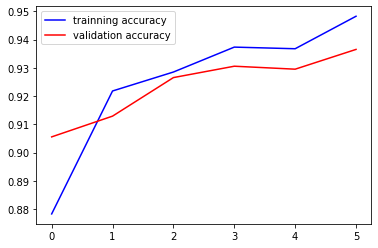

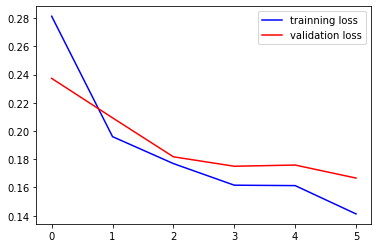

Epoch 1/7
163/163 [==============================] - 17s 67ms/step - loss: 0.2762 - accuracy: 0.8857 - val_loss: 0.2349 - val_accuracy: 0.9117
Epoch 2/7
163/163 [==============================] - 6s 35ms/step - loss: 0.1971 - accuracy: 0.9237 - val_loss: 0.1943 - val_accuracy: 0.9199
Epoch 3/7
163/163 [==============================] - 7s 42ms/step - loss: 0.1733 - accuracy: 0.9316 - val_loss: 0.1868 - val_accuracy: 0.9239
Epoch 4/7
163/163 [==============================] - 6s 36ms/step - loss: 0.1627 - accuracy: 0.9383 - val_loss: 0.1666 - val_accuracy: 0.9309
Epoch 5/7
163/163 [==============================] - 7s 42ms/step - loss: 0.1511 - accuracy: 0.9398 - val_loss: 0.1756 - val_accuracy: 0.9305
Epoch 6/7
163/163 [==============================] - 8s 51ms/step - loss: 0.1413 - accuracy: 0.9423 - val_loss: 0.1525 - val_accuracy: 0.9424
Epoch 7/7
176/176 [==============================] - 4s 23ms/step - loss: 0.1481 - accuracy: 0.9443
Optimizer: sgd with 0.9 momentom Learning rate:

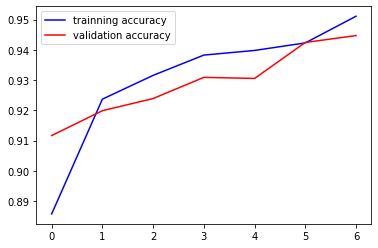

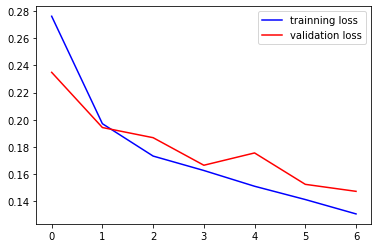

Epoch 1/8
163/163 [==============================] - 18s 78ms/step - loss: 0.2797 - accuracy: 0.8844 - val_loss: 0.2219 - val_accuracy: 0.9153
Epoch 2/8
163/163 [==============================] - 9s 52ms/step - loss: 0.1948 - accuracy: 0.9214 - val_loss: 0.1897 - val_accuracy: 0.9239
Epoch 3/8
163/163 [==============================] - 8s 51ms/step - loss: 0.1753 - accuracy: 0.9321 - val_loss: 0.1886 - val_accuracy: 0.9230
Epoch 4/8
163/163 [==============================] - 7s 41ms/step - loss: 0.1642 - accuracy: 0.9350 - val_loss: 0.1634 - val_accuracy: 0.9381
Epoch 5/8
163/163 [==============================] - 6s 35ms/step - loss: 0.1525 - accuracy: 0.9387 - val_loss: 0.1591 - val_accuracy: 0.9381
Epoch 6/8
163/163 [==============================] - 7s 43ms/step - loss: 0.1357 - accuracy: 0.9477 - val_loss: 0.2031 - val_accuracy: 0.9197
Epoch 7/8
163/163 [==============================] - 6s 37ms/step - loss: 0.1322 - accuracy: 0.9475 - val_loss: 0.1617 - val_accuracy: 0.9374
Epoch

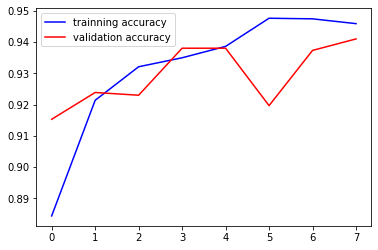

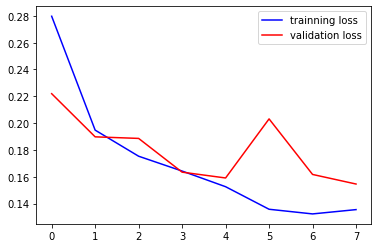

Epoch 1/9
163/163 [==============================] - 17s 71ms/step - loss: 0.2868 - accuracy: 0.8777 - val_loss: 0.2306 - val_accuracy: 0.9101
Epoch 2/9
163/163 [==============================] - 9s 55ms/step - loss: 0.1989 - accuracy: 0.9202 - val_loss: 0.1932 - val_accuracy: 0.9214
Epoch 3/9
163/163 [==============================] - 6s 36ms/step - loss: 0.1755 - accuracy: 0.9306 - val_loss: 0.1799 - val_accuracy: 0.9311
Epoch 4/9
163/163 [==============================] - 7s 43ms/step - loss: 0.1580 - accuracy: 0.9396 - val_loss: 0.1676 - val_accuracy: 0.9347
Epoch 5/9
163/163 [==============================] - 6s 35ms/step - loss: 0.1528 - accuracy: 0.9408 - val_loss: 0.1631 - val_accuracy: 0.9377
Epoch 6/9
163/163 [==============================] - 9s 54ms/step - loss: 0.1419 - accuracy: 0.9475 - val_loss: 0.1602 - val_accuracy: 0.9353
Epoch 7/9
163/163 [==============================] - 6s 35ms/step - loss: 0.1404 - accuracy: 0.9444 - val_loss: 0.1639 - val_accuracy: 0.9379
Epoch

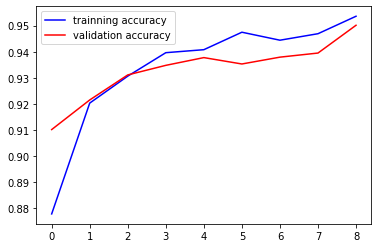

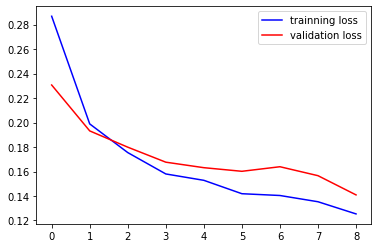

Epoch 1/10
163/163 [==============================] - 17s 65ms/step - loss: 0.2795 - accuracy: 0.8775 - val_loss: 0.2239 - val_accuracy: 0.9125
Epoch 2/10
163/163 [==============================] - 6s 39ms/step - loss: 0.1909 - accuracy: 0.9268 - val_loss: 0.1854 - val_accuracy: 0.9260
Epoch 3/10
163/163 [==============================] - 6s 36ms/step - loss: 0.1647 - accuracy: 0.9331 - val_loss: 0.1772 - val_accuracy: 0.9291
Epoch 4/10
163/163 [==============================] - 9s 58ms/step - loss: 0.1526 - accuracy: 0.9390 - val_loss: 0.1694 - val_accuracy: 0.9323
Epoch 5/10
163/163 [==============================] - 8s 51ms/step - loss: 0.1539 - accuracy: 0.9415 - val_loss: 0.1545 - val_accuracy: 0.9398
Epoch 6/10
163/163 [==============================] - 6s 36ms/step - loss: 0.1327 - accuracy: 0.9467 - val_loss: 0.1689 - val_accuracy: 0.9337
Epoch 7/10
163/163 [==============================] - 8s 51ms/step - loss: 0.1331 - accuracy: 0.9473 - val_loss: 0.1501 - val_accuracy: 0.941

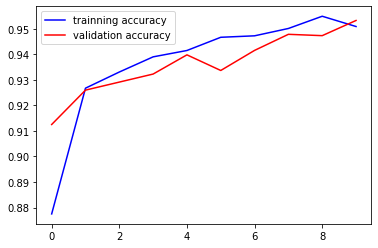

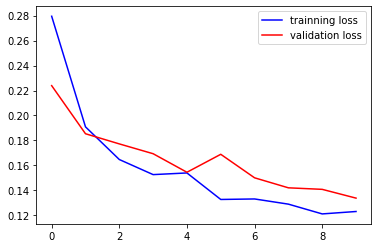

Epoch 1/11
163/163 [==============================] - 16s 57ms/step - loss: 0.2810 - accuracy: 0.8800 - val_loss: 0.2219 - val_accuracy: 0.9094
Epoch 2/11
163/163 [==============================] - 6s 35ms/step - loss: 0.1927 - accuracy: 0.9193 - val_loss: 0.1921 - val_accuracy: 0.9204
Epoch 3/11
163/163 [==============================] - 7s 43ms/step - loss: 0.1720 - accuracy: 0.9275 - val_loss: 0.1731 - val_accuracy: 0.9295
Epoch 4/11
163/163 [==============================] - 9s 53ms/step - loss: 0.1553 - accuracy: 0.9383 - val_loss: 0.1647 - val_accuracy: 0.9335
Epoch 5/11
163/163 [==============================] - 10s 59ms/step - loss: 0.1555 - accuracy: 0.9387 - val_loss: 0.1582 - val_accuracy: 0.9405
Epoch 6/11
163/163 [==============================] - 6s 40ms/step - loss: 0.1456 - accuracy: 0.9436 - val_loss: 0.1585 - val_accuracy: 0.9361
Epoch 7/11
163/163 [==============================] - 9s 58ms/step - loss: 0.1333 - accuracy: 0.9484 - val_loss: 0.1445 - val_accuracy: 0.94

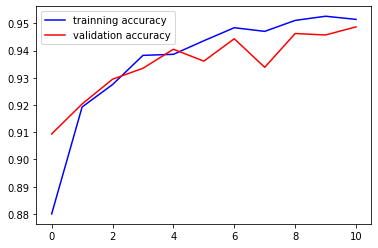

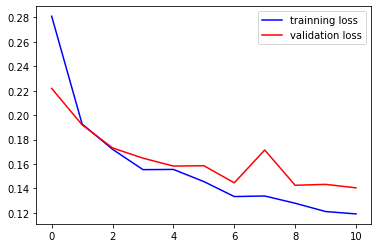

Epoch 1/12
163/163 [==============================] - 16s 59ms/step - loss: 0.2873 - accuracy: 0.8806 - val_loss: 0.2744 - val_accuracy: 0.8921
Epoch 2/12
163/163 [==============================] - 6s 37ms/step - loss: 0.2021 - accuracy: 0.9185 - val_loss: 0.1974 - val_accuracy: 0.9232
Epoch 3/12
163/163 [==============================] - 7s 45ms/step - loss: 0.1758 - accuracy: 0.9340 - val_loss: 0.1805 - val_accuracy: 0.9304
Epoch 4/12
163/163 [==============================] - 6s 37ms/step - loss: 0.1689 - accuracy: 0.9333 - val_loss: 0.1882 - val_accuracy: 0.9258
Epoch 5/12
163/163 [==============================] - 9s 57ms/step - loss: 0.1533 - accuracy: 0.9396 - val_loss: 0.1660 - val_accuracy: 0.9360
Epoch 6/12
163/163 [==============================] - 6s 38ms/step - loss: 0.1443 - accuracy: 0.9406 - val_loss: 0.1592 - val_accuracy: 0.9384
Epoch 7/12
163/163 [==============================] - 8s 46ms/step - loss: 0.1384 - accuracy: 0.9461 - val_loss: 0.1500 - val_accuracy: 0.943

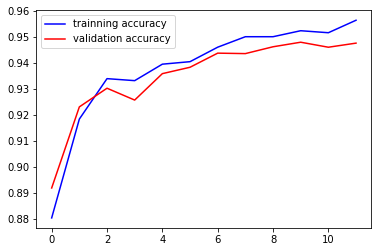

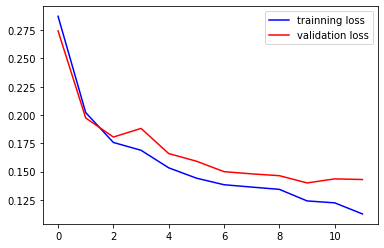

Epoch 1/13
163/163 [==============================] - 15s 57ms/step - loss: 0.3081 - accuracy: 0.8668 - val_loss: 0.2299 - val_accuracy: 0.9124
Epoch 2/13
163/163 [==============================] - 9s 54ms/step - loss: 0.1923 - accuracy: 0.9258 - val_loss: 0.1892 - val_accuracy: 0.9237
Epoch 3/13
163/163 [==============================] - 10s 62ms/step - loss: 0.1753 - accuracy: 0.9302 - val_loss: 0.1746 - val_accuracy: 0.9305
Epoch 4/13
163/163 [==============================] - 9s 53ms/step - loss: 0.1575 - accuracy: 0.9379 - val_loss: 0.1630 - val_accuracy: 0.9360
Epoch 5/13
163/163 [==============================] - 6s 36ms/step - loss: 0.1439 - accuracy: 0.9431 - val_loss: 0.1567 - val_accuracy: 0.9393
Epoch 6/13
163/163 [==============================] - 7s 43ms/step - loss: 0.1388 - accuracy: 0.9448 - val_loss: 0.1703 - val_accuracy: 0.9330
Epoch 7/13
163/163 [==============================] - 6s 36ms/step - loss: 0.1326 - accuracy: 0.9490 - val_loss: 0.1484 - val_accuracy: 0.94

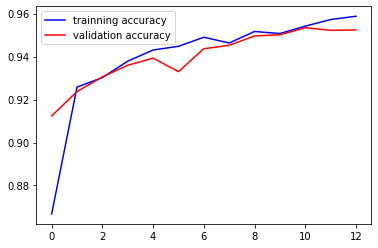

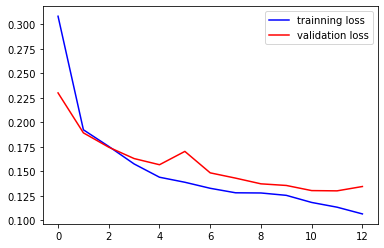

Epoch 1/14
163/163 [==============================] - 15s 58ms/step - loss: 0.2914 - accuracy: 0.8771 - val_loss: 0.2387 - val_accuracy: 0.9080
Epoch 2/14
163/163 [==============================] - 6s 37ms/step - loss: 0.1977 - accuracy: 0.9243 - val_loss: 0.1969 - val_accuracy: 0.9228
Epoch 3/14
163/163 [==============================] - 9s 57ms/step - loss: 0.1810 - accuracy: 0.9306 - val_loss: 0.1853 - val_accuracy: 0.9251
Epoch 4/14
163/163 [==============================] - 6s 36ms/step - loss: 0.1606 - accuracy: 0.9367 - val_loss: 0.1815 - val_accuracy: 0.9286
Epoch 5/14
163/163 [==============================] - 7s 46ms/step - loss: 0.1501 - accuracy: 0.9402 - val_loss: 0.1603 - val_accuracy: 0.9375
Epoch 6/14
163/163 [==============================] - 8s 52ms/step - loss: 0.1443 - accuracy: 0.9423 - val_loss: 0.1672 - val_accuracy: 0.9349
Epoch 7/14
163/163 [==============================] - 7s 40ms/step - loss: 0.1408 - accuracy: 0.9452 - val_loss: 0.1527 - val_accuracy: 0.942

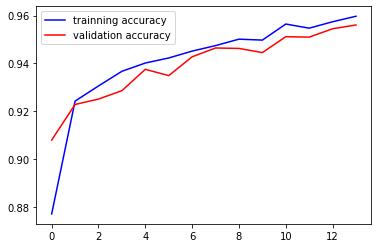

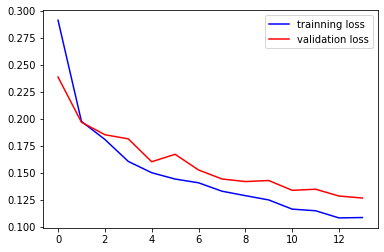

Epoch 1/15
163/163 [==============================] - 15s 58ms/step - loss: 0.3108 - accuracy: 0.8599 - val_loss: 0.2314 - val_accuracy: 0.9083
Epoch 2/15
163/163 [==============================] - 8s 52ms/step - loss: 0.1995 - accuracy: 0.9191 - val_loss: 0.1932 - val_accuracy: 0.9239
Epoch 3/15
163/163 [==============================] - 7s 41ms/step - loss: 0.1807 - accuracy: 0.9237 - val_loss: 0.1856 - val_accuracy: 0.9260
Epoch 4/15
163/163 [==============================] - 6s 40ms/step - loss: 0.1599 - accuracy: 0.9350 - val_loss: 0.1714 - val_accuracy: 0.9328
Epoch 5/15
163/163 [==============================] - 9s 57ms/step - loss: 0.1504 - accuracy: 0.9454 - val_loss: 0.1599 - val_accuracy: 0.9381
Epoch 6/15
163/163 [==============================] - 8s 52ms/step - loss: 0.1434 - accuracy: 0.9408 - val_loss: 0.1597 - val_accuracy: 0.9388
Epoch 7/15
163/163 [==============================] - 6s 36ms/step - loss: 0.1385 - accuracy: 0.9461 - val_loss: 0.1534 - val_accuracy: 0.941

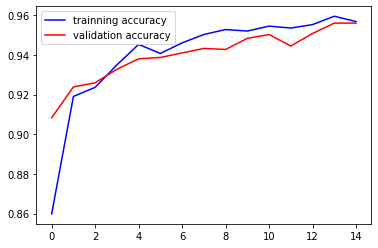

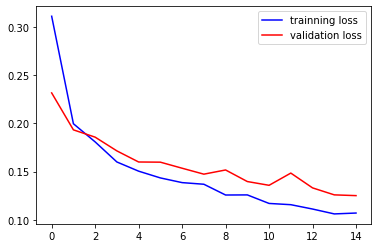

Epoch 1/16
163/163 [==============================] - 17s 60ms/step - loss: 0.3065 - accuracy: 0.8685 - val_loss: 0.2272 - val_accuracy: 0.9118
Epoch 2/16
163/163 [==============================] - 9s 53ms/step - loss: 0.1917 - accuracy: 0.9270 - val_loss: 0.1893 - val_accuracy: 0.9260
Epoch 3/16
163/163 [==============================] - 6s 39ms/step - loss: 0.1717 - accuracy: 0.9358 - val_loss: 0.1756 - val_accuracy: 0.9319
Epoch 4/16
163/163 [==============================] - 8s 51ms/step - loss: 0.1532 - accuracy: 0.9383 - val_loss: 0.1826 - val_accuracy: 0.9283
Epoch 5/16
163/163 [==============================] - 8s 52ms/step - loss: 0.1498 - accuracy: 0.9434 - val_loss: 0.1584 - val_accuracy: 0.9403
Epoch 6/16
163/163 [==============================] - 10s 59ms/step - loss: 0.1421 - accuracy: 0.9410 - val_loss: 0.1515 - val_accuracy: 0.9428
Epoch 7/16
163/163 [==============================] - 8s 52ms/step - loss: 0.1387 - accuracy: 0.9440 - val_loss: 0.1503 - val_accuracy: 0.94

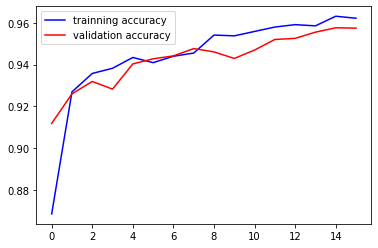

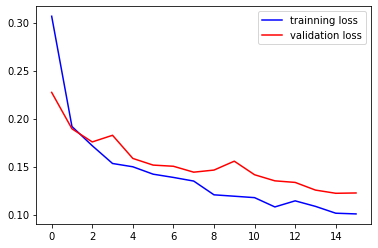

Epoch 1/17
163/163 [==============================] - 18s 67ms/step - loss: 0.2817 - accuracy: 0.8825 - val_loss: 0.2242 - val_accuracy: 0.9118
Epoch 2/17
163/163 [==============================] - 8s 52ms/step - loss: 0.1999 - accuracy: 0.9189 - val_loss: 0.1910 - val_accuracy: 0.9239
Epoch 3/17
163/163 [==============================] - 7s 42ms/step - loss: 0.1817 - accuracy: 0.9264 - val_loss: 0.1741 - val_accuracy: 0.9312
Epoch 4/17
163/163 [==============================] - 9s 52ms/step - loss: 0.1630 - accuracy: 0.9381 - val_loss: 0.1655 - val_accuracy: 0.9368
Epoch 5/17
163/163 [==============================] - 9s 54ms/step - loss: 0.1562 - accuracy: 0.9383 - val_loss: 0.1592 - val_accuracy: 0.9396
Epoch 6/17
163/163 [==============================] - 9s 57ms/step - loss: 0.1414 - accuracy: 0.9450 - val_loss: 0.1542 - val_accuracy: 0.9417
Epoch 7/17
163/163 [==============================] - 6s 36ms/step - loss: 0.1367 - accuracy: 0.9479 - val_loss: 0.1472 - val_accuracy: 0.943

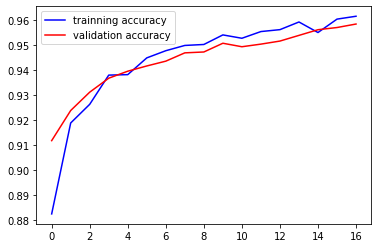

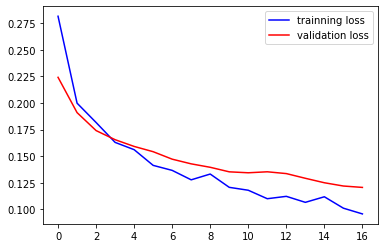

Epoch 1/18
163/163 [==============================] - 18s 75ms/step - loss: 0.2724 - accuracy: 0.8857 - val_loss: 0.2271 - val_accuracy: 0.9131
Epoch 2/18
163/163 [==============================] - 7s 43ms/step - loss: 0.1845 - accuracy: 0.9264 - val_loss: 0.1959 - val_accuracy: 0.9232
Epoch 3/18
163/163 [==============================] - 7s 41ms/step - loss: 0.1629 - accuracy: 0.9387 - val_loss: 0.1710 - val_accuracy: 0.9333
Epoch 4/18
163/163 [==============================] - 9s 54ms/step - loss: 0.1535 - accuracy: 0.9404 - val_loss: 0.1722 - val_accuracy: 0.9304
Epoch 5/18
163/163 [==============================] - 6s 37ms/step - loss: 0.1434 - accuracy: 0.9442 - val_loss: 0.1561 - val_accuracy: 0.9402
Epoch 6/18
163/163 [==============================] - 9s 57ms/step - loss: 0.1392 - accuracy: 0.9433 - val_loss: 0.1513 - val_accuracy: 0.9412
Epoch 7/18
163/163 [==============================] - 6s 36ms/step - loss: 0.1287 - accuracy: 0.9479 - val_loss: 0.1450 - val_accuracy: 0.943

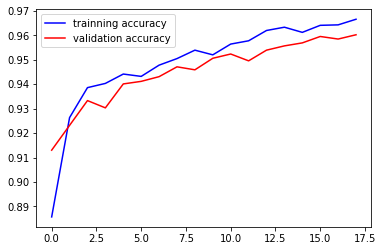

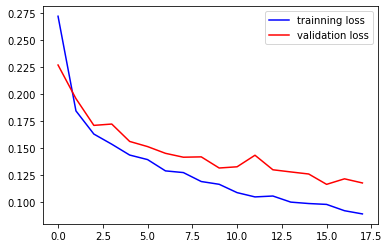

Epoch 1/19
163/163 [==============================] - 19s 75ms/step - loss: 0.3000 - accuracy: 0.8691 - val_loss: 0.2305 - val_accuracy: 0.9069
Epoch 2/19
163/163 [==============================] - 7s 46ms/step - loss: 0.1959 - accuracy: 0.9174 - val_loss: 0.1986 - val_accuracy: 0.9220
Epoch 3/19
163/163 [==============================] - 6s 38ms/step - loss: 0.1783 - accuracy: 0.9285 - val_loss: 0.1823 - val_accuracy: 0.9246
Epoch 4/19
163/163 [==============================] - 9s 57ms/step - loss: 0.1663 - accuracy: 0.9365 - val_loss: 0.1650 - val_accuracy: 0.9342
Epoch 5/19
163/163 [==============================] - 6s 38ms/step - loss: 0.1522 - accuracy: 0.9408 - val_loss: 0.1568 - val_accuracy: 0.9391
Epoch 6/19
163/163 [==============================] - 7s 44ms/step - loss: 0.1424 - accuracy: 0.9454 - val_loss: 0.1559 - val_accuracy: 0.9405
Epoch 7/19
163/163 [==============================] - 6s 37ms/step - loss: 0.1386 - accuracy: 0.9467 - val_loss: 0.1455 - val_accuracy: 0.944

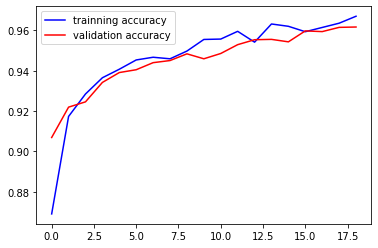

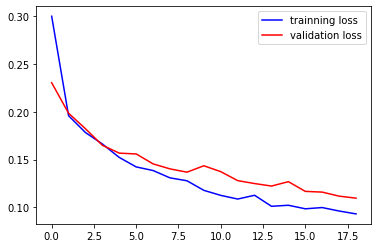

Epoch 1/5
163/163 [==============================] - 17s 65ms/step - loss: 0.4708 - accuracy: 0.7778 - val_loss: 0.3640 - val_accuracy: 0.8639
Epoch 2/5
163/163 [==============================] - 6s 36ms/step - loss: 0.2951 - accuracy: 0.8811 - val_loss: 0.2826 - val_accuracy: 0.8910
Epoch 3/5
163/163 [==============================] - 7s 43ms/step - loss: 0.2657 - accuracy: 0.8949 - val_loss: 0.2566 - val_accuracy: 0.8964
Epoch 4/5
163/163 [==============================] - 6s 36ms/step - loss: 0.2380 - accuracy: 0.9057 - val_loss: 0.2428 - val_accuracy: 0.9017
Epoch 5/5
176/176 [==============================] - 4s 20ms/step - loss: 0.2360 - accuracy: 0.9021
Optimizer: sgd with 0.9 momentom Learning rate: 0.0001
Test loss 0.23601952195167542
Test accuracy 0.9020655155181885


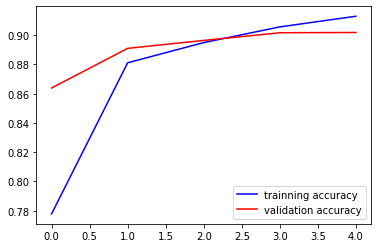

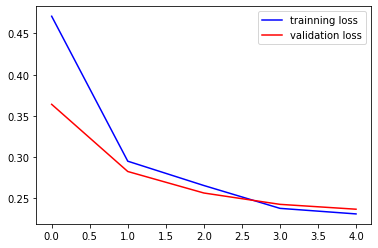

Epoch 1/6
163/163 [==============================] - 19s 74ms/step - loss: 0.4835 - accuracy: 0.7648 - val_loss: 0.3807 - val_accuracy: 0.8632
Epoch 2/6
163/163 [==============================] - 7s 43ms/step - loss: 0.3125 - accuracy: 0.8746 - val_loss: 0.3011 - val_accuracy: 0.8810
Epoch 3/6
163/163 [==============================] - 6s 37ms/step - loss: 0.2789 - accuracy: 0.8886 - val_loss: 0.2811 - val_accuracy: 0.8894
Epoch 4/6
163/163 [==============================] - 7s 43ms/step - loss: 0.2646 - accuracy: 0.8955 - val_loss: 0.2674 - val_accuracy: 0.8945
Epoch 5/6
163/163 [==============================] - 8s 52ms/step - loss: 0.2510 - accuracy: 0.8999 - val_loss: 0.2602 - val_accuracy: 0.8982
Epoch 6/6
176/176 [==============================] - 4s 23ms/step - loss: 0.2505 - accuracy: 0.9015
Optimizer: sgd with 0.9 momentom Learning rate: 0.0001
Test loss 0.25045233964920044
Test accuracy 0.9015313386917114


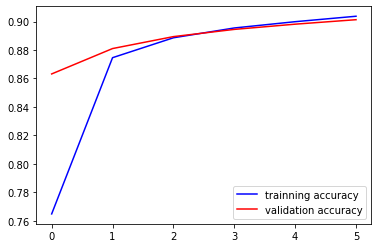

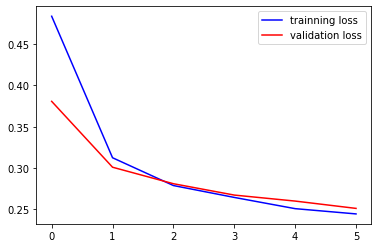

Epoch 1/7
163/163 [==============================] - 16s 58ms/step - loss: 0.5114 - accuracy: 0.7632 - val_loss: 0.3735 - val_accuracy: 0.8494
Epoch 2/7
163/163 [==============================] - 7s 43ms/step - loss: 0.3155 - accuracy: 0.8671 - val_loss: 0.2923 - val_accuracy: 0.8788
Epoch 3/7
163/163 [==============================] - 6s 36ms/step - loss: 0.2729 - accuracy: 0.8896 - val_loss: 0.2658 - val_accuracy: 0.8910
Epoch 4/7
163/163 [==============================] - 7s 44ms/step - loss: 0.2607 - accuracy: 0.8917 - val_loss: 0.2510 - val_accuracy: 0.8970
Epoch 5/7
163/163 [==============================] - 8s 52ms/step - loss: 0.2349 - accuracy: 0.9066 - val_loss: 0.2404 - val_accuracy: 0.8998
Epoch 6/7
163/163 [==============================] - 10s 59ms/step - loss: 0.2341 - accuracy: 0.9051 - val_loss: 0.2332 - val_accuracy: 0.9033
Epoch 7/7
176/176 [==============================] - 4s 20ms/step - loss: 0.2264 - accuracy: 0.9079
Optimizer: sgd with 0.9 momentom Learning rate

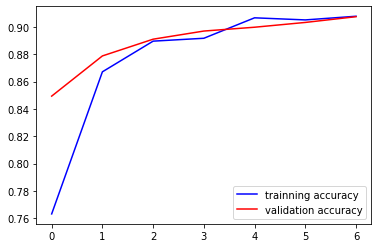

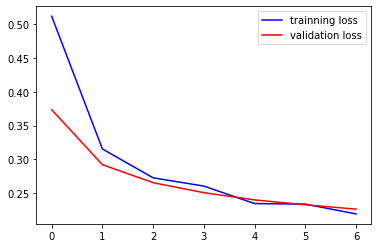

Epoch 1/8
163/163 [==============================] - 17s 65ms/step - loss: 0.4954 - accuracy: 0.7661 - val_loss: 0.3442 - val_accuracy: 0.8663
Epoch 2/8
163/163 [==============================] - 8s 52ms/step - loss: 0.3120 - accuracy: 0.8762 - val_loss: 0.2814 - val_accuracy: 0.8893
Epoch 3/8
163/163 [==============================] - 7s 44ms/step - loss: 0.2697 - accuracy: 0.8903 - val_loss: 0.2620 - val_accuracy: 0.8952
Epoch 4/8
163/163 [==============================] - 6s 36ms/step - loss: 0.2531 - accuracy: 0.8980 - val_loss: 0.2506 - val_accuracy: 0.9005
Epoch 5/8
163/163 [==============================] - 9s 55ms/step - loss: 0.2422 - accuracy: 0.9055 - val_loss: 0.2425 - val_accuracy: 0.9040
Epoch 6/8
163/163 [==============================] - 6s 36ms/step - loss: 0.2275 - accuracy: 0.9074 - val_loss: 0.2339 - val_accuracy: 0.9071
Epoch 7/8
163/163 [==============================] - 9s 57ms/step - loss: 0.2220 - accuracy: 0.9133 - val_loss: 0.2300 - val_accuracy: 0.9096
Epoch

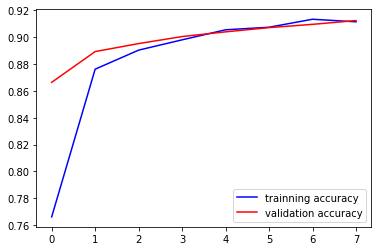

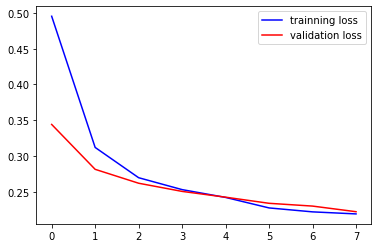

Epoch 1/9
163/163 [==============================] - 16s 59ms/step - loss: 0.4718 - accuracy: 0.7699 - val_loss: 0.3577 - val_accuracy: 0.8539
Epoch 2/9
163/163 [==============================] - 9s 52ms/step - loss: 0.3136 - accuracy: 0.8692 - val_loss: 0.2910 - val_accuracy: 0.8856
Epoch 3/9
163/163 [==============================] - 6s 37ms/step - loss: 0.2827 - accuracy: 0.8859 - val_loss: 0.2665 - val_accuracy: 0.8919
Epoch 4/9
163/163 [==============================] - 9s 52ms/step - loss: 0.2570 - accuracy: 0.8986 - val_loss: 0.2522 - val_accuracy: 0.8959
Epoch 5/9
163/163 [==============================] - 6s 37ms/step - loss: 0.2436 - accuracy: 0.9034 - val_loss: 0.2418 - val_accuracy: 0.9005
Epoch 6/9
163/163 [==============================] - 7s 44ms/step - loss: 0.2305 - accuracy: 0.9086 - val_loss: 0.2350 - val_accuracy: 0.9026
Epoch 7/9
163/163 [==============================] - 6s 36ms/step - loss: 0.2279 - accuracy: 0.9112 - val_loss: 0.2301 - val_accuracy: 0.9040
Epoch

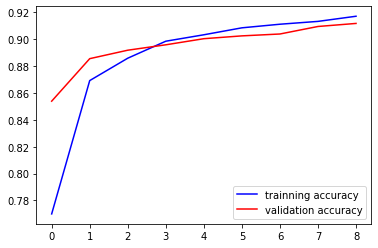

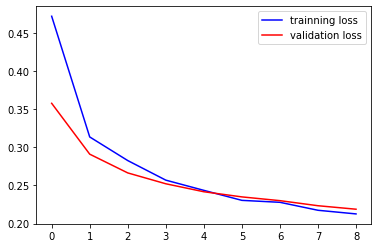

Epoch 1/10
163/163 [==============================] - 15s 50ms/step - loss: 0.4604 - accuracy: 0.7814 - val_loss: 0.3337 - val_accuracy: 0.8716
Epoch 2/10
163/163 [==============================] - 7s 45ms/step - loss: 0.2997 - accuracy: 0.8802 - val_loss: 0.2822 - val_accuracy: 0.8884
Epoch 3/10
163/163 [==============================] - 8s 52ms/step - loss: 0.2708 - accuracy: 0.8905 - val_loss: 0.2657 - val_accuracy: 0.8915
Epoch 4/10
163/163 [==============================] - 9s 58ms/step - loss: 0.2554 - accuracy: 0.9028 - val_loss: 0.2546 - val_accuracy: 0.8949
Epoch 5/10
163/163 [==============================] - 8s 52ms/step - loss: 0.2432 - accuracy: 0.9066 - val_loss: 0.2450 - val_accuracy: 0.8991
Epoch 6/10
163/163 [==============================] - 6s 37ms/step - loss: 0.2292 - accuracy: 0.9093 - val_loss: 0.2370 - val_accuracy: 0.9040
Epoch 7/10
163/163 [==============================] - 7s 43ms/step - loss: 0.2316 - accuracy: 0.9087 - val_loss: 0.2303 - val_accuracy: 0.906

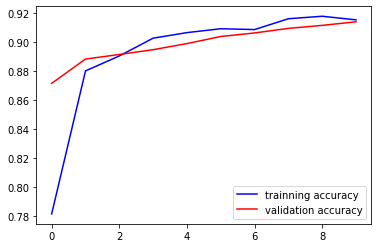

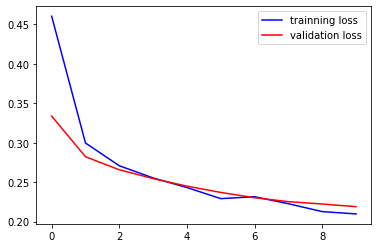

Epoch 1/11
163/163 [==============================] - 19s 74ms/step - loss: 0.4397 - accuracy: 0.7891 - val_loss: 0.3750 - val_accuracy: 0.8567
Epoch 2/11
163/163 [==============================] - 7s 40ms/step - loss: 0.2910 - accuracy: 0.8796 - val_loss: 0.2840 - val_accuracy: 0.8863
Epoch 3/11
163/163 [==============================] - 7s 41ms/step - loss: 0.2644 - accuracy: 0.8928 - val_loss: 0.2622 - val_accuracy: 0.8940
Epoch 4/11
163/163 [==============================] - 8s 52ms/step - loss: 0.2422 - accuracy: 0.9039 - val_loss: 0.2505 - val_accuracy: 0.8980
Epoch 5/11
163/163 [==============================] - 6s 37ms/step - loss: 0.2391 - accuracy: 0.9039 - val_loss: 0.2413 - val_accuracy: 0.9012
Epoch 6/11
163/163 [==============================] - 9s 53ms/step - loss: 0.2221 - accuracy: 0.9141 - val_loss: 0.2323 - val_accuracy: 0.9038
Epoch 7/11
163/163 [==============================] - 8s 52ms/step - loss: 0.2168 - accuracy: 0.9141 - val_loss: 0.2265 - val_accuracy: 0.907

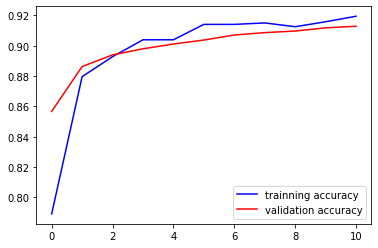

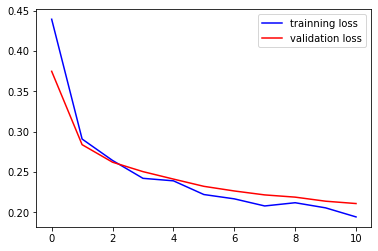

Epoch 1/12
163/163 [==============================] - 17s 63ms/step - loss: 0.5748 - accuracy: 0.7255 - val_loss: 0.3719 - val_accuracy: 0.8537
Epoch 2/12
163/163 [==============================] - 6s 37ms/step - loss: 0.3215 - accuracy: 0.8702 - val_loss: 0.2979 - val_accuracy: 0.8791
Epoch 3/12
163/163 [==============================] - 9s 53ms/step - loss: 0.2781 - accuracy: 0.8875 - val_loss: 0.2697 - val_accuracy: 0.8921
Epoch 4/12
163/163 [==============================] - 6s 38ms/step - loss: 0.2598 - accuracy: 0.8961 - val_loss: 0.2575 - val_accuracy: 0.8940
Epoch 5/12
163/163 [==============================] - 7s 46ms/step - loss: 0.2383 - accuracy: 0.9061 - val_loss: 0.2451 - val_accuracy: 0.8992
Epoch 6/12
163/163 [==============================] - 9s 53ms/step - loss: 0.2296 - accuracy: 0.9107 - val_loss: 0.2349 - val_accuracy: 0.9043
Epoch 7/12
163/163 [==============================] - 10s 60ms/step - loss: 0.2318 - accuracy: 0.9095 - val_loss: 0.2282 - val_accuracy: 0.90

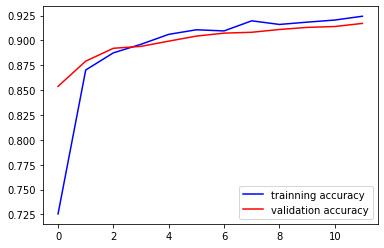

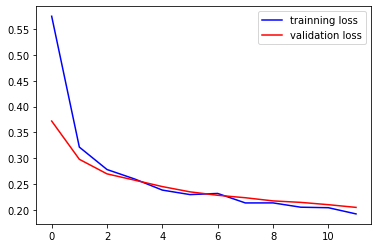

Epoch 1/13
163/163 [==============================] - 15s 51ms/step - loss: 0.4875 - accuracy: 0.7824 - val_loss: 0.3755 - val_accuracy: 0.8520
Epoch 2/13
163/163 [==============================] - 10s 60ms/step - loss: 0.3147 - accuracy: 0.8689 - val_loss: 0.2969 - val_accuracy: 0.8821
Epoch 3/13
163/163 [==============================] - 9s 53ms/step - loss: 0.2765 - accuracy: 0.8938 - val_loss: 0.2676 - val_accuracy: 0.8907
Epoch 4/13
163/163 [==============================] - 8s 52ms/step - loss: 0.2562 - accuracy: 0.8988 - val_loss: 0.2520 - val_accuracy: 0.8970
Epoch 5/13
163/163 [==============================] - 7s 45ms/step - loss: 0.2408 - accuracy: 0.8993 - val_loss: 0.2429 - val_accuracy: 0.9001
Epoch 6/13
163/163 [==============================] - 6s 36ms/step - loss: 0.2224 - accuracy: 0.9087 - val_loss: 0.2331 - val_accuracy: 0.9015
Epoch 7/13
163/163 [==============================] - 7s 43ms/step - loss: 0.2248 - accuracy: 0.9110 - val_loss: 0.2284 - val_accuracy: 0.90

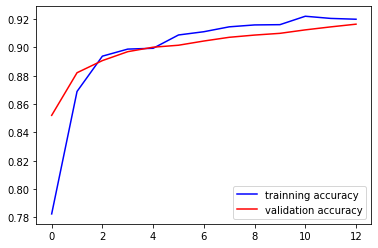

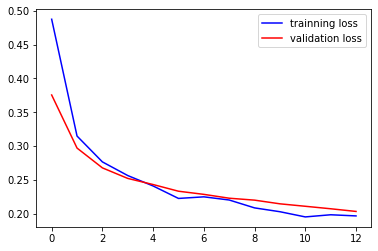

Epoch 1/14
163/163 [==============================] - 16s 59ms/step - loss: 0.4789 - accuracy: 0.7793 - val_loss: 0.3610 - val_accuracy: 0.8614
Epoch 2/14
163/163 [==============================] - 6s 38ms/step - loss: 0.3097 - accuracy: 0.8650 - val_loss: 0.2935 - val_accuracy: 0.8809
Epoch 3/14
163/163 [==============================] - 10s 59ms/step - loss: 0.2757 - accuracy: 0.8863 - val_loss: 0.2700 - val_accuracy: 0.8887
Epoch 4/14
163/163 [==============================] - 7s 42ms/step - loss: 0.2569 - accuracy: 0.8926 - val_loss: 0.2565 - val_accuracy: 0.8943
Epoch 5/14
163/163 [==============================] - 6s 39ms/step - loss: 0.2407 - accuracy: 0.9013 - val_loss: 0.2484 - val_accuracy: 0.8984
Epoch 6/14
163/163 [==============================] - 9s 53ms/step - loss: 0.2319 - accuracy: 0.9051 - val_loss: 0.2413 - val_accuracy: 0.9008
Epoch 7/14
163/163 [==============================] - 9s 53ms/step - loss: 0.2271 - accuracy: 0.9061 - val_loss: 0.2354 - val_accuracy: 0.90

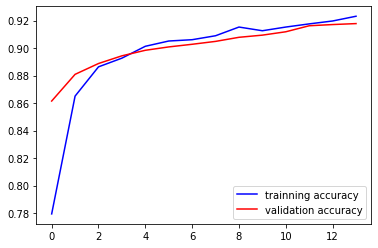

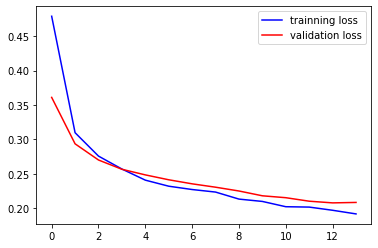

Epoch 1/15
163/163 [==============================] - 16s 59ms/step - loss: 0.4968 - accuracy: 0.7563 - val_loss: 0.3763 - val_accuracy: 0.8530
Epoch 2/15
163/163 [==============================] - 9s 52ms/step - loss: 0.3181 - accuracy: 0.8689 - val_loss: 0.2999 - val_accuracy: 0.8812
Epoch 3/15
163/163 [==============================] - 6s 38ms/step - loss: 0.2749 - accuracy: 0.8942 - val_loss: 0.2741 - val_accuracy: 0.8894
Epoch 4/15
163/163 [==============================] - 9s 55ms/step - loss: 0.2565 - accuracy: 0.9038 - val_loss: 0.2616 - val_accuracy: 0.8949
Epoch 5/15
163/163 [==============================] - 6s 37ms/step - loss: 0.2430 - accuracy: 0.9047 - val_loss: 0.2528 - val_accuracy: 0.8987
Epoch 6/15
163/163 [==============================] - 9s 57ms/step - loss: 0.2415 - accuracy: 0.9030 - val_loss: 0.2431 - val_accuracy: 0.9026
Epoch 7/15
163/163 [==============================] - 9s 53ms/step - loss: 0.2322 - accuracy: 0.9112 - val_loss: 0.2378 - val_accuracy: 0.904

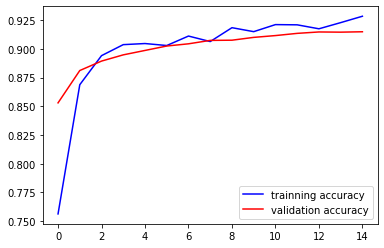

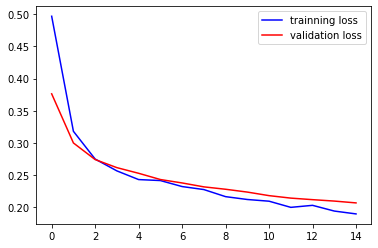

Epoch 1/16
163/163 [==============================] - 16s 66ms/step - loss: 0.5547 - accuracy: 0.7253 - val_loss: 0.3685 - val_accuracy: 0.8569
Epoch 2/16
163/163 [==============================] - 7s 40ms/step - loss: 0.3145 - accuracy: 0.8656 - val_loss: 0.2859 - val_accuracy: 0.8863
Epoch 3/16
163/163 [==============================] - 10s 60ms/step - loss: 0.2646 - accuracy: 0.8926 - val_loss: 0.2601 - val_accuracy: 0.8935
Epoch 4/16
163/163 [==============================] - 7s 42ms/step - loss: 0.2481 - accuracy: 0.9016 - val_loss: 0.2470 - val_accuracy: 0.8982
Epoch 5/16
163/163 [==============================] - 9s 54ms/step - loss: 0.2363 - accuracy: 0.9057 - val_loss: 0.2365 - val_accuracy: 0.9026
Epoch 6/16
163/163 [==============================] - 7s 44ms/step - loss: 0.2322 - accuracy: 0.9039 - val_loss: 0.2285 - val_accuracy: 0.9061
Epoch 7/16
163/163 [==============================] - 6s 37ms/step - loss: 0.2241 - accuracy: 0.9135 - val_loss: 0.2241 - val_accuracy: 0.90

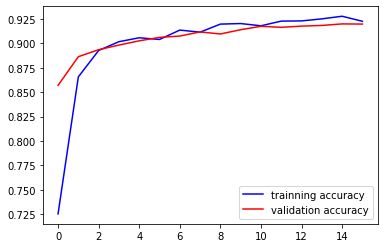

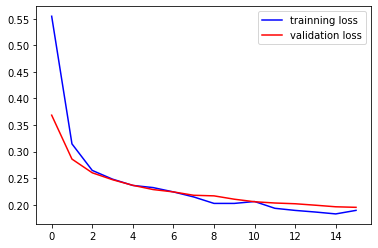

Epoch 1/17
163/163 [==============================] - 17s 65ms/step - loss: 0.4385 - accuracy: 0.7926 - val_loss: 0.3462 - val_accuracy: 0.8553
Epoch 2/17
163/163 [==============================] - 6s 39ms/step - loss: 0.3102 - accuracy: 0.8664 - val_loss: 0.2901 - val_accuracy: 0.8798
Epoch 3/17
163/163 [==============================] - 8s 46ms/step - loss: 0.2687 - accuracy: 0.8921 - val_loss: 0.2678 - val_accuracy: 0.8866
Epoch 4/17
163/163 [==============================] - 9s 53ms/step - loss: 0.2516 - accuracy: 0.8978 - val_loss: 0.2540 - val_accuracy: 0.8970
Epoch 5/17
163/163 [==============================] - 10s 61ms/step - loss: 0.2408 - accuracy: 0.9047 - val_loss: 0.2437 - val_accuracy: 0.9012
Epoch 6/17
163/163 [==============================] - 9s 53ms/step - loss: 0.2264 - accuracy: 0.9109 - val_loss: 0.2364 - val_accuracy: 0.9050
Epoch 7/17
163/163 [==============================] - 6s 38ms/step - loss: 0.2202 - accuracy: 0.9137 - val_loss: 0.2302 - val_accuracy: 0.90

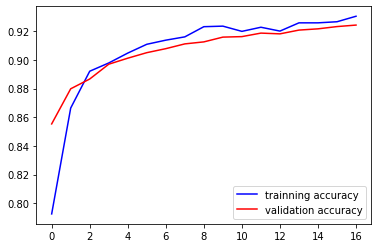

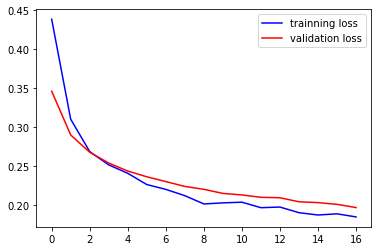

Epoch 1/18
163/163 [==============================] - 16s 58ms/step - loss: 0.3983 - accuracy: 0.8276 - val_loss: 0.3434 - val_accuracy: 0.8691
Epoch 2/18
163/163 [==============================] - 9s 57ms/step - loss: 0.3017 - accuracy: 0.8779 - val_loss: 0.2866 - val_accuracy: 0.8835
Epoch 3/18
163/163 [==============================] - 7s 40ms/step - loss: 0.2744 - accuracy: 0.8907 - val_loss: 0.2648 - val_accuracy: 0.8898
Epoch 4/18
163/163 [==============================] - 10s 61ms/step - loss: 0.2539 - accuracy: 0.8990 - val_loss: 0.2531 - val_accuracy: 0.8938
Epoch 5/18
163/163 [==============================] - 9s 55ms/step - loss: 0.2435 - accuracy: 0.8982 - val_loss: 0.2437 - val_accuracy: 0.8994
Epoch 6/18
163/163 [==============================] - 7s 41ms/step - loss: 0.2299 - accuracy: 0.9109 - val_loss: 0.2360 - val_accuracy: 0.9029
Epoch 7/18
163/163 [==============================] - 8s 48ms/step - loss: 0.2304 - accuracy: 0.9103 - val_loss: 0.2313 - val_accuracy: 0.90

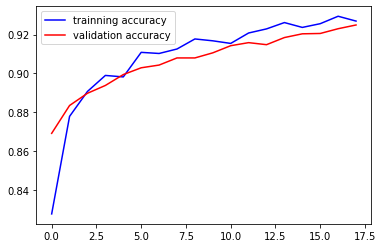

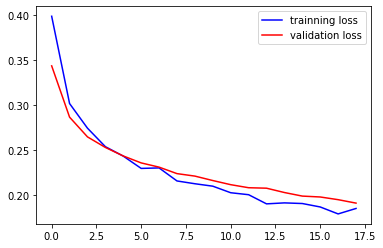

Epoch 1/19
163/163 [==============================] - 19s 73ms/step - loss: 0.4684 - accuracy: 0.7724 - val_loss: 0.3620 - val_accuracy: 0.8478
Epoch 2/19
163/163 [==============================] - 7s 44ms/step - loss: 0.3097 - accuracy: 0.8702 - val_loss: 0.2915 - val_accuracy: 0.8814
Epoch 3/19
163/163 [==============================] - 6s 37ms/step - loss: 0.2698 - accuracy: 0.8898 - val_loss: 0.2661 - val_accuracy: 0.8907
Epoch 4/19
163/163 [==============================] - 9s 53ms/step - loss: 0.2508 - accuracy: 0.9011 - val_loss: 0.2522 - val_accuracy: 0.8940
Epoch 5/19
163/163 [==============================] - 6s 37ms/step - loss: 0.2388 - accuracy: 0.9047 - val_loss: 0.2419 - val_accuracy: 0.8989
Epoch 6/19
163/163 [==============================] - 9s 55ms/step - loss: 0.2310 - accuracy: 0.9082 - val_loss: 0.2347 - val_accuracy: 0.9006
Epoch 7/19
163/163 [==============================] - 6s 36ms/step - loss: 0.2225 - accuracy: 0.9128 - val_loss: 0.2277 - val_accuracy: 0.903

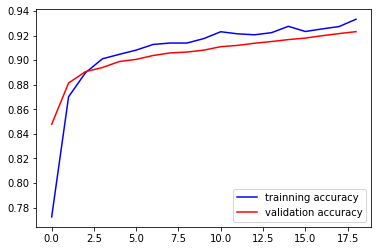

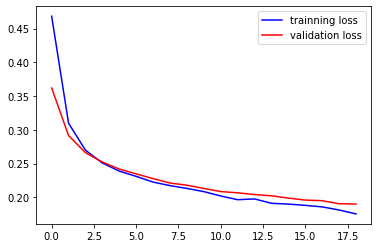

In [ ]:
from keras.saving.legacy.serialization import DisableSharedObjectScope
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#-------------------------------------------
#   Q3 transfer
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
import matplotlib.pyplot as plt
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs=10,batch_size = 32, validation_data=(X_val, y_val))

#optimizers = [tf.keras.optimizers.SGD(), tf.keras.optimizers.SGD(momentum=0.9), tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop()]
from keras.optimizers import SGD,Adam,RMSprop
optimizers=[SGD,Adam,RMSprop]
# Define a list of learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]
# Define the number of epochs to train each model


# Train the model for each combination of optimization algorithm and learning rate
for optimizer in optimizers:
    for learning_rate in learning_rates:
        for epochs in range(5 ,20,1):
            base_model = tf.keras.applications.DenseNet121(
                weights='imagenet',
                input_shape=X_train.shape[1:],
               include_top=False)
            base_model.trainable = False


            inputs = tf.keras.Input(X_train.shape[1:])
            x = base_model(inputs)

            x = tf.keras.layers.GlobalAveragePooling2D()(x)
            x = tf.keras.layers.Dense(128, activation='relu')(x)
            x = tf.keras.layers.Dropout(0.1)(x)
            output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
            model = tf.keras.Model(inputs, output)

            for layer in base_model.layers[-1:-20:-1]:
              layer.trainable = True
            model.compile(loss="binary_crossentropy", optimizer=optimizer(learning_rate=learning_rate), metrics=["accuracy"])
            history = model.fit(X_train, y_train, epochs=epochs,batch_size = 32, validation_data=(X_val, y_val))
            scores = model.evaluate(X_test, y_test)
            print('Optimizer:', optimizer, 'Learning rate:', learning_rate)
            # scores
            print("Test loss {}".format(scores[0]))
            print("Test accuracy {}".format(scores[1]))
            # visualization

            accuracy = history.history['accuracy']
            val_accuracy = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(accuracy))

            plt.plot(epochs, accuracy, "b", label="trainning accuracy")
            plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
            plt.legend()
            plt.show()

            plt.plot(epochs, loss, "b", label="trainning loss")
            plt.plot(epochs, val_loss, "r", label="validation loss")
            plt.legend()
            plt.show()

for learning_rate in learning_rates:
    for epochs in range(5 ,20,1):
        
        base_model = tf.keras.applications.DenseNet121(
          weights='imagenet',
          input_shape=X_train.shape[1:],
          include_top=False)
        base_model.trainable = False


        inputs = tf.keras.Input(X_train.shape[1:])
        x = base_model(inputs)

        x = tf.keras.layers.GlobalAveragePooling2D()(x)
        x = tf.keras.layers.Dense(128, activation='relu')(x)
        x = tf.keras.layers.Dropout(0.1)(x)
        output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
        model = tf.keras.Model(inputs, output)

        for layer in base_model.layers[-1:-20:-1]:
          layer.trainable = True

        model.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=learning_rate,momentum=0.9), metrics=["accuracy"])

   
        history = model.fit(X_train, y_train, epochs=epochs,batch_size = 32, validation_data=(X_val, y_val))
        scores = model.evaluate(X_test, y_test)
        print('Optimizer:', "sgd with 0.9 momentom", 'Learning rate:', learning_rate)
        print("Test loss {}".format(scores[0]))
        print("Test accuracy {}".format(scores[1]))

        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(len(accuracy))

        plt.plot(epochs, accuracy, "b", label="trainning accuracy")
        plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
        plt.legend()
        plt.show()

        plt.plot(epochs, loss, "b", label="trainning loss")
        plt.plot(epochs, val_loss, "r", label="validation loss")
        plt.legend()
        plt.show()



['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-12-84720cd81fd2>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 64)        640       
                                                                 
 activation_9 (Activation)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 25, 25, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 activation_10 (Activation)  (None, 25, 25, 128)       0         
                                                      

Test loss 0.12683522701263428
Test accuracy 0.9691951274871826


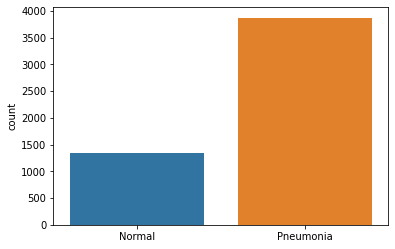

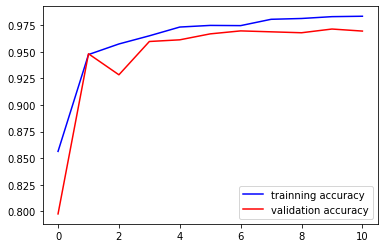

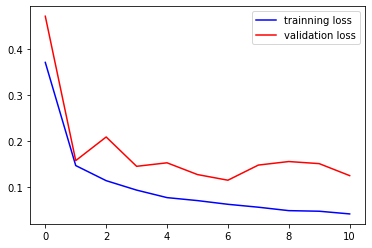

176/176 [==============================] - 1s 3ms/step


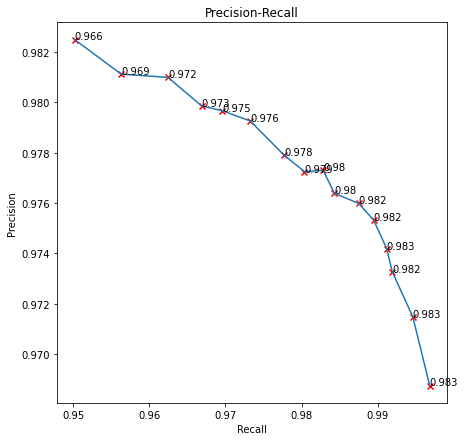

      Precision    Recall  F_score
0.10   0.968757  0.996810    0.983
0.15   0.971477  0.994601    0.983
0.20   0.973272  0.991902    0.982
0.25   0.974192  0.991166    0.983
0.30   0.975327  0.989448    0.982
0.35   0.975988  0.987485    0.982
0.40   0.976388  0.984294    0.980
0.45   0.977306  0.982822    0.980
0.50   0.977250  0.980368    0.979
0.55   0.977909  0.977669    0.978
0.60   0.979259  0.973252    0.976
0.65   0.979668  0.969571    0.975
0.70   0.979856  0.966871    0.973
0.75   0.980990  0.962454    0.972
0.80   0.981118  0.956319    0.969
0.85   0.982492  0.950184    0.966
The highest F-SCORE accepted in Threshold: 0.1


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#-------------------------------------------
#   q3 cnn early stopping
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
from keras.callbacks import EarlyStopping
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD,Adam,RMSprop
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.summary()
early_stopping_monitor = EarlyStopping(patience = 4, monitor = "val_loss", mode="auto", verbose = 2)
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=17,batch_size = 32, validation_data=(X_val, y_val),callbacks=[early_stopping_monitor])
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
##loading data
import cv2 as cv
import os
test_predictions = model.predict(X_test) 
Threshold_level=0.1
precision_y=[]
recall_x=[]
f_score_array=[]
plt.figure(figsize=(7,7))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
select_Thr,max_F_SCORE=0,0 ##select_Thr-The Threshold that give the highest F-SCORE
while(Threshold_level<=0.9):
  predict_label=test_predictions>=Threshold_level
  true_label=y_test
  TN,FP,FN,TP=confusion_matrix(true_label,predict_label,labels=(0,1)).ravel()
  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  f_score=round(2/((1/precision)+(1/recall)),3)
  f_score_array.append(f_score)
  if f_score>max_F_SCORE:
    max_F_SCORE=f_score
    select_Thr=Threshold_level
  precision_y.append(precision)
  recall_x.append(recall)
  plt.annotate(f_score,(recall,precision))
  plt.scatter(recall,precision,c='red',marker='x')
  Threshold_level+=0.05
plt.plot(recall_x,precision_y)
plt.show()
dict={"Precision":precision_y,"Recall":recall_x,"F_score":f_score_array}
brics = pd.DataFrame(dict)
brics.index =np.arange(0.1,0.9,0.05)
print (brics)
print("The highest F-SCORE accepted in Threshold:",select_Thr)


['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-10-5edbb8d6b917>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 50, 50, 3)]       0         
                                                                 
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d_4   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 128)               131200    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                           

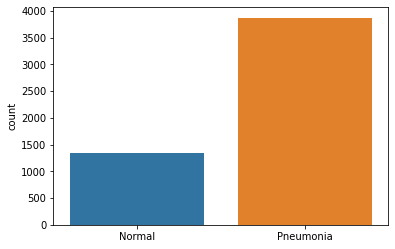

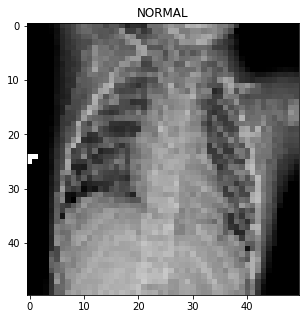

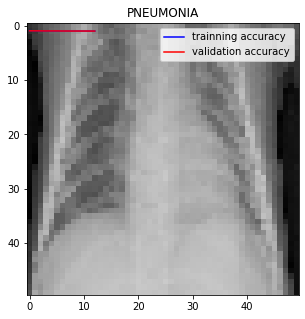

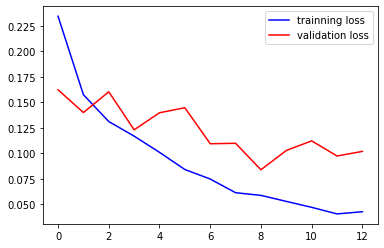

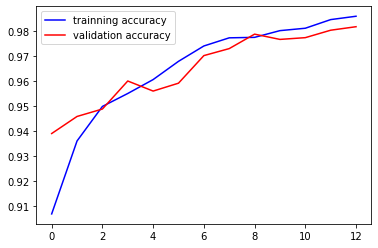

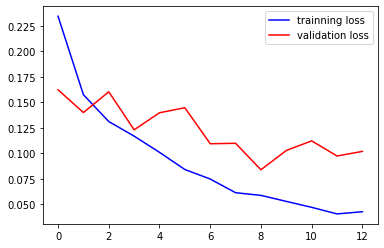

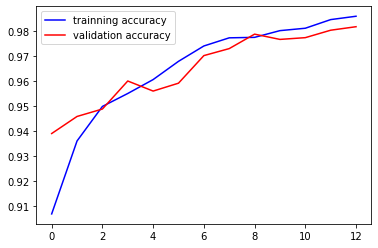

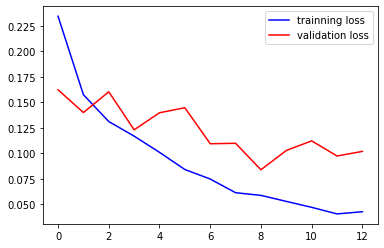

176/176 [==============================] - 6s 18ms/step


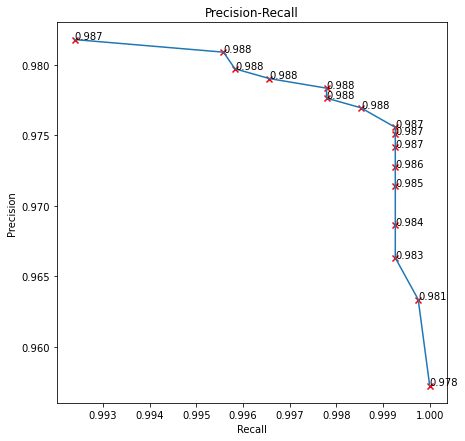

      Precision    Recall  F_score
0.10   0.957247  1.000000    0.978
0.15   0.963348  0.999755    0.981
0.20   0.966303  0.999264    0.983
0.25   0.968601  0.999264    0.984
0.30   0.971374  0.999264    0.985
0.35   0.972766  0.999264    0.986
0.40   0.974163  0.999264    0.987
0.45   0.975096  0.999264    0.987
0.50   0.975563  0.999264    0.987
0.55   0.976951  0.998528    0.988
0.60   0.977639  0.997791    0.988
0.65   0.978345  0.997791    0.988
0.70   0.979026  0.996564    0.988
0.75   0.979720  0.995828    0.988
0.80   0.980899  0.995583    0.988
0.85   0.981792  0.992393    0.987
The highest F-SCORE accepted in Threshold: 0.5499999999999999


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#-------------------------------------------
#   Q3 transfer with fine tuning early stopping
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD,Adam,RMSprop
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:
    if(i[1] == 0):
        l.append("Normal")
    else:
        l.append("Pneumonia")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])
 
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

base_model = tf.keras.applications.DenseNet121(
    weights='imagenet',
    input_shape=X_train.shape[1:],
    include_top=False)
base_model.trainable = False


inputs = tf.keras.Input(X_train.shape[1:])
x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.1)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, output)




for layer in base_model.layers[-1:-20:-1]:
    layer.trainable = True

model.summary()
early_stopping_monitor = EarlyStopping(patience = 4, monitor = "val_loss", mode="auto", verbose = 2)
model.compile(loss="binary_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=18,batch_size = 32, validation_data=(X_val, y_val),callbacks=[early_stopping_monitor])
scores = model.evaluate(X_test, y_test)

print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
##loading data
import cv2 as cv
import os
test_predictions = model.predict(X_test) 
Threshold_level=0.1
precision_y=[]
recall_x=[]
f_score_array=[]
plt.figure(figsize=(7,7))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
select_Thr,max_F_SCORE=0,0 ##select_Thr-The Threshold that give the highest F-SCORE
while(Threshold_level<=0.9):
  predict_label=test_predictions>=Threshold_level
  true_label=y_test
  TN,FP,FN,TP=confusion_matrix(true_label,predict_label,labels=(0,1)).ravel()
  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  f_score=round(2/((1/precision)+(1/recall)),3)
  f_score_array.append(f_score)
  if f_score>max_F_SCORE:
    max_F_SCORE=f_score
    select_Thr=Threshold_level
  precision_y.append(precision)
  recall_x.append(recall)
  plt.annotate(f_score,(recall,precision))
  plt.scatter(recall,precision,c='red',marker='x')
  Threshold_level+=0.05
plt.plot(recall_x,precision_y)
plt.show()
dict={"Precision":precision_y,"Recall":recall_x,"F_score":f_score_array}
brics = pd.DataFrame(dict)
brics.index =np.arange(0.1,0.9,0.05)
print (brics)
print("The highest F-SCORE accepted in Threshold:",select_Thr)

['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-2-d8ef78bb1511>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Epoch 1/10
163/163 [==============================] - 11s 16ms/step - loss: 0.9987 - accuracy: 0.5146 - val_loss: 0.7386 - val_accuracy: 0.6685
Epoch 2/10
163/163 [==============================] - 2s 12ms/step - loss: 0.7415 - accuracy: 0.6718 - val_loss: 0.6054 - val_accuracy: 0.7566
Epoch 3/10
163/163 [==============================] - 2s 12ms/step - loss: 0.5593 - accuracy: 0.7519 - val_loss: 0.5328 - val_accuracy: 0.7748
Epoch 4/10
163/163 [==============================] - 3s 16ms/step - loss: 0.5079 - accuracy: 0.7738 - val_loss: 0.5305 - val_accuracy: 0.7668
Epoch 5/10
163/163 [==============================] - 3s 17ms/step - loss: 0.4869 - accuracy: 0.7843 - val_loss: 0.4952 - val_accuracy: 0.7932
Epoch 6/10
163/163 [==============================] - 2s 12ms/step - loss: 0.4743 - accuracy: 0.7836 - val_loss: 0.4852 - val_accuracy: 0.7960
Epoch 7/10
163/163 [==============================] - 2s 12ms/step - loss: 0.4527 - accuracy: 0.7979 - val_loss: 0.4658 - val_accuracy: 0.805

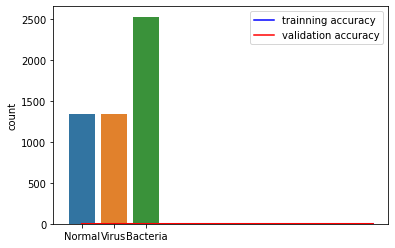

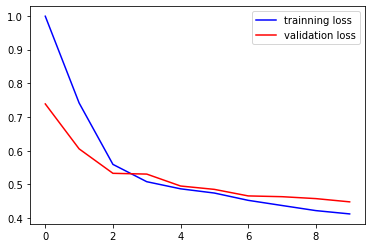

Epoch 1/11
163/163 [==============================] - 3s 15ms/step - loss: 0.9613 - accuracy: 0.5468 - val_loss: 0.6720 - val_accuracy: 0.7213
Epoch 2/11
163/163 [==============================] - 2s 12ms/step - loss: 0.6408 - accuracy: 0.7166 - val_loss: 0.8948 - val_accuracy: 0.5787
Epoch 3/11
163/163 [==============================] - 2s 12ms/step - loss: 0.5412 - accuracy: 0.7627 - val_loss: 0.6299 - val_accuracy: 0.7369
Epoch 4/11
163/163 [==============================] - 2s 12ms/step - loss: 0.5047 - accuracy: 0.7793 - val_loss: 0.6243 - val_accuracy: 0.7505
Epoch 5/11
163/163 [==============================] - 2s 12ms/step - loss: 0.4814 - accuracy: 0.7824 - val_loss: 0.4811 - val_accuracy: 0.7974
Epoch 6/11
163/163 [==============================] - 3s 17ms/step - loss: 0.4467 - accuracy: 0.7960 - val_loss: 0.4743 - val_accuracy: 0.8049
Epoch 7/11
163/163 [==============================] - 2s 12ms/step - loss: 0.4437 - accuracy: 0.7995 - val_loss: 0.5105 - val_accuracy: 0.7843

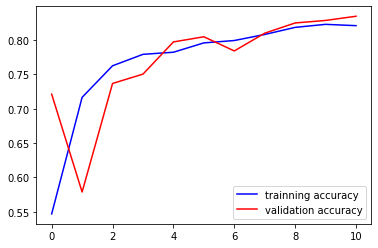

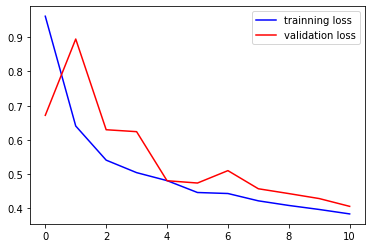

Epoch 1/12
163/163 [==============================] - 3s 15ms/step - loss: 1.0112 - accuracy: 0.5220 - val_loss: 0.8895 - val_accuracy: 0.6023
Epoch 2/12
163/163 [==============================] - 3s 16ms/step - loss: 0.7139 - accuracy: 0.6823 - val_loss: 0.5455 - val_accuracy: 0.7713
Epoch 3/12
163/163 [==============================] - 2s 13ms/step - loss: 0.5684 - accuracy: 0.7527 - val_loss: 0.5284 - val_accuracy: 0.7741
Epoch 4/12
163/163 [==============================] - 2s 15ms/step - loss: 0.5160 - accuracy: 0.7730 - val_loss: 0.5281 - val_accuracy: 0.7848
Epoch 5/12
163/163 [==============================] - 2s 12ms/step - loss: 0.4955 - accuracy: 0.7816 - val_loss: 0.4997 - val_accuracy: 0.7899
Epoch 6/12
163/163 [==============================] - 2s 12ms/step - loss: 0.4738 - accuracy: 0.7857 - val_loss: 0.4770 - val_accuracy: 0.8000
Epoch 7/12
163/163 [==============================] - 2s 12ms/step - loss: 0.4577 - accuracy: 0.7947 - val_loss: 0.4625 - val_accuracy: 0.8002

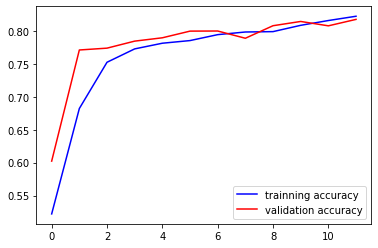

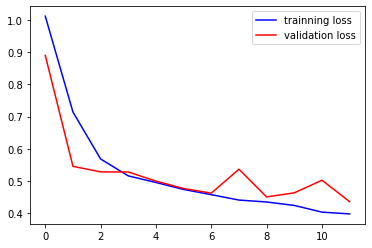

Epoch 1/13
163/163 [==============================] - 3s 18ms/step - loss: 1.0370 - accuracy: 0.5075 - val_loss: 1.0249 - val_accuracy: 0.4645
Epoch 2/13
163/163 [==============================] - 2s 13ms/step - loss: 0.8368 - accuracy: 0.6171 - val_loss: 0.7558 - val_accuracy: 0.6370
Epoch 3/13
163/163 [==============================] - 2s 12ms/step - loss: 0.6035 - accuracy: 0.7281 - val_loss: 0.5567 - val_accuracy: 0.7645
Epoch 4/13
163/163 [==============================] - 2s 12ms/step - loss: 0.5141 - accuracy: 0.7667 - val_loss: 0.5042 - val_accuracy: 0.7860
Epoch 5/13
163/163 [==============================] - 2s 12ms/step - loss: 0.5236 - accuracy: 0.7657 - val_loss: 0.5093 - val_accuracy: 0.7848
Epoch 6/13
163/163 [==============================] - 2s 12ms/step - loss: 0.4789 - accuracy: 0.7849 - val_loss: 0.5201 - val_accuracy: 0.7864
Epoch 7/13
163/163 [==============================] - 2s 12ms/step - loss: 0.4569 - accuracy: 0.7935 - val_loss: 0.5289 - val_accuracy: 0.7850

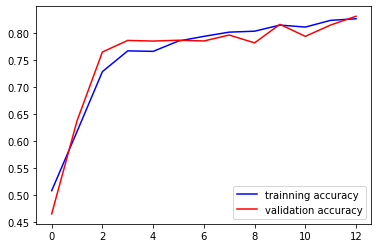

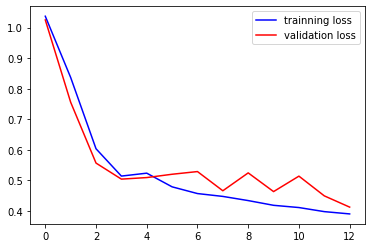

Epoch 1/14
163/163 [==============================] - 3s 16ms/step - loss: 0.9802 - accuracy: 0.5366 - val_loss: 1.0088 - val_accuracy: 0.4648
Epoch 2/14
163/163 [==============================] - 2s 12ms/step - loss: 0.8076 - accuracy: 0.6432 - val_loss: 0.9067 - val_accuracy: 0.5551
Epoch 3/14
163/163 [==============================] - 2s 12ms/step - loss: 0.5897 - accuracy: 0.7396 - val_loss: 0.5452 - val_accuracy: 0.7783
Epoch 4/14
163/163 [==============================] - 2s 12ms/step - loss: 0.5315 - accuracy: 0.7625 - val_loss: 0.5163 - val_accuracy: 0.7778
Epoch 5/14
163/163 [==============================] - 3s 17ms/step - loss: 0.4931 - accuracy: 0.7839 - val_loss: 0.5042 - val_accuracy: 0.7922
Epoch 6/14
163/163 [==============================] - 2s 13ms/step - loss: 0.4805 - accuracy: 0.7853 - val_loss: 0.5077 - val_accuracy: 0.7822
Epoch 7/14
163/163 [==============================] - 2s 13ms/step - loss: 0.4509 - accuracy: 0.7975 - val_loss: 0.4836 - val_accuracy: 0.7969

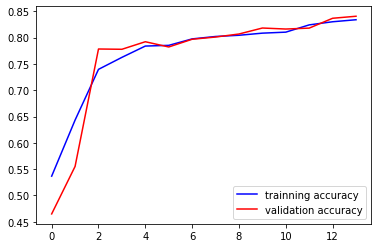

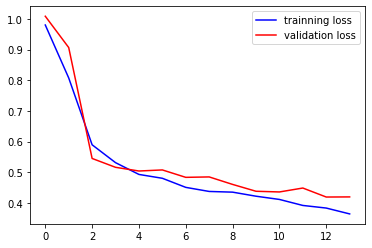

Epoch 1/15
163/163 [==============================] - 3s 15ms/step - loss: 0.9471 - accuracy: 0.5485 - val_loss: 0.7497 - val_accuracy: 0.6713
Epoch 2/15
163/163 [==============================] - 2s 12ms/step - loss: 0.6601 - accuracy: 0.7113 - val_loss: 0.6393 - val_accuracy: 0.7024
Epoch 3/15
163/163 [==============================] - 3s 17ms/step - loss: 0.5412 - accuracy: 0.7642 - val_loss: 0.5187 - val_accuracy: 0.7745
Epoch 4/15
163/163 [==============================] - 2s 13ms/step - loss: 0.4989 - accuracy: 0.7782 - val_loss: 0.5068 - val_accuracy: 0.7852
Epoch 5/15
163/163 [==============================] - 2s 12ms/step - loss: 0.4777 - accuracy: 0.7841 - val_loss: 0.5450 - val_accuracy: 0.7596
Epoch 6/15
163/163 [==============================] - 2s 12ms/step - loss: 0.4605 - accuracy: 0.7916 - val_loss: 0.4724 - val_accuracy: 0.8069
Epoch 7/15
163/163 [==============================] - 2s 12ms/step - loss: 0.4467 - accuracy: 0.7974 - val_loss: 0.4916 - val_accuracy: 0.7955

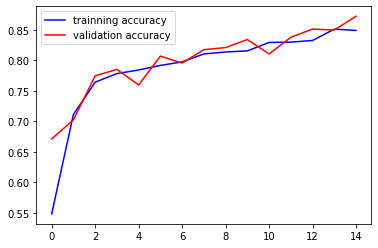

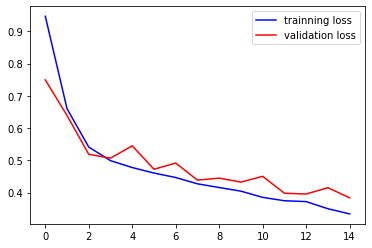

Epoch 1/16
163/163 [==============================] - 3s 16ms/step - loss: 1.0376 - accuracy: 0.4996 - val_loss: 0.9029 - val_accuracy: 0.5717
Epoch 2/16
163/163 [==============================] - 2s 12ms/step - loss: 0.9440 - accuracy: 0.5564 - val_loss: 0.7617 - val_accuracy: 0.6622
Epoch 3/16
163/163 [==============================] - 2s 12ms/step - loss: 0.6498 - accuracy: 0.7136 - val_loss: 0.5958 - val_accuracy: 0.7533
Epoch 4/16
163/163 [==============================] - 2s 12ms/step - loss: 0.6025 - accuracy: 0.7333 - val_loss: 0.9106 - val_accuracy: 0.5983
Epoch 5/16
163/163 [==============================] - 2s 12ms/step - loss: 0.5300 - accuracy: 0.7613 - val_loss: 0.5363 - val_accuracy: 0.7724
Epoch 6/16
163/163 [==============================] - 2s 13ms/step - loss: 0.4959 - accuracy: 0.7818 - val_loss: 0.5020 - val_accuracy: 0.7866
Epoch 7/16
163/163 [==============================] - 2s 13ms/step - loss: 0.4762 - accuracy: 0.7837 - val_loss: 0.5275 - val_accuracy: 0.7899

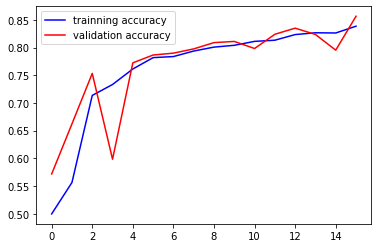

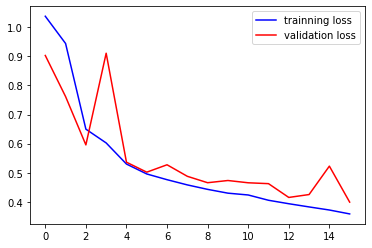

Epoch 1/17
163/163 [==============================] - 3s 15ms/step - loss: 0.9828 - accuracy: 0.5339 - val_loss: 0.7614 - val_accuracy: 0.7022
Epoch 2/17
163/163 [==============================] - 2s 12ms/step - loss: 0.6460 - accuracy: 0.7147 - val_loss: 0.5746 - val_accuracy: 0.7670
Epoch 3/17
163/163 [==============================] - 2s 13ms/step - loss: 0.5428 - accuracy: 0.7594 - val_loss: 0.5721 - val_accuracy: 0.7633
Epoch 4/17
163/163 [==============================] - 3s 17ms/step - loss: 0.5000 - accuracy: 0.7699 - val_loss: 0.5135 - val_accuracy: 0.7869
Epoch 5/17
163/163 [==============================] - 2s 13ms/step - loss: 0.4721 - accuracy: 0.7876 - val_loss: 0.4945 - val_accuracy: 0.7992
Epoch 6/17
163/163 [==============================] - 2s 12ms/step - loss: 0.4582 - accuracy: 0.7910 - val_loss: 0.4872 - val_accuracy: 0.7953
Epoch 7/17
163/163 [==============================] - 2s 13ms/step - loss: 0.4511 - accuracy: 0.7974 - val_loss: 0.4526 - val_accuracy: 0.8074

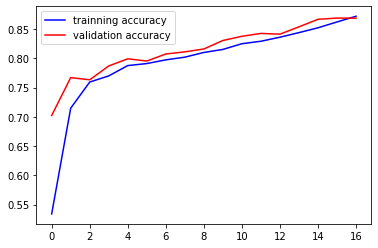

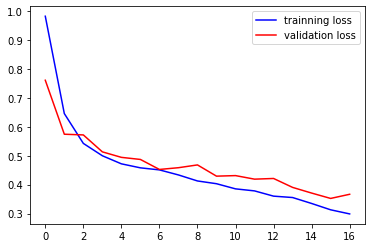

Epoch 1/18
163/163 [==============================] - 3s 15ms/step - loss: 1.0369 - accuracy: 0.5125 - val_loss: 1.0751 - val_accuracy: 0.4645
Epoch 2/18
163/163 [==============================] - 2s 12ms/step - loss: 0.8280 - accuracy: 0.6371 - val_loss: 0.7640 - val_accuracy: 0.6793
Epoch 3/18
163/163 [==============================] - 2s 12ms/step - loss: 0.6288 - accuracy: 0.7205 - val_loss: 0.6830 - val_accuracy: 0.6648
Epoch 4/18
163/163 [==============================] - 3s 17ms/step - loss: 0.5384 - accuracy: 0.7627 - val_loss: 0.5776 - val_accuracy: 0.7673
Epoch 5/18
163/163 [==============================] - 2s 12ms/step - loss: 0.5082 - accuracy: 0.7755 - val_loss: 0.5551 - val_accuracy: 0.7698
Epoch 6/18
163/163 [==============================] - 2s 12ms/step - loss: 0.4964 - accuracy: 0.7795 - val_loss: 0.5531 - val_accuracy: 0.7712
Epoch 7/18
163/163 [==============================] - 2s 12ms/step - loss: 0.4805 - accuracy: 0.7822 - val_loss: 0.4804 - val_accuracy: 0.8004

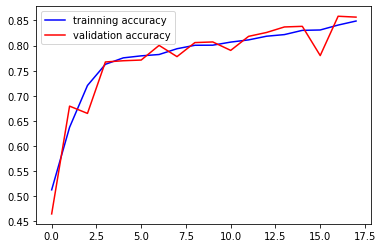

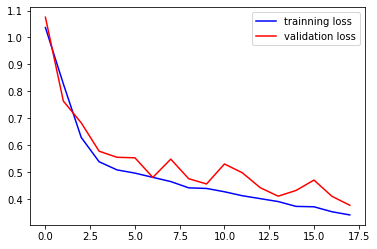

Epoch 1/19
163/163 [==============================] - 3s 15ms/step - loss: 1.0300 - accuracy: 0.4967 - val_loss: 0.9946 - val_accuracy: 0.4787
Epoch 2/19
163/163 [==============================] - 3s 17ms/step - loss: 0.8180 - accuracy: 0.6198 - val_loss: 0.5875 - val_accuracy: 0.7554
Epoch 3/19
163/163 [==============================] - 2s 13ms/step - loss: 0.6105 - accuracy: 0.7373 - val_loss: 0.5465 - val_accuracy: 0.7722
Epoch 4/19
163/163 [==============================] - 2s 12ms/step - loss: 0.5291 - accuracy: 0.7673 - val_loss: 0.5078 - val_accuracy: 0.7859
Epoch 5/19
163/163 [==============================] - 2s 12ms/step - loss: 0.4964 - accuracy: 0.7772 - val_loss: 0.5010 - val_accuracy: 0.7902
Epoch 6/19
163/163 [==============================] - 2s 12ms/step - loss: 0.4663 - accuracy: 0.7895 - val_loss: 0.5153 - val_accuracy: 0.7888
Epoch 7/19
163/163 [==============================] - 2s 12ms/step - loss: 0.4582 - accuracy: 0.7899 - val_loss: 0.4615 - val_accuracy: 0.8042

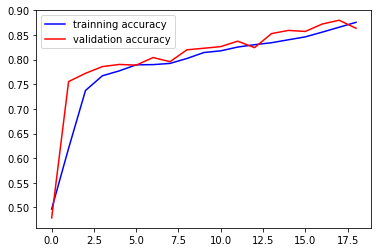

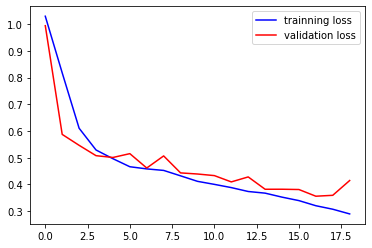

Epoch 1/10
163/163 [==============================] - 4s 20ms/step - loss: 1.0013 - accuracy: 0.5153 - val_loss: 0.9412 - val_accuracy: 0.4834
Epoch 2/10
163/163 [==============================] - 2s 12ms/step - loss: 0.8384 - accuracy: 0.6313 - val_loss: 0.7648 - val_accuracy: 0.7192
Epoch 3/10
163/163 [==============================] - 2s 13ms/step - loss: 0.7241 - accuracy: 0.6798 - val_loss: 0.6825 - val_accuracy: 0.7271
Epoch 4/10
163/163 [==============================] - 2s 12ms/step - loss: 0.6542 - accuracy: 0.7092 - val_loss: 0.6593 - val_accuracy: 0.7442
Epoch 5/10
163/163 [==============================] - 2s 13ms/step - loss: 0.6090 - accuracy: 0.7352 - val_loss: 0.6189 - val_accuracy: 0.7554
Epoch 6/10
163/163 [==============================] - 2s 12ms/step - loss: 0.5840 - accuracy: 0.7377 - val_loss: 0.6112 - val_accuracy: 0.7472
Epoch 7/10
163/163 [==============================] - 3s 17ms/step - loss: 0.5737 - accuracy: 0.7435 - val_loss: 0.5851 - val_accuracy: 0.7591

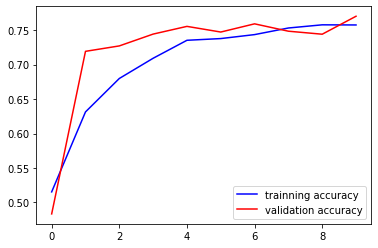

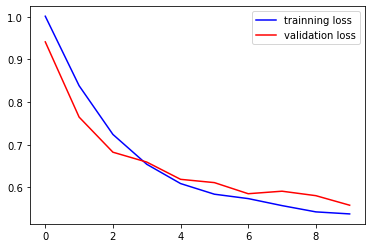

Epoch 1/11
163/163 [==============================] - 4s 20ms/step - loss: 0.9992 - accuracy: 0.5245 - val_loss: 0.9296 - val_accuracy: 0.5138
Epoch 2/11
163/163 [==============================] - 2s 13ms/step - loss: 0.8293 - accuracy: 0.6325 - val_loss: 0.7519 - val_accuracy: 0.7166
Epoch 3/11
163/163 [==============================] - 2s 12ms/step - loss: 0.7207 - accuracy: 0.6860 - val_loss: 0.6877 - val_accuracy: 0.7330
Epoch 4/11
163/163 [==============================] - 2s 12ms/step - loss: 0.6557 - accuracy: 0.7149 - val_loss: 0.6696 - val_accuracy: 0.7192
Epoch 5/11
163/163 [==============================] - 2s 12ms/step - loss: 0.6273 - accuracy: 0.7211 - val_loss: 0.6943 - val_accuracy: 0.6571
Epoch 6/11
163/163 [==============================] - 2s 12ms/step - loss: 0.5974 - accuracy: 0.7349 - val_loss: 0.6645 - val_accuracy: 0.6965
Epoch 7/11
163/163 [==============================] - 3s 17ms/step - loss: 0.5841 - accuracy: 0.7462 - val_loss: 0.6173 - val_accuracy: 0.7463

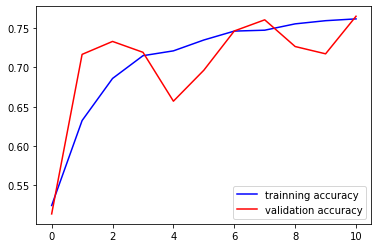

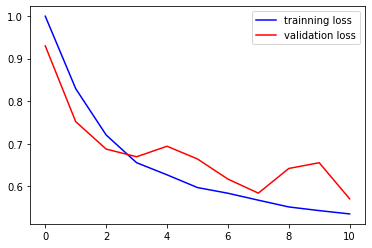

Epoch 1/12
163/163 [==============================] - 4s 20ms/step - loss: 0.9890 - accuracy: 0.5276 - val_loss: 0.9106 - val_accuracy: 0.5625
Epoch 2/12
163/163 [==============================] - 2s 13ms/step - loss: 0.8300 - accuracy: 0.6250 - val_loss: 0.9435 - val_accuracy: 0.5045
Epoch 3/12
163/163 [==============================] - 2s 12ms/step - loss: 0.7170 - accuracy: 0.6781 - val_loss: 0.7141 - val_accuracy: 0.7232
Epoch 4/12
163/163 [==============================] - 2s 12ms/step - loss: 0.6581 - accuracy: 0.7128 - val_loss: 0.7169 - val_accuracy: 0.6937
Epoch 5/12
163/163 [==============================] - 2s 12ms/step - loss: 0.6240 - accuracy: 0.7178 - val_loss: 0.6380 - val_accuracy: 0.7427
Epoch 6/12
163/163 [==============================] - 2s 12ms/step - loss: 0.5951 - accuracy: 0.7354 - val_loss: 0.6647 - val_accuracy: 0.7194
Epoch 7/12
163/163 [==============================] - 2s 13ms/step - loss: 0.5710 - accuracy: 0.7441 - val_loss: 0.6030 - val_accuracy: 0.7505

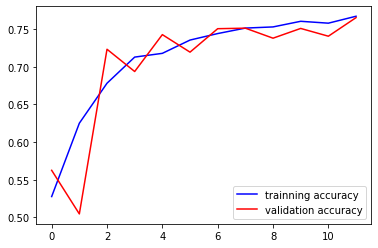

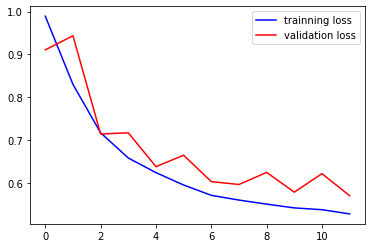

Epoch 1/13
163/163 [==============================] - 3s 16ms/step - loss: 1.0083 - accuracy: 0.5140 - val_loss: 0.9191 - val_accuracy: 0.6456
Epoch 2/13
163/163 [==============================] - 2s 13ms/step - loss: 0.8338 - accuracy: 0.6302 - val_loss: 0.7441 - val_accuracy: 0.7255
Epoch 3/13
163/163 [==============================] - 2s 13ms/step - loss: 0.7218 - accuracy: 0.6768 - val_loss: 0.7151 - val_accuracy: 0.7112
Epoch 4/13
163/163 [==============================] - 2s 12ms/step - loss: 0.6512 - accuracy: 0.7118 - val_loss: 0.6534 - val_accuracy: 0.7285
Epoch 5/13
163/163 [==============================] - 3s 17ms/step - loss: 0.6196 - accuracy: 0.7241 - val_loss: 0.6914 - val_accuracy: 0.7087
Epoch 6/13
163/163 [==============================] - 2s 14ms/step - loss: 0.5932 - accuracy: 0.7387 - val_loss: 0.6004 - val_accuracy: 0.7568
Epoch 7/13
163/163 [==============================] - 2s 12ms/step - loss: 0.5743 - accuracy: 0.7437 - val_loss: 0.6496 - val_accuracy: 0.7239

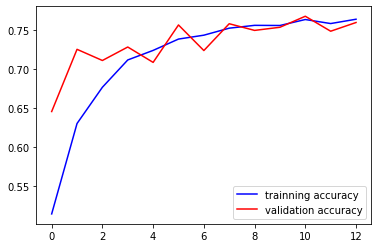

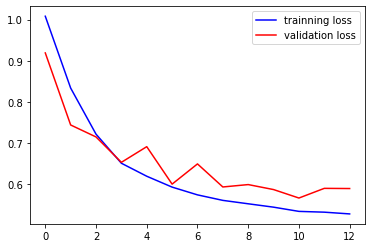

Epoch 1/14
163/163 [==============================] - 3s 15ms/step - loss: 0.9908 - accuracy: 0.5332 - val_loss: 0.8994 - val_accuracy: 0.6924
Epoch 2/14
163/163 [==============================] - 2s 12ms/step - loss: 0.8299 - accuracy: 0.6281 - val_loss: 0.7240 - val_accuracy: 0.7096
Epoch 3/14
163/163 [==============================] - 2s 13ms/step - loss: 0.7106 - accuracy: 0.6871 - val_loss: 0.6696 - val_accuracy: 0.7437
Epoch 4/14
163/163 [==============================] - 3s 17ms/step - loss: 0.6500 - accuracy: 0.7105 - val_loss: 0.6320 - val_accuracy: 0.7493
Epoch 5/14
163/163 [==============================] - 2s 13ms/step - loss: 0.6094 - accuracy: 0.7266 - val_loss: 0.6165 - val_accuracy: 0.7512
Epoch 6/14
163/163 [==============================] - 2s 12ms/step - loss: 0.5913 - accuracy: 0.7324 - val_loss: 0.6513 - val_accuracy: 0.7255
Epoch 7/14
163/163 [==============================] - 2s 13ms/step - loss: 0.5697 - accuracy: 0.7458 - val_loss: 0.5869 - val_accuracy: 0.7577

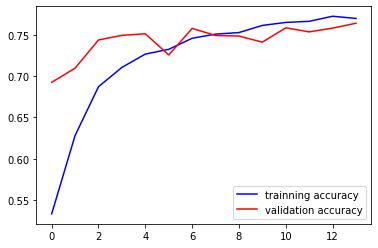

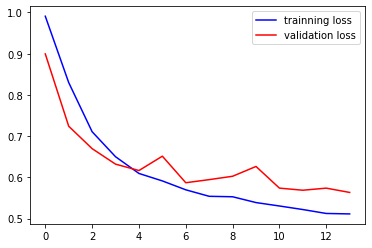

Epoch 1/15
163/163 [==============================] - 4s 20ms/step - loss: 0.9871 - accuracy: 0.5374 - val_loss: 0.8920 - val_accuracy: 0.6723
Epoch 2/15
163/163 [==============================] - 2s 13ms/step - loss: 0.8296 - accuracy: 0.6306 - val_loss: 0.7522 - val_accuracy: 0.7150
Epoch 3/15
163/163 [==============================] - 2s 12ms/step - loss: 0.7131 - accuracy: 0.6869 - val_loss: 0.6685 - val_accuracy: 0.7395
Epoch 4/15
163/163 [==============================] - 2s 13ms/step - loss: 0.6370 - accuracy: 0.7224 - val_loss: 0.6239 - val_accuracy: 0.7355
Epoch 5/15
163/163 [==============================] - 2s 12ms/step - loss: 0.6090 - accuracy: 0.7339 - val_loss: 0.6198 - val_accuracy: 0.7542
Epoch 6/15
163/163 [==============================] - 2s 13ms/step - loss: 0.5878 - accuracy: 0.7410 - val_loss: 0.7010 - val_accuracy: 0.6788
Epoch 7/15
163/163 [==============================] - 2s 13ms/step - loss: 0.5681 - accuracy: 0.7469 - val_loss: 0.6272 - val_accuracy: 0.7388

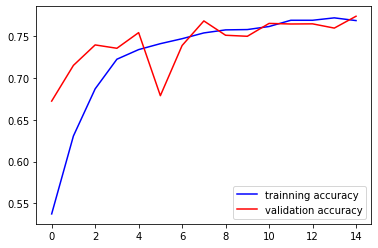

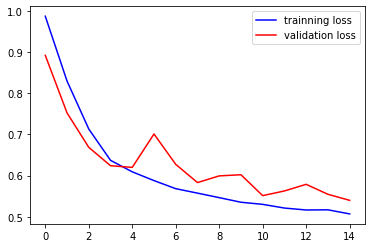

Epoch 1/16
163/163 [==============================] - 3s 16ms/step - loss: 0.9805 - accuracy: 0.5359 - val_loss: 0.9409 - val_accuracy: 0.4718
Epoch 2/16
163/163 [==============================] - 2s 12ms/step - loss: 0.8221 - accuracy: 0.6315 - val_loss: 0.7250 - val_accuracy: 0.6968
Epoch 3/16
163/163 [==============================] - 2s 13ms/step - loss: 0.6919 - accuracy: 0.6873 - val_loss: 0.6695 - val_accuracy: 0.6923
Epoch 4/16
163/163 [==============================] - 2s 12ms/step - loss: 0.6420 - accuracy: 0.7124 - val_loss: 0.6668 - val_accuracy: 0.7096
Epoch 5/16
163/163 [==============================] - 2s 13ms/step - loss: 0.6053 - accuracy: 0.7377 - val_loss: 0.6110 - val_accuracy: 0.7542
Epoch 6/16
163/163 [==============================] - 2s 14ms/step - loss: 0.5903 - accuracy: 0.7400 - val_loss: 0.6478 - val_accuracy: 0.7297
Epoch 7/16
163/163 [==============================] - 2s 14ms/step - loss: 0.5690 - accuracy: 0.7460 - val_loss: 0.6757 - val_accuracy: 0.7122

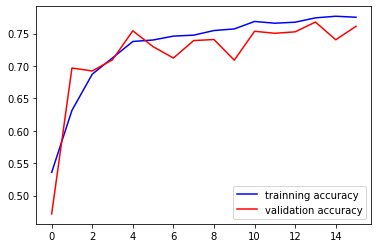

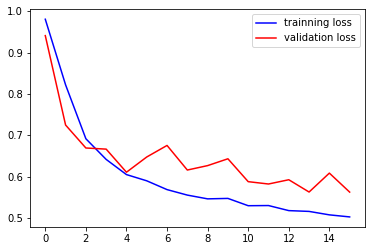

Epoch 1/17
163/163 [==============================] - 3s 16ms/step - loss: 1.0101 - accuracy: 0.5148 - val_loss: 0.9318 - val_accuracy: 0.6735
Epoch 2/17
163/163 [==============================] - 2s 13ms/step - loss: 0.8648 - accuracy: 0.6175 - val_loss: 0.8361 - val_accuracy: 0.6058
Epoch 3/17
163/163 [==============================] - 2s 13ms/step - loss: 0.7350 - accuracy: 0.6804 - val_loss: 0.6821 - val_accuracy: 0.7376
Epoch 4/17
163/163 [==============================] - 3s 18ms/step - loss: 0.6659 - accuracy: 0.7044 - val_loss: 0.6273 - val_accuracy: 0.7479
Epoch 5/17
163/163 [==============================] - 2s 14ms/step - loss: 0.6163 - accuracy: 0.7280 - val_loss: 0.6716 - val_accuracy: 0.6760
Epoch 6/17
163/163 [==============================] - 2s 13ms/step - loss: 0.5983 - accuracy: 0.7356 - val_loss: 0.6075 - val_accuracy: 0.7549
Epoch 7/17
163/163 [==============================] - 2s 13ms/step - loss: 0.5682 - accuracy: 0.7471 - val_loss: 0.6055 - val_accuracy: 0.7469

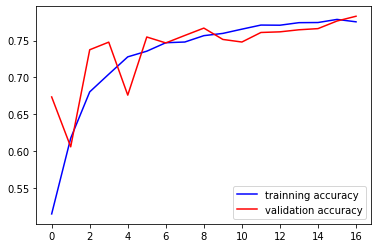

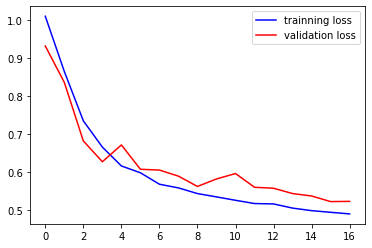

Epoch 1/18
163/163 [==============================] - 3s 18ms/step - loss: 0.9866 - accuracy: 0.5328 - val_loss: 0.9254 - val_accuracy: 0.4944
Epoch 2/18
163/163 [==============================] - 2s 12ms/step - loss: 0.8306 - accuracy: 0.6271 - val_loss: 0.8112 - val_accuracy: 0.5971
Epoch 3/18
163/163 [==============================] - 2s 12ms/step - loss: 0.7159 - accuracy: 0.6771 - val_loss: 0.6653 - val_accuracy: 0.7404
Epoch 4/18
163/163 [==============================] - 3s 17ms/step - loss: 0.6578 - accuracy: 0.7088 - val_loss: 0.6646 - val_accuracy: 0.7033
Epoch 5/18
163/163 [==============================] - 2s 13ms/step - loss: 0.6188 - accuracy: 0.7295 - val_loss: 0.6083 - val_accuracy: 0.7476
Epoch 6/18
163/163 [==============================] - 2s 13ms/step - loss: 0.5869 - accuracy: 0.7400 - val_loss: 0.5915 - val_accuracy: 0.7521
Epoch 7/18
163/163 [==============================] - 2s 12ms/step - loss: 0.5744 - accuracy: 0.7441 - val_loss: 0.6531 - val_accuracy: 0.7278

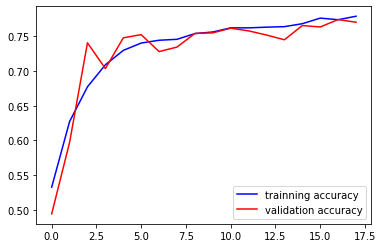

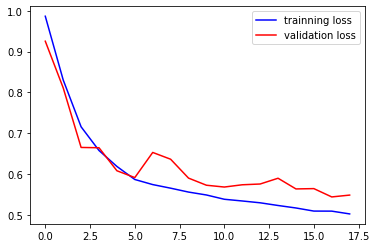

Epoch 1/19
163/163 [==============================] - 3s 15ms/step - loss: 0.9742 - accuracy: 0.5433 - val_loss: 0.8825 - val_accuracy: 0.6470
Epoch 2/19
163/163 [==============================] - 2s 12ms/step - loss: 0.8081 - accuracy: 0.6336 - val_loss: 0.7387 - val_accuracy: 0.7266
Epoch 3/19
163/163 [==============================] - 3s 17ms/step - loss: 0.6995 - accuracy: 0.6984 - val_loss: 0.8153 - val_accuracy: 0.5801
Epoch 4/19
163/163 [==============================] - 2s 13ms/step - loss: 0.6563 - accuracy: 0.7074 - val_loss: 0.6487 - val_accuracy: 0.7413
Epoch 5/19
163/163 [==============================] - 2s 13ms/step - loss: 0.6129 - accuracy: 0.7303 - val_loss: 0.6636 - val_accuracy: 0.6863
Epoch 6/19
163/163 [==============================] - 2s 13ms/step - loss: 0.5881 - accuracy: 0.7377 - val_loss: 0.6277 - val_accuracy: 0.7432
Epoch 7/19
163/163 [==============================] - 2s 12ms/step - loss: 0.5712 - accuracy: 0.7439 - val_loss: 0.6044 - val_accuracy: 0.7393

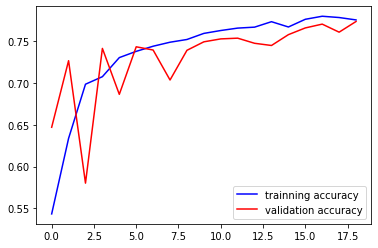

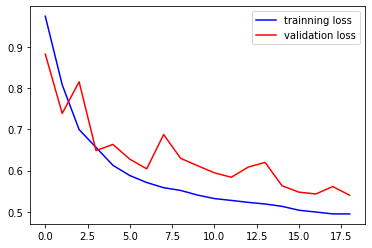

Epoch 1/10
163/163 [==============================] - 3s 16ms/step - loss: 1.0481 - accuracy: 0.4833 - val_loss: 1.0499 - val_accuracy: 0.4645
Epoch 2/10
163/163 [==============================] - 2s 13ms/step - loss: 1.0176 - accuracy: 0.4906 - val_loss: 1.0236 - val_accuracy: 0.4662
Epoch 3/10
163/163 [==============================] - 2s 12ms/step - loss: 0.9866 - accuracy: 0.5169 - val_loss: 0.9933 - val_accuracy: 0.5112
Epoch 4/10
163/163 [==============================] - 2s 12ms/step - loss: 0.9529 - accuracy: 0.5637 - val_loss: 0.9649 - val_accuracy: 0.6109
Epoch 5/10
163/163 [==============================] - 3s 17ms/step - loss: 0.9083 - accuracy: 0.6112 - val_loss: 0.9126 - val_accuracy: 0.6036
Epoch 6/10
163/163 [==============================] - 3s 17ms/step - loss: 0.8585 - accuracy: 0.6488 - val_loss: 0.8715 - val_accuracy: 0.6263
Epoch 7/10
163/163 [==============================] - 2s 13ms/step - loss: 0.8172 - accuracy: 0.6624 - val_loss: 0.8370 - val_accuracy: 0.6825

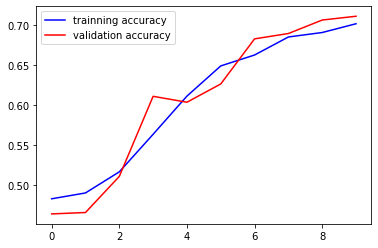

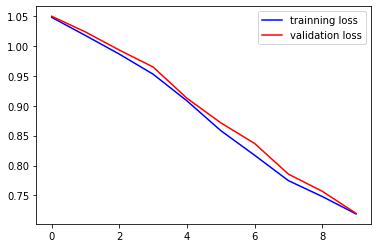

Epoch 1/11
163/163 [==============================] - 3s 15ms/step - loss: 1.0552 - accuracy: 0.4772 - val_loss: 1.0585 - val_accuracy: 0.4645
Epoch 2/11
163/163 [==============================] - 3s 17ms/step - loss: 1.0292 - accuracy: 0.4881 - val_loss: 1.0328 - val_accuracy: 0.4645
Epoch 3/11
163/163 [==============================] - 3s 17ms/step - loss: 1.0038 - accuracy: 0.5004 - val_loss: 1.0127 - val_accuracy: 0.4720
Epoch 4/11
163/163 [==============================] - 2s 12ms/step - loss: 0.9711 - accuracy: 0.5359 - val_loss: 0.9827 - val_accuracy: 0.5196
Epoch 5/11
163/163 [==============================] - 2s 13ms/step - loss: 0.9329 - accuracy: 0.5824 - val_loss: 0.9472 - val_accuracy: 0.6256
Epoch 6/11
163/163 [==============================] - 2s 13ms/step - loss: 0.8889 - accuracy: 0.6302 - val_loss: 0.8997 - val_accuracy: 0.6699
Epoch 7/11
163/163 [==============================] - 2s 12ms/step - loss: 0.8415 - accuracy: 0.6507 - val_loss: 0.8526 - val_accuracy: 0.7080

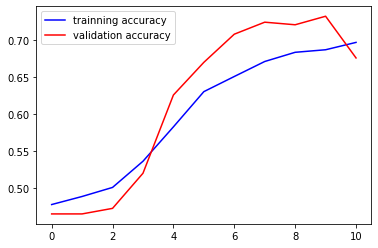

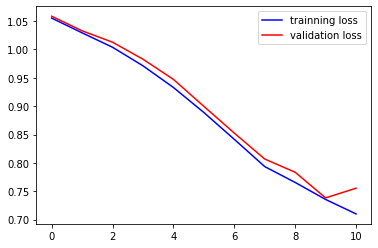

Epoch 1/12
163/163 [==============================] - 3s 16ms/step - loss: 1.0517 - accuracy: 0.4833 - val_loss: 1.0527 - val_accuracy: 0.4645
Epoch 2/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0314 - accuracy: 0.4868 - val_loss: 1.0339 - val_accuracy: 0.4645
Epoch 3/12
163/163 [==============================] - 3s 17ms/step - loss: 1.0082 - accuracy: 0.4918 - val_loss: 1.0152 - val_accuracy: 0.4654
Epoch 4/12
163/163 [==============================] - 2s 13ms/step - loss: 0.9788 - accuracy: 0.5247 - val_loss: 0.9894 - val_accuracy: 0.4834
Epoch 5/12
163/163 [==============================] - 2s 13ms/step - loss: 0.9419 - accuracy: 0.5640 - val_loss: 0.9523 - val_accuracy: 0.5472
Epoch 6/12
163/163 [==============================] - 2s 13ms/step - loss: 0.9046 - accuracy: 0.6118 - val_loss: 0.9094 - val_accuracy: 0.6564
Epoch 7/12
163/163 [==============================] - 2s 13ms/step - loss: 0.8607 - accuracy: 0.6394 - val_loss: 0.8598 - val_accuracy: 0.6466

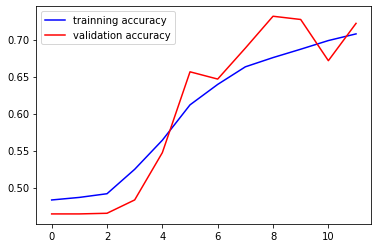

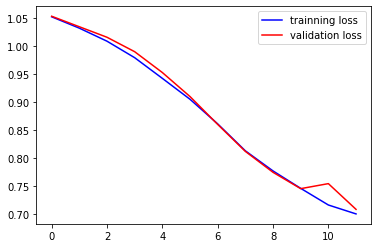

Epoch 1/13
163/163 [==============================] - 4s 21ms/step - loss: 1.0536 - accuracy: 0.4735 - val_loss: 1.0486 - val_accuracy: 0.4645
Epoch 2/13
163/163 [==============================] - 2s 13ms/step - loss: 1.0231 - accuracy: 0.4879 - val_loss: 1.0262 - val_accuracy: 0.4671
Epoch 3/13
163/163 [==============================] - 2s 13ms/step - loss: 0.9922 - accuracy: 0.5061 - val_loss: 1.0008 - val_accuracy: 0.4972
Epoch 4/13
163/163 [==============================] - 2s 12ms/step - loss: 0.9613 - accuracy: 0.5521 - val_loss: 0.9644 - val_accuracy: 0.5360
Epoch 5/13
163/163 [==============================] - 2s 13ms/step - loss: 0.9159 - accuracy: 0.6008 - val_loss: 0.9253 - val_accuracy: 0.5689
Epoch 6/13
163/163 [==============================] - 2s 13ms/step - loss: 0.8711 - accuracy: 0.6411 - val_loss: 0.8793 - val_accuracy: 0.6924
Epoch 7/13
163/163 [==============================] - 2s 14ms/step - loss: 0.8270 - accuracy: 0.6609 - val_loss: 0.8348 - val_accuracy: 0.6587

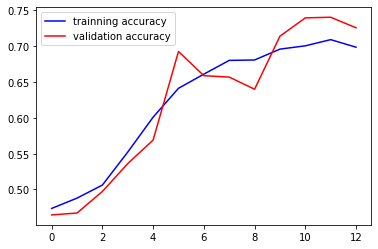

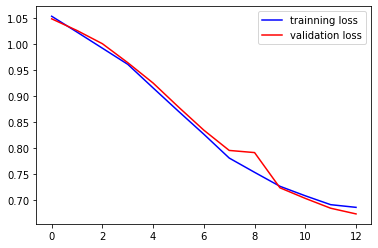

Epoch 1/14
163/163 [==============================] - 3s 16ms/step - loss: 1.0603 - accuracy: 0.4795 - val_loss: 1.0596 - val_accuracy: 0.4645
Epoch 2/14
163/163 [==============================] - 2s 12ms/step - loss: 1.0412 - accuracy: 0.4850 - val_loss: 1.0466 - val_accuracy: 0.4645
Epoch 3/14
163/163 [==============================] - 2s 12ms/step - loss: 1.0243 - accuracy: 0.4866 - val_loss: 1.0284 - val_accuracy: 0.4645
Epoch 4/14
163/163 [==============================] - 2s 12ms/step - loss: 1.0035 - accuracy: 0.4954 - val_loss: 1.0084 - val_accuracy: 0.4713
Epoch 5/14
163/163 [==============================] - 3s 17ms/step - loss: 0.9792 - accuracy: 0.5211 - val_loss: 0.9823 - val_accuracy: 0.5096
Epoch 6/14
163/163 [==============================] - 2s 13ms/step - loss: 0.9455 - accuracy: 0.5619 - val_loss: 0.9497 - val_accuracy: 0.5590
Epoch 7/14
163/163 [==============================] - 2s 13ms/step - loss: 0.9069 - accuracy: 0.6108 - val_loss: 0.9088 - val_accuracy: 0.6030

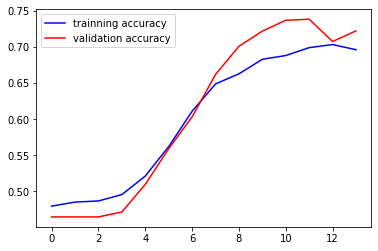

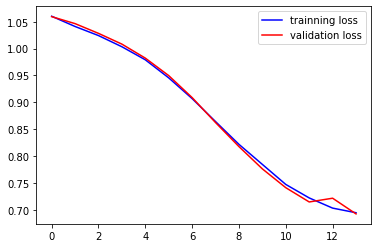

Epoch 1/15
163/163 [==============================] - 3s 15ms/step - loss: 1.0624 - accuracy: 0.4789 - val_loss: 1.0618 - val_accuracy: 0.4645
Epoch 2/15
163/163 [==============================] - 2s 14ms/step - loss: 1.0456 - accuracy: 0.4850 - val_loss: 1.0522 - val_accuracy: 0.4645
Epoch 3/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0325 - accuracy: 0.4850 - val_loss: 1.0425 - val_accuracy: 0.4645
Epoch 4/15
163/163 [==============================] - 2s 12ms/step - loss: 1.0175 - accuracy: 0.4856 - val_loss: 1.0258 - val_accuracy: 0.4645
Epoch 5/15
163/163 [==============================] - 2s 13ms/step - loss: 0.9986 - accuracy: 0.4918 - val_loss: 1.0058 - val_accuracy: 0.4650
Epoch 6/15
163/163 [==============================] - 2s 12ms/step - loss: 0.9743 - accuracy: 0.5194 - val_loss: 0.9799 - val_accuracy: 0.5185
Epoch 7/15
163/163 [==============================] - 2s 13ms/step - loss: 0.9429 - accuracy: 0.5709 - val_loss: 0.9457 - val_accuracy: 0.6081

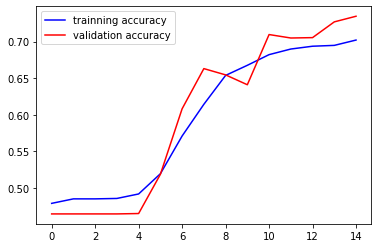

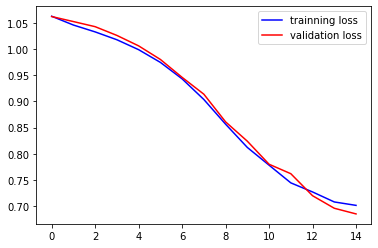

Epoch 1/16
163/163 [==============================] - 4s 25ms/step - loss: 1.0565 - accuracy: 0.4760 - val_loss: 1.0505 - val_accuracy: 0.4645
Epoch 2/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0256 - accuracy: 0.4885 - val_loss: 1.0319 - val_accuracy: 0.4645
Epoch 3/16
163/163 [==============================] - 2s 12ms/step - loss: 1.0012 - accuracy: 0.5013 - val_loss: 1.0097 - val_accuracy: 0.4650
Epoch 4/16
163/163 [==============================] - 2s 13ms/step - loss: 0.9674 - accuracy: 0.5339 - val_loss: 0.9798 - val_accuracy: 0.4972
Epoch 5/16
163/163 [==============================] - 2s 13ms/step - loss: 0.9302 - accuracy: 0.5909 - val_loss: 0.9365 - val_accuracy: 0.5862
Epoch 6/16
163/163 [==============================] - 2s 14ms/step - loss: 0.8811 - accuracy: 0.6325 - val_loss: 0.8943 - val_accuracy: 0.6036
Epoch 7/16
163/163 [==============================] - 3s 17ms/step - loss: 0.8389 - accuracy: 0.6639 - val_loss: 0.8426 - val_accuracy: 0.6344

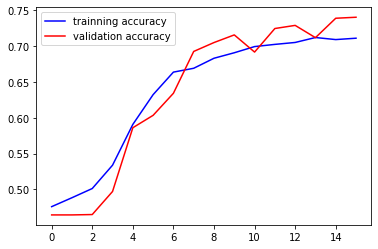

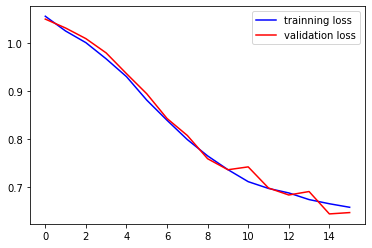

Epoch 1/17
163/163 [==============================] - 3s 18ms/step - loss: 1.0506 - accuracy: 0.4810 - val_loss: 1.0529 - val_accuracy: 0.4645
Epoch 2/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0294 - accuracy: 0.4860 - val_loss: 1.0355 - val_accuracy: 0.4645
Epoch 3/17
163/163 [==============================] - 2s 12ms/step - loss: 1.0053 - accuracy: 0.4925 - val_loss: 1.0153 - val_accuracy: 0.4801
Epoch 4/17
163/163 [==============================] - 2s 12ms/step - loss: 0.9788 - accuracy: 0.5305 - val_loss: 0.9911 - val_accuracy: 0.5066
Epoch 5/17
163/163 [==============================] - 2s 12ms/step - loss: 0.9455 - accuracy: 0.5717 - val_loss: 0.9529 - val_accuracy: 0.5759
Epoch 6/17
163/163 [==============================] - 2s 12ms/step - loss: 0.9036 - accuracy: 0.6152 - val_loss: 0.9128 - val_accuracy: 0.5981
Epoch 7/17
163/163 [==============================] - 2s 13ms/step - loss: 0.8537 - accuracy: 0.6518 - val_loss: 0.8622 - val_accuracy: 0.6520

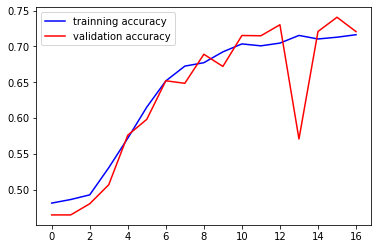

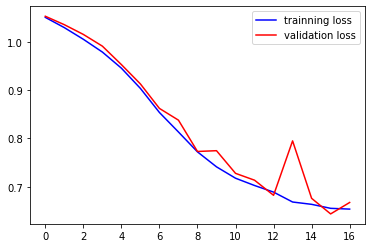

Epoch 1/18
163/163 [==============================] - 3s 16ms/step - loss: 1.0526 - accuracy: 0.4795 - val_loss: 1.0466 - val_accuracy: 0.4645
Epoch 2/18
163/163 [==============================] - 3s 17ms/step - loss: 1.0251 - accuracy: 0.4889 - val_loss: 1.0214 - val_accuracy: 0.4645
Epoch 3/18
163/163 [==============================] - 2s 13ms/step - loss: 0.9922 - accuracy: 0.5121 - val_loss: 0.9974 - val_accuracy: 0.4906
Epoch 4/18
163/163 [==============================] - 2s 12ms/step - loss: 0.9582 - accuracy: 0.5460 - val_loss: 0.9587 - val_accuracy: 0.5918
Epoch 5/18
163/163 [==============================] - 2s 13ms/step - loss: 0.9174 - accuracy: 0.6026 - val_loss: 0.9173 - val_accuracy: 0.6414
Epoch 6/18
163/163 [==============================] - 2s 12ms/step - loss: 0.8689 - accuracy: 0.6417 - val_loss: 0.8838 - val_accuracy: 0.6921
Epoch 7/18
163/163 [==============================] - 2s 12ms/step - loss: 0.8251 - accuracy: 0.6632 - val_loss: 0.8238 - val_accuracy: 0.7115

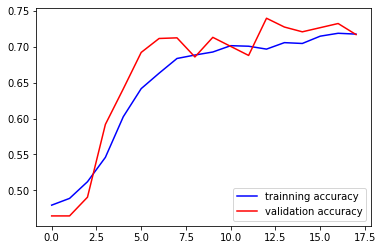

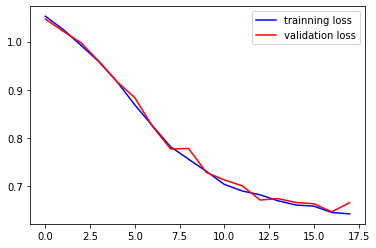

Epoch 1/19
163/163 [==============================] - 4s 20ms/step - loss: 1.0485 - accuracy: 0.4837 - val_loss: 1.0467 - val_accuracy: 0.4645
Epoch 2/19
163/163 [==============================] - 3s 18ms/step - loss: 1.0218 - accuracy: 0.4912 - val_loss: 1.0242 - val_accuracy: 0.4645
Epoch 3/19
163/163 [==============================] - 2s 13ms/step - loss: 0.9936 - accuracy: 0.5107 - val_loss: 0.9994 - val_accuracy: 0.4830
Epoch 4/19
163/163 [==============================] - 2s 12ms/step - loss: 0.9612 - accuracy: 0.5535 - val_loss: 0.9664 - val_accuracy: 0.5236
Epoch 5/19
163/163 [==============================] - 2s 13ms/step - loss: 0.9211 - accuracy: 0.5989 - val_loss: 0.9236 - val_accuracy: 0.5724
Epoch 6/19
163/163 [==============================] - 2s 13ms/step - loss: 0.8741 - accuracy: 0.6380 - val_loss: 0.8763 - val_accuracy: 0.6387
Epoch 7/19
163/163 [==============================] - 2s 14ms/step - loss: 0.8282 - accuracy: 0.6716 - val_loss: 0.8440 - val_accuracy: 0.6781

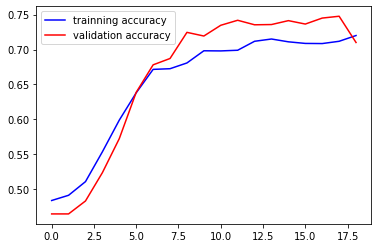

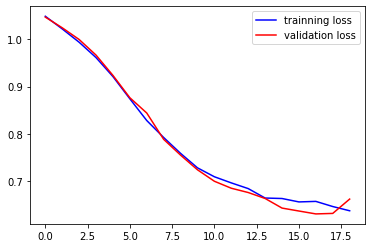

Epoch 1/10
163/163 [==============================] - 3s 16ms/step - loss: 1.1056 - accuracy: 0.3363 - val_loss: 1.0832 - val_accuracy: 0.4645
Epoch 2/10
163/163 [==============================] - 2s 13ms/step - loss: 1.0672 - accuracy: 0.4826 - val_loss: 1.0727 - val_accuracy: 0.4645
Epoch 3/10
163/163 [==============================] - 2s 13ms/step - loss: 1.0574 - accuracy: 0.4852 - val_loss: 1.0690 - val_accuracy: 0.4645
Epoch 4/10
163/163 [==============================] - 3s 17ms/step - loss: 1.0561 - accuracy: 0.4850 - val_loss: 1.0670 - val_accuracy: 0.4645
Epoch 5/10
163/163 [==============================] - 2s 13ms/step - loss: 1.0526 - accuracy: 0.4850 - val_loss: 1.0653 - val_accuracy: 0.4645
Epoch 6/10
163/163 [==============================] - 2s 13ms/step - loss: 1.0517 - accuracy: 0.4850 - val_loss: 1.0638 - val_accuracy: 0.4645
Epoch 7/10
163/163 [==============================] - 2s 12ms/step - loss: 1.0507 - accuracy: 0.4850 - val_loss: 1.0623 - val_accuracy: 0.4645

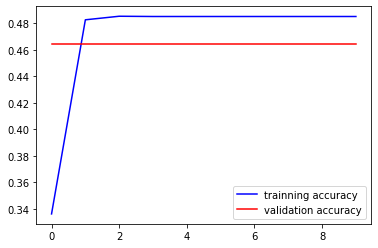

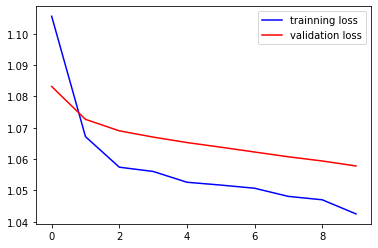

Epoch 1/11
163/163 [==============================] - 3s 15ms/step - loss: 1.1007 - accuracy: 0.3520 - val_loss: 1.0754 - val_accuracy: 0.4645
Epoch 2/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0593 - accuracy: 0.4877 - val_loss: 1.0659 - val_accuracy: 0.4645
Epoch 3/11
163/163 [==============================] - 2s 12ms/step - loss: 1.0527 - accuracy: 0.4849 - val_loss: 1.0630 - val_accuracy: 0.4645
Epoch 4/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0455 - accuracy: 0.4850 - val_loss: 1.0612 - val_accuracy: 0.4645
Epoch 5/11
163/163 [==============================] - 2s 14ms/step - loss: 1.0451 - accuracy: 0.4852 - val_loss: 1.0592 - val_accuracy: 0.4645
Epoch 6/11
163/163 [==============================] - 2s 14ms/step - loss: 1.0457 - accuracy: 0.4850 - val_loss: 1.0572 - val_accuracy: 0.4645
Epoch 7/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0422 - accuracy: 0.4850 - val_loss: 1.0553 - val_accuracy: 0.4645

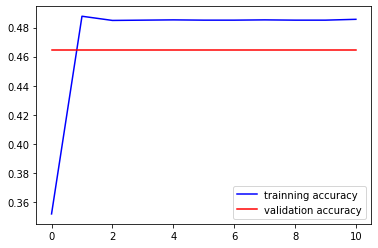

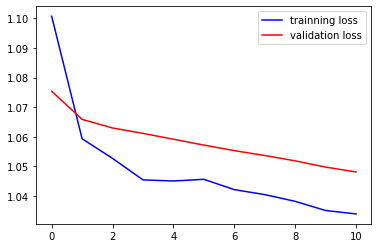

Epoch 1/12
163/163 [==============================] - 3s 16ms/step - loss: 1.0875 - accuracy: 0.4068 - val_loss: 1.0778 - val_accuracy: 0.4645
Epoch 2/12
163/163 [==============================] - 3s 17ms/step - loss: 1.0665 - accuracy: 0.4835 - val_loss: 1.0704 - val_accuracy: 0.4645
Epoch 3/12
163/163 [==============================] - 3s 17ms/step - loss: 1.0585 - accuracy: 0.4850 - val_loss: 1.0671 - val_accuracy: 0.4645
Epoch 4/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0561 - accuracy: 0.4850 - val_loss: 1.0652 - val_accuracy: 0.4645
Epoch 5/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0514 - accuracy: 0.4850 - val_loss: 1.0637 - val_accuracy: 0.4645
Epoch 6/12
163/163 [==============================] - 2s 12ms/step - loss: 1.0512 - accuracy: 0.4850 - val_loss: 1.0623 - val_accuracy: 0.4645
Epoch 7/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0492 - accuracy: 0.4850 - val_loss: 1.0610 - val_accuracy: 0.4645

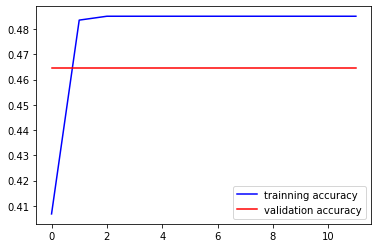

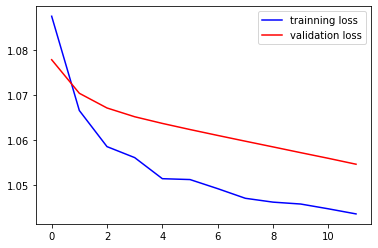

Epoch 1/13
163/163 [==============================] - 3s 18ms/step - loss: 1.0673 - accuracy: 0.4847 - val_loss: 1.0766 - val_accuracy: 0.4645
Epoch 2/13
163/163 [==============================] - 2s 13ms/step - loss: 1.0639 - accuracy: 0.4849 - val_loss: 1.0739 - val_accuracy: 0.4645
Epoch 3/13
163/163 [==============================] - 2s 12ms/step - loss: 1.0606 - accuracy: 0.4850 - val_loss: 1.0718 - val_accuracy: 0.4645
Epoch 4/13
163/163 [==============================] - 2s 13ms/step - loss: 1.0596 - accuracy: 0.4849 - val_loss: 1.0701 - val_accuracy: 0.4645
Epoch 5/13
163/163 [==============================] - 2s 12ms/step - loss: 1.0576 - accuracy: 0.4850 - val_loss: 1.0682 - val_accuracy: 0.4645
Epoch 6/13
163/163 [==============================] - 2s 12ms/step - loss: 1.0557 - accuracy: 0.4850 - val_loss: 1.0667 - val_accuracy: 0.4645
Epoch 7/13
163/163 [==============================] - 2s 13ms/step - loss: 1.0521 - accuracy: 0.4850 - val_loss: 1.0650 - val_accuracy: 0.4645

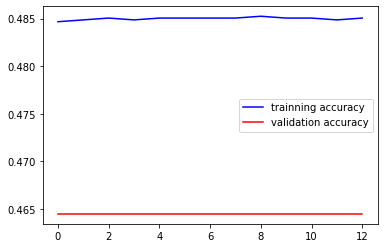

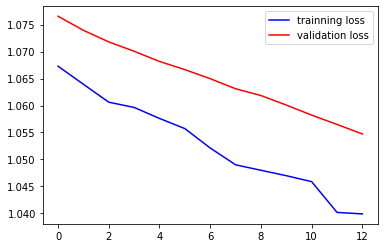

Epoch 1/14
163/163 [==============================] - 4s 19ms/step - loss: 1.0732 - accuracy: 0.4402 - val_loss: 1.0675 - val_accuracy: 0.4645
Epoch 2/14
163/163 [==============================] - 2s 13ms/step - loss: 1.0531 - accuracy: 0.4862 - val_loss: 1.0619 - val_accuracy: 0.4645
Epoch 3/14
163/163 [==============================] - 2s 13ms/step - loss: 1.0481 - accuracy: 0.4850 - val_loss: 1.0591 - val_accuracy: 0.4645
Epoch 4/14
163/163 [==============================] - 2s 13ms/step - loss: 1.0461 - accuracy: 0.4850 - val_loss: 1.0565 - val_accuracy: 0.4645
Epoch 5/14
163/163 [==============================] - 2s 13ms/step - loss: 1.0431 - accuracy: 0.4850 - val_loss: 1.0541 - val_accuracy: 0.4645
Epoch 6/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0431 - accuracy: 0.4852 - val_loss: 1.0517 - val_accuracy: 0.4645
Epoch 7/14
163/163 [==============================] - 2s 13ms/step - loss: 1.0405 - accuracy: 0.4856 - val_loss: 1.0494 - val_accuracy: 0.4645

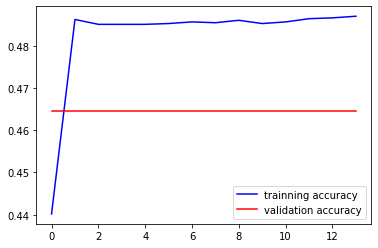

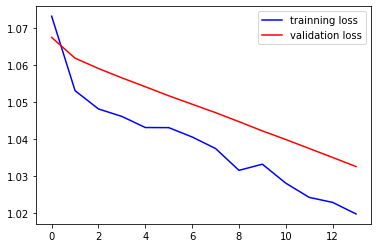

Epoch 1/15
163/163 [==============================] - 3s 17ms/step - loss: 1.1052 - accuracy: 0.3307 - val_loss: 1.0799 - val_accuracy: 0.4645
Epoch 2/15
163/163 [==============================] - 3s 17ms/step - loss: 1.0678 - accuracy: 0.4747 - val_loss: 1.0708 - val_accuracy: 0.4645
Epoch 3/15
163/163 [==============================] - 2s 14ms/step - loss: 1.0607 - accuracy: 0.4847 - val_loss: 1.0681 - val_accuracy: 0.4645
Epoch 4/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0566 - accuracy: 0.4850 - val_loss: 1.0666 - val_accuracy: 0.4645
Epoch 5/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0535 - accuracy: 0.4850 - val_loss: 1.0653 - val_accuracy: 0.4645
Epoch 6/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0518 - accuracy: 0.4850 - val_loss: 1.0641 - val_accuracy: 0.4645
Epoch 7/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0518 - accuracy: 0.4850 - val_loss: 1.0627 - val_accuracy: 0.4645

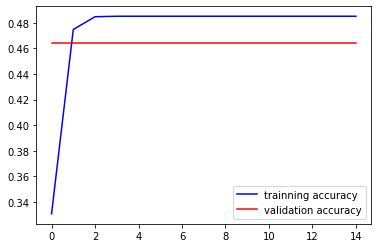

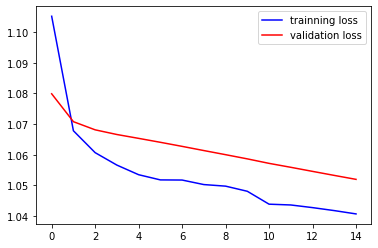

Epoch 1/16
163/163 [==============================] - 3s 18ms/step - loss: 1.0794 - accuracy: 0.4331 - val_loss: 1.0782 - val_accuracy: 0.4645
Epoch 2/16
163/163 [==============================] - 3s 17ms/step - loss: 1.0608 - accuracy: 0.4852 - val_loss: 1.0713 - val_accuracy: 0.4645
Epoch 3/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0550 - accuracy: 0.4854 - val_loss: 1.0677 - val_accuracy: 0.4645
Epoch 4/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0525 - accuracy: 0.4850 - val_loss: 1.0652 - val_accuracy: 0.4645
Epoch 5/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0479 - accuracy: 0.4849 - val_loss: 1.0627 - val_accuracy: 0.4645
Epoch 6/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0470 - accuracy: 0.4852 - val_loss: 1.0602 - val_accuracy: 0.4645
Epoch 7/16
163/163 [==============================] - 3s 18ms/step - loss: 1.0446 - accuracy: 0.4850 - val_loss: 1.0581 - val_accuracy: 0.4645

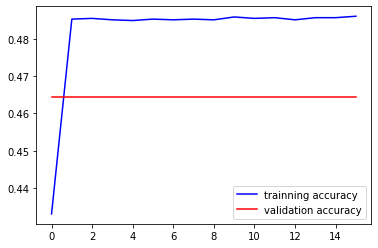

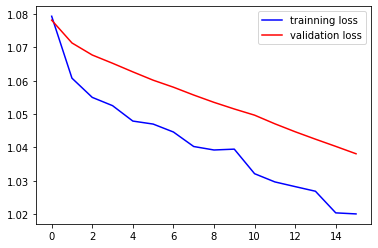

Epoch 1/17
163/163 [==============================] - 4s 18ms/step - loss: 1.1014 - accuracy: 0.3447 - val_loss: 1.0831 - val_accuracy: 0.4645
Epoch 2/17
163/163 [==============================] - 2s 13ms/step - loss: 1.0703 - accuracy: 0.4801 - val_loss: 1.0718 - val_accuracy: 0.4645
Epoch 3/17
163/163 [==============================] - 2s 13ms/step - loss: 1.0595 - accuracy: 0.4850 - val_loss: 1.0673 - val_accuracy: 0.4645
Epoch 4/17
163/163 [==============================] - 2s 12ms/step - loss: 1.0550 - accuracy: 0.4850 - val_loss: 1.0651 - val_accuracy: 0.4645
Epoch 5/17
163/163 [==============================] - 2s 13ms/step - loss: 1.0524 - accuracy: 0.4850 - val_loss: 1.0636 - val_accuracy: 0.4645
Epoch 6/17
163/163 [==============================] - 3s 17ms/step - loss: 1.0515 - accuracy: 0.4850 - val_loss: 1.0624 - val_accuracy: 0.4645
Epoch 7/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0485 - accuracy: 0.4850 - val_loss: 1.0612 - val_accuracy: 0.4645

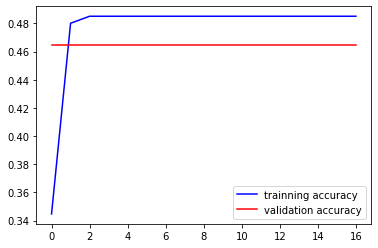

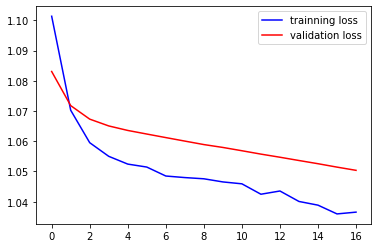

Epoch 1/18
163/163 [==============================] - 3s 16ms/step - loss: 1.0731 - accuracy: 0.4406 - val_loss: 1.0660 - val_accuracy: 0.4645
Epoch 2/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0553 - accuracy: 0.4843 - val_loss: 1.0613 - val_accuracy: 0.4645
Epoch 3/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0508 - accuracy: 0.4852 - val_loss: 1.0589 - val_accuracy: 0.4645
Epoch 4/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0499 - accuracy: 0.4852 - val_loss: 1.0562 - val_accuracy: 0.4645
Epoch 5/18
163/163 [==============================] - 3s 18ms/step - loss: 1.0444 - accuracy: 0.4850 - val_loss: 1.0541 - val_accuracy: 0.4645
Epoch 6/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0433 - accuracy: 0.4852 - val_loss: 1.0517 - val_accuracy: 0.4645
Epoch 7/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0383 - accuracy: 0.4852 - val_loss: 1.0495 - val_accuracy: 0.4645

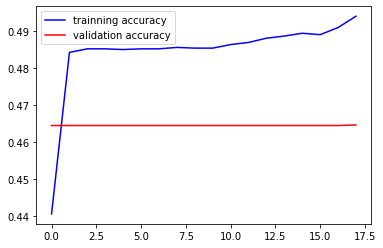

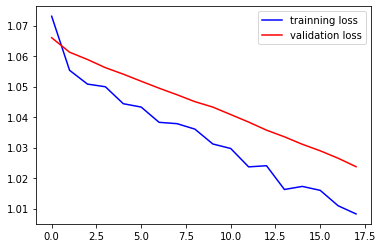

Epoch 1/19
163/163 [==============================] - 3s 16ms/step - loss: 1.0752 - accuracy: 0.4525 - val_loss: 1.0745 - val_accuracy: 0.4645
Epoch 2/19
163/163 [==============================] - 2s 12ms/step - loss: 1.0578 - accuracy: 0.4837 - val_loss: 1.0680 - val_accuracy: 0.4645
Epoch 3/19
163/163 [==============================] - 2s 13ms/step - loss: 1.0527 - accuracy: 0.4850 - val_loss: 1.0652 - val_accuracy: 0.4645
Epoch 4/19
163/163 [==============================] - 3s 18ms/step - loss: 1.0520 - accuracy: 0.4850 - val_loss: 1.0632 - val_accuracy: 0.4645
Epoch 5/19
163/163 [==============================] - 2s 12ms/step - loss: 1.0496 - accuracy: 0.4850 - val_loss: 1.0615 - val_accuracy: 0.4645
Epoch 6/19
163/163 [==============================] - 2s 13ms/step - loss: 1.0467 - accuracy: 0.4850 - val_loss: 1.0599 - val_accuracy: 0.4645
Epoch 7/19
163/163 [==============================] - 2s 13ms/step - loss: 1.0465 - accuracy: 0.4850 - val_loss: 1.0584 - val_accuracy: 0.4645

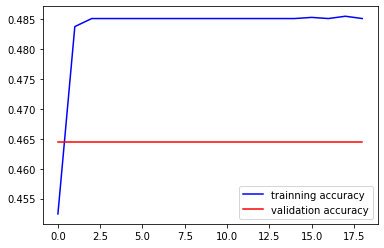

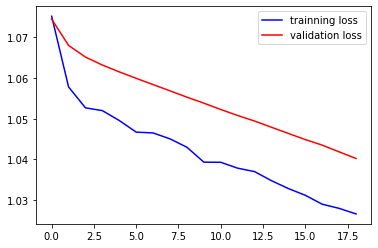

Epoch 1/10
163/163 [==============================] - 4s 21ms/step - loss: 589.9876 - accuracy: 0.4718 - val_loss: 1.0764 - val_accuracy: 0.4645
Epoch 2/10
163/163 [==============================] - 2s 15ms/step - loss: 1.0524 - accuracy: 0.4850 - val_loss: 1.0674 - val_accuracy: 0.4645
Epoch 3/10
163/163 [==============================] - 2s 14ms/step - loss: 1.0545 - accuracy: 0.4850 - val_loss: 1.0615 - val_accuracy: 0.4645
Epoch 4/10
163/163 [==============================] - 2s 14ms/step - loss: 1.0539 - accuracy: 0.4850 - val_loss: 1.0636 - val_accuracy: 0.4645
Epoch 5/10
163/163 [==============================] - 2s 13ms/step - loss: 1.0563 - accuracy: 0.4850 - val_loss: 1.0618 - val_accuracy: 0.4645
Epoch 6/10
163/163 [==============================] - 2s 13ms/step - loss: 1.0581 - accuracy: 0.4850 - val_loss: 1.0741 - val_accuracy: 0.4645
Epoch 7/10
163/163 [==============================] - 2s 14ms/step - loss: 1.0536 - accuracy: 0.4850 - val_loss: 1.0745 - val_accuracy: 0.46

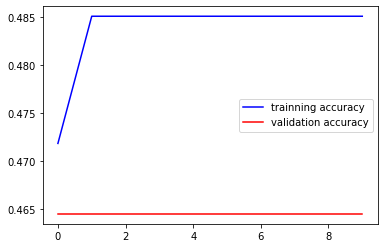

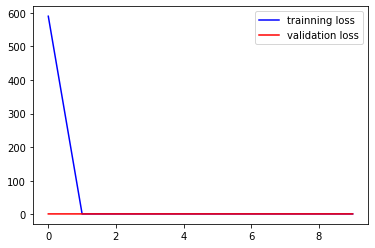

Epoch 1/11
163/163 [==============================] - 3s 17ms/step - loss: 799.3777 - accuracy: 0.4534 - val_loss: 1.0739 - val_accuracy: 0.4645
Epoch 2/11
163/163 [==============================] - 2s 14ms/step - loss: 1.0598 - accuracy: 0.4806 - val_loss: 1.0617 - val_accuracy: 0.4645
Epoch 3/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0570 - accuracy: 0.4850 - val_loss: 1.0862 - val_accuracy: 0.4645
Epoch 4/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0581 - accuracy: 0.4745 - val_loss: 1.0632 - val_accuracy: 0.4645
Epoch 5/11
163/163 [==============================] - 2s 14ms/step - loss: 1.0579 - accuracy: 0.4850 - val_loss: 1.0646 - val_accuracy: 0.4645
Epoch 6/11
163/163 [==============================] - 3s 18ms/step - loss: 1.0573 - accuracy: 0.4850 - val_loss: 1.0701 - val_accuracy: 0.4645
Epoch 7/11
163/163 [==============================] - 2s 14ms/step - loss: 1.0539 - accuracy: 0.4850 - val_loss: 1.0704 - val_accuracy: 0.46

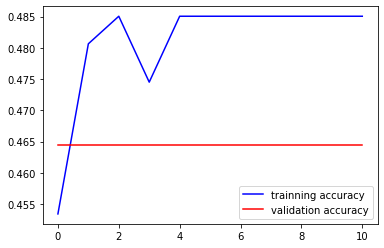

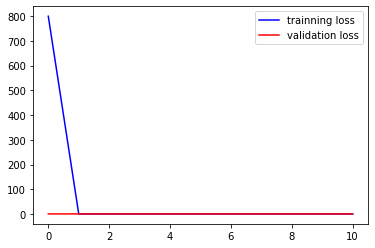

Epoch 1/12
163/163 [==============================] - 3s 17ms/step - loss: 1548.7418 - accuracy: 0.4480 - val_loss: 1.0734 - val_accuracy: 0.4645
Epoch 2/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0543 - accuracy: 0.4850 - val_loss: 1.0733 - val_accuracy: 0.4645
Epoch 3/12
163/163 [==============================] - 2s 15ms/step - loss: 1.0549 - accuracy: 0.4850 - val_loss: 1.0658 - val_accuracy: 0.4645
Epoch 4/12
163/163 [==============================] - 3s 19ms/step - loss: 1.0563 - accuracy: 0.4850 - val_loss: 1.0664 - val_accuracy: 0.4645
Epoch 5/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0542 - accuracy: 0.4850 - val_loss: 1.0720 - val_accuracy: 0.4645
Epoch 6/12
163/163 [==============================] - 2s 14ms/step - loss: 1.0545 - accuracy: 0.4850 - val_loss: 1.0672 - val_accuracy: 0.4645
Epoch 7/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0561 - accuracy: 0.4850 - val_loss: 1.0620 - val_accuracy: 0.4

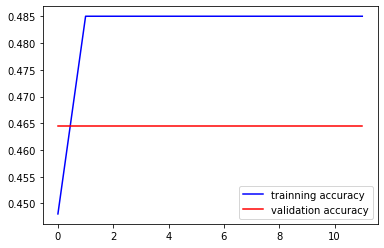

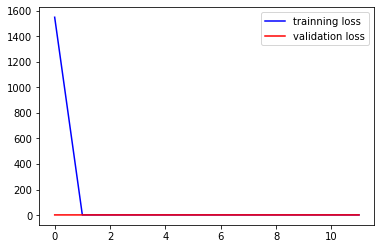

Epoch 1/13
163/163 [==============================] - 3s 17ms/step - loss: 765.4578 - accuracy: 0.4732 - val_loss: 1.0692 - val_accuracy: 0.4645
Epoch 2/13
163/163 [==============================] - 3s 18ms/step - loss: 1.0541 - accuracy: 0.4850 - val_loss: 1.0618 - val_accuracy: 0.4645
Epoch 3/13
163/163 [==============================] - 2s 14ms/step - loss: 1.0550 - accuracy: 0.4850 - val_loss: 1.0655 - val_accuracy: 0.4645
Epoch 4/13
163/163 [==============================] - 2s 14ms/step - loss: 1.0550 - accuracy: 0.4850 - val_loss: 1.0664 - val_accuracy: 0.4645
Epoch 5/13
163/163 [==============================] - 2s 14ms/step - loss: 1.0567 - accuracy: 0.4850 - val_loss: 1.0701 - val_accuracy: 0.4645
Epoch 6/13
163/163 [==============================] - 2s 14ms/step - loss: 1.0563 - accuracy: 0.4850 - val_loss: 1.0724 - val_accuracy: 0.4645
Epoch 7/13
163/163 [==============================] - 2s 14ms/step - loss: 1.0572 - accuracy: 0.4850 - val_loss: 1.0664 - val_accuracy: 0.46

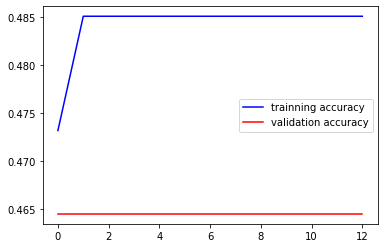

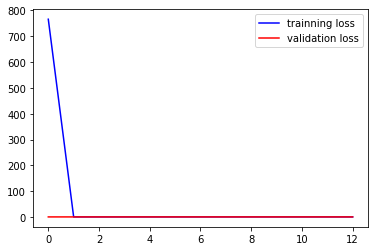

Epoch 1/14
163/163 [==============================] - 4s 19ms/step - loss: 630.0956 - accuracy: 0.4758 - val_loss: 1.0634 - val_accuracy: 0.4645
Epoch 2/14
163/163 [==============================] - 2s 13ms/step - loss: 1.0563 - accuracy: 0.4850 - val_loss: 1.0723 - val_accuracy: 0.4645
Epoch 3/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0586 - accuracy: 0.4850 - val_loss: 1.0668 - val_accuracy: 0.4645
Epoch 4/14
163/163 [==============================] - 2s 13ms/step - loss: 1.0568 - accuracy: 0.4850 - val_loss: 1.0735 - val_accuracy: 0.4645
Epoch 5/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0535 - accuracy: 0.4850 - val_loss: 1.0695 - val_accuracy: 0.4645
Epoch 6/14
163/163 [==============================] - 3s 18ms/step - loss: 1.0549 - accuracy: 0.4850 - val_loss: 1.0663 - val_accuracy: 0.4645
Epoch 7/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0531 - accuracy: 0.4850 - val_loss: 1.0677 - val_accuracy: 0.46

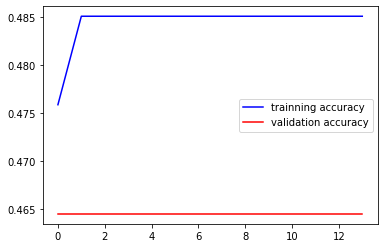

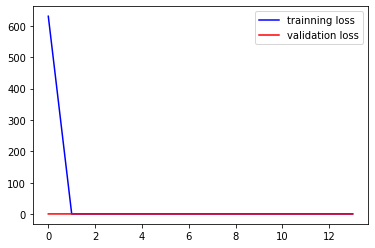

Epoch 1/15
163/163 [==============================] - 3s 17ms/step - loss: 1308.3167 - accuracy: 0.4755 - val_loss: 1.0728 - val_accuracy: 0.4645
Epoch 2/15
163/163 [==============================] - 2s 14ms/step - loss: 1.0575 - accuracy: 0.4850 - val_loss: 1.0674 - val_accuracy: 0.4645
Epoch 3/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0570 - accuracy: 0.4850 - val_loss: 1.0792 - val_accuracy: 0.4645
Epoch 4/15
163/163 [==============================] - 2s 14ms/step - loss: 1.0574 - accuracy: 0.4849 - val_loss: 1.0740 - val_accuracy: 0.4645
Epoch 5/15
163/163 [==============================] - 2s 15ms/step - loss: 1.0557 - accuracy: 0.4850 - val_loss: 1.0696 - val_accuracy: 0.4645
Epoch 6/15
163/163 [==============================] - 3s 18ms/step - loss: 1.0562 - accuracy: 0.4850 - val_loss: 1.0632 - val_accuracy: 0.4645
Epoch 7/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0546 - accuracy: 0.4850 - val_loss: 1.0652 - val_accuracy: 0.4

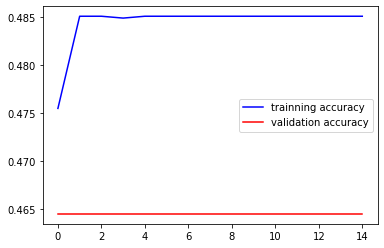

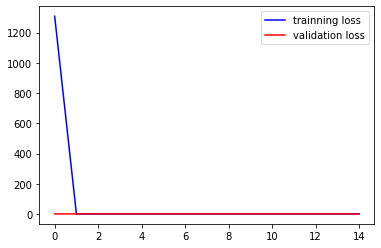

Epoch 1/16
163/163 [==============================] - 3s 17ms/step - loss: 1185.8009 - accuracy: 0.4749 - val_loss: 1.1102 - val_accuracy: 0.4645
Epoch 2/16
163/163 [==============================] - 2s 14ms/step - loss: 1.0565 - accuracy: 0.4850 - val_loss: 1.0645 - val_accuracy: 0.4645
Epoch 3/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0566 - accuracy: 0.4850 - val_loss: 1.0875 - val_accuracy: 0.4645
Epoch 4/16
163/163 [==============================] - 2s 14ms/step - loss: 1.0567 - accuracy: 0.4850 - val_loss: 1.0693 - val_accuracy: 0.4645
Epoch 5/16
163/163 [==============================] - 2s 15ms/step - loss: 1.0587 - accuracy: 0.4850 - val_loss: 1.0778 - val_accuracy: 0.4645
Epoch 6/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0562 - accuracy: 0.4850 - val_loss: 1.0647 - val_accuracy: 0.4645
Epoch 7/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0568 - accuracy: 0.4850 - val_loss: 1.0670 - val_accuracy: 0.4

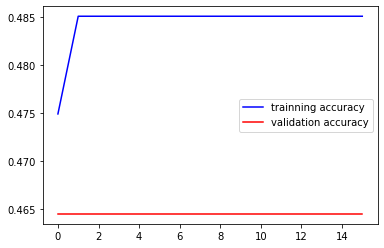

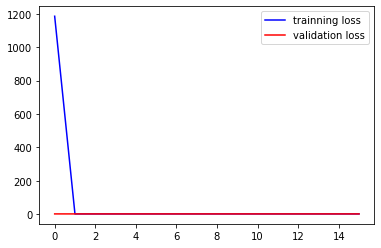

Epoch 1/17
163/163 [==============================] - 3s 17ms/step - loss: 552.0881 - accuracy: 0.4785 - val_loss: 1.0660 - val_accuracy: 0.4645
Epoch 2/17
163/163 [==============================] - 2s 13ms/step - loss: 1.0582 - accuracy: 0.4827 - val_loss: 1.0626 - val_accuracy: 0.4645
Epoch 3/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0577 - accuracy: 0.4850 - val_loss: 1.0629 - val_accuracy: 0.4645
Epoch 4/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0543 - accuracy: 0.4850 - val_loss: 1.0704 - val_accuracy: 0.4645
Epoch 5/17
163/163 [==============================] - 3s 19ms/step - loss: 1.0564 - accuracy: 0.4850 - val_loss: 1.0642 - val_accuracy: 0.4645
Epoch 6/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0525 - accuracy: 0.4850 - val_loss: 1.0618 - val_accuracy: 0.4645
Epoch 7/17
163/163 [==============================] - 2s 13ms/step - loss: 1.0559 - accuracy: 0.4850 - val_loss: 1.0654 - val_accuracy: 0.46

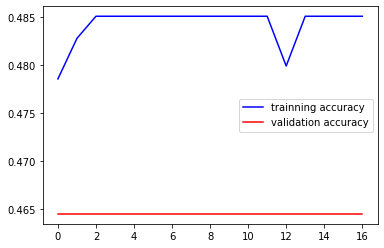

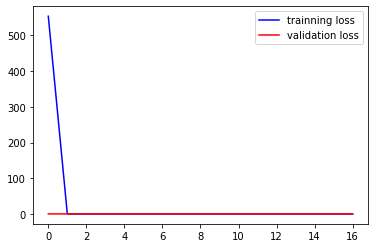

Epoch 1/18
163/163 [==============================] - 3s 17ms/step - loss: 1514.6628 - accuracy: 0.4684 - val_loss: 1.0671 - val_accuracy: 0.4645
Epoch 2/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0541 - accuracy: 0.4850 - val_loss: 1.0760 - val_accuracy: 0.4645
Epoch 3/18
163/163 [==============================] - 2s 14ms/step - loss: 1.0565 - accuracy: 0.4850 - val_loss: 1.0658 - val_accuracy: 0.4645
Epoch 4/18
163/163 [==============================] - 3s 18ms/step - loss: 1.0582 - accuracy: 0.4850 - val_loss: 1.0615 - val_accuracy: 0.4645
Epoch 5/18
163/163 [==============================] - 2s 14ms/step - loss: 1.0551 - accuracy: 0.4850 - val_loss: 1.0706 - val_accuracy: 0.4645
Epoch 6/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0533 - accuracy: 0.4850 - val_loss: 1.0656 - val_accuracy: 0.4645
Epoch 7/18
163/163 [==============================] - 2s 14ms/step - loss: 1.0544 - accuracy: 0.4850 - val_loss: 1.0621 - val_accuracy: 0.4

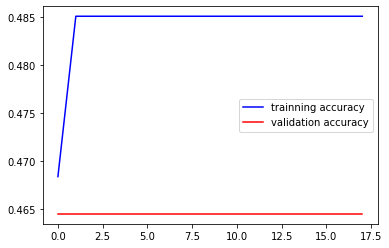

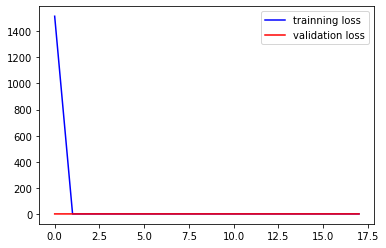

Epoch 1/19
163/163 [==============================] - 4s 18ms/step - loss: 621.5731 - accuracy: 0.4672 - val_loss: 1.0620 - val_accuracy: 0.4645
Epoch 2/19
163/163 [==============================] - 3s 16ms/step - loss: 1.0548 - accuracy: 0.4850 - val_loss: 1.0647 - val_accuracy: 0.4645
Epoch 3/19
163/163 [==============================] - 3s 16ms/step - loss: 1.0584 - accuracy: 0.4850 - val_loss: 1.0618 - val_accuracy: 0.4645
Epoch 4/19
163/163 [==============================] - 2s 14ms/step - loss: 1.0553 - accuracy: 0.4850 - val_loss: 1.0672 - val_accuracy: 0.4645
Epoch 5/19
163/163 [==============================] - 2s 14ms/step - loss: 1.0581 - accuracy: 0.4850 - val_loss: 1.0731 - val_accuracy: 0.4645
Epoch 6/19
163/163 [==============================] - 2s 14ms/step - loss: 1.0558 - accuracy: 0.4850 - val_loss: 1.0645 - val_accuracy: 0.4645
Epoch 7/19
163/163 [==============================] - 2s 14ms/step - loss: 1.0573 - accuracy: 0.4850 - val_loss: 1.0725 - val_accuracy: 0.46

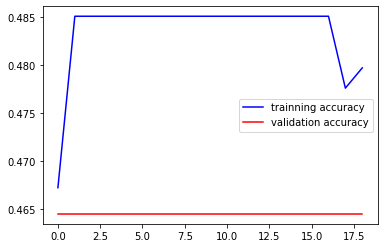

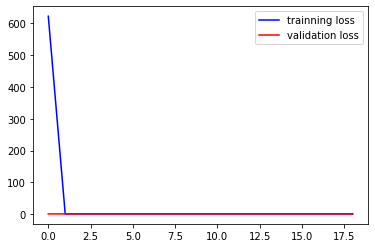

Epoch 1/10
163/163 [==============================] - 4s 18ms/step - loss: 1.4851 - accuracy: 0.5813 - val_loss: 0.7681 - val_accuracy: 0.6772
Epoch 2/10
163/163 [==============================] - 2s 13ms/step - loss: 0.7977 - accuracy: 0.6509 - val_loss: 0.7973 - val_accuracy: 0.6445
Epoch 3/10
163/163 [==============================] - 2s 14ms/step - loss: 0.7648 - accuracy: 0.6695 - val_loss: 0.7408 - val_accuracy: 0.6889
Epoch 4/10
163/163 [==============================] - 2s 14ms/step - loss: 0.7688 - accuracy: 0.6720 - val_loss: 0.6795 - val_accuracy: 0.7112
Epoch 5/10
163/163 [==============================] - 2s 14ms/step - loss: 0.6956 - accuracy: 0.6984 - val_loss: 0.7621 - val_accuracy: 0.6800
Epoch 6/10
163/163 [==============================] - 3s 18ms/step - loss: 0.6229 - accuracy: 0.7358 - val_loss: 0.6489 - val_accuracy: 0.7204
Epoch 7/10
163/163 [==============================] - 2s 14ms/step - loss: 0.5794 - accuracy: 0.7512 - val_loss: 0.5607 - val_accuracy: 0.7701

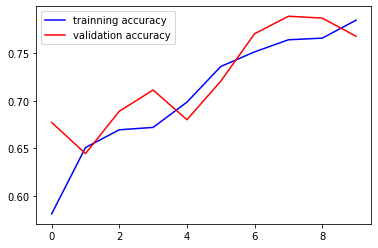

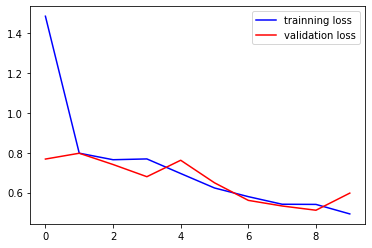

Epoch 1/11
163/163 [==============================] - 4s 22ms/step - loss: 1.7785 - accuracy: 0.5458 - val_loss: 0.8558 - val_accuracy: 0.6256
Epoch 2/11
163/163 [==============================] - 2s 14ms/step - loss: 0.7741 - accuracy: 0.6624 - val_loss: 0.7573 - val_accuracy: 0.6828
Epoch 3/11
163/163 [==============================] - 2s 14ms/step - loss: 0.7241 - accuracy: 0.6823 - val_loss: 0.7210 - val_accuracy: 0.7199
Epoch 4/11
163/163 [==============================] - 2s 14ms/step - loss: 0.6185 - accuracy: 0.7373 - val_loss: 0.6139 - val_accuracy: 0.7248
Epoch 5/11
163/163 [==============================] - 2s 14ms/step - loss: 0.5441 - accuracy: 0.7674 - val_loss: 0.6203 - val_accuracy: 0.7596
Epoch 6/11
163/163 [==============================] - 3s 18ms/step - loss: 0.5261 - accuracy: 0.7703 - val_loss: 0.5449 - val_accuracy: 0.7808
Epoch 7/11
163/163 [==============================] - 2s 14ms/step - loss: 0.5067 - accuracy: 0.7805 - val_loss: 0.5232 - val_accuracy: 0.7908

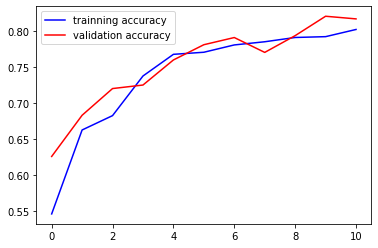

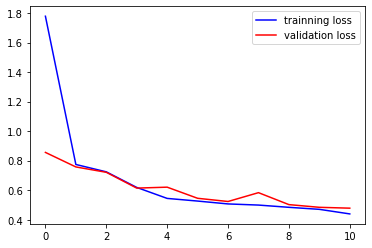

Epoch 1/12
163/163 [==============================] - 3s 17ms/step - loss: 1.9606 - accuracy: 0.5715 - val_loss: 0.7466 - val_accuracy: 0.6851
Epoch 2/12
163/163 [==============================] - 2s 14ms/step - loss: 0.6967 - accuracy: 0.6940 - val_loss: 0.8963 - val_accuracy: 0.5492
Epoch 3/12
163/163 [==============================] - 2s 14ms/step - loss: 0.6537 - accuracy: 0.7147 - val_loss: 0.6741 - val_accuracy: 0.6853
Epoch 4/12
163/163 [==============================] - 2s 14ms/step - loss: 0.6196 - accuracy: 0.7283 - val_loss: 0.5477 - val_accuracy: 0.7628
Epoch 5/12
163/163 [==============================] - 3s 18ms/step - loss: 0.6000 - accuracy: 0.7373 - val_loss: 0.5971 - val_accuracy: 0.7269
Epoch 6/12
163/163 [==============================] - 2s 14ms/step - loss: 0.5757 - accuracy: 0.7464 - val_loss: 0.5686 - val_accuracy: 0.7736
Epoch 7/12
163/163 [==============================] - 2s 14ms/step - loss: 0.5572 - accuracy: 0.7573 - val_loss: 0.5242 - val_accuracy: 0.7780

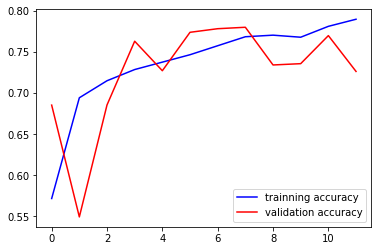

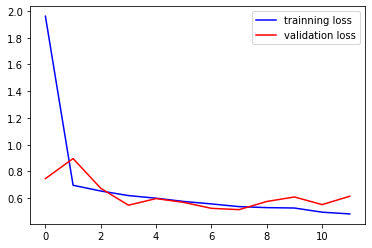

Epoch 1/13
163/163 [==============================] - 3s 17ms/step - loss: 1.7189 - accuracy: 0.4613 - val_loss: 1.0679 - val_accuracy: 0.4645
Epoch 2/13
163/163 [==============================] - 2s 13ms/step - loss: 0.9171 - accuracy: 0.5874 - val_loss: 0.8284 - val_accuracy: 0.6435
Epoch 3/13
163/163 [==============================] - 3s 15ms/step - loss: 0.8339 - accuracy: 0.6365 - val_loss: 0.7914 - val_accuracy: 0.6582
Epoch 4/13
163/163 [==============================] - 3s 15ms/step - loss: 0.7515 - accuracy: 0.6745 - val_loss: 0.7476 - val_accuracy: 0.6790
Epoch 5/13
163/163 [==============================] - 2s 14ms/step - loss: 0.6421 - accuracy: 0.7297 - val_loss: 0.6078 - val_accuracy: 0.7544
Epoch 6/13
163/163 [==============================] - 2s 14ms/step - loss: 0.5936 - accuracy: 0.7475 - val_loss: 0.6118 - val_accuracy: 0.7469
Epoch 7/13
163/163 [==============================] - 2s 14ms/step - loss: 0.5472 - accuracy: 0.7594 - val_loss: 0.5830 - val_accuracy: 0.7647

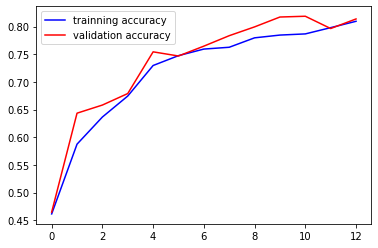

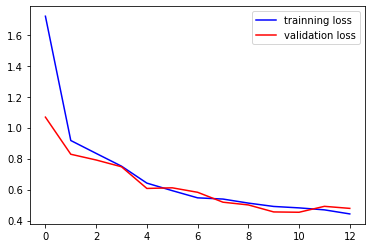

Epoch 1/14
163/163 [==============================] - 4s 22ms/step - loss: 2.0306 - accuracy: 0.4697 - val_loss: 1.0639 - val_accuracy: 0.4645
Epoch 2/14
163/163 [==============================] - 3s 16ms/step - loss: 1.0511 - accuracy: 0.4850 - val_loss: 1.0642 - val_accuracy: 0.4645
Epoch 3/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0510 - accuracy: 0.4850 - val_loss: 1.0665 - val_accuracy: 0.4645
Epoch 4/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0513 - accuracy: 0.4850 - val_loss: 1.0662 - val_accuracy: 0.4645
Epoch 5/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0501 - accuracy: 0.4850 - val_loss: 1.0680 - val_accuracy: 0.4645
Epoch 6/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0508 - accuracy: 0.4850 - val_loss: 1.0653 - val_accuracy: 0.4645
Epoch 7/14
163/163 [==============================] - 3s 19ms/step - loss: 1.0404 - accuracy: 0.4960 - val_loss: 0.9972 - val_accuracy: 0.4736

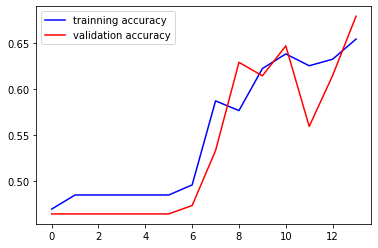

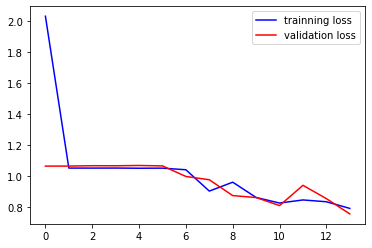

Epoch 1/15
163/163 [==============================] - 3s 17ms/step - loss: 2.1075 - accuracy: 0.4691 - val_loss: 1.0662 - val_accuracy: 0.4645
Epoch 2/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0506 - accuracy: 0.4850 - val_loss: 1.0615 - val_accuracy: 0.4645
Epoch 3/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0506 - accuracy: 0.4850 - val_loss: 1.0616 - val_accuracy: 0.4645
Epoch 4/15
163/163 [==============================] - 3s 18ms/step - loss: 1.0512 - accuracy: 0.4850 - val_loss: 1.0618 - val_accuracy: 0.4645
Epoch 5/15
163/163 [==============================] - 2s 15ms/step - loss: 1.0504 - accuracy: 0.4850 - val_loss: 1.0647 - val_accuracy: 0.4645
Epoch 6/15
163/163 [==============================] - 2s 14ms/step - loss: 1.0495 - accuracy: 0.4850 - val_loss: 1.0629 - val_accuracy: 0.4645
Epoch 7/15
163/163 [==============================] - 2s 13ms/step - loss: 1.0510 - accuracy: 0.4850 - val_loss: 1.0661 - val_accuracy: 0.4645

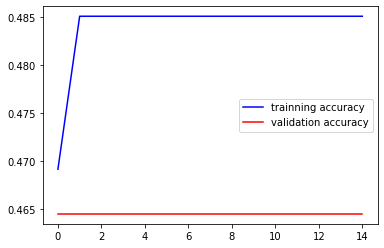

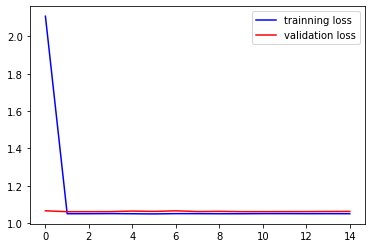

Epoch 1/16
163/163 [==============================] - 4s 18ms/step - loss: 2.0203 - accuracy: 0.5443 - val_loss: 0.9342 - val_accuracy: 0.5499
Epoch 2/16
163/163 [==============================] - 2s 14ms/step - loss: 0.7827 - accuracy: 0.6578 - val_loss: 0.6616 - val_accuracy: 0.7206
Epoch 3/16
163/163 [==============================] - 2s 14ms/step - loss: 0.6512 - accuracy: 0.7230 - val_loss: 0.5796 - val_accuracy: 0.7603
Epoch 4/16
163/163 [==============================] - 2s 13ms/step - loss: 0.5960 - accuracy: 0.7327 - val_loss: 0.6325 - val_accuracy: 0.7372
Epoch 5/16
163/163 [==============================] - 2s 14ms/step - loss: 0.5469 - accuracy: 0.7565 - val_loss: 0.5219 - val_accuracy: 0.7726
Epoch 6/16
163/163 [==============================] - 3s 18ms/step - loss: 0.5557 - accuracy: 0.7577 - val_loss: 0.6190 - val_accuracy: 0.7421
Epoch 7/16
163/163 [==============================] - 2s 15ms/step - loss: 0.5434 - accuracy: 0.7665 - val_loss: 0.5821 - val_accuracy: 0.7446

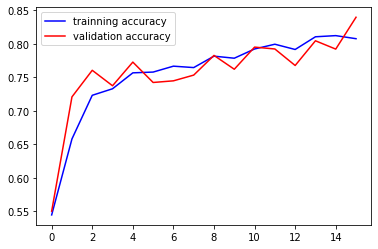

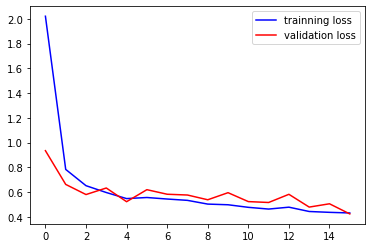

Epoch 1/17
163/163 [==============================] - 4s 23ms/step - loss: 1.8355 - accuracy: 0.4603 - val_loss: 1.0615 - val_accuracy: 0.4645
Epoch 2/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0518 - accuracy: 0.4850 - val_loss: 1.0628 - val_accuracy: 0.4645
Epoch 3/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0511 - accuracy: 0.4850 - val_loss: 1.0643 - val_accuracy: 0.4645
Epoch 4/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0516 - accuracy: 0.4850 - val_loss: 1.0620 - val_accuracy: 0.4645
Epoch 5/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0505 - accuracy: 0.4850 - val_loss: 1.0652 - val_accuracy: 0.4645
Epoch 6/17
163/163 [==============================] - 3s 18ms/step - loss: 1.0510 - accuracy: 0.4850 - val_loss: 1.0616 - val_accuracy: 0.4645
Epoch 7/17
163/163 [==============================] - 2s 15ms/step - loss: 1.0506 - accuracy: 0.4850 - val_loss: 1.0652 - val_accuracy: 0.4645

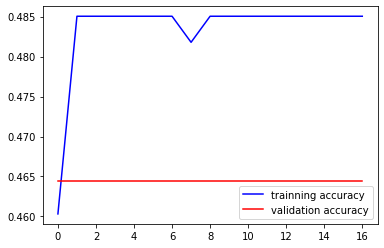

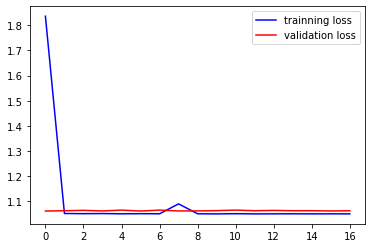

Epoch 1/18
163/163 [==============================] - 3s 17ms/step - loss: 1.6105 - accuracy: 0.5748 - val_loss: 0.7854 - val_accuracy: 0.6695
Epoch 2/18
163/163 [==============================] - 2s 14ms/step - loss: 0.7075 - accuracy: 0.6892 - val_loss: 0.6375 - val_accuracy: 0.7017
Epoch 3/18
163/163 [==============================] - 3s 18ms/step - loss: 0.6422 - accuracy: 0.7134 - val_loss: 0.5855 - val_accuracy: 0.7561
Epoch 4/18
163/163 [==============================] - 2s 15ms/step - loss: 0.5868 - accuracy: 0.7458 - val_loss: 0.5685 - val_accuracy: 0.7524
Epoch 5/18
163/163 [==============================] - 2s 13ms/step - loss: 0.5557 - accuracy: 0.7533 - val_loss: 0.5381 - val_accuracy: 0.7796
Epoch 6/18
163/163 [==============================] - 2s 14ms/step - loss: 0.5350 - accuracy: 0.7696 - val_loss: 0.5728 - val_accuracy: 0.7399
Epoch 7/18
163/163 [==============================] - 2s 14ms/step - loss: 0.5191 - accuracy: 0.7699 - val_loss: 0.5250 - val_accuracy: 0.7902

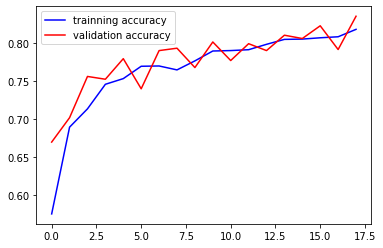

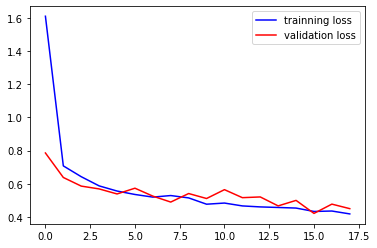

Epoch 1/19
163/163 [==============================] - 4s 23ms/step - loss: 1.9207 - accuracy: 0.4868 - val_loss: 0.9956 - val_accuracy: 0.5285
Epoch 2/19
163/163 [==============================] - 2s 15ms/step - loss: 0.9010 - accuracy: 0.5991 - val_loss: 0.8422 - val_accuracy: 0.6480
Epoch 3/19
163/163 [==============================] - 2s 14ms/step - loss: 0.8062 - accuracy: 0.6520 - val_loss: 0.8195 - val_accuracy: 0.6396
Epoch 4/19
163/163 [==============================] - 2s 14ms/step - loss: 0.7942 - accuracy: 0.6586 - val_loss: 0.7777 - val_accuracy: 0.6568
Epoch 5/19
163/163 [==============================] - 2s 13ms/step - loss: 0.7582 - accuracy: 0.6754 - val_loss: 0.7210 - val_accuracy: 0.6931
Epoch 6/19
163/163 [==============================] - 3s 18ms/step - loss: 0.6958 - accuracy: 0.7017 - val_loss: 0.6684 - val_accuracy: 0.7148
Epoch 7/19
163/163 [==============================] - 3s 18ms/step - loss: 0.6137 - accuracy: 0.7370 - val_loss: 0.5911 - val_accuracy: 0.7640

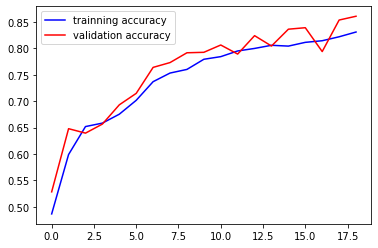

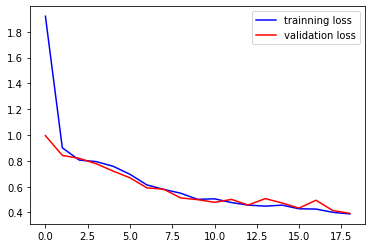

Epoch 1/10
163/163 [==============================] - 3s 17ms/step - loss: 0.9248 - accuracy: 0.6026 - val_loss: 0.5485 - val_accuracy: 0.7768
Epoch 2/10
163/163 [==============================] - 2s 14ms/step - loss: 0.5357 - accuracy: 0.7684 - val_loss: 0.5132 - val_accuracy: 0.7789
Epoch 3/10
163/163 [==============================] - 2s 14ms/step - loss: 0.4979 - accuracy: 0.7803 - val_loss: 0.4852 - val_accuracy: 0.7916
Epoch 4/10
163/163 [==============================] - 2s 14ms/step - loss: 0.4797 - accuracy: 0.7914 - val_loss: 0.4992 - val_accuracy: 0.7902
Epoch 5/10
163/163 [==============================] - 3s 19ms/step - loss: 0.4637 - accuracy: 0.7968 - val_loss: 0.4580 - val_accuracy: 0.7992
Epoch 6/10
163/163 [==============================] - 2s 15ms/step - loss: 0.4424 - accuracy: 0.7924 - val_loss: 0.4926 - val_accuracy: 0.7953
Epoch 7/10
163/163 [==============================] - 2s 14ms/step - loss: 0.4333 - accuracy: 0.8012 - val_loss: 0.4547 - val_accuracy: 0.8058

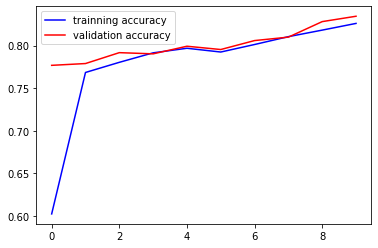

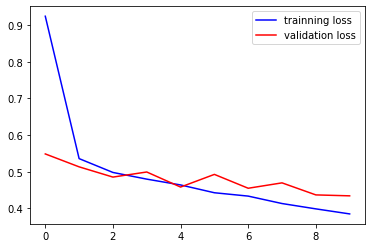

Epoch 1/11
163/163 [==============================] - 3s 17ms/step - loss: 0.9293 - accuracy: 0.6007 - val_loss: 0.5716 - val_accuracy: 0.7601
Epoch 2/11
163/163 [==============================] - 3s 18ms/step - loss: 0.5430 - accuracy: 0.7690 - val_loss: 0.5751 - val_accuracy: 0.7703
Epoch 3/11
163/163 [==============================] - 3s 16ms/step - loss: 0.4958 - accuracy: 0.7816 - val_loss: 0.5028 - val_accuracy: 0.7869
Epoch 4/11
163/163 [==============================] - 2s 14ms/step - loss: 0.4778 - accuracy: 0.7826 - val_loss: 0.4764 - val_accuracy: 0.7981
Epoch 5/11
163/163 [==============================] - 2s 14ms/step - loss: 0.4437 - accuracy: 0.8031 - val_loss: 0.4911 - val_accuracy: 0.7990
Epoch 6/11
163/163 [==============================] - 2s 14ms/step - loss: 0.4286 - accuracy: 0.8087 - val_loss: 0.4595 - val_accuracy: 0.8079
Epoch 7/11
163/163 [==============================] - 2s 14ms/step - loss: 0.4189 - accuracy: 0.8110 - val_loss: 0.4868 - val_accuracy: 0.8013

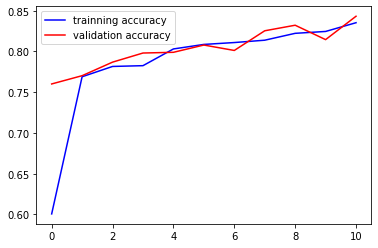

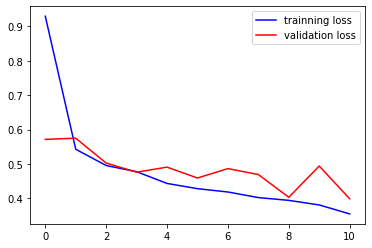

Epoch 1/12
163/163 [==============================] - 4s 23ms/step - loss: 0.8438 - accuracy: 0.6405 - val_loss: 0.5705 - val_accuracy: 0.7645
Epoch 2/12
163/163 [==============================] - 2s 14ms/step - loss: 0.5310 - accuracy: 0.7749 - val_loss: 0.5087 - val_accuracy: 0.7890
Epoch 3/12
163/163 [==============================] - 2s 14ms/step - loss: 0.5048 - accuracy: 0.7814 - val_loss: 0.4971 - val_accuracy: 0.7850
Epoch 4/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4726 - accuracy: 0.7952 - val_loss: 0.4824 - val_accuracy: 0.7911
Epoch 5/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4589 - accuracy: 0.8004 - val_loss: 0.4921 - val_accuracy: 0.7978
Epoch 6/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4528 - accuracy: 0.7979 - val_loss: 0.4683 - val_accuracy: 0.8039
Epoch 7/12
163/163 [==============================] - 3s 18ms/step - loss: 0.4267 - accuracy: 0.8083 - val_loss: 0.4652 - val_accuracy: 0.8095

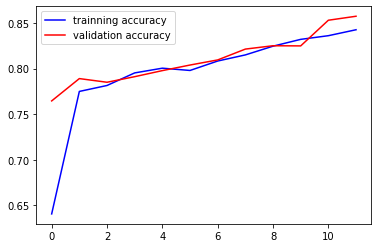

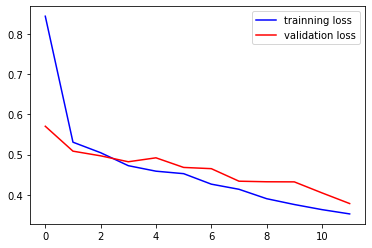

Epoch 1/13
163/163 [==============================] - 4s 19ms/step - loss: 0.8066 - accuracy: 0.6626 - val_loss: 0.5545 - val_accuracy: 0.7713
Epoch 2/13
163/163 [==============================] - 2s 14ms/step - loss: 0.5336 - accuracy: 0.7682 - val_loss: 0.5111 - val_accuracy: 0.7894
Epoch 3/13
163/163 [==============================] - 2s 14ms/step - loss: 0.5074 - accuracy: 0.7801 - val_loss: 0.5015 - val_accuracy: 0.7930
Epoch 4/13
163/163 [==============================] - 2s 15ms/step - loss: 0.4827 - accuracy: 0.7830 - val_loss: 0.5013 - val_accuracy: 0.7930
Epoch 5/13
163/163 [==============================] - 3s 16ms/step - loss: 0.4622 - accuracy: 0.7981 - val_loss: 0.4856 - val_accuracy: 0.7976
Epoch 6/13
163/163 [==============================] - 3s 16ms/step - loss: 0.4510 - accuracy: 0.8027 - val_loss: 0.4718 - val_accuracy: 0.8032
Epoch 7/13
163/163 [==============================] - 2s 14ms/step - loss: 0.4271 - accuracy: 0.8083 - val_loss: 0.4325 - val_accuracy: 0.8205

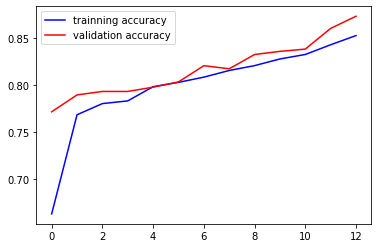

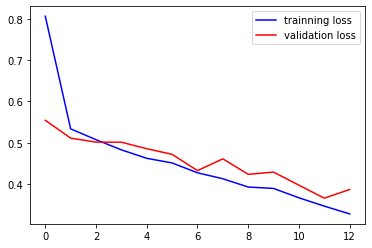

Epoch 1/14
163/163 [==============================] - 4s 17ms/step - loss: 0.8387 - accuracy: 0.6474 - val_loss: 0.5480 - val_accuracy: 0.7682
Epoch 2/14
163/163 [==============================] - 2s 14ms/step - loss: 0.5347 - accuracy: 0.7628 - val_loss: 0.5881 - val_accuracy: 0.7570
Epoch 3/14
163/163 [==============================] - 2s 15ms/step - loss: 0.5020 - accuracy: 0.7801 - val_loss: 0.4872 - val_accuracy: 0.7972
Epoch 4/14
163/163 [==============================] - 3s 16ms/step - loss: 0.4658 - accuracy: 0.7937 - val_loss: 0.4907 - val_accuracy: 0.7880
Epoch 5/14
163/163 [==============================] - 2s 14ms/step - loss: 0.4562 - accuracy: 0.7941 - val_loss: 0.4521 - val_accuracy: 0.8053
Epoch 6/14
163/163 [==============================] - 2s 14ms/step - loss: 0.4388 - accuracy: 0.8041 - val_loss: 0.4804 - val_accuracy: 0.8163
Epoch 7/14
163/163 [==============================] - 2s 14ms/step - loss: 0.4190 - accuracy: 0.8148 - val_loss: 0.4305 - val_accuracy: 0.8226

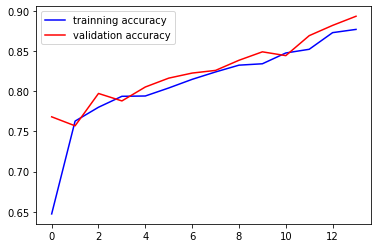

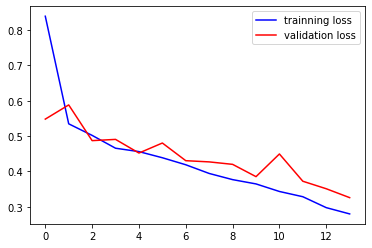

Epoch 1/15
163/163 [==============================] - 3s 17ms/step - loss: 0.7919 - accuracy: 0.6559 - val_loss: 0.5353 - val_accuracy: 0.7824
Epoch 2/15
163/163 [==============================] - 3s 19ms/step - loss: 0.5228 - accuracy: 0.7705 - val_loss: 0.4999 - val_accuracy: 0.7922
Epoch 3/15
163/163 [==============================] - 3s 16ms/step - loss: 0.4910 - accuracy: 0.7860 - val_loss: 0.5044 - val_accuracy: 0.7964
Epoch 4/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4640 - accuracy: 0.7908 - val_loss: 0.5185 - val_accuracy: 0.7955
Epoch 5/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4523 - accuracy: 0.7952 - val_loss: 0.4795 - val_accuracy: 0.7999
Epoch 6/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4373 - accuracy: 0.8064 - val_loss: 0.4788 - val_accuracy: 0.8095
Epoch 7/15
163/163 [==============================] - 3s 18ms/step - loss: 0.4304 - accuracy: 0.8081 - val_loss: 0.4400 - val_accuracy: 0.8090

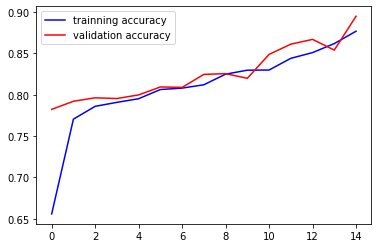

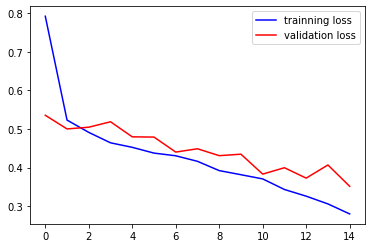

Epoch 1/16
163/163 [==============================] - 3s 17ms/step - loss: 0.8473 - accuracy: 0.6367 - val_loss: 0.5636 - val_accuracy: 0.7528
Epoch 2/16
163/163 [==============================] - 2s 14ms/step - loss: 0.5129 - accuracy: 0.7759 - val_loss: 0.5103 - val_accuracy: 0.7857
Epoch 3/16
163/163 [==============================] - 2s 15ms/step - loss: 0.4893 - accuracy: 0.7822 - val_loss: 0.4876 - val_accuracy: 0.7934
Epoch 4/16
163/163 [==============================] - 3s 18ms/step - loss: 0.4738 - accuracy: 0.7883 - val_loss: 0.4791 - val_accuracy: 0.7964
Epoch 5/16
163/163 [==============================] - 2s 14ms/step - loss: 0.4493 - accuracy: 0.7987 - val_loss: 0.4573 - val_accuracy: 0.8095
Epoch 6/16
163/163 [==============================] - 2s 14ms/step - loss: 0.4373 - accuracy: 0.8010 - val_loss: 0.4493 - val_accuracy: 0.8135
Epoch 7/16
163/163 [==============================] - 2s 14ms/step - loss: 0.4116 - accuracy: 0.8106 - val_loss: 0.4820 - val_accuracy: 0.8191

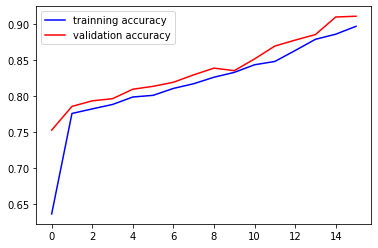

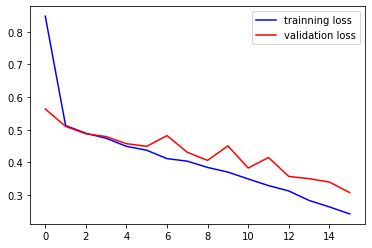

Epoch 1/17
163/163 [==============================] - 3s 18ms/step - loss: 0.8541 - accuracy: 0.6217 - val_loss: 0.6155 - val_accuracy: 0.7001
Epoch 2/17
163/163 [==============================] - 2s 13ms/step - loss: 0.5440 - accuracy: 0.7621 - val_loss: 0.5427 - val_accuracy: 0.7761
Epoch 3/17
163/163 [==============================] - 2s 15ms/step - loss: 0.5002 - accuracy: 0.7765 - val_loss: 0.5395 - val_accuracy: 0.7663
Epoch 4/17
163/163 [==============================] - 2s 15ms/step - loss: 0.4692 - accuracy: 0.7916 - val_loss: 0.4921 - val_accuracy: 0.7913
Epoch 5/17
163/163 [==============================] - 2s 14ms/step - loss: 0.4616 - accuracy: 0.7958 - val_loss: 0.4650 - val_accuracy: 0.8086
Epoch 6/17
163/163 [==============================] - 2s 14ms/step - loss: 0.4391 - accuracy: 0.8008 - val_loss: 0.4517 - val_accuracy: 0.8147
Epoch 7/17
163/163 [==============================] - 2s 14ms/step - loss: 0.4195 - accuracy: 0.8150 - val_loss: 0.4301 - val_accuracy: 0.8214

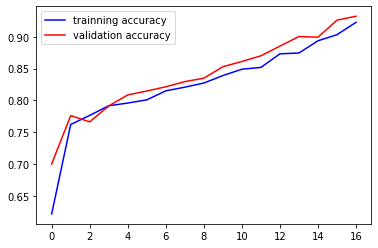

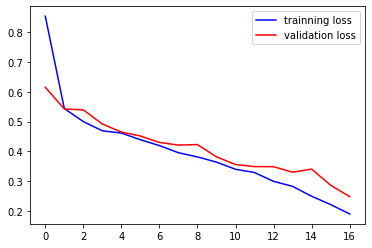

Epoch 1/18
163/163 [==============================] - 3s 17ms/step - loss: 0.8720 - accuracy: 0.6306 - val_loss: 0.5589 - val_accuracy: 0.7526
Epoch 2/18
163/163 [==============================] - 2s 14ms/step - loss: 0.5339 - accuracy: 0.7705 - val_loss: 0.5187 - val_accuracy: 0.7801
Epoch 3/18
163/163 [==============================] - 3s 18ms/step - loss: 0.4834 - accuracy: 0.7882 - val_loss: 0.5049 - val_accuracy: 0.7855
Epoch 4/18
163/163 [==============================] - 2s 15ms/step - loss: 0.4650 - accuracy: 0.7939 - val_loss: 0.4838 - val_accuracy: 0.7958
Epoch 5/18
163/163 [==============================] - 2s 14ms/step - loss: 0.4402 - accuracy: 0.8046 - val_loss: 0.4762 - val_accuracy: 0.7965
Epoch 6/18
163/163 [==============================] - 2s 14ms/step - loss: 0.4271 - accuracy: 0.8087 - val_loss: 0.4384 - val_accuracy: 0.8158
Epoch 7/18
163/163 [==============================] - 2s 14ms/step - loss: 0.4185 - accuracy: 0.8186 - val_loss: 0.4385 - val_accuracy: 0.8216

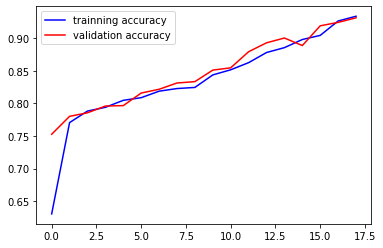

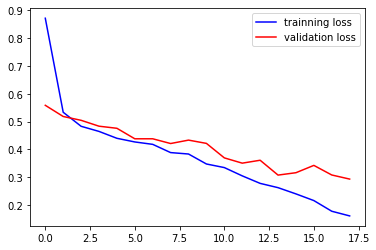

Epoch 1/19
163/163 [==============================] - 3s 17ms/step - loss: 0.7388 - accuracy: 0.6743 - val_loss: 0.5702 - val_accuracy: 0.7750
Epoch 2/19
163/163 [==============================] - 2s 15ms/step - loss: 0.5208 - accuracy: 0.7696 - val_loss: 0.5163 - val_accuracy: 0.7902
Epoch 3/19
163/163 [==============================] - 3s 18ms/step - loss: 0.4825 - accuracy: 0.7847 - val_loss: 0.4936 - val_accuracy: 0.7925
Epoch 4/19
163/163 [==============================] - 2s 14ms/step - loss: 0.4737 - accuracy: 0.7876 - val_loss: 0.4922 - val_accuracy: 0.7927
Epoch 5/19
163/163 [==============================] - 2s 14ms/step - loss: 0.4440 - accuracy: 0.8025 - val_loss: 0.4842 - val_accuracy: 0.8112
Epoch 6/19
163/163 [==============================] - 2s 14ms/step - loss: 0.4250 - accuracy: 0.8066 - val_loss: 0.4728 - val_accuracy: 0.8170
Epoch 7/19
163/163 [==============================] - 2s 14ms/step - loss: 0.4166 - accuracy: 0.8121 - val_loss: 0.4209 - val_accuracy: 0.8287

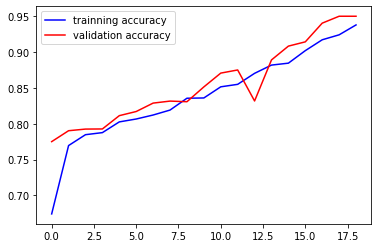

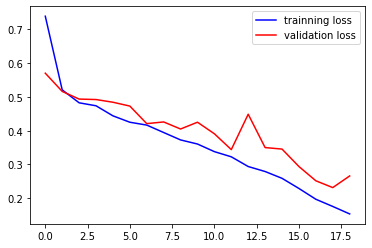

Epoch 1/10
163/163 [==============================] - 4s 18ms/step - loss: 0.8149 - accuracy: 0.6204 - val_loss: 0.6517 - val_accuracy: 0.7469
Epoch 2/10
163/163 [==============================] - 2s 14ms/step - loss: 0.5827 - accuracy: 0.7508 - val_loss: 0.5859 - val_accuracy: 0.7542
Epoch 3/10
163/163 [==============================] - 2s 14ms/step - loss: 0.5273 - accuracy: 0.7711 - val_loss: 0.5980 - val_accuracy: 0.7402
Epoch 4/10
163/163 [==============================] - 2s 14ms/step - loss: 0.4995 - accuracy: 0.7784 - val_loss: 0.5562 - val_accuracy: 0.7605
Epoch 5/10
163/163 [==============================] - 2s 14ms/step - loss: 0.4862 - accuracy: 0.7801 - val_loss: 0.5184 - val_accuracy: 0.7866
Epoch 6/10
163/163 [==============================] - 3s 18ms/step - loss: 0.4738 - accuracy: 0.7922 - val_loss: 0.5790 - val_accuracy: 0.7469
Epoch 7/10
163/163 [==============================] - 2s 14ms/step - loss: 0.4627 - accuracy: 0.7937 - val_loss: 0.5399 - val_accuracy: 0.7636

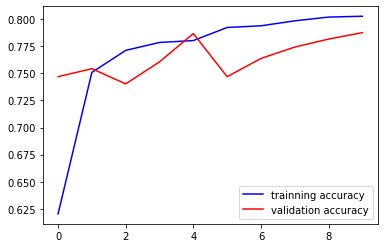

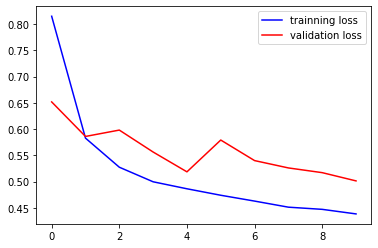

Epoch 1/11
163/163 [==============================] - 3s 17ms/step - loss: 0.8028 - accuracy: 0.6398 - val_loss: 0.6766 - val_accuracy: 0.6914
Epoch 2/11
163/163 [==============================] - 2s 14ms/step - loss: 0.5743 - accuracy: 0.7519 - val_loss: 0.6121 - val_accuracy: 0.7364
Epoch 3/11
163/163 [==============================] - 3s 18ms/step - loss: 0.5106 - accuracy: 0.7774 - val_loss: 0.5679 - val_accuracy: 0.7573
Epoch 4/11
163/163 [==============================] - 2s 15ms/step - loss: 0.4895 - accuracy: 0.7830 - val_loss: 0.5638 - val_accuracy: 0.7554
Epoch 5/11
163/163 [==============================] - 2s 15ms/step - loss: 0.4754 - accuracy: 0.7855 - val_loss: 0.5344 - val_accuracy: 0.7717
Epoch 6/11
163/163 [==============================] - 2s 15ms/step - loss: 0.4690 - accuracy: 0.7859 - val_loss: 0.5218 - val_accuracy: 0.7806
Epoch 7/11
163/163 [==============================] - 2s 14ms/step - loss: 0.4587 - accuracy: 0.8000 - val_loss: 0.4926 - val_accuracy: 0.7934

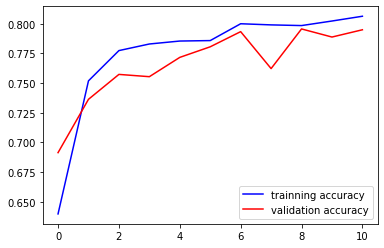

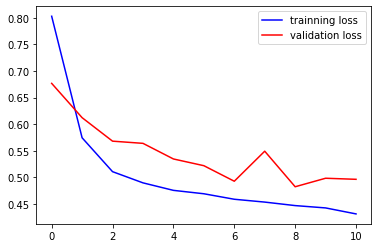

Epoch 1/12
163/163 [==============================] - 4s 18ms/step - loss: 0.7996 - accuracy: 0.6415 - val_loss: 0.6989 - val_accuracy: 0.7059
Epoch 2/12
163/163 [==============================] - 3s 18ms/step - loss: 0.5834 - accuracy: 0.7481 - val_loss: 0.6100 - val_accuracy: 0.7477
Epoch 3/12
163/163 [==============================] - 3s 19ms/step - loss: 0.5283 - accuracy: 0.7669 - val_loss: 0.5765 - val_accuracy: 0.7790
Epoch 4/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4945 - accuracy: 0.7822 - val_loss: 0.5385 - val_accuracy: 0.7741
Epoch 5/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4769 - accuracy: 0.7866 - val_loss: 0.5305 - val_accuracy: 0.7818
Epoch 6/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4686 - accuracy: 0.7893 - val_loss: 0.5501 - val_accuracy: 0.7670
Epoch 7/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4578 - accuracy: 0.7935 - val_loss: 0.5050 - val_accuracy: 0.7939

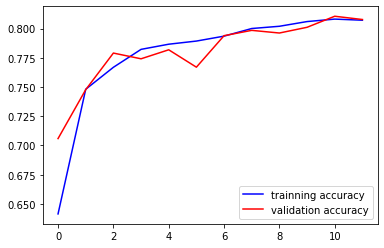

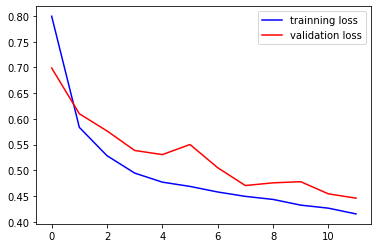

Epoch 1/13
163/163 [==============================] - 4s 21ms/step - loss: 0.8359 - accuracy: 0.6246 - val_loss: 0.7397 - val_accuracy: 0.6545
Epoch 2/13
163/163 [==============================] - 2s 14ms/step - loss: 0.6111 - accuracy: 0.7308 - val_loss: 0.6048 - val_accuracy: 0.7542
Epoch 3/13
163/163 [==============================] - 2s 14ms/step - loss: 0.5263 - accuracy: 0.7720 - val_loss: 0.5502 - val_accuracy: 0.7715
Epoch 4/13
163/163 [==============================] - 2s 14ms/step - loss: 0.5091 - accuracy: 0.7774 - val_loss: 0.5352 - val_accuracy: 0.7771
Epoch 5/13
163/163 [==============================] - 2s 14ms/step - loss: 0.4903 - accuracy: 0.7822 - val_loss: 0.5343 - val_accuracy: 0.7733
Epoch 6/13
163/163 [==============================] - 2s 14ms/step - loss: 0.4850 - accuracy: 0.7837 - val_loss: 0.5344 - val_accuracy: 0.7722
Epoch 7/13
163/163 [==============================] - 3s 18ms/step - loss: 0.4702 - accuracy: 0.7933 - val_loss: 0.5226 - val_accuracy: 0.7769

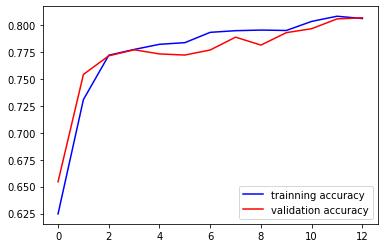

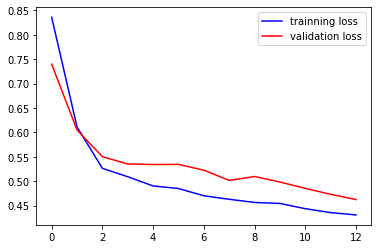

Epoch 1/14
163/163 [==============================] - 4s 23ms/step - loss: 0.8177 - accuracy: 0.6342 - val_loss: 0.6560 - val_accuracy: 0.7498
Epoch 2/14
163/163 [==============================] - 2s 14ms/step - loss: 0.5936 - accuracy: 0.7412 - val_loss: 0.6718 - val_accuracy: 0.7194
Epoch 3/14
163/163 [==============================] - 2s 14ms/step - loss: 0.5175 - accuracy: 0.7751 - val_loss: 0.5660 - val_accuracy: 0.7526
Epoch 4/14
163/163 [==============================] - 2s 14ms/step - loss: 0.5064 - accuracy: 0.7812 - val_loss: 0.5665 - val_accuracy: 0.7568
Epoch 5/14
163/163 [==============================] - 2s 14ms/step - loss: 0.4809 - accuracy: 0.7859 - val_loss: 0.5477 - val_accuracy: 0.7614
Epoch 6/14
163/163 [==============================] - 3s 19ms/step - loss: 0.4765 - accuracy: 0.7868 - val_loss: 0.5314 - val_accuracy: 0.7705
Epoch 7/14
163/163 [==============================] - 2s 15ms/step - loss: 0.4635 - accuracy: 0.7929 - val_loss: 0.5436 - val_accuracy: 0.7650

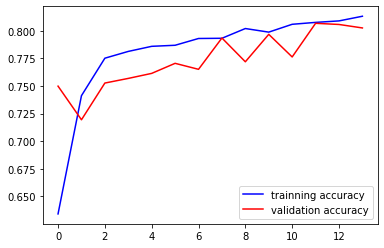

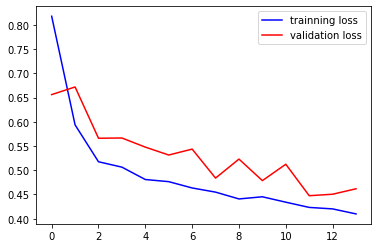

Epoch 1/15
163/163 [==============================] - 3s 17ms/step - loss: 0.7982 - accuracy: 0.6472 - val_loss: 0.6761 - val_accuracy: 0.7155
Epoch 2/15
163/163 [==============================] - 2s 14ms/step - loss: 0.5790 - accuracy: 0.7513 - val_loss: 0.5580 - val_accuracy: 0.7773
Epoch 3/15
163/163 [==============================] - 3s 17ms/step - loss: 0.5349 - accuracy: 0.7728 - val_loss: 0.5539 - val_accuracy: 0.7720
Epoch 4/15
163/163 [==============================] - 3s 18ms/step - loss: 0.5082 - accuracy: 0.7765 - val_loss: 0.5660 - val_accuracy: 0.7521
Epoch 5/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4894 - accuracy: 0.7860 - val_loss: 0.5346 - val_accuracy: 0.7853
Epoch 6/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4767 - accuracy: 0.7860 - val_loss: 0.5677 - val_accuracy: 0.7491
Epoch 7/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4680 - accuracy: 0.7899 - val_loss: 0.5606 - val_accuracy: 0.7554

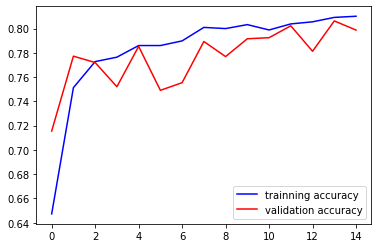

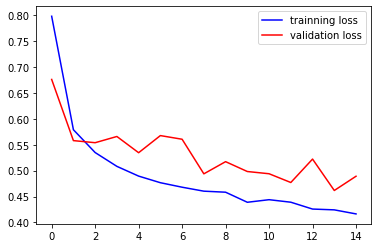

Epoch 1/16
163/163 [==============================] - 3s 17ms/step - loss: 0.8048 - accuracy: 0.6378 - val_loss: 0.8042 - val_accuracy: 0.5283
Epoch 2/16
163/163 [==============================] - 2s 14ms/step - loss: 0.5968 - accuracy: 0.7389 - val_loss: 0.5901 - val_accuracy: 0.7673
Epoch 3/16
163/163 [==============================] - 2s 14ms/step - loss: 0.5238 - accuracy: 0.7688 - val_loss: 0.5832 - val_accuracy: 0.7418
Epoch 4/16
163/163 [==============================] - 3s 19ms/step - loss: 0.5083 - accuracy: 0.7793 - val_loss: 0.5808 - val_accuracy: 0.7526
Epoch 5/16
163/163 [==============================] - 3s 18ms/step - loss: 0.4888 - accuracy: 0.7822 - val_loss: 0.5289 - val_accuracy: 0.7822
Epoch 6/16
163/163 [==============================] - 2s 14ms/step - loss: 0.4827 - accuracy: 0.7885 - val_loss: 0.5609 - val_accuracy: 0.7531
Epoch 7/16
163/163 [==============================] - 2s 14ms/step - loss: 0.4736 - accuracy: 0.7878 - val_loss: 0.5589 - val_accuracy: 0.7521

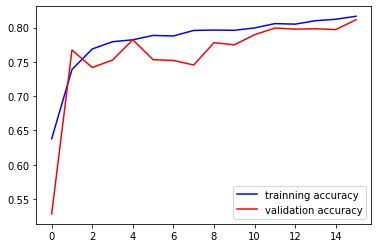

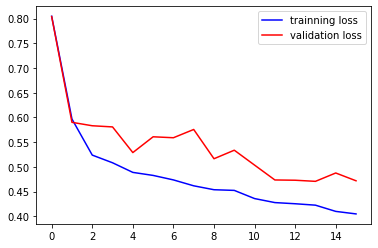

Epoch 1/17
163/163 [==============================] - 3s 17ms/step - loss: 0.8544 - accuracy: 0.6233 - val_loss: 0.6977 - val_accuracy: 0.7269
Epoch 2/17
163/163 [==============================] - 2s 14ms/step - loss: 0.6137 - accuracy: 0.7343 - val_loss: 0.6419 - val_accuracy: 0.7232
Epoch 3/17
163/163 [==============================] - 2s 14ms/step - loss: 0.5296 - accuracy: 0.7703 - val_loss: 0.6276 - val_accuracy: 0.7070
Epoch 4/17
163/163 [==============================] - 2s 15ms/step - loss: 0.5285 - accuracy: 0.7717 - val_loss: 0.5436 - val_accuracy: 0.7780
Epoch 5/17
163/163 [==============================] - 3s 20ms/step - loss: 0.4977 - accuracy: 0.7807 - val_loss: 0.5554 - val_accuracy: 0.7677
Epoch 6/17
163/163 [==============================] - 2s 15ms/step - loss: 0.4824 - accuracy: 0.7853 - val_loss: 0.5627 - val_accuracy: 0.7589
Epoch 7/17
163/163 [==============================] - 2s 15ms/step - loss: 0.4709 - accuracy: 0.7893 - val_loss: 0.5510 - val_accuracy: 0.7612

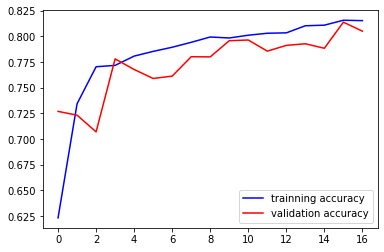

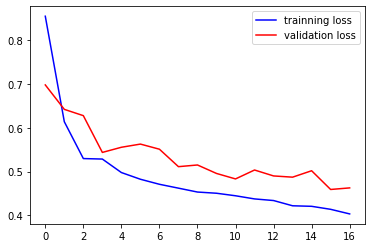

Epoch 1/18
163/163 [==============================] - 3s 17ms/step - loss: 0.8192 - accuracy: 0.6426 - val_loss: 0.6447 - val_accuracy: 0.7379
Epoch 2/18
163/163 [==============================] - 2s 14ms/step - loss: 0.5851 - accuracy: 0.7490 - val_loss: 0.6133 - val_accuracy: 0.7329
Epoch 3/18
163/163 [==============================] - 3s 19ms/step - loss: 0.5413 - accuracy: 0.7636 - val_loss: 0.5875 - val_accuracy: 0.7586
Epoch 4/18
163/163 [==============================] - 3s 20ms/step - loss: 0.4982 - accuracy: 0.7841 - val_loss: 0.5670 - val_accuracy: 0.7531
Epoch 5/18
163/163 [==============================] - 2s 14ms/step - loss: 0.4807 - accuracy: 0.7811 - val_loss: 0.5468 - val_accuracy: 0.7582
Epoch 6/18
163/163 [==============================] - 2s 14ms/step - loss: 0.4731 - accuracy: 0.7926 - val_loss: 0.6125 - val_accuracy: 0.7063
Epoch 7/18
163/163 [==============================] - 2s 14ms/step - loss: 0.4605 - accuracy: 0.7937 - val_loss: 0.5480 - val_accuracy: 0.7584

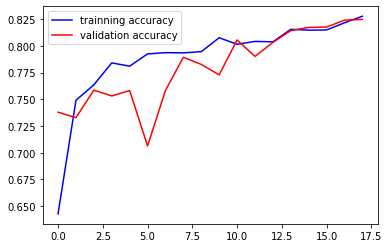

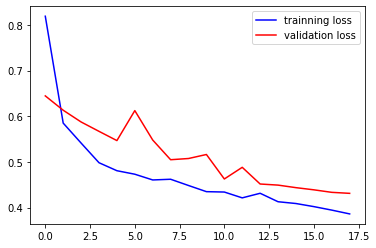

Epoch 1/19
163/163 [==============================] - 5s 23ms/step - loss: 0.8515 - accuracy: 0.6030 - val_loss: 0.7246 - val_accuracy: 0.7026
Epoch 2/19
163/163 [==============================] - 2s 14ms/step - loss: 0.5946 - accuracy: 0.7510 - val_loss: 0.6728 - val_accuracy: 0.6954
Epoch 3/19
163/163 [==============================] - 2s 14ms/step - loss: 0.5331 - accuracy: 0.7732 - val_loss: 0.5373 - val_accuracy: 0.7782
Epoch 4/19
163/163 [==============================] - 2s 14ms/step - loss: 0.5075 - accuracy: 0.7749 - val_loss: 0.5247 - val_accuracy: 0.7867
Epoch 5/19
163/163 [==============================] - 2s 14ms/step - loss: 0.4934 - accuracy: 0.7797 - val_loss: 0.5497 - val_accuracy: 0.7650
Epoch 6/19
163/163 [==============================] - 3s 16ms/step - loss: 0.4761 - accuracy: 0.7895 - val_loss: 0.5107 - val_accuracy: 0.7918
Epoch 7/19
163/163 [==============================] - 2s 15ms/step - loss: 0.4696 - accuracy: 0.7914 - val_loss: 0.5176 - val_accuracy: 0.7783

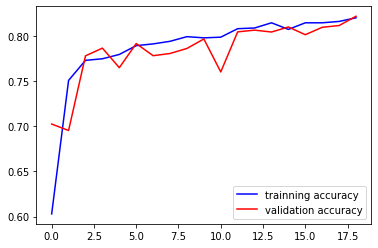

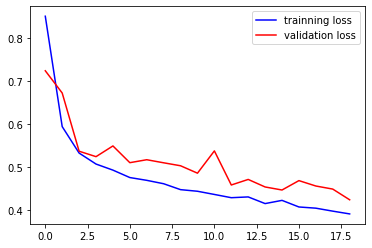

Epoch 1/10
163/163 [==============================] - 4s 19ms/step - loss: 81337.6875 - accuracy: 0.4626 - val_loss: 318.8607 - val_accuracy: 0.2572
Epoch 2/10
163/163 [==============================] - 3s 16ms/step - loss: 3.8976 - accuracy: 0.4833 - val_loss: 1.0938 - val_accuracy: 0.4503
Epoch 3/10
163/163 [==============================] - 3s 20ms/step - loss: 1.0552 - accuracy: 0.4850 - val_loss: 1.1069 - val_accuracy: 0.4543
Epoch 4/10
163/163 [==============================] - 3s 17ms/step - loss: 1.0558 - accuracy: 0.4850 - val_loss: 1.1117 - val_accuracy: 0.4536
Epoch 5/10
163/163 [==============================] - 3s 16ms/step - loss: 1.0567 - accuracy: 0.4850 - val_loss: 1.0918 - val_accuracy: 0.4489
Epoch 6/10
163/163 [==============================] - 3s 15ms/step - loss: 1.0567 - accuracy: 0.4850 - val_loss: 1.0961 - val_accuracy: 0.4493
Epoch 7/10
163/163 [==============================] - 3s 16ms/step - loss: 1.0565 - accuracy: 0.4850 - val_loss: 1.0919 - val_accuracy: 

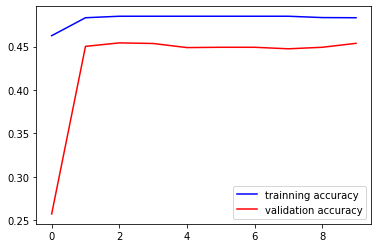

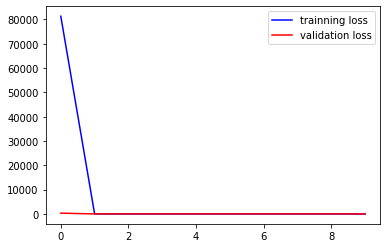

Epoch 1/11
163/163 [==============================] - 4s 19ms/step - loss: 58352.0117 - accuracy: 0.4413 - val_loss: 1.0617 - val_accuracy: 0.4645
Epoch 2/11
163/163 [==============================] - 4s 22ms/step - loss: 1.0674 - accuracy: 0.4847 - val_loss: 1.0695 - val_accuracy: 0.4645
Epoch 3/11
163/163 [==============================] - 3s 16ms/step - loss: 1.0576 - accuracy: 0.4850 - val_loss: 1.0624 - val_accuracy: 0.4645
Epoch 4/11
163/163 [==============================] - 3s 16ms/step - loss: 1.0561 - accuracy: 0.4850 - val_loss: 1.0742 - val_accuracy: 0.4645
Epoch 5/11
163/163 [==============================] - 3s 16ms/step - loss: 1.0549 - accuracy: 0.4850 - val_loss: 1.0679 - val_accuracy: 0.4645
Epoch 6/11
163/163 [==============================] - 3s 16ms/step - loss: 1.0556 - accuracy: 0.4850 - val_loss: 1.0639 - val_accuracy: 0.4645
Epoch 7/11
163/163 [==============================] - 3s 17ms/step - loss: 1.0552 - accuracy: 0.4850 - val_loss: 1.0662 - val_accuracy: 0.

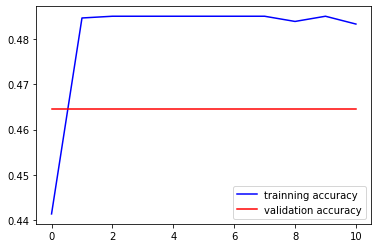

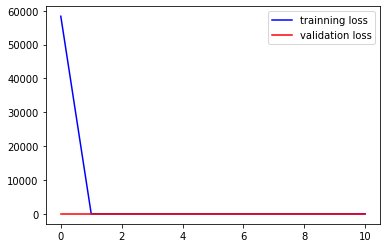

Epoch 1/12
163/163 [==============================] - 4s 22ms/step - loss: 179467.0469 - accuracy: 0.4469 - val_loss: 1.0629 - val_accuracy: 0.4645
Epoch 2/12
163/163 [==============================] - 3s 16ms/step - loss: 1.0559 - accuracy: 0.4850 - val_loss: 1.0672 - val_accuracy: 0.4645
Epoch 3/12
163/163 [==============================] - 3s 15ms/step - loss: 270.8718 - accuracy: 0.4647 - val_loss: 1.0625 - val_accuracy: 0.4645
Epoch 4/12
163/163 [==============================] - 3s 15ms/step - loss: 86.4170 - accuracy: 0.4831 - val_loss: 1.4471 - val_accuracy: 0.2572
Epoch 5/12
163/163 [==============================] - 3s 16ms/step - loss: 259.2602 - accuracy: 0.4668 - val_loss: 1.0632 - val_accuracy: 0.4645
Epoch 6/12
163/163 [==============================] - 3s 20ms/step - loss: 1.0576 - accuracy: 0.4797 - val_loss: 1.0738 - val_accuracy: 0.4645
Epoch 7/12
163/163 [==============================] - 3s 16ms/step - loss: 2.2412 - accuracy: 0.4753 - val_loss: 1.0677 - val_accura

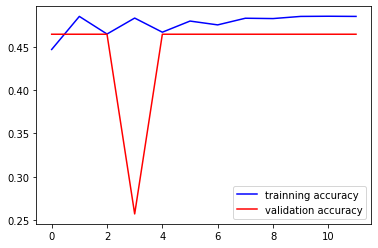

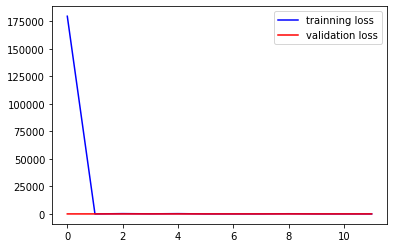

Epoch 1/13
163/163 [==============================] - 5s 24ms/step - loss: 52170.0547 - accuracy: 0.4114 - val_loss: 1.0971 - val_accuracy: 0.4645
Epoch 2/13
163/163 [==============================] - 3s 16ms/step - loss: 20.1222 - accuracy: 0.4574 - val_loss: 1.0741 - val_accuracy: 0.4645
Epoch 3/13
163/163 [==============================] - 3s 16ms/step - loss: 1.0589 - accuracy: 0.4814 - val_loss: 1.0617 - val_accuracy: 0.4645
Epoch 4/13
163/163 [==============================] - 3s 16ms/step - loss: 1.0553 - accuracy: 0.4849 - val_loss: 1.0644 - val_accuracy: 0.4645
Epoch 5/13
163/163 [==============================] - 3s 20ms/step - loss: 1.0538 - accuracy: 0.4850 - val_loss: 1.0630 - val_accuracy: 0.4645
Epoch 6/13
163/163 [==============================] - 4s 22ms/step - loss: 1.0568 - accuracy: 0.4850 - val_loss: 1.0644 - val_accuracy: 0.4645
Epoch 7/13
163/163 [==============================] - 3s 16ms/step - loss: 1.0551 - accuracy: 0.4850 - val_loss: 1.1088 - val_accuracy: 0

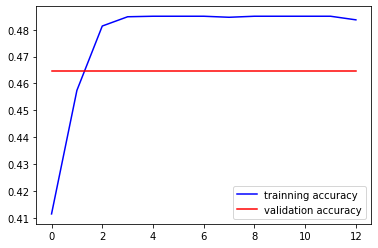

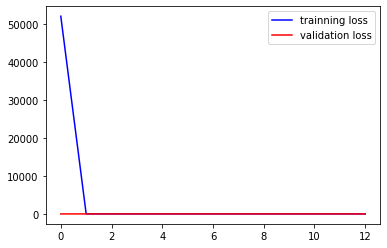

Epoch 1/14
163/163 [==============================] - 4s 22ms/step - loss: 82309.6016 - accuracy: 0.4753 - val_loss: 13273.6406 - val_accuracy: 0.2783
Epoch 2/14
163/163 [==============================] - 3s 16ms/step - loss: 394.0424 - accuracy: 0.4688 - val_loss: 1.0806 - val_accuracy: 0.4645
Epoch 3/14
163/163 [==============================] - 3s 16ms/step - loss: 8.4328 - accuracy: 0.4803 - val_loss: 1.0682 - val_accuracy: 0.4645
Epoch 4/14
163/163 [==============================] - 3s 16ms/step - loss: 1.0552 - accuracy: 0.4850 - val_loss: 1.0808 - val_accuracy: 0.4645
Epoch 5/14
163/163 [==============================] - 3s 20ms/step - loss: 1.0566 - accuracy: 0.4850 - val_loss: 1.0714 - val_accuracy: 0.4645
Epoch 6/14
163/163 [==============================] - 3s 17ms/step - loss: 1.0567 - accuracy: 0.4850 - val_loss: 1.0822 - val_accuracy: 0.4645
Epoch 7/14
163/163 [==============================] - 3s 16ms/step - loss: 1.0560 - accuracy: 0.4845 - val_loss: 1.0644 - val_accura

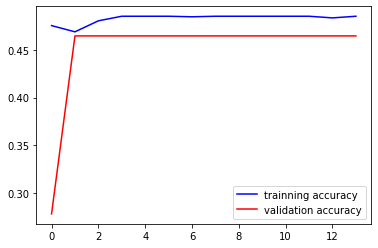

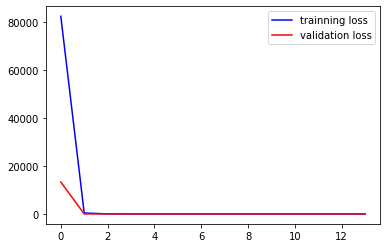

Epoch 1/15
163/163 [==============================] - 4s 19ms/step - loss: 20336.1484 - accuracy: 0.4333 - val_loss: 1.0626 - val_accuracy: 0.4645
Epoch 2/15
163/163 [==============================] - 3s 20ms/step - loss: 1734.6824 - accuracy: 0.4434 - val_loss: 1.0740 - val_accuracy: 0.4645
Epoch 3/15
163/163 [==============================] - 3s 15ms/step - loss: 46.6166 - accuracy: 0.4743 - val_loss: 1.0734 - val_accuracy: 0.4645
Epoch 4/15
163/163 [==============================] - 2s 15ms/step - loss: 1.0751 - accuracy: 0.4850 - val_loss: 1.0614 - val_accuracy: 0.4645
Epoch 5/15
163/163 [==============================] - 3s 16ms/step - loss: 1.0550 - accuracy: 0.4850 - val_loss: 1.0638 - val_accuracy: 0.4645
Epoch 6/15
163/163 [==============================] - 2s 15ms/step - loss: 1.0582 - accuracy: 0.4850 - val_loss: 1.0702 - val_accuracy: 0.4645
Epoch 7/15
163/163 [==============================] - 3s 18ms/step - loss: 1.0557 - accuracy: 0.4850 - val_loss: 1.0663 - val_accuracy

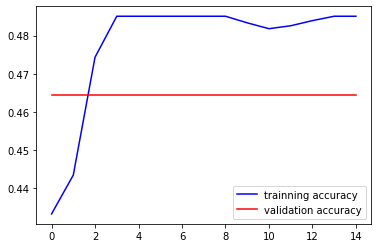

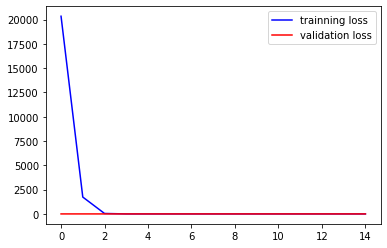

Epoch 1/16
163/163 [==============================] - 5s 25ms/step - loss: 50851.4453 - accuracy: 0.4049 - val_loss: 1.0780 - val_accuracy: 0.4645
Epoch 2/16
163/163 [==============================] - 3s 16ms/step - loss: 1037.2035 - accuracy: 0.4440 - val_loss: 1.1369 - val_accuracy: 0.4645
Epoch 3/16
163/163 [==============================] - 3s 16ms/step - loss: 4.4335 - accuracy: 0.4396 - val_loss: 1.1169 - val_accuracy: 0.4645
Epoch 4/16
163/163 [==============================] - 3s 16ms/step - loss: 53.9791 - accuracy: 0.4791 - val_loss: 1.0760 - val_accuracy: 0.4645
Epoch 5/16
163/163 [==============================] - 3s 16ms/step - loss: 4.1306 - accuracy: 0.4829 - val_loss: 1.0625 - val_accuracy: 0.4645
Epoch 6/16
163/163 [==============================] - 3s 21ms/step - loss: 1.0556 - accuracy: 0.4850 - val_loss: 1.0672 - val_accuracy: 0.4645
Epoch 7/16
163/163 [==============================] - 3s 16ms/step - loss: 1.0567 - accuracy: 0.4850 - val_loss: 1.0708 - val_accuracy

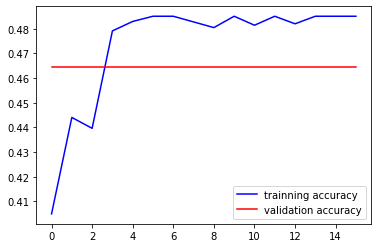

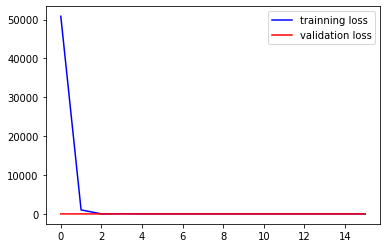

Epoch 1/17
163/163 [==============================] - 4s 19ms/step - loss: 57731.6562 - accuracy: 0.4494 - val_loss: 1.0623 - val_accuracy: 0.4645
Epoch 2/17
163/163 [==============================] - 3s 16ms/step - loss: 1.0592 - accuracy: 0.4835 - val_loss: 1.0640 - val_accuracy: 0.4645
Epoch 3/17
163/163 [==============================] - 3s 16ms/step - loss: 1.0697 - accuracy: 0.4835 - val_loss: 1.0752 - val_accuracy: 0.4645
Epoch 4/17
163/163 [==============================] - 3s 18ms/step - loss: 1.0643 - accuracy: 0.4841 - val_loss: 1.0663 - val_accuracy: 0.4645
Epoch 5/17
163/163 [==============================] - 3s 21ms/step - loss: 1.0564 - accuracy: 0.4850 - val_loss: 1.0799 - val_accuracy: 0.4645
Epoch 6/17
163/163 [==============================] - 3s 16ms/step - loss: 1.0565 - accuracy: 0.4850 - val_loss: 1.0710 - val_accuracy: 0.4645
Epoch 7/17
163/163 [==============================] - 3s 16ms/step - loss: 1.0562 - accuracy: 0.4850 - val_loss: 1.0812 - val_accuracy: 0.

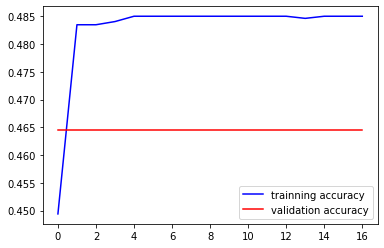

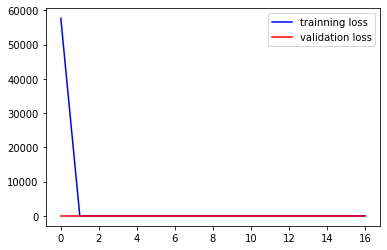

Epoch 1/18
163/163 [==============================] - 4s 23ms/step - loss: 50729.3984 - accuracy: 0.4189 - val_loss: 1.0691 - val_accuracy: 0.4645
Epoch 2/18
163/163 [==============================] - 4s 22ms/step - loss: 6.4101 - accuracy: 0.4567 - val_loss: 1.0833 - val_accuracy: 0.4645
Epoch 3/18
163/163 [==============================] - 3s 16ms/step - loss: 27.5964 - accuracy: 0.4856 - val_loss: 1.1083 - val_accuracy: 0.4645
Epoch 4/18
163/163 [==============================] - 3s 16ms/step - loss: 1.0570 - accuracy: 0.4850 - val_loss: 1.0686 - val_accuracy: 0.4645
Epoch 5/18
163/163 [==============================] - 3s 15ms/step - loss: 7.5350 - accuracy: 0.4827 - val_loss: 1.0653 - val_accuracy: 0.4645
Epoch 6/18
163/163 [==============================] - 3s 16ms/step - loss: 1.0561 - accuracy: 0.4854 - val_loss: 1.0720 - val_accuracy: 0.4645
Epoch 7/18
163/163 [==============================] - 4s 22ms/step - loss: 1.0563 - accuracy: 0.4839 - val_loss: 1.0672 - val_accuracy: 0

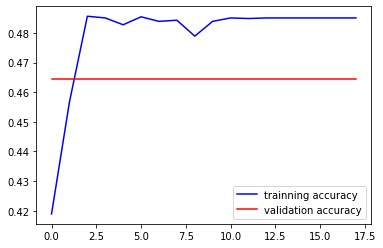

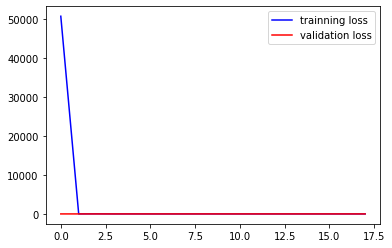

Epoch 1/19
163/163 [==============================] - 4s 19ms/step - loss: 119633.5000 - accuracy: 0.4609 - val_loss: 350.9502 - val_accuracy: 0.4645
Epoch 2/19
163/163 [==============================] - 3s 16ms/step - loss: 144.2684 - accuracy: 0.4411 - val_loss: 1.0846 - val_accuracy: 0.4645
Epoch 3/19
163/163 [==============================] - 3s 20ms/step - loss: 2.4645 - accuracy: 0.4820 - val_loss: 1.0627 - val_accuracy: 0.4645
Epoch 4/19
163/163 [==============================] - 2s 15ms/step - loss: 1.0603 - accuracy: 0.4843 - val_loss: 1.0734 - val_accuracy: 0.4645
Epoch 5/19
163/163 [==============================] - 3s 16ms/step - loss: 1.0542 - accuracy: 0.4833 - val_loss: 1.0658 - val_accuracy: 0.4645
Epoch 6/19
163/163 [==============================] - 2s 15ms/step - loss: 1.0582 - accuracy: 0.4850 - val_loss: 1.0649 - val_accuracy: 0.4645
Epoch 7/19
163/163 [==============================] - 3s 16ms/step - loss: 1.0561 - accuracy: 0.4850 - val_loss: 1.0644 - val_accurac

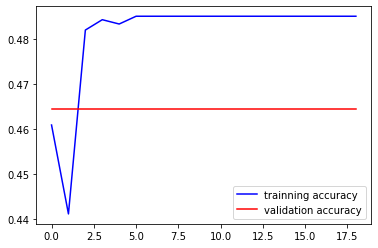

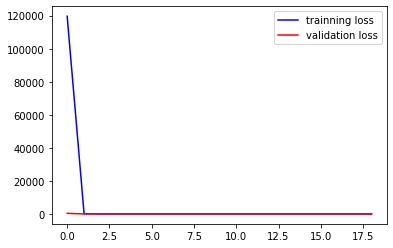

Epoch 1/10
163/163 [==============================] - 4s 19ms/step - loss: 19.5183 - accuracy: 0.5454 - val_loss: 0.8261 - val_accuracy: 0.6524
Epoch 2/10
163/163 [==============================] - 3s 15ms/step - loss: 1.1221 - accuracy: 0.6365 - val_loss: 0.7385 - val_accuracy: 0.6965
Epoch 3/10
163/163 [==============================] - 3s 20ms/step - loss: 1.3130 - accuracy: 0.6628 - val_loss: 5.8916 - val_accuracy: 0.4647
Epoch 4/10
163/163 [==============================] - 3s 18ms/step - loss: 0.8919 - accuracy: 0.6839 - val_loss: 0.6834 - val_accuracy: 0.6832
Epoch 5/10
163/163 [==============================] - 3s 16ms/step - loss: 0.7036 - accuracy: 0.7120 - val_loss: 0.5943 - val_accuracy: 0.7579
Epoch 6/10
163/163 [==============================] - 3s 16ms/step - loss: 0.7672 - accuracy: 0.7304 - val_loss: 0.5665 - val_accuracy: 0.7745
Epoch 7/10
163/163 [==============================] - 3s 15ms/step - loss: 0.6096 - accuracy: 0.7416 - val_loss: 0.6065 - val_accuracy: 0.746

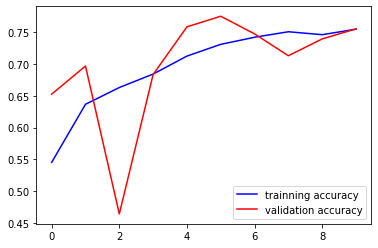

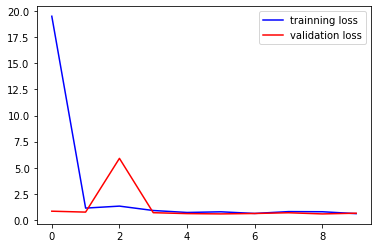

Epoch 1/11
163/163 [==============================] - 4s 19ms/step - loss: 34.0636 - accuracy: 0.4895 - val_loss: 0.8976 - val_accuracy: 0.5814
Epoch 2/11
163/163 [==============================] - 3s 16ms/step - loss: 1.6859 - accuracy: 0.5794 - val_loss: 0.7832 - val_accuracy: 0.6582
Epoch 3/11
163/163 [==============================] - 3s 20ms/step - loss: 0.8660 - accuracy: 0.6403 - val_loss: 0.6483 - val_accuracy: 0.7217
Epoch 4/11
163/163 [==============================] - 3s 18ms/step - loss: 0.9376 - accuracy: 0.6771 - val_loss: 0.6189 - val_accuracy: 0.7444
Epoch 5/11
163/163 [==============================] - 2s 15ms/step - loss: 0.7011 - accuracy: 0.7140 - val_loss: 0.6511 - val_accuracy: 0.7329
Epoch 6/11
163/163 [==============================] - 3s 16ms/step - loss: 0.6512 - accuracy: 0.7375 - val_loss: 0.5632 - val_accuracy: 0.7696
Epoch 7/11
163/163 [==============================] - 3s 16ms/step - loss: 0.6396 - accuracy: 0.7396 - val_loss: 0.5684 - val_accuracy: 0.758

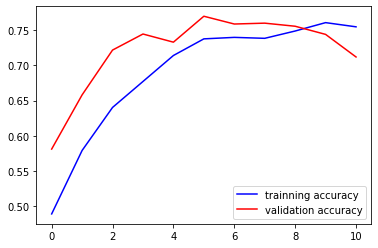

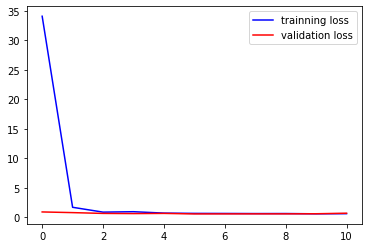

Epoch 1/12
163/163 [==============================] - 4s 19ms/step - loss: 22.6660 - accuracy: 0.5470 - val_loss: 0.8496 - val_accuracy: 0.6286
Epoch 2/12
163/163 [==============================] - 3s 20ms/step - loss: 1.0070 - accuracy: 0.6846 - val_loss: 0.6272 - val_accuracy: 0.7418
Epoch 3/12
163/163 [==============================] - 3s 17ms/step - loss: 0.8008 - accuracy: 0.7168 - val_loss: 0.7117 - val_accuracy: 0.7120
Epoch 4/12
163/163 [==============================] - 3s 16ms/step - loss: 0.7873 - accuracy: 0.7375 - val_loss: 0.6564 - val_accuracy: 0.7082
Epoch 5/12
163/163 [==============================] - 3s 16ms/step - loss: 0.6660 - accuracy: 0.7512 - val_loss: 0.5618 - val_accuracy: 0.7538
Epoch 6/12
163/163 [==============================] - 3s 16ms/step - loss: 0.8987 - accuracy: 0.7488 - val_loss: 0.7330 - val_accuracy: 0.6870
Epoch 7/12
163/163 [==============================] - 3s 17ms/step - loss: 1.0655 - accuracy: 0.7605 - val_loss: 0.5409 - val_accuracy: 0.759

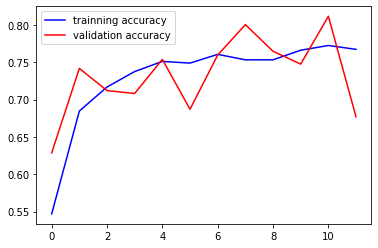

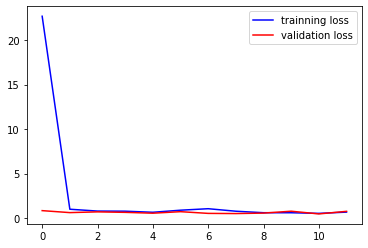

Epoch 1/13
163/163 [==============================] - 5s 24ms/step - loss: 15.7379 - accuracy: 0.5633 - val_loss: 1.6708 - val_accuracy: 0.5173
Epoch 2/13
163/163 [==============================] - 3s 16ms/step - loss: 1.2441 - accuracy: 0.6265 - val_loss: 0.7177 - val_accuracy: 0.6917
Epoch 3/13
163/163 [==============================] - 3s 16ms/step - loss: 1.1382 - accuracy: 0.6735 - val_loss: 0.7055 - val_accuracy: 0.6805
Epoch 4/13
163/163 [==============================] - 3s 16ms/step - loss: 0.7103 - accuracy: 0.7078 - val_loss: 0.6130 - val_accuracy: 0.7530
Epoch 5/13
163/163 [==============================] - 3s 16ms/step - loss: 1.1224 - accuracy: 0.7205 - val_loss: 0.6202 - val_accuracy: 0.7066
Epoch 6/13
163/163 [==============================] - 3s 21ms/step - loss: 0.6583 - accuracy: 0.7387 - val_loss: 0.5895 - val_accuracy: 0.7509
Epoch 7/13
163/163 [==============================] - 3s 16ms/step - loss: 0.7463 - accuracy: 0.7433 - val_loss: 0.6689 - val_accuracy: 0.720

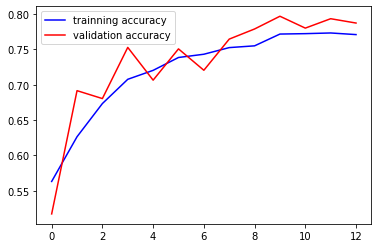

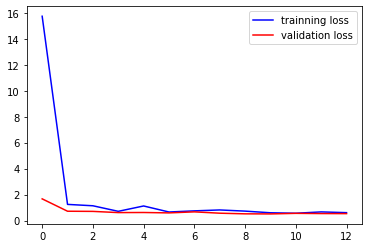

Epoch 1/14
163/163 [==============================] - 4s 21ms/step - loss: 7.2885 - accuracy: 0.5451 - val_loss: 0.8110 - val_accuracy: 0.6450
Epoch 2/14
163/163 [==============================] - 3s 17ms/step - loss: 1.0930 - accuracy: 0.6204 - val_loss: 0.8134 - val_accuracy: 0.6534
Epoch 3/14
163/163 [==============================] - 3s 16ms/step - loss: 1.1185 - accuracy: 0.6369 - val_loss: 0.6659 - val_accuracy: 0.7162
Epoch 4/14
163/163 [==============================] - 3s 16ms/step - loss: 0.7746 - accuracy: 0.6875 - val_loss: 0.6251 - val_accuracy: 0.7350
Epoch 5/14
163/163 [==============================] - 3s 15ms/step - loss: 0.7140 - accuracy: 0.7097 - val_loss: 0.5949 - val_accuracy: 0.7575
Epoch 6/14
163/163 [==============================] - 3s 17ms/step - loss: 0.7409 - accuracy: 0.7182 - val_loss: 0.7039 - val_accuracy: 0.6930
Epoch 7/14
163/163 [==============================] - 3s 17ms/step - loss: 0.7609 - accuracy: 0.7203 - val_loss: 0.7281 - val_accuracy: 0.6994

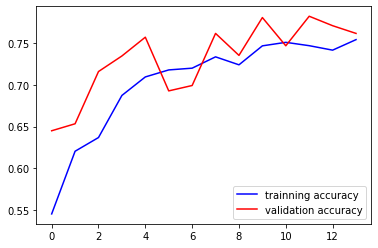

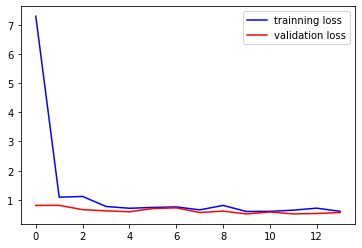

Epoch 1/15
163/163 [==============================] - 4s 19ms/step - loss: 22.0182 - accuracy: 0.5366 - val_loss: 0.8312 - val_accuracy: 0.6296
Epoch 2/15
163/163 [==============================] - 3s 18ms/step - loss: 1.1220 - accuracy: 0.6135 - val_loss: 0.7599 - val_accuracy: 0.6666
Epoch 3/15
163/163 [==============================] - 3s 17ms/step - loss: 1.2221 - accuracy: 0.6321 - val_loss: 0.7953 - val_accuracy: 0.6517
Epoch 4/15
163/163 [==============================] - 3s 16ms/step - loss: 0.7882 - accuracy: 0.6954 - val_loss: 0.6311 - val_accuracy: 0.7358
Epoch 5/15
163/163 [==============================] - 3s 15ms/step - loss: 0.7975 - accuracy: 0.7274 - val_loss: 0.6258 - val_accuracy: 0.7316
Epoch 6/15
163/163 [==============================] - 3s 16ms/step - loss: 0.6507 - accuracy: 0.7387 - val_loss: 0.5562 - val_accuracy: 0.7661
Epoch 7/15
163/163 [==============================] - 3s 20ms/step - loss: 0.5874 - accuracy: 0.7531 - val_loss: 0.6418 - val_accuracy: 0.708

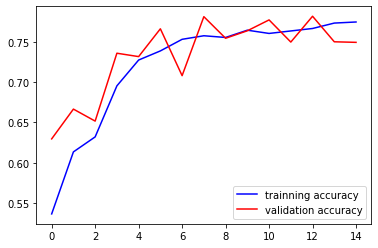

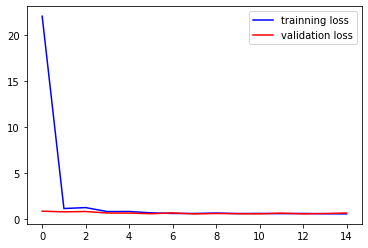

Epoch 1/16
163/163 [==============================] - 4s 21ms/step - loss: 20.5584 - accuracy: 0.5439 - val_loss: 0.8482 - val_accuracy: 0.6258
Epoch 2/16
163/163 [==============================] - 3s 16ms/step - loss: 1.1102 - accuracy: 0.6012 - val_loss: 0.7617 - val_accuracy: 0.6739
Epoch 3/16
163/163 [==============================] - 3s 15ms/step - loss: 0.9747 - accuracy: 0.6493 - val_loss: 0.7440 - val_accuracy: 0.6923
Epoch 4/16
163/163 [==============================] - 2s 15ms/step - loss: 0.9198 - accuracy: 0.6791 - val_loss: 0.7229 - val_accuracy: 0.6770
Epoch 5/16
163/163 [==============================] - 3s 17ms/step - loss: 0.7792 - accuracy: 0.7151 - val_loss: 0.8114 - val_accuracy: 0.6191
Epoch 6/16
163/163 [==============================] - 3s 21ms/step - loss: 0.6430 - accuracy: 0.7358 - val_loss: 0.5986 - val_accuracy: 0.7554
Epoch 7/16
163/163 [==============================] - 3s 16ms/step - loss: 0.6498 - accuracy: 0.7404 - val_loss: 0.5621 - val_accuracy: 0.766

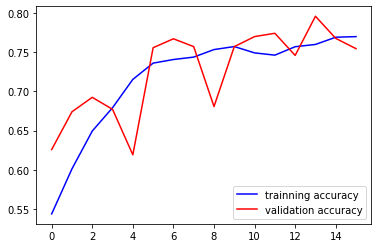

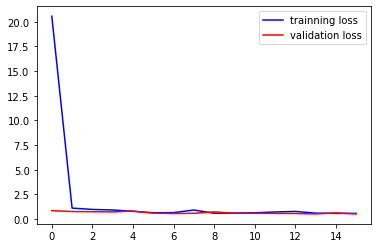

Epoch 1/17
163/163 [==============================] - 4s 19ms/step - loss: 20.4474 - accuracy: 0.5571 - val_loss: 0.7865 - val_accuracy: 0.6583
Epoch 2/17
163/163 [==============================] - 3s 16ms/step - loss: 1.1544 - accuracy: 0.6401 - val_loss: 0.7230 - val_accuracy: 0.6947
Epoch 3/17
163/163 [==============================] - 3s 20ms/step - loss: 0.9268 - accuracy: 0.6781 - val_loss: 0.6837 - val_accuracy: 0.6879
Epoch 4/17
163/163 [==============================] - 3s 18ms/step - loss: 0.6961 - accuracy: 0.7281 - val_loss: 0.6346 - val_accuracy: 0.7224
Epoch 5/17
163/163 [==============================] - 3s 16ms/step - loss: 0.7536 - accuracy: 0.7257 - val_loss: 0.5349 - val_accuracy: 0.7698
Epoch 6/17
163/163 [==============================] - 3s 16ms/step - loss: 0.6526 - accuracy: 0.7565 - val_loss: 0.5613 - val_accuracy: 0.7668
Epoch 7/17
163/163 [==============================] - 2s 15ms/step - loss: 0.5893 - accuracy: 0.7592 - val_loss: 0.5831 - val_accuracy: 0.765

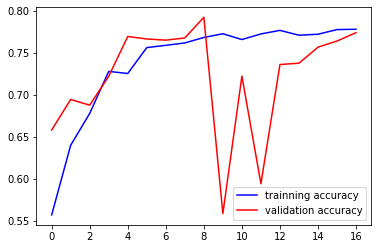

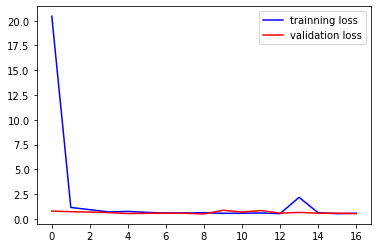

Epoch 1/18
163/163 [==============================] - 4s 20ms/step - loss: 16.6414 - accuracy: 0.5339 - val_loss: 0.9976 - val_accuracy: 0.5276
Epoch 2/18
163/163 [==============================] - 3s 16ms/step - loss: 1.1702 - accuracy: 0.6104 - val_loss: 0.8304 - val_accuracy: 0.6522
Epoch 3/18
163/163 [==============================] - 3s 16ms/step - loss: 1.0712 - accuracy: 0.6545 - val_loss: 0.7392 - val_accuracy: 0.6959
Epoch 4/18
163/163 [==============================] - 3s 16ms/step - loss: 0.8140 - accuracy: 0.6678 - val_loss: 0.7061 - val_accuracy: 0.7087
Epoch 5/18
163/163 [==============================] - 3s 16ms/step - loss: 0.8040 - accuracy: 0.6984 - val_loss: 0.6008 - val_accuracy: 0.7514
Epoch 6/18
163/163 [==============================] - 3s 16ms/step - loss: 0.8175 - accuracy: 0.7132 - val_loss: 0.5675 - val_accuracy: 0.7601
Epoch 7/18
163/163 [==============================] - 3s 18ms/step - loss: 0.8154 - accuracy: 0.7339 - val_loss: 0.5387 - val_accuracy: 0.785

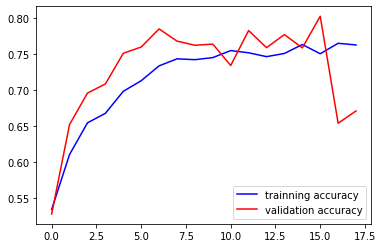

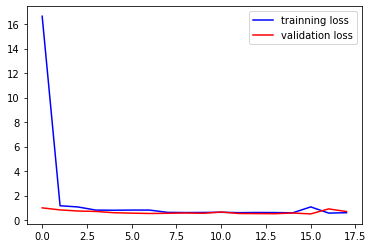

Epoch 1/19
163/163 [==============================] - 4s 22ms/step - loss: 8.1723 - accuracy: 0.5266 - val_loss: 0.9209 - val_accuracy: 0.6051
Epoch 2/19
163/163 [==============================] - 3s 16ms/step - loss: 1.8321 - accuracy: 0.6123 - val_loss: 0.7617 - val_accuracy: 0.6732
Epoch 3/19
163/163 [==============================] - 2s 15ms/step - loss: 0.9498 - accuracy: 0.6580 - val_loss: 1.7527 - val_accuracy: 0.4853
Epoch 4/19
163/163 [==============================] - 3s 16ms/step - loss: 0.8537 - accuracy: 0.7095 - val_loss: 0.7055 - val_accuracy: 0.6823
Epoch 5/19
163/163 [==============================] - 3s 16ms/step - loss: 0.7097 - accuracy: 0.7301 - val_loss: 0.5189 - val_accuracy: 0.7857
Epoch 6/19
163/163 [==============================] - 3s 16ms/step - loss: 0.6831 - accuracy: 0.7389 - val_loss: 0.5461 - val_accuracy: 0.7743
Epoch 7/19
163/163 [==============================] - 4s 22ms/step - loss: 0.5900 - accuracy: 0.7581 - val_loss: 0.5441 - val_accuracy: 0.7888

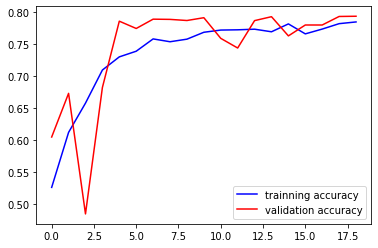

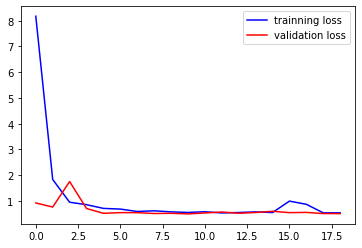

Epoch 1/10
163/163 [==============================] - 5s 24ms/step - loss: 1.0724 - accuracy: 0.6545 - val_loss: 0.5408 - val_accuracy: 0.7827
Epoch 2/10
163/163 [==============================] - 3s 16ms/step - loss: 0.5485 - accuracy: 0.7655 - val_loss: 0.5307 - val_accuracy: 0.7892
Epoch 3/10
163/163 [==============================] - 3s 16ms/step - loss: 0.5028 - accuracy: 0.7812 - val_loss: 0.5085 - val_accuracy: 0.7964
Epoch 4/10
163/163 [==============================] - 3s 15ms/step - loss: 0.4651 - accuracy: 0.7933 - val_loss: 0.4825 - val_accuracy: 0.8048
Epoch 5/10
163/163 [==============================] - 3s 16ms/step - loss: 0.4505 - accuracy: 0.8002 - val_loss: 0.4573 - val_accuracy: 0.8093
Epoch 6/10
163/163 [==============================] - 3s 20ms/step - loss: 0.4240 - accuracy: 0.8096 - val_loss: 0.5174 - val_accuracy: 0.8006
Epoch 7/10
163/163 [==============================] - 3s 17ms/step - loss: 0.4061 - accuracy: 0.8232 - val_loss: 0.5149 - val_accuracy: 0.8195

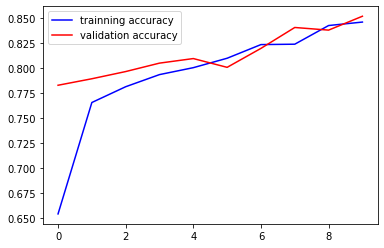

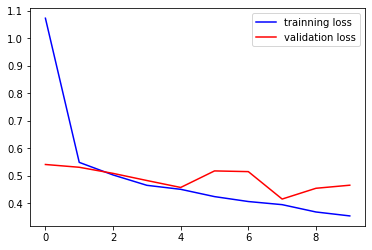

Epoch 1/11
163/163 [==============================] - 5s 24ms/step - loss: 0.9460 - accuracy: 0.6459 - val_loss: 0.5513 - val_accuracy: 0.7778
Epoch 2/11
163/163 [==============================] - 3s 16ms/step - loss: 0.5478 - accuracy: 0.7628 - val_loss: 0.5235 - val_accuracy: 0.7843
Epoch 3/11
163/163 [==============================] - 3s 16ms/step - loss: 0.4950 - accuracy: 0.7857 - val_loss: 0.5043 - val_accuracy: 0.7943
Epoch 4/11
163/163 [==============================] - 3s 15ms/step - loss: 0.4562 - accuracy: 0.7983 - val_loss: 0.5014 - val_accuracy: 0.7946
Epoch 5/11
163/163 [==============================] - 3s 20ms/step - loss: 0.4385 - accuracy: 0.8052 - val_loss: 0.4893 - val_accuracy: 0.8135
Epoch 6/11
163/163 [==============================] - 3s 17ms/step - loss: 0.4211 - accuracy: 0.8077 - val_loss: 0.4512 - val_accuracy: 0.8289
Epoch 7/11
163/163 [==============================] - 3s 15ms/step - loss: 0.4041 - accuracy: 0.8167 - val_loss: 0.4286 - val_accuracy: 0.8392

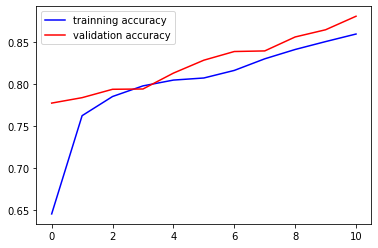

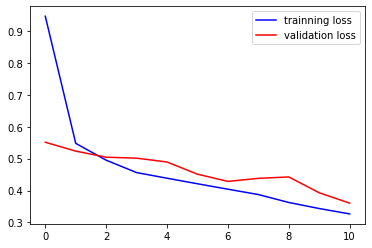

Epoch 1/12
163/163 [==============================] - 4s 19ms/step - loss: 0.8728 - accuracy: 0.6664 - val_loss: 0.6096 - val_accuracy: 0.7456
Epoch 2/12
163/163 [==============================] - 3s 16ms/step - loss: 0.5495 - accuracy: 0.7680 - val_loss: 0.5541 - val_accuracy: 0.7671
Epoch 3/12
163/163 [==============================] - 3s 16ms/step - loss: 0.5020 - accuracy: 0.7778 - val_loss: 0.4711 - val_accuracy: 0.8046
Epoch 4/12
163/163 [==============================] - 3s 17ms/step - loss: 0.4690 - accuracy: 0.7964 - val_loss: 0.4633 - val_accuracy: 0.8144
Epoch 5/12
163/163 [==============================] - 4s 23ms/step - loss: 0.4424 - accuracy: 0.8062 - val_loss: 0.4929 - val_accuracy: 0.7958
Epoch 6/12
163/163 [==============================] - 3s 16ms/step - loss: 0.4208 - accuracy: 0.8144 - val_loss: 0.4616 - val_accuracy: 0.8228
Epoch 7/12
163/163 [==============================] - 3s 16ms/step - loss: 0.3959 - accuracy: 0.8261 - val_loss: 0.4715 - val_accuracy: 0.8202

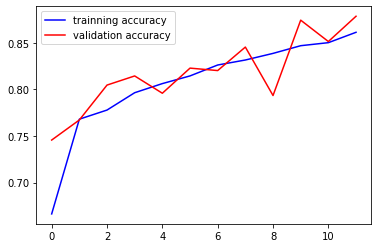

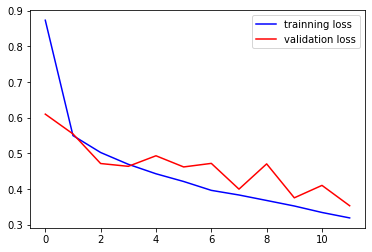

Epoch 1/13
163/163 [==============================] - 4s 19ms/step - loss: 0.8439 - accuracy: 0.6616 - val_loss: 0.5549 - val_accuracy: 0.7692
Epoch 2/13
163/163 [==============================] - 3s 16ms/step - loss: 0.5354 - accuracy: 0.7715 - val_loss: 0.5150 - val_accuracy: 0.7866
Epoch 3/13
163/163 [==============================] - 3s 17ms/step - loss: 0.4885 - accuracy: 0.7883 - val_loss: 0.4674 - val_accuracy: 0.8048
Epoch 4/13
163/163 [==============================] - 3s 17ms/step - loss: 0.4571 - accuracy: 0.8012 - val_loss: 0.4987 - val_accuracy: 0.7974
Epoch 5/13
163/163 [==============================] - 3s 16ms/step - loss: 0.4337 - accuracy: 0.8071 - val_loss: 0.4733 - val_accuracy: 0.8107
Epoch 6/13
163/163 [==============================] - 3s 16ms/step - loss: 0.4173 - accuracy: 0.8156 - val_loss: 0.4181 - val_accuracy: 0.8291
Epoch 7/13
163/163 [==============================] - 3s 16ms/step - loss: 0.3926 - accuracy: 0.8269 - val_loss: 0.4295 - val_accuracy: 0.8411

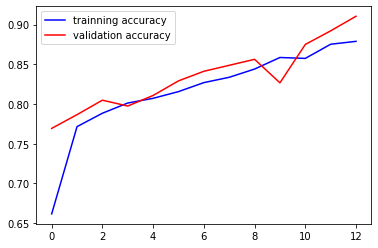

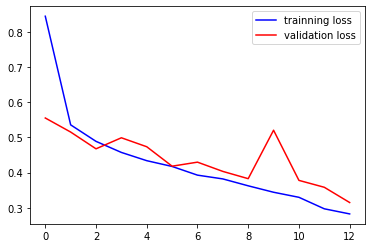

Epoch 1/14
163/163 [==============================] - 4s 19ms/step - loss: 0.9207 - accuracy: 0.6681 - val_loss: 0.5762 - val_accuracy: 0.7650
Epoch 2/14
163/163 [==============================] - 3s 15ms/step - loss: 0.5303 - accuracy: 0.7655 - val_loss: 0.4937 - val_accuracy: 0.7895
Epoch 3/14
163/163 [==============================] - 3s 18ms/step - loss: 0.4976 - accuracy: 0.7828 - val_loss: 0.4834 - val_accuracy: 0.8011
Epoch 4/14
163/163 [==============================] - 3s 20ms/step - loss: 0.4624 - accuracy: 0.7918 - val_loss: 0.5384 - val_accuracy: 0.7922
Epoch 5/14
163/163 [==============================] - 3s 15ms/step - loss: 0.4307 - accuracy: 0.8090 - val_loss: 0.5409 - val_accuracy: 0.7843
Epoch 6/14
163/163 [==============================] - 3s 16ms/step - loss: 0.4104 - accuracy: 0.8173 - val_loss: 0.4294 - val_accuracy: 0.8266
Epoch 7/14
163/163 [==============================] - 3s 16ms/step - loss: 0.3956 - accuracy: 0.8234 - val_loss: 0.4458 - val_accuracy: 0.8340

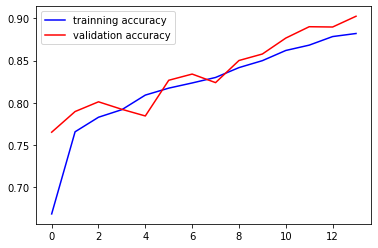

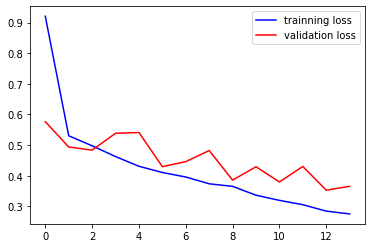

Epoch 1/15
163/163 [==============================] - 4s 19ms/step - loss: 0.9127 - accuracy: 0.6612 - val_loss: 0.5429 - val_accuracy: 0.7703
Epoch 2/15
163/163 [==============================] - 3s 16ms/step - loss: 0.5617 - accuracy: 0.7544 - val_loss: 0.5595 - val_accuracy: 0.7717
Epoch 3/15
163/163 [==============================] - 3s 19ms/step - loss: 0.5059 - accuracy: 0.7772 - val_loss: 0.5300 - val_accuracy: 0.7712
Epoch 4/15
163/163 [==============================] - 3s 17ms/step - loss: 0.4634 - accuracy: 0.7968 - val_loss: 0.4655 - val_accuracy: 0.8133
Epoch 5/15
163/163 [==============================] - 3s 15ms/step - loss: 0.4385 - accuracy: 0.8039 - val_loss: 0.4844 - val_accuracy: 0.8091
Epoch 6/15
163/163 [==============================] - 3s 16ms/step - loss: 0.4154 - accuracy: 0.8125 - val_loss: 0.4374 - val_accuracy: 0.8305
Epoch 7/15
163/163 [==============================] - 3s 16ms/step - loss: 0.4026 - accuracy: 0.8207 - val_loss: 0.4818 - val_accuracy: 0.7992

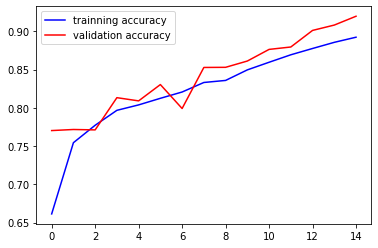

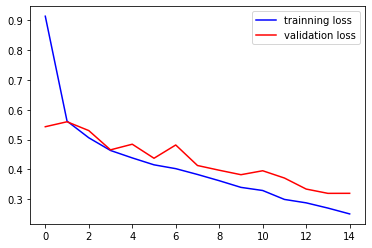

Epoch 1/16
163/163 [==============================] - 4s 19ms/step - loss: 0.9241 - accuracy: 0.6568 - val_loss: 0.5795 - val_accuracy: 0.7645
Epoch 2/16
163/163 [==============================] - 3s 16ms/step - loss: 0.5514 - accuracy: 0.7653 - val_loss: 0.5383 - val_accuracy: 0.7741
Epoch 3/16
163/163 [==============================] - 3s 19ms/step - loss: 0.5016 - accuracy: 0.7834 - val_loss: 0.4873 - val_accuracy: 0.8028
Epoch 4/16
163/163 [==============================] - 3s 21ms/step - loss: 0.4713 - accuracy: 0.7968 - val_loss: 0.4704 - val_accuracy: 0.8067
Epoch 5/16
163/163 [==============================] - 3s 15ms/step - loss: 0.4382 - accuracy: 0.8048 - val_loss: 0.5271 - val_accuracy: 0.8070
Epoch 6/16
163/163 [==============================] - 3s 16ms/step - loss: 0.4241 - accuracy: 0.8115 - val_loss: 0.4521 - val_accuracy: 0.8277
Epoch 7/16
163/163 [==============================] - 3s 16ms/step - loss: 0.4008 - accuracy: 0.8253 - val_loss: 0.4417 - val_accuracy: 0.8338

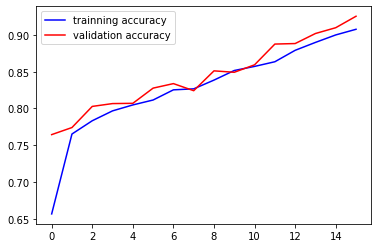

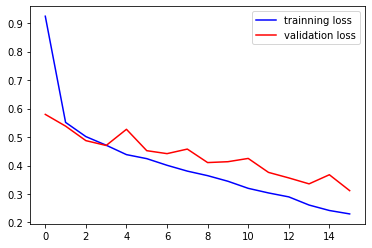

Epoch 1/17
163/163 [==============================] - 4s 20ms/step - loss: 1.0232 - accuracy: 0.6377 - val_loss: 0.8321 - val_accuracy: 0.6639
Epoch 2/17
163/163 [==============================] - 3s 18ms/step - loss: 0.5569 - accuracy: 0.7600 - val_loss: 0.5267 - val_accuracy: 0.7829
Epoch 3/17
163/163 [==============================] - 3s 18ms/step - loss: 0.4993 - accuracy: 0.7807 - val_loss: 0.4852 - val_accuracy: 0.8011
Epoch 4/17
163/163 [==============================] - 3s 16ms/step - loss: 0.4698 - accuracy: 0.7937 - val_loss: 0.5036 - val_accuracy: 0.7969
Epoch 5/17
163/163 [==============================] - 3s 16ms/step - loss: 0.4427 - accuracy: 0.8043 - val_loss: 0.4639 - val_accuracy: 0.8063
Epoch 6/17
163/163 [==============================] - 3s 15ms/step - loss: 0.4165 - accuracy: 0.8144 - val_loss: 0.4394 - val_accuracy: 0.8223
Epoch 7/17
163/163 [==============================] - 3s 16ms/step - loss: 0.3996 - accuracy: 0.8204 - val_loss: 0.4662 - val_accuracy: 0.8244

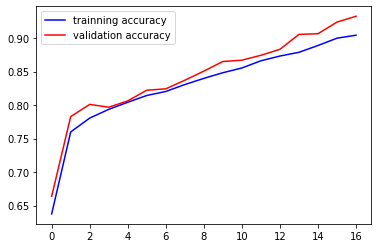

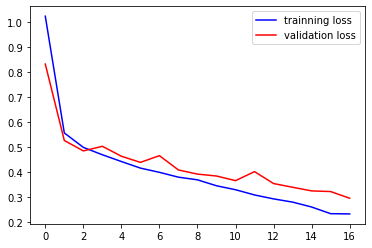

Epoch 1/18
163/163 [==============================] - 5s 24ms/step - loss: 0.9133 - accuracy: 0.6555 - val_loss: 0.6787 - val_accuracy: 0.7243
Epoch 2/18
163/163 [==============================] - 3s 17ms/step - loss: 0.5596 - accuracy: 0.7592 - val_loss: 0.7742 - val_accuracy: 0.6884
Epoch 3/18
163/163 [==============================] - 3s 16ms/step - loss: 0.5012 - accuracy: 0.7859 - val_loss: 0.4844 - val_accuracy: 0.8004
Epoch 4/18
163/163 [==============================] - 3s 16ms/step - loss: 0.4668 - accuracy: 0.7937 - val_loss: 0.4618 - val_accuracy: 0.8069
Epoch 5/18
163/163 [==============================] - 3s 15ms/step - loss: 0.4466 - accuracy: 0.8054 - val_loss: 0.4577 - val_accuracy: 0.8147
Epoch 6/18
163/163 [==============================] - 3s 18ms/step - loss: 0.4158 - accuracy: 0.8219 - val_loss: 0.4835 - val_accuracy: 0.8100
Epoch 7/18
163/163 [==============================] - 3s 19ms/step - loss: 0.4023 - accuracy: 0.8269 - val_loss: 0.4705 - val_accuracy: 0.8259

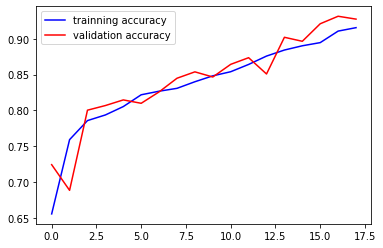

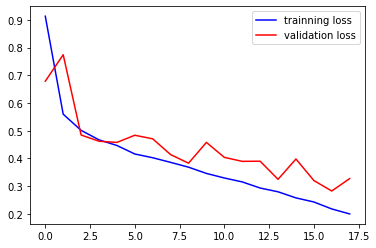

Epoch 1/19
163/163 [==============================] - 5s 27ms/step - loss: 0.9398 - accuracy: 0.6536 - val_loss: 0.5741 - val_accuracy: 0.7710
Epoch 2/19
163/163 [==============================] - 3s 16ms/step - loss: 0.5544 - accuracy: 0.7674 - val_loss: 1.3913 - val_accuracy: 0.5773
Epoch 3/19
163/163 [==============================] - 3s 16ms/step - loss: 0.4991 - accuracy: 0.7860 - val_loss: 0.5083 - val_accuracy: 0.7985
Epoch 4/19
163/163 [==============================] - 3s 16ms/step - loss: 0.4614 - accuracy: 0.7991 - val_loss: 0.4707 - val_accuracy: 0.8112
Epoch 5/19
163/163 [==============================] - 3s 20ms/step - loss: 0.4374 - accuracy: 0.8062 - val_loss: 0.4474 - val_accuracy: 0.8231
Epoch 6/19
163/163 [==============================] - 4s 22ms/step - loss: 0.4165 - accuracy: 0.8188 - val_loss: 0.4262 - val_accuracy: 0.8284
Epoch 7/19
163/163 [==============================] - 3s 16ms/step - loss: 0.3889 - accuracy: 0.8288 - val_loss: 0.3982 - val_accuracy: 0.8417

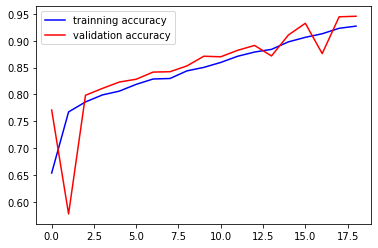

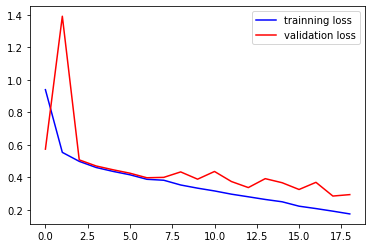

Epoch 1/10
163/163 [==============================] - 4s 19ms/step - loss: 0.8675 - accuracy: 0.5901 - val_loss: 0.8369 - val_accuracy: 0.5786
Epoch 2/10
163/163 [==============================] - 3s 16ms/step - loss: 0.6304 - accuracy: 0.7306 - val_loss: 0.6199 - val_accuracy: 0.7559
Epoch 3/10
163/163 [==============================] - 3s 16ms/step - loss: 0.5471 - accuracy: 0.7676 - val_loss: 0.6199 - val_accuracy: 0.7372
Epoch 4/10
163/163 [==============================] - 3s 16ms/step - loss: 0.5123 - accuracy: 0.7768 - val_loss: 0.5640 - val_accuracy: 0.7701
Epoch 5/10
163/163 [==============================] - 4s 22ms/step - loss: 0.4920 - accuracy: 0.7837 - val_loss: 0.5916 - val_accuracy: 0.7483
Epoch 6/10
163/163 [==============================] - 3s 16ms/step - loss: 0.4740 - accuracy: 0.7878 - val_loss: 0.5612 - val_accuracy: 0.7490
Epoch 7/10
163/163 [==============================] - 3s 16ms/step - loss: 0.4625 - accuracy: 0.7912 - val_loss: 0.5157 - val_accuracy: 0.7803

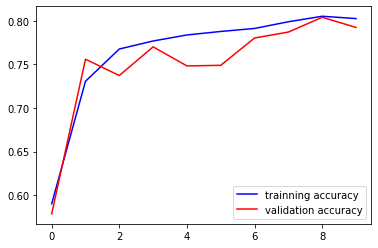

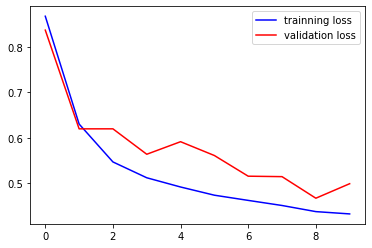

Epoch 1/11
163/163 [==============================] - 4s 19ms/step - loss: 0.8991 - accuracy: 0.5832 - val_loss: 0.7536 - val_accuracy: 0.7344
Epoch 2/11
163/163 [==============================] - 3s 16ms/step - loss: 0.6512 - accuracy: 0.7164 - val_loss: 0.7569 - val_accuracy: 0.6377
Epoch 3/11
163/163 [==============================] - 3s 16ms/step - loss: 0.5614 - accuracy: 0.7569 - val_loss: 0.6560 - val_accuracy: 0.7292
Epoch 4/11
163/163 [==============================] - 3s 16ms/step - loss: 0.5223 - accuracy: 0.7745 - val_loss: 0.5985 - val_accuracy: 0.7552
Epoch 5/11
163/163 [==============================] - 3s 19ms/step - loss: 0.4987 - accuracy: 0.7814 - val_loss: 0.5899 - val_accuracy: 0.7540
Epoch 6/11
163/163 [==============================] - 3s 21ms/step - loss: 0.4858 - accuracy: 0.7903 - val_loss: 0.5296 - val_accuracy: 0.7831
Epoch 7/11
163/163 [==============================] - 3s 16ms/step - loss: 0.4733 - accuracy: 0.7903 - val_loss: 0.5145 - val_accuracy: 0.7869

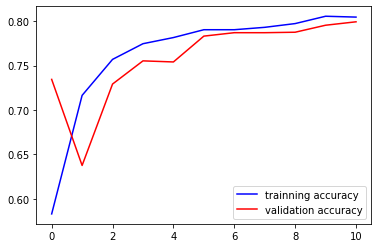

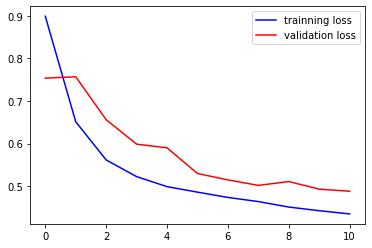

Epoch 1/12
163/163 [==============================] - 4s 19ms/step - loss: 0.8800 - accuracy: 0.6072 - val_loss: 0.8373 - val_accuracy: 0.5618
Epoch 2/12
163/163 [==============================] - 3s 16ms/step - loss: 0.6310 - accuracy: 0.7249 - val_loss: 0.7729 - val_accuracy: 0.6291
Epoch 3/12
163/163 [==============================] - 3s 16ms/step - loss: 0.5481 - accuracy: 0.7604 - val_loss: 0.6212 - val_accuracy: 0.7439
Epoch 4/12
163/163 [==============================] - 3s 18ms/step - loss: 0.5117 - accuracy: 0.7753 - val_loss: 0.5358 - val_accuracy: 0.7894
Epoch 5/12
163/163 [==============================] - 3s 17ms/step - loss: 0.4873 - accuracy: 0.7908 - val_loss: 0.5518 - val_accuracy: 0.7649
Epoch 6/12
163/163 [==============================] - 3s 16ms/step - loss: 0.4745 - accuracy: 0.7901 - val_loss: 0.5109 - val_accuracy: 0.7920
Epoch 7/12
163/163 [==============================] - 3s 16ms/step - loss: 0.4621 - accuracy: 0.7974 - val_loss: 0.5662 - val_accuracy: 0.7516

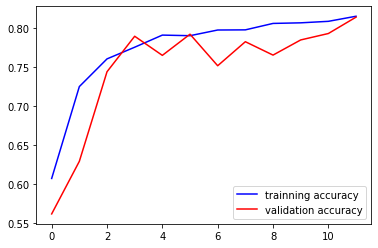

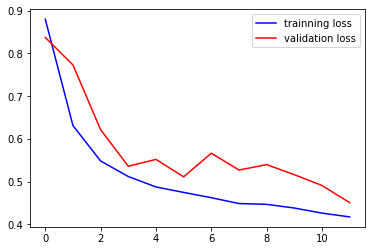

Epoch 1/13
163/163 [==============================] - 4s 23ms/step - loss: 0.8759 - accuracy: 0.5920 - val_loss: 0.8604 - val_accuracy: 0.6111
Epoch 2/13
163/163 [==============================] - 3s 17ms/step - loss: 0.6380 - accuracy: 0.7289 - val_loss: 0.6806 - val_accuracy: 0.7252
Epoch 3/13
163/163 [==============================] - 3s 16ms/step - loss: 0.5532 - accuracy: 0.7621 - val_loss: 0.7069 - val_accuracy: 0.6672
Epoch 4/13
163/163 [==============================] - 3s 21ms/step - loss: 0.5169 - accuracy: 0.7722 - val_loss: 0.6043 - val_accuracy: 0.7423
Epoch 5/13
163/163 [==============================] - 3s 16ms/step - loss: 0.4934 - accuracy: 0.7891 - val_loss: 0.5453 - val_accuracy: 0.7752
Epoch 6/13
163/163 [==============================] - 3s 19ms/step - loss: 0.4800 - accuracy: 0.7901 - val_loss: 0.5369 - val_accuracy: 0.7752
Epoch 7/13
163/163 [==============================] - 4s 24ms/step - loss: 0.4636 - accuracy: 0.7920 - val_loss: 0.5889 - val_accuracy: 0.7453

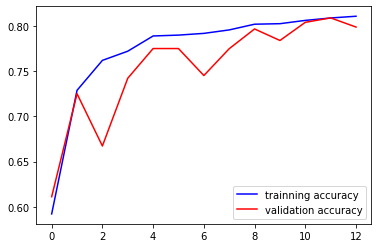

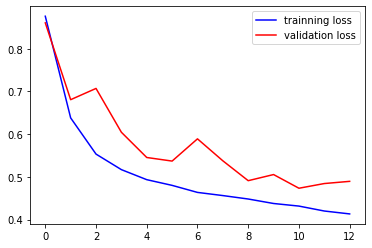

Epoch 1/14
163/163 [==============================] - 5s 24ms/step - loss: 0.8886 - accuracy: 0.5922 - val_loss: 0.8301 - val_accuracy: 0.6634
Epoch 2/14
163/163 [==============================] - 4s 22ms/step - loss: 0.6442 - accuracy: 0.7184 - val_loss: 0.7414 - val_accuracy: 0.6996
Epoch 3/14
163/163 [==============================] - 3s 16ms/step - loss: 0.5574 - accuracy: 0.7617 - val_loss: 0.6329 - val_accuracy: 0.7383
Epoch 4/14
163/163 [==============================] - 3s 15ms/step - loss: 0.5173 - accuracy: 0.7732 - val_loss: 0.6124 - val_accuracy: 0.7540
Epoch 5/14
163/163 [==============================] - 3s 16ms/step - loss: 0.4959 - accuracy: 0.7860 - val_loss: 0.6402 - val_accuracy: 0.7175
Epoch 6/14
163/163 [==============================] - 3s 20ms/step - loss: 0.4798 - accuracy: 0.7883 - val_loss: 0.5897 - val_accuracy: 0.7521
Epoch 7/14
163/163 [==============================] - 3s 21ms/step - loss: 0.4677 - accuracy: 0.7906 - val_loss: 0.5857 - val_accuracy: 0.7418

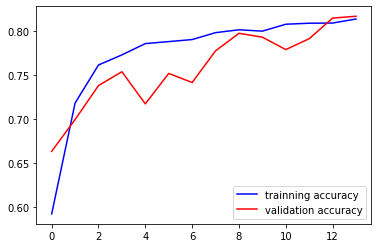

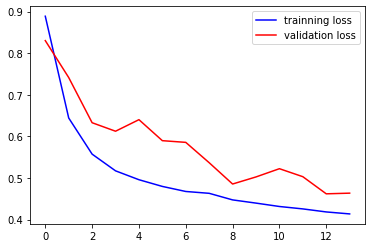

Epoch 1/15
163/163 [==============================] - 4s 20ms/step - loss: 0.8541 - accuracy: 0.6043 - val_loss: 0.7294 - val_accuracy: 0.7358
Epoch 2/15
163/163 [==============================] - 3s 16ms/step - loss: 0.6053 - accuracy: 0.7368 - val_loss: 0.8154 - val_accuracy: 0.6002
Epoch 3/15
163/163 [==============================] - 3s 16ms/step - loss: 0.5345 - accuracy: 0.7674 - val_loss: 0.5604 - val_accuracy: 0.7799
Epoch 4/15
163/163 [==============================] - 3s 16ms/step - loss: 0.4999 - accuracy: 0.7849 - val_loss: 0.5944 - val_accuracy: 0.7505
Epoch 5/15
163/163 [==============================] - 4s 22ms/step - loss: 0.4873 - accuracy: 0.7855 - val_loss: 0.5711 - val_accuracy: 0.7575
Epoch 6/15
163/163 [==============================] - 4s 22ms/step - loss: 0.4741 - accuracy: 0.7878 - val_loss: 0.5524 - val_accuracy: 0.7621
Epoch 7/15
163/163 [==============================] - 3s 16ms/step - loss: 0.4566 - accuracy: 0.8002 - val_loss: 0.5220 - val_accuracy: 0.7776

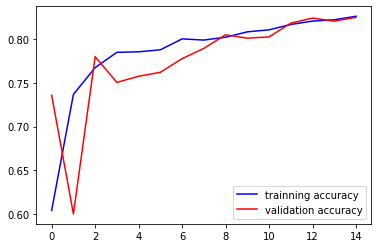

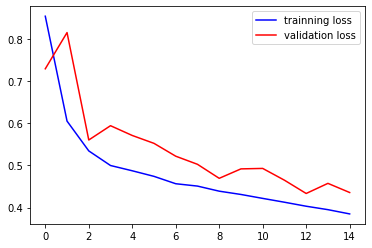

Epoch 1/16
163/163 [==============================] - 4s 20ms/step - loss: 0.8828 - accuracy: 0.6056 - val_loss: 0.7650 - val_accuracy: 0.7134
Epoch 2/16
163/163 [==============================] - 3s 17ms/step - loss: 0.6439 - accuracy: 0.7180 - val_loss: 0.7314 - val_accuracy: 0.6538
Epoch 3/16
163/163 [==============================] - 3s 16ms/step - loss: 0.5559 - accuracy: 0.7565 - val_loss: 0.7249 - val_accuracy: 0.6555
Epoch 4/16
163/163 [==============================] - 3s 20ms/step - loss: 0.5139 - accuracy: 0.7730 - val_loss: 0.5732 - val_accuracy: 0.7671
Epoch 5/16
163/163 [==============================] - 4s 23ms/step - loss: 0.4959 - accuracy: 0.7822 - val_loss: 0.6080 - val_accuracy: 0.7302
Epoch 6/16
163/163 [==============================] - 3s 16ms/step - loss: 0.4805 - accuracy: 0.7889 - val_loss: 0.5392 - val_accuracy: 0.7773
Epoch 7/16
163/163 [==============================] - 3s 17ms/step - loss: 0.4670 - accuracy: 0.7924 - val_loss: 0.5143 - val_accuracy: 0.7834

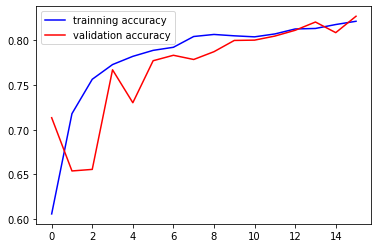

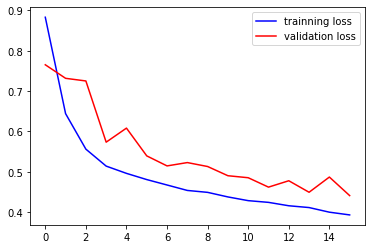

Epoch 1/17
163/163 [==============================] - 4s 20ms/step - loss: 0.8951 - accuracy: 0.5872 - val_loss: 0.7691 - val_accuracy: 0.7393
Epoch 2/17
163/163 [==============================] - 3s 21ms/step - loss: 0.6389 - accuracy: 0.7212 - val_loss: 0.7299 - val_accuracy: 0.6447
Epoch 3/17
163/163 [==============================] - 4s 22ms/step - loss: 0.5572 - accuracy: 0.7527 - val_loss: 0.6056 - val_accuracy: 0.7628
Epoch 4/17
163/163 [==============================] - 3s 16ms/step - loss: 0.5194 - accuracy: 0.7732 - val_loss: 0.6609 - val_accuracy: 0.7173
Epoch 5/17
163/163 [==============================] - 3s 16ms/step - loss: 0.5020 - accuracy: 0.7822 - val_loss: 0.5809 - val_accuracy: 0.7598
Epoch 6/17
163/163 [==============================] - 3s 17ms/step - loss: 0.4844 - accuracy: 0.7870 - val_loss: 0.5882 - val_accuracy: 0.7579
Epoch 7/17
163/163 [==============================] - 3s 21ms/step - loss: 0.4726 - accuracy: 0.7893 - val_loss: 0.5573 - val_accuracy: 0.7719

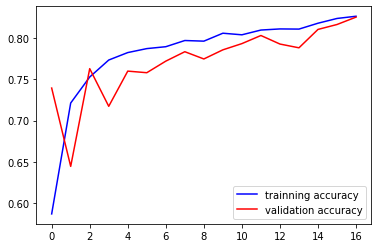

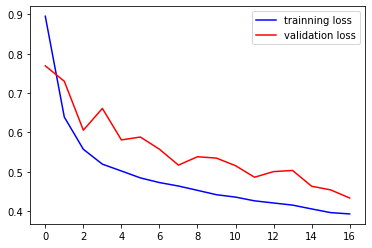

Epoch 1/18
163/163 [==============================] - 4s 19ms/step - loss: 0.9171 - accuracy: 0.5799 - val_loss: 0.7734 - val_accuracy: 0.7325
Epoch 2/18
163/163 [==============================] - 3s 17ms/step - loss: 0.6607 - accuracy: 0.7141 - val_loss: 0.7791 - val_accuracy: 0.6342
Epoch 3/18
163/163 [==============================] - 3s 16ms/step - loss: 0.5674 - accuracy: 0.7538 - val_loss: 0.6428 - val_accuracy: 0.7371
Epoch 4/18
163/163 [==============================] - 4s 22ms/step - loss: 0.5277 - accuracy: 0.7703 - val_loss: 0.5963 - val_accuracy: 0.7587
Epoch 5/18
163/163 [==============================] - 4s 22ms/step - loss: 0.5020 - accuracy: 0.7826 - val_loss: 0.6728 - val_accuracy: 0.6921
Epoch 6/18
163/163 [==============================] - 3s 15ms/step - loss: 0.4847 - accuracy: 0.7841 - val_loss: 0.6379 - val_accuracy: 0.7260
Epoch 7/18
163/163 [==============================] - 3s 16ms/step - loss: 0.4768 - accuracy: 0.7926 - val_loss: 0.5844 - val_accuracy: 0.7441

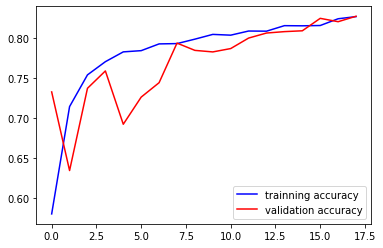

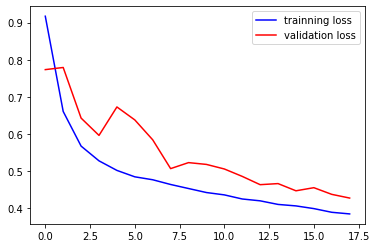

Epoch 1/19
163/163 [==============================] - 4s 23ms/step - loss: 0.8778 - accuracy: 0.5980 - val_loss: 0.8259 - val_accuracy: 0.6023
Epoch 2/19
163/163 [==============================] - 3s 19ms/step - loss: 0.6309 - accuracy: 0.7270 - val_loss: 0.6487 - val_accuracy: 0.7503
Epoch 3/19
163/163 [==============================] - 3s 16ms/step - loss: 0.5495 - accuracy: 0.7605 - val_loss: 0.6370 - val_accuracy: 0.7297
Epoch 4/19
163/163 [==============================] - 3s 16ms/step - loss: 0.5098 - accuracy: 0.7847 - val_loss: 0.5422 - val_accuracy: 0.7883
Epoch 5/19
163/163 [==============================] - 3s 16ms/step - loss: 0.4909 - accuracy: 0.7855 - val_loss: 0.5697 - val_accuracy: 0.7561
Epoch 6/19
163/163 [==============================] - 3s 21ms/step - loss: 0.4802 - accuracy: 0.7883 - val_loss: 0.5482 - val_accuracy: 0.7734
Epoch 7/19
163/163 [==============================] - 3s 21ms/step - loss: 0.4707 - accuracy: 0.7910 - val_loss: 0.5256 - val_accuracy: 0.7836

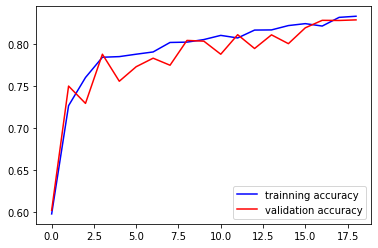

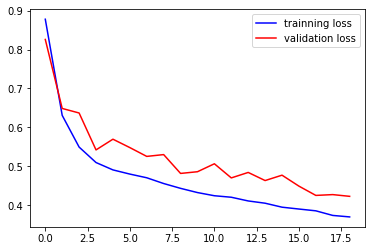

Epoch 1/10
163/163 [==============================] - 3s 17ms/step - loss: 1.0108 - accuracy: 0.5192 - val_loss: 0.8803 - val_accuracy: 0.6412
Epoch 2/10
163/163 [==============================] - 3s 16ms/step - loss: 0.8207 - accuracy: 0.6382 - val_loss: 0.7118 - val_accuracy: 0.6912
Epoch 3/10
163/163 [==============================] - 3s 16ms/step - loss: 0.7177 - accuracy: 0.6942 - val_loss: 0.7849 - val_accuracy: 0.6426
Epoch 4/10
163/163 [==============================] - 2s 14ms/step - loss: 0.7276 - accuracy: 0.6858 - val_loss: 0.8486 - val_accuracy: 0.5719
Epoch 5/10
163/163 [==============================] - 2s 13ms/step - loss: 0.7433 - accuracy: 0.6821 - val_loss: 0.7295 - val_accuracy: 0.6693
Epoch 6/10
163/163 [==============================] - 2s 13ms/step - loss: 0.7235 - accuracy: 0.6804 - val_loss: 0.6867 - val_accuracy: 0.6949
Epoch 7/10
163/163 [==============================] - 2s 13ms/step - loss: 0.7146 - accuracy: 0.6915 - val_loss: 0.8912 - val_accuracy: 0.5903

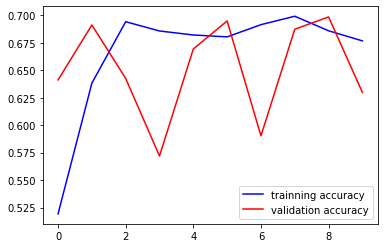

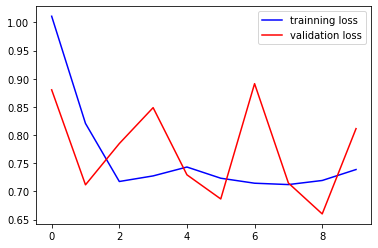

Epoch 1/11
163/163 [==============================] - 4s 21ms/step - loss: 1.0606 - accuracy: 0.4812 - val_loss: 1.0176 - val_accuracy: 0.4494
Epoch 2/11
163/163 [==============================] - 3s 19ms/step - loss: 1.0088 - accuracy: 0.5351 - val_loss: 0.8814 - val_accuracy: 0.6239
Epoch 3/11
163/163 [==============================] - 2s 13ms/step - loss: 1.4802 - accuracy: 0.5312 - val_loss: 1.0952 - val_accuracy: 0.4745
Epoch 4/11
163/163 [==============================] - 2s 13ms/step - loss: 0.9875 - accuracy: 0.5412 - val_loss: 0.9454 - val_accuracy: 0.5686
Epoch 5/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0069 - accuracy: 0.5247 - val_loss: 1.0849 - val_accuracy: 0.4645
Epoch 6/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0580 - accuracy: 0.4850 - val_loss: 1.0715 - val_accuracy: 0.4645
Epoch 7/11
163/163 [==============================] - 2s 15ms/step - loss: 1.0551 - accuracy: 0.4850 - val_loss: 1.0643 - val_accuracy: 0.4645

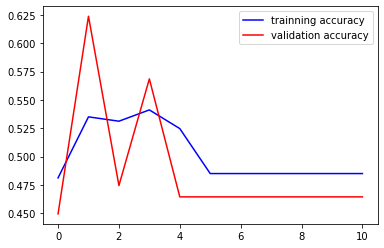

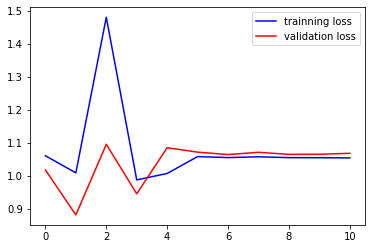

Epoch 1/12
163/163 [==============================] - 4s 21ms/step - loss: 1.0728 - accuracy: 0.4806 - val_loss: 1.0563 - val_accuracy: 0.4645
Epoch 2/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0456 - accuracy: 0.4958 - val_loss: 1.0003 - val_accuracy: 0.5098
Epoch 3/12
163/163 [==============================] - 2s 13ms/step - loss: 0.9445 - accuracy: 0.5752 - val_loss: 0.8704 - val_accuracy: 0.6034
Epoch 4/12
163/163 [==============================] - 2s 13ms/step - loss: 0.8626 - accuracy: 0.6137 - val_loss: 0.8012 - val_accuracy: 0.6405
Epoch 5/12
163/163 [==============================] - 2s 14ms/step - loss: 0.8071 - accuracy: 0.6432 - val_loss: 0.7697 - val_accuracy: 0.6232
Epoch 6/12
163/163 [==============================] - 3s 18ms/step - loss: 0.7824 - accuracy: 0.6605 - val_loss: 0.7123 - val_accuracy: 0.6884
Epoch 7/12
163/163 [==============================] - 3s 17ms/step - loss: 0.7894 - accuracy: 0.6557 - val_loss: 0.6877 - val_accuracy: 0.6797

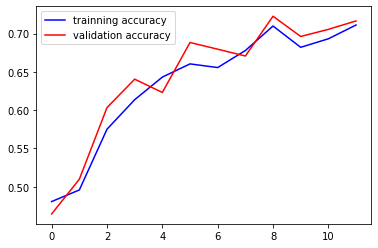

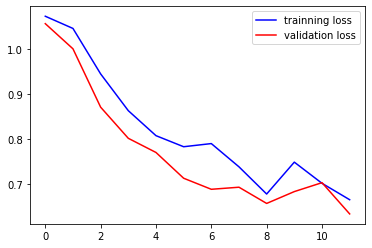

Epoch 1/13
163/163 [==============================] - 4s 17ms/step - loss: 1.0357 - accuracy: 0.5027 - val_loss: 0.9276 - val_accuracy: 0.5483
Epoch 2/13
163/163 [==============================] - 2s 13ms/step - loss: 0.8121 - accuracy: 0.6392 - val_loss: 0.8344 - val_accuracy: 0.6296
Epoch 3/13
163/163 [==============================] - 2s 13ms/step - loss: 0.8184 - accuracy: 0.6359 - val_loss: 0.7563 - val_accuracy: 0.6830
Epoch 4/13
163/163 [==============================] - 2s 13ms/step - loss: 0.7222 - accuracy: 0.6865 - val_loss: 0.8217 - val_accuracy: 0.5906
Epoch 5/13
163/163 [==============================] - 2s 15ms/step - loss: 0.7607 - accuracy: 0.6679 - val_loss: 0.8135 - val_accuracy: 0.6380
Epoch 6/13
163/163 [==============================] - 3s 17ms/step - loss: 0.7870 - accuracy: 0.6488 - val_loss: 0.7236 - val_accuracy: 0.6968
Epoch 7/13
163/163 [==============================] - 2s 15ms/step - loss: 0.7682 - accuracy: 0.6607 - val_loss: 0.8032 - val_accuracy: 0.6282

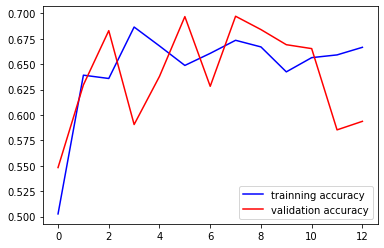

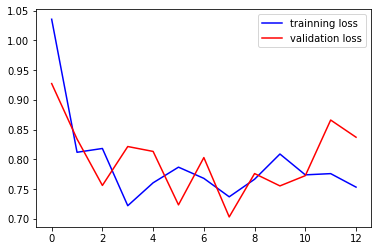

Epoch 1/14
163/163 [==============================] - 3s 17ms/step - loss: 0.9866 - accuracy: 0.5343 - val_loss: 0.8067 - val_accuracy: 0.6275
Epoch 2/14
163/163 [==============================] - 2s 13ms/step - loss: 0.7808 - accuracy: 0.6530 - val_loss: 0.7290 - val_accuracy: 0.6779
Epoch 3/14
163/163 [==============================] - 2s 14ms/step - loss: 0.7430 - accuracy: 0.6681 - val_loss: 0.6417 - val_accuracy: 0.7168
Epoch 4/14
163/163 [==============================] - 3s 18ms/step - loss: 0.7262 - accuracy: 0.6768 - val_loss: 0.7520 - val_accuracy: 0.6380
Epoch 5/14
163/163 [==============================] - 2s 15ms/step - loss: 0.7244 - accuracy: 0.6842 - val_loss: 0.6861 - val_accuracy: 0.7071
Epoch 6/14
163/163 [==============================] - 2s 13ms/step - loss: 0.7381 - accuracy: 0.6800 - val_loss: 0.6304 - val_accuracy: 0.7343
Epoch 7/14
163/163 [==============================] - 2s 13ms/step - loss: 0.7718 - accuracy: 0.6679 - val_loss: 0.8403 - val_accuracy: 0.5932

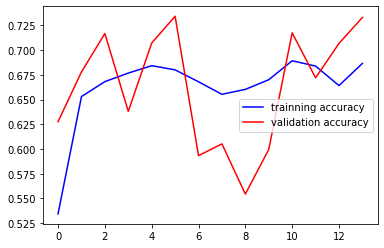

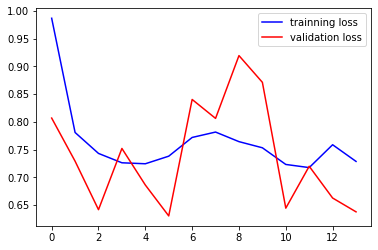

Epoch 1/15
163/163 [==============================] - 3s 18ms/step - loss: 1.0394 - accuracy: 0.4969 - val_loss: 0.8353 - val_accuracy: 0.6498
Epoch 2/15
163/163 [==============================] - 3s 20ms/step - loss: 0.8957 - accuracy: 0.5966 - val_loss: 0.8258 - val_accuracy: 0.6193
Epoch 3/15
163/163 [==============================] - 2s 13ms/step - loss: 0.7838 - accuracy: 0.6497 - val_loss: 0.6839 - val_accuracy: 0.7110
Epoch 4/15
163/163 [==============================] - 2s 13ms/step - loss: 0.8074 - accuracy: 0.6424 - val_loss: 0.7977 - val_accuracy: 0.6524
Epoch 5/15
163/163 [==============================] - 2s 13ms/step - loss: 0.7923 - accuracy: 0.6520 - val_loss: 0.8288 - val_accuracy: 0.6375
Epoch 6/15
163/163 [==============================] - 2s 14ms/step - loss: 0.7958 - accuracy: 0.6419 - val_loss: 0.7370 - val_accuracy: 0.6606
Epoch 7/15
163/163 [==============================] - 3s 17ms/step - loss: 0.7673 - accuracy: 0.6576 - val_loss: 0.7450 - val_accuracy: 0.6704

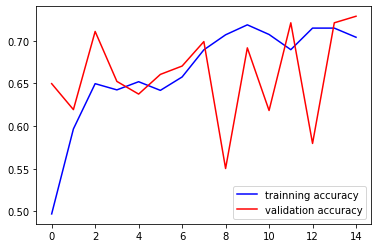

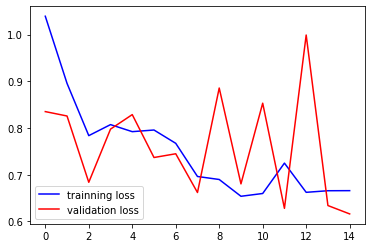

Epoch 1/16
163/163 [==============================] - 3s 16ms/step - loss: 1.0791 - accuracy: 0.4764 - val_loss: 1.0311 - val_accuracy: 0.4645
Epoch 2/16
163/163 [==============================] - 2s 13ms/step - loss: 0.9116 - accuracy: 0.5876 - val_loss: 0.9586 - val_accuracy: 0.5576
Epoch 3/16
163/163 [==============================] - 3s 16ms/step - loss: 0.9232 - accuracy: 0.5773 - val_loss: 0.8138 - val_accuracy: 0.6457
Epoch 4/16
163/163 [==============================] - 3s 20ms/step - loss: 0.8055 - accuracy: 0.6461 - val_loss: 0.8953 - val_accuracy: 0.6092
Epoch 5/16
163/163 [==============================] - 2s 13ms/step - loss: 0.7937 - accuracy: 0.6436 - val_loss: 0.7216 - val_accuracy: 0.6854
Epoch 6/16
163/163 [==============================] - 2s 13ms/step - loss: 0.7611 - accuracy: 0.6633 - val_loss: 0.8108 - val_accuracy: 0.6344
Epoch 7/16
163/163 [==============================] - 2s 13ms/step - loss: 0.6894 - accuracy: 0.7009 - val_loss: 0.7936 - val_accuracy: 0.6564

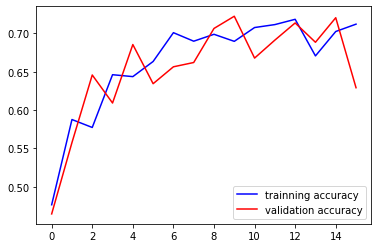

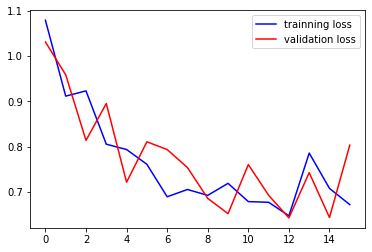

Epoch 1/17
163/163 [==============================] - 3s 17ms/step - loss: 0.9667 - accuracy: 0.5343 - val_loss: 0.7767 - val_accuracy: 0.6477
Epoch 2/17
163/163 [==============================] - 2s 13ms/step - loss: 0.7937 - accuracy: 0.6459 - val_loss: 0.7553 - val_accuracy: 0.6604
Epoch 3/17
163/163 [==============================] - 3s 18ms/step - loss: 0.7253 - accuracy: 0.6821 - val_loss: 0.6862 - val_accuracy: 0.6867
Epoch 4/17
163/163 [==============================] - 2s 15ms/step - loss: 0.6906 - accuracy: 0.6980 - val_loss: 0.6970 - val_accuracy: 0.6763
Epoch 5/17
163/163 [==============================] - 3s 18ms/step - loss: 0.7522 - accuracy: 0.6747 - val_loss: 0.7538 - val_accuracy: 0.6725
Epoch 6/17
163/163 [==============================] - 2s 13ms/step - loss: 0.6905 - accuracy: 0.6996 - val_loss: 0.6923 - val_accuracy: 0.6790
Epoch 7/17
163/163 [==============================] - 2s 13ms/step - loss: 0.7110 - accuracy: 0.7002 - val_loss: 0.7593 - val_accuracy: 0.6704

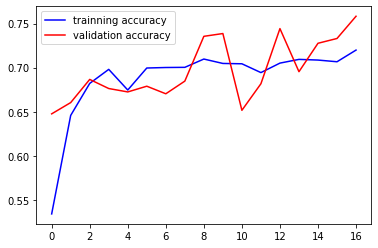

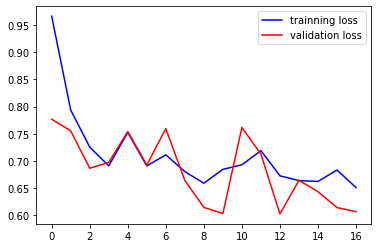

Epoch 1/18
163/163 [==============================] - 3s 17ms/step - loss: 1.0645 - accuracy: 0.4799 - val_loss: 1.0649 - val_accuracy: 0.4645
Epoch 2/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0127 - accuracy: 0.5220 - val_loss: 1.0687 - val_accuracy: 0.4645
Epoch 3/18
163/163 [==============================] - 3s 17ms/step - loss: 0.9314 - accuracy: 0.5675 - val_loss: 0.8429 - val_accuracy: 0.6188
Epoch 4/18
163/163 [==============================] - 3s 18ms/step - loss: 0.8438 - accuracy: 0.6206 - val_loss: 0.9012 - val_accuracy: 0.5423
Epoch 5/18
163/163 [==============================] - 2s 13ms/step - loss: 0.8201 - accuracy: 0.6332 - val_loss: 0.7760 - val_accuracy: 0.6587
Epoch 6/18
163/163 [==============================] - 2s 14ms/step - loss: 0.7893 - accuracy: 0.6503 - val_loss: 0.8291 - val_accuracy: 0.6363
Epoch 7/18
163/163 [==============================] - 2s 13ms/step - loss: 0.7511 - accuracy: 0.6681 - val_loss: 0.8015 - val_accuracy: 0.6422

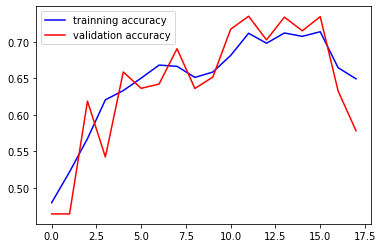

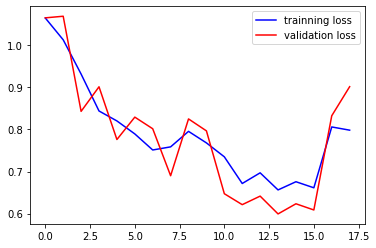

Epoch 1/19
163/163 [==============================] - 3s 17ms/step - loss: 1.0243 - accuracy: 0.5015 - val_loss: 0.8620 - val_accuracy: 0.6209
Epoch 2/19
163/163 [==============================] - 3s 16ms/step - loss: 0.8667 - accuracy: 0.6169 - val_loss: 0.8614 - val_accuracy: 0.6365
Epoch 3/19
163/163 [==============================] - 3s 16ms/step - loss: 0.8166 - accuracy: 0.6352 - val_loss: 0.8023 - val_accuracy: 0.6261
Epoch 4/19
163/163 [==============================] - 3s 19ms/step - loss: 0.7920 - accuracy: 0.6459 - val_loss: 0.7648 - val_accuracy: 0.6823
Epoch 5/19
163/163 [==============================] - 2s 13ms/step - loss: 0.7993 - accuracy: 0.6469 - val_loss: 0.7545 - val_accuracy: 0.6679
Epoch 6/19
163/163 [==============================] - 2s 13ms/step - loss: 0.7697 - accuracy: 0.6676 - val_loss: 0.7412 - val_accuracy: 0.6760
Epoch 7/19
163/163 [==============================] - 2s 13ms/step - loss: 0.7495 - accuracy: 0.6741 - val_loss: 0.7798 - val_accuracy: 0.6765

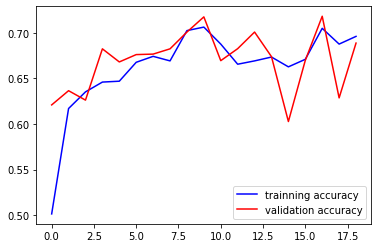

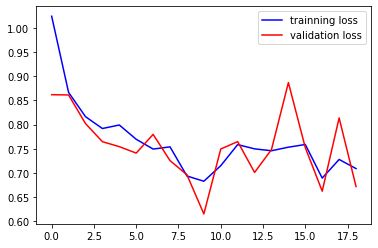

Epoch 1/10
163/163 [==============================] - 4s 24ms/step - loss: 0.8515 - accuracy: 0.6024 - val_loss: 0.6542 - val_accuracy: 0.7339
Epoch 2/10
163/163 [==============================] - 2s 14ms/step - loss: 0.5825 - accuracy: 0.7475 - val_loss: 0.5660 - val_accuracy: 0.7642
Epoch 3/10
163/163 [==============================] - 2s 14ms/step - loss: 0.5352 - accuracy: 0.7630 - val_loss: 0.5674 - val_accuracy: 0.7288
Epoch 4/10
163/163 [==============================] - 2s 13ms/step - loss: 0.5071 - accuracy: 0.7736 - val_loss: 0.5228 - val_accuracy: 0.7846
Epoch 5/10
163/163 [==============================] - 2s 13ms/step - loss: 0.4816 - accuracy: 0.7872 - val_loss: 0.5014 - val_accuracy: 0.7911
Epoch 6/10
163/163 [==============================] - 3s 17ms/step - loss: 0.4695 - accuracy: 0.7860 - val_loss: 0.5708 - val_accuracy: 0.7757
Epoch 7/10
163/163 [==============================] - 3s 16ms/step - loss: 0.4599 - accuracy: 0.7937 - val_loss: 0.4847 - val_accuracy: 0.7859

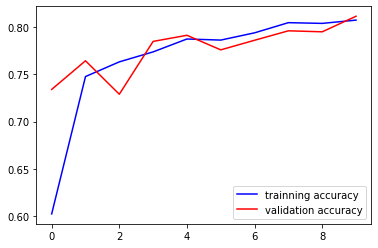

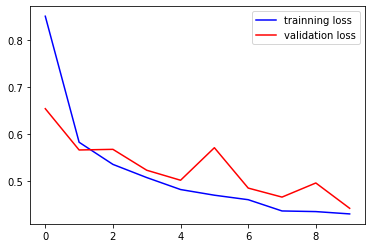

Epoch 1/11
163/163 [==============================] - 4s 19ms/step - loss: 0.8281 - accuracy: 0.6221 - val_loss: 0.5866 - val_accuracy: 0.7435
Epoch 2/11
163/163 [==============================] - 2s 14ms/step - loss: 0.5740 - accuracy: 0.7389 - val_loss: 0.5479 - val_accuracy: 0.7652
Epoch 3/11
163/163 [==============================] - 2s 13ms/step - loss: 0.5281 - accuracy: 0.7615 - val_loss: 0.5177 - val_accuracy: 0.7808
Epoch 4/11
163/163 [==============================] - 2s 13ms/step - loss: 0.4918 - accuracy: 0.7820 - val_loss: 0.5090 - val_accuracy: 0.7892
Epoch 5/11
163/163 [==============================] - 2s 13ms/step - loss: 0.4796 - accuracy: 0.7830 - val_loss: 0.5109 - val_accuracy: 0.7859
Epoch 6/11
163/163 [==============================] - 2s 15ms/step - loss: 0.4677 - accuracy: 0.7857 - val_loss: 0.5063 - val_accuracy: 0.7892
Epoch 7/11
163/163 [==============================] - 3s 20ms/step - loss: 0.4465 - accuracy: 0.7975 - val_loss: 0.4789 - val_accuracy: 0.7988

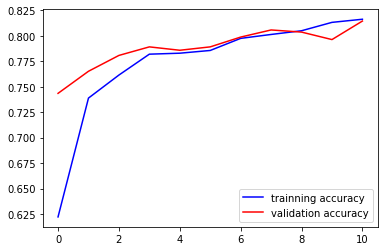

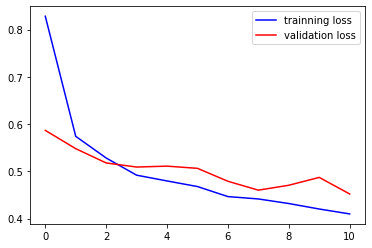

Epoch 1/12
163/163 [==============================] - 3s 17ms/step - loss: 0.7792 - accuracy: 0.6401 - val_loss: 0.6424 - val_accuracy: 0.6966
Epoch 2/12
163/163 [==============================] - 2s 13ms/step - loss: 0.5870 - accuracy: 0.7398 - val_loss: 0.6229 - val_accuracy: 0.7378
Epoch 3/12
163/163 [==============================] - 2s 13ms/step - loss: 0.5399 - accuracy: 0.7573 - val_loss: 0.5179 - val_accuracy: 0.7773
Epoch 4/12
163/163 [==============================] - 2s 15ms/step - loss: 0.5014 - accuracy: 0.7782 - val_loss: 0.5503 - val_accuracy: 0.7605
Epoch 5/12
163/163 [==============================] - 2s 14ms/step - loss: 0.4987 - accuracy: 0.7747 - val_loss: 0.5142 - val_accuracy: 0.7657
Epoch 6/12
163/163 [==============================] - 3s 16ms/step - loss: 0.4792 - accuracy: 0.7851 - val_loss: 0.4797 - val_accuracy: 0.7965
Epoch 7/12
163/163 [==============================] - 3s 17ms/step - loss: 0.4604 - accuracy: 0.7937 - val_loss: 0.4824 - val_accuracy: 0.7967

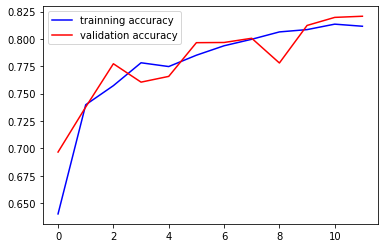

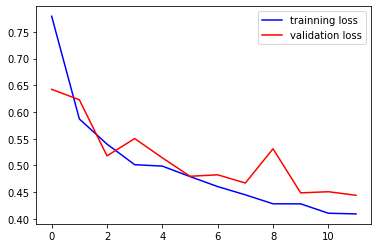

Epoch 1/13
163/163 [==============================] - 3s 17ms/step - loss: 0.8506 - accuracy: 0.6014 - val_loss: 0.6165 - val_accuracy: 0.7022
Epoch 2/13
163/163 [==============================] - 2s 13ms/step - loss: 0.5797 - accuracy: 0.7368 - val_loss: 0.5943 - val_accuracy: 0.7698
Epoch 3/13
163/163 [==============================] - 2s 13ms/step - loss: 0.5242 - accuracy: 0.7692 - val_loss: 0.5092 - val_accuracy: 0.7846
Epoch 4/13
163/163 [==============================] - 2s 14ms/step - loss: 0.4973 - accuracy: 0.7778 - val_loss: 0.5112 - val_accuracy: 0.7841
Epoch 5/13
163/163 [==============================] - 3s 17ms/step - loss: 0.4667 - accuracy: 0.7956 - val_loss: 0.5274 - val_accuracy: 0.7820
Epoch 6/13
163/163 [==============================] - 3s 19ms/step - loss: 0.4601 - accuracy: 0.7960 - val_loss: 0.4751 - val_accuracy: 0.7965
Epoch 7/13
163/163 [==============================] - 2s 13ms/step - loss: 0.4442 - accuracy: 0.7968 - val_loss: 0.4822 - val_accuracy: 0.8055

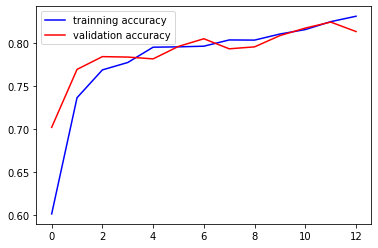

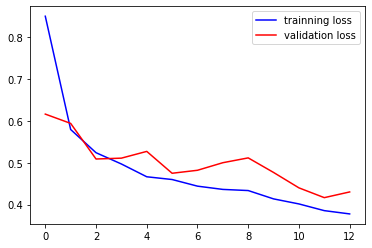

Epoch 1/14
163/163 [==============================] - 3s 17ms/step - loss: 0.8518 - accuracy: 0.6146 - val_loss: 0.5997 - val_accuracy: 0.7535
Epoch 2/14
163/163 [==============================] - 2s 13ms/step - loss: 0.5712 - accuracy: 0.7421 - val_loss: 0.5621 - val_accuracy: 0.7538
Epoch 3/14
163/163 [==============================] - 2s 13ms/step - loss: 0.5377 - accuracy: 0.7575 - val_loss: 0.5483 - val_accuracy: 0.7747
Epoch 4/14
163/163 [==============================] - 3s 17ms/step - loss: 0.4933 - accuracy: 0.7839 - val_loss: 0.5380 - val_accuracy: 0.7624
Epoch 5/14
163/163 [==============================] - 3s 20ms/step - loss: 0.4855 - accuracy: 0.7803 - val_loss: 0.4914 - val_accuracy: 0.7883
Epoch 6/14
163/163 [==============================] - 2s 14ms/step - loss: 0.4755 - accuracy: 0.7885 - val_loss: 0.5188 - val_accuracy: 0.7773
Epoch 7/14
163/163 [==============================] - 2s 13ms/step - loss: 0.4623 - accuracy: 0.7897 - val_loss: 0.4760 - val_accuracy: 0.8020

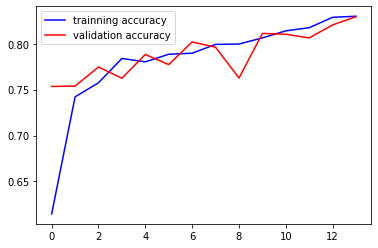

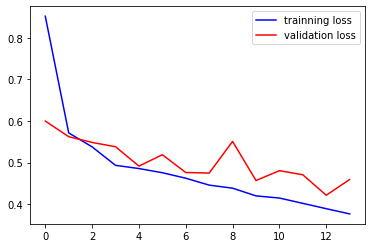

Epoch 1/15
163/163 [==============================] - 3s 17ms/step - loss: 0.7807 - accuracy: 0.6442 - val_loss: 0.6503 - val_accuracy: 0.7232
Epoch 2/15
163/163 [==============================] - 2s 13ms/step - loss: 0.6014 - accuracy: 0.7324 - val_loss: 0.5704 - val_accuracy: 0.7582
Epoch 3/15
163/163 [==============================] - 3s 17ms/step - loss: 0.5289 - accuracy: 0.7581 - val_loss: 0.5526 - val_accuracy: 0.7598
Epoch 4/15
163/163 [==============================] - 2s 15ms/step - loss: 0.5085 - accuracy: 0.7715 - val_loss: 0.5150 - val_accuracy: 0.7815
Epoch 5/15
163/163 [==============================] - 2s 15ms/step - loss: 0.4824 - accuracy: 0.7770 - val_loss: 0.5328 - val_accuracy: 0.7806
Epoch 6/15
163/163 [==============================] - 2s 14ms/step - loss: 0.4676 - accuracy: 0.7891 - val_loss: 0.4944 - val_accuracy: 0.7929
Epoch 7/15
163/163 [==============================] - 2s 13ms/step - loss: 0.4620 - accuracy: 0.7916 - val_loss: 0.4693 - val_accuracy: 0.7997

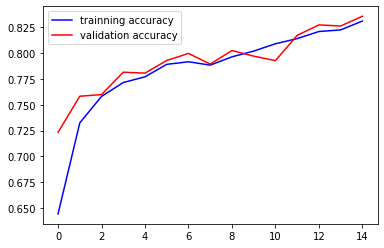

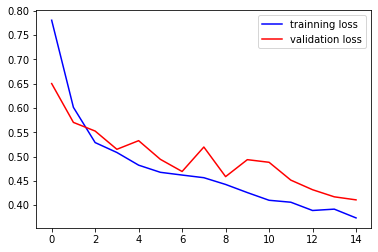

Epoch 1/16
163/163 [==============================] - 4s 23ms/step - loss: 0.8882 - accuracy: 0.5809 - val_loss: 0.6148 - val_accuracy: 0.7397
Epoch 2/16
163/163 [==============================] - 2s 13ms/step - loss: 0.5904 - accuracy: 0.7331 - val_loss: 0.5414 - val_accuracy: 0.7680
Epoch 3/16
163/163 [==============================] - 2s 13ms/step - loss: 0.5382 - accuracy: 0.7584 - val_loss: 0.5476 - val_accuracy: 0.7575
Epoch 4/16
163/163 [==============================] - 2s 13ms/step - loss: 0.5017 - accuracy: 0.7774 - val_loss: 0.6012 - val_accuracy: 0.7484
Epoch 5/16
163/163 [==============================] - 2s 13ms/step - loss: 0.4889 - accuracy: 0.7795 - val_loss: 0.5362 - val_accuracy: 0.7860
Epoch 6/16
163/163 [==============================] - 2s 15ms/step - loss: 0.4711 - accuracy: 0.7958 - val_loss: 0.4835 - val_accuracy: 0.7950
Epoch 7/16
163/163 [==============================] - 3s 20ms/step - loss: 0.4579 - accuracy: 0.7937 - val_loss: 0.4726 - val_accuracy: 0.7964

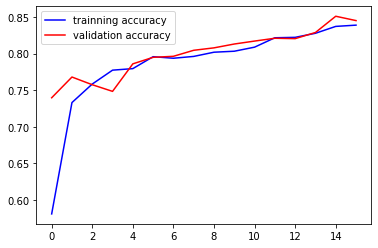

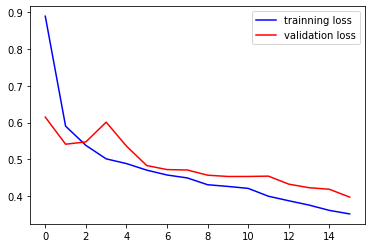

Epoch 1/17
163/163 [==============================] - 4s 20ms/step - loss: 0.7737 - accuracy: 0.6509 - val_loss: 0.5753 - val_accuracy: 0.7453
Epoch 2/17
163/163 [==============================] - 3s 17ms/step - loss: 0.5769 - accuracy: 0.7373 - val_loss: 0.5964 - val_accuracy: 0.7070
Epoch 3/17
163/163 [==============================] - 3s 17ms/step - loss: 0.5389 - accuracy: 0.7567 - val_loss: 0.5405 - val_accuracy: 0.7664
Epoch 4/17
163/163 [==============================] - 2s 13ms/step - loss: 0.5206 - accuracy: 0.7722 - val_loss: 0.5409 - val_accuracy: 0.7734
Epoch 5/17
163/163 [==============================] - 2s 13ms/step - loss: 0.5000 - accuracy: 0.7780 - val_loss: 0.5018 - val_accuracy: 0.7894
Epoch 6/17
163/163 [==============================] - 2s 13ms/step - loss: 0.4804 - accuracy: 0.7834 - val_loss: 0.5749 - val_accuracy: 0.7470
Epoch 7/17
163/163 [==============================] - 2s 15ms/step - loss: 0.4713 - accuracy: 0.7851 - val_loss: 0.4939 - val_accuracy: 0.7964

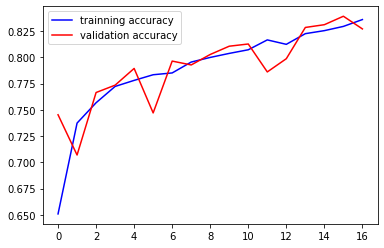

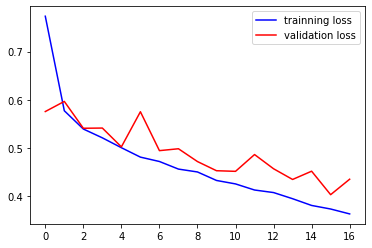

Epoch 1/18
163/163 [==============================] - 4s 19ms/step - loss: 0.8753 - accuracy: 0.5939 - val_loss: 0.6590 - val_accuracy: 0.7491
Epoch 2/18
163/163 [==============================] - 2s 13ms/step - loss: 0.5908 - accuracy: 0.7400 - val_loss: 0.6400 - val_accuracy: 0.7033
Epoch 3/18
163/163 [==============================] - 2s 13ms/step - loss: 0.5346 - accuracy: 0.7588 - val_loss: 0.5780 - val_accuracy: 0.7465
Epoch 4/18
163/163 [==============================] - 2s 13ms/step - loss: 0.4930 - accuracy: 0.7811 - val_loss: 0.5174 - val_accuracy: 0.7722
Epoch 5/18
163/163 [==============================] - 2s 13ms/step - loss: 0.4773 - accuracy: 0.7814 - val_loss: 0.4958 - val_accuracy: 0.7902
Epoch 6/18
163/163 [==============================] - 3s 18ms/step - loss: 0.4620 - accuracy: 0.7937 - val_loss: 0.4764 - val_accuracy: 0.7943
Epoch 7/18
163/163 [==============================] - 3s 16ms/step - loss: 0.4486 - accuracy: 0.7979 - val_loss: 0.5265 - val_accuracy: 0.7752

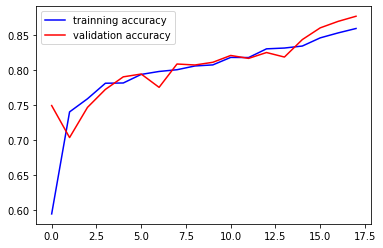

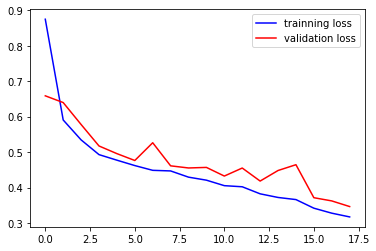

Epoch 1/19
163/163 [==============================] - 3s 17ms/step - loss: 0.9038 - accuracy: 0.5740 - val_loss: 0.6475 - val_accuracy: 0.7042
Epoch 2/19
163/163 [==============================] - 2s 13ms/step - loss: 0.5836 - accuracy: 0.7425 - val_loss: 0.5527 - val_accuracy: 0.7582
Epoch 3/19
163/163 [==============================] - 3s 17ms/step - loss: 0.5125 - accuracy: 0.7747 - val_loss: 0.5042 - val_accuracy: 0.7867
Epoch 4/19
163/163 [==============================] - 3s 20ms/step - loss: 0.4965 - accuracy: 0.7740 - val_loss: 0.5472 - val_accuracy: 0.7715
Epoch 5/19
163/163 [==============================] - 2s 13ms/step - loss: 0.4890 - accuracy: 0.7797 - val_loss: 0.4987 - val_accuracy: 0.7867
Epoch 6/19
163/163 [==============================] - 2s 13ms/step - loss: 0.4672 - accuracy: 0.7947 - val_loss: 0.4849 - val_accuracy: 0.7941
Epoch 7/19
163/163 [==============================] - 2s 13ms/step - loss: 0.4467 - accuracy: 0.7972 - val_loss: 0.4672 - val_accuracy: 0.8032

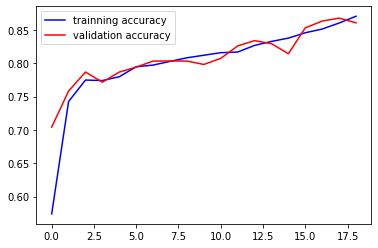

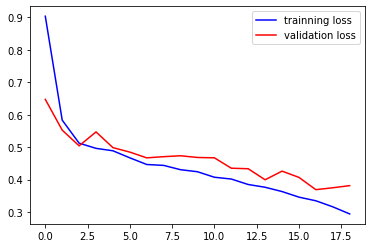

Epoch 1/10
163/163 [==============================] - 4s 23ms/step - loss: 0.9908 - accuracy: 0.5312 - val_loss: 0.8792 - val_accuracy: 0.7038
Epoch 2/10
163/163 [==============================] - 3s 19ms/step - loss: 0.7707 - accuracy: 0.6662 - val_loss: 0.7349 - val_accuracy: 0.6664
Epoch 3/10
163/163 [==============================] - 2s 13ms/step - loss: 0.6694 - accuracy: 0.7092 - val_loss: 0.6664 - val_accuracy: 0.7122
Epoch 4/10
163/163 [==============================] - 2s 13ms/step - loss: 0.6277 - accuracy: 0.7176 - val_loss: 0.6325 - val_accuracy: 0.7248
Epoch 5/10
163/163 [==============================] - 2s 13ms/step - loss: 0.6148 - accuracy: 0.7170 - val_loss: 0.6701 - val_accuracy: 0.7110
Epoch 6/10
163/163 [==============================] - 2s 13ms/step - loss: 0.5873 - accuracy: 0.7389 - val_loss: 0.5949 - val_accuracy: 0.7542
Epoch 7/10
163/163 [==============================] - 3s 19ms/step - loss: 0.5727 - accuracy: 0.7473 - val_loss: 0.6285 - val_accuracy: 0.7238

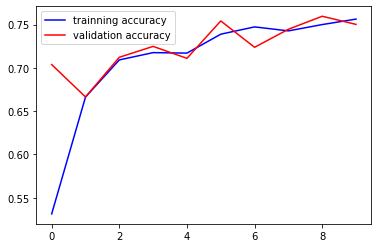

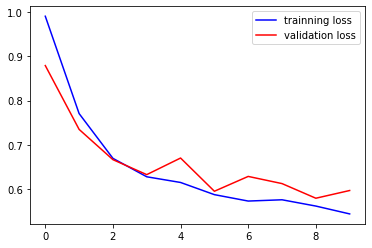

Epoch 1/11
163/163 [==============================] - 3s 18ms/step - loss: 0.9526 - accuracy: 0.5579 - val_loss: 0.8122 - val_accuracy: 0.6151
Epoch 2/11
163/163 [==============================] - 3s 18ms/step - loss: 0.7184 - accuracy: 0.6773 - val_loss: 0.6791 - val_accuracy: 0.7217
Epoch 3/11
163/163 [==============================] - 3s 18ms/step - loss: 0.6605 - accuracy: 0.7049 - val_loss: 0.6161 - val_accuracy: 0.7467
Epoch 4/11
163/163 [==============================] - 2s 13ms/step - loss: 0.6349 - accuracy: 0.7151 - val_loss: 0.6349 - val_accuracy: 0.7379
Epoch 5/11
163/163 [==============================] - 2s 13ms/step - loss: 0.5989 - accuracy: 0.7331 - val_loss: 0.6111 - val_accuracy: 0.7397
Epoch 6/11
163/163 [==============================] - 2s 13ms/step - loss: 0.5870 - accuracy: 0.7377 - val_loss: 0.5997 - val_accuracy: 0.7479
Epoch 7/11
163/163 [==============================] - 3s 17ms/step - loss: 0.5763 - accuracy: 0.7364 - val_loss: 0.5862 - val_accuracy: 0.7542

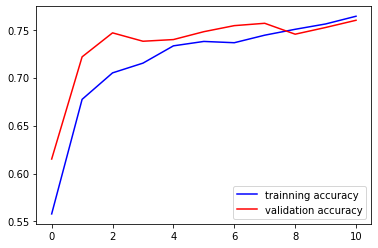

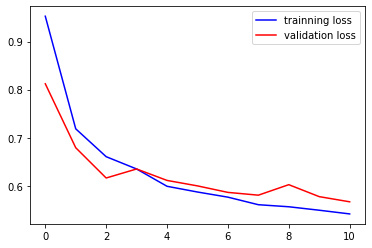

Epoch 1/12
163/163 [==============================] - 4s 20ms/step - loss: 0.9870 - accuracy: 0.5428 - val_loss: 0.9529 - val_accuracy: 0.4878
Epoch 2/12
163/163 [==============================] - 3s 19ms/step - loss: 0.7779 - accuracy: 0.6630 - val_loss: 0.7005 - val_accuracy: 0.7129
Epoch 3/12
163/163 [==============================] - 2s 13ms/step - loss: 0.6848 - accuracy: 0.6992 - val_loss: 0.6838 - val_accuracy: 0.7278
Epoch 4/12
163/163 [==============================] - 3s 17ms/step - loss: 0.6393 - accuracy: 0.7182 - val_loss: 0.6421 - val_accuracy: 0.6984
Epoch 5/12
163/163 [==============================] - 2s 13ms/step - loss: 0.6269 - accuracy: 0.7149 - val_loss: 0.6184 - val_accuracy: 0.7476
Epoch 6/12
163/163 [==============================] - 2s 13ms/step - loss: 0.5911 - accuracy: 0.7377 - val_loss: 0.5859 - val_accuracy: 0.7544
Epoch 7/12
163/163 [==============================] - 3s 15ms/step - loss: 0.5792 - accuracy: 0.7462 - val_loss: 0.5874 - val_accuracy: 0.7528

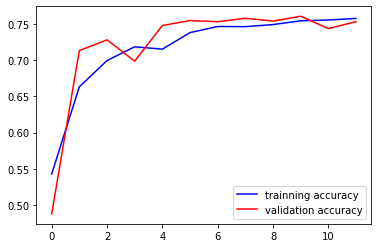

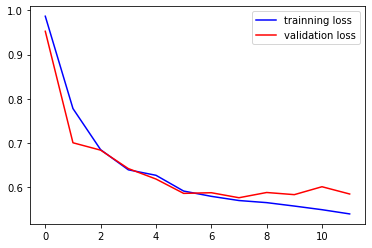

Epoch 1/13
163/163 [==============================] - 4s 23ms/step - loss: 0.9821 - accuracy: 0.5362 - val_loss: 0.8848 - val_accuracy: 0.6036
Epoch 2/13
163/163 [==============================] - 3s 19ms/step - loss: 0.7521 - accuracy: 0.6702 - val_loss: 0.7080 - val_accuracy: 0.6851
Epoch 3/13
163/163 [==============================] - 2s 13ms/step - loss: 0.6504 - accuracy: 0.7174 - val_loss: 0.7146 - val_accuracy: 0.6902
Epoch 4/13
163/163 [==============================] - 2s 13ms/step - loss: 0.6290 - accuracy: 0.7172 - val_loss: 0.6017 - val_accuracy: 0.7523
Epoch 5/13
163/163 [==============================] - 2s 13ms/step - loss: 0.5858 - accuracy: 0.7404 - val_loss: 0.6451 - val_accuracy: 0.6952
Epoch 6/13
163/163 [==============================] - 3s 17ms/step - loss: 0.5941 - accuracy: 0.7347 - val_loss: 0.5944 - val_accuracy: 0.7420
Epoch 7/13
163/163 [==============================] - 3s 15ms/step - loss: 0.5786 - accuracy: 0.7421 - val_loss: 0.6254 - val_accuracy: 0.7259

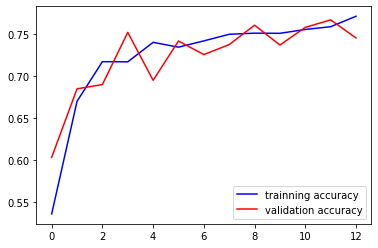

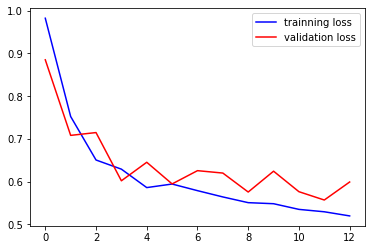

Epoch 1/14
163/163 [==============================] - 4s 23ms/step - loss: 0.9720 - accuracy: 0.5405 - val_loss: 0.8604 - val_accuracy: 0.6170
Epoch 2/14
163/163 [==============================] - 3s 15ms/step - loss: 0.7492 - accuracy: 0.6718 - val_loss: 0.7135 - val_accuracy: 0.6707
Epoch 3/14
163/163 [==============================] - 2s 14ms/step - loss: 0.6505 - accuracy: 0.7067 - val_loss: 0.6180 - val_accuracy: 0.7367
Epoch 4/14
163/163 [==============================] - 2s 13ms/step - loss: 0.6337 - accuracy: 0.7130 - val_loss: 0.6205 - val_accuracy: 0.7350
Epoch 5/14
163/163 [==============================] - 2s 13ms/step - loss: 0.6131 - accuracy: 0.7220 - val_loss: 0.6136 - val_accuracy: 0.7537
Epoch 6/14
163/163 [==============================] - 2s 13ms/step - loss: 0.5861 - accuracy: 0.7349 - val_loss: 0.5836 - val_accuracy: 0.7451
Epoch 7/14
163/163 [==============================] - 3s 19ms/step - loss: 0.5877 - accuracy: 0.7423 - val_loss: 0.5933 - val_accuracy: 0.7500

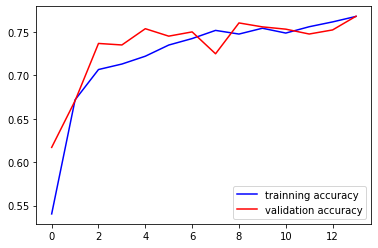

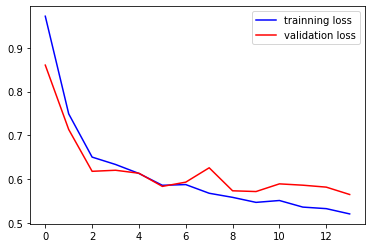

Epoch 1/15
163/163 [==============================] - 3s 16ms/step - loss: 0.9499 - accuracy: 0.5558 - val_loss: 0.8221 - val_accuracy: 0.7063
Epoch 2/15
163/163 [==============================] - 2s 13ms/step - loss: 0.7264 - accuracy: 0.6842 - val_loss: 0.6580 - val_accuracy: 0.7260
Epoch 3/15
163/163 [==============================] - 2s 13ms/step - loss: 0.6575 - accuracy: 0.7019 - val_loss: 0.6187 - val_accuracy: 0.7458
Epoch 4/15
163/163 [==============================] - 2s 14ms/step - loss: 0.6369 - accuracy: 0.7128 - val_loss: 0.6514 - val_accuracy: 0.7201
Epoch 5/15
163/163 [==============================] - 3s 19ms/step - loss: 0.5952 - accuracy: 0.7385 - val_loss: 0.6161 - val_accuracy: 0.7420
Epoch 6/15
163/163 [==============================] - 3s 15ms/step - loss: 0.5863 - accuracy: 0.7396 - val_loss: 0.6290 - val_accuracy: 0.7225
Epoch 7/15
163/163 [==============================] - 3s 17ms/step - loss: 0.5700 - accuracy: 0.7398 - val_loss: 0.6068 - val_accuracy: 0.7435

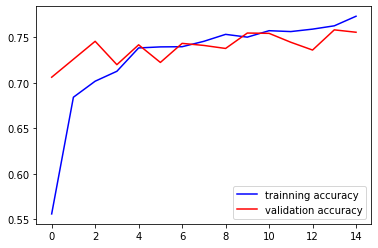

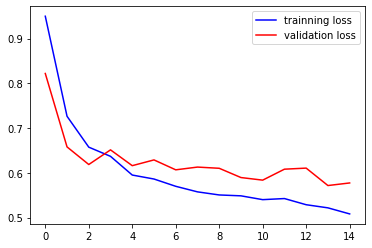

Epoch 1/16
163/163 [==============================] - 3s 17ms/step - loss: 0.9944 - accuracy: 0.5230 - val_loss: 0.9189 - val_accuracy: 0.7131
Epoch 2/16
163/163 [==============================] - 2s 14ms/step - loss: 0.7775 - accuracy: 0.6699 - val_loss: 0.7304 - val_accuracy: 0.6763
Epoch 3/16
163/163 [==============================] - 2s 14ms/step - loss: 0.6550 - accuracy: 0.7101 - val_loss: 0.6749 - val_accuracy: 0.7159
Epoch 4/16
163/163 [==============================] - 2s 15ms/step - loss: 0.6228 - accuracy: 0.7260 - val_loss: 0.6267 - val_accuracy: 0.7140
Epoch 5/16
163/163 [==============================] - 3s 17ms/step - loss: 0.6150 - accuracy: 0.7239 - val_loss: 0.6012 - val_accuracy: 0.7526
Epoch 6/16
163/163 [==============================] - 2s 14ms/step - loss: 0.5968 - accuracy: 0.7356 - val_loss: 0.6695 - val_accuracy: 0.7199
Epoch 7/16
163/163 [==============================] - 3s 17ms/step - loss: 0.5775 - accuracy: 0.7446 - val_loss: 0.5763 - val_accuracy: 0.7582

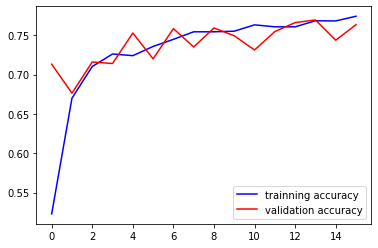

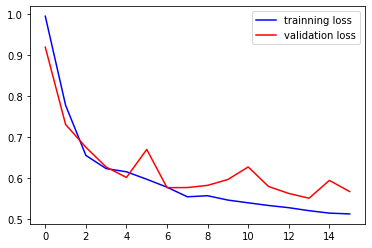

Epoch 1/17
163/163 [==============================] - 3s 17ms/step - loss: 0.9704 - accuracy: 0.5441 - val_loss: 0.8528 - val_accuracy: 0.6487
Epoch 2/17
163/163 [==============================] - 2s 13ms/step - loss: 0.7554 - accuracy: 0.6718 - val_loss: 0.7369 - val_accuracy: 0.6618
Epoch 3/17
163/163 [==============================] - 2s 13ms/step - loss: 0.6554 - accuracy: 0.7122 - val_loss: 0.7016 - val_accuracy: 0.6496
Epoch 4/17
163/163 [==============================] - 2s 14ms/step - loss: 0.6279 - accuracy: 0.7201 - val_loss: 0.6283 - val_accuracy: 0.7404
Epoch 5/17
163/163 [==============================] - 2s 15ms/step - loss: 0.6253 - accuracy: 0.7101 - val_loss: 0.6164 - val_accuracy: 0.7439
Epoch 6/17
163/163 [==============================] - 3s 17ms/step - loss: 0.5798 - accuracy: 0.7410 - val_loss: 0.6216 - val_accuracy: 0.7386
Epoch 7/17
163/163 [==============================] - 2s 14ms/step - loss: 0.5747 - accuracy: 0.7423 - val_loss: 0.5761 - val_accuracy: 0.7586

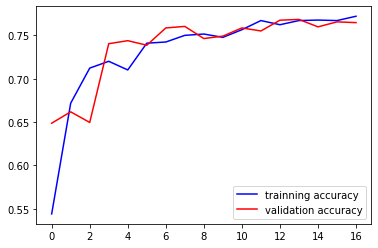

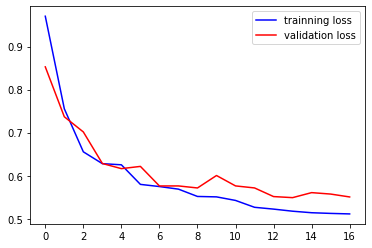

Epoch 1/18
163/163 [==============================] - 3s 17ms/step - loss: 0.9801 - accuracy: 0.5368 - val_loss: 0.8535 - val_accuracy: 0.6155
Epoch 2/18
163/163 [==============================] - 2s 13ms/step - loss: 0.7628 - accuracy: 0.6720 - val_loss: 0.6815 - val_accuracy: 0.7208
Epoch 3/18
163/163 [==============================] - 2s 13ms/step - loss: 0.6657 - accuracy: 0.7028 - val_loss: 0.7401 - val_accuracy: 0.6961
Epoch 4/18
163/163 [==============================] - 2s 13ms/step - loss: 0.6299 - accuracy: 0.7207 - val_loss: 0.6464 - val_accuracy: 0.7033
Epoch 5/18
163/163 [==============================] - 3s 18ms/step - loss: 0.6134 - accuracy: 0.7293 - val_loss: 0.6048 - val_accuracy: 0.7523
Epoch 6/18
163/163 [==============================] - 3s 16ms/step - loss: 0.5860 - accuracy: 0.7391 - val_loss: 0.6117 - val_accuracy: 0.7399
Epoch 7/18
163/163 [==============================] - 2s 14ms/step - loss: 0.5695 - accuracy: 0.7496 - val_loss: 0.5782 - val_accuracy: 0.7549

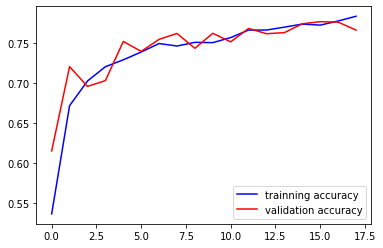

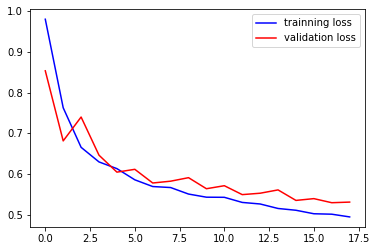

Epoch 1/19
163/163 [==============================] - 3s 17ms/step - loss: 1.0200 - accuracy: 0.4962 - val_loss: 0.9639 - val_accuracy: 0.7140
Epoch 2/19
163/163 [==============================] - 2s 13ms/step - loss: 0.7967 - accuracy: 0.6543 - val_loss: 0.7277 - val_accuracy: 0.6895
Epoch 3/19
163/163 [==============================] - 2s 13ms/step - loss: 0.6917 - accuracy: 0.7003 - val_loss: 0.6431 - val_accuracy: 0.7497
Epoch 4/19
163/163 [==============================] - 3s 17ms/step - loss: 0.6362 - accuracy: 0.7126 - val_loss: 0.6279 - val_accuracy: 0.7124
Epoch 5/19
163/163 [==============================] - 3s 19ms/step - loss: 0.6107 - accuracy: 0.7249 - val_loss: 0.6149 - val_accuracy: 0.7517
Epoch 6/19
163/163 [==============================] - 3s 18ms/step - loss: 0.5906 - accuracy: 0.7373 - val_loss: 0.5924 - val_accuracy: 0.7554
Epoch 7/19
163/163 [==============================] - 2s 13ms/step - loss: 0.5697 - accuracy: 0.7492 - val_loss: 0.5855 - val_accuracy: 0.7554

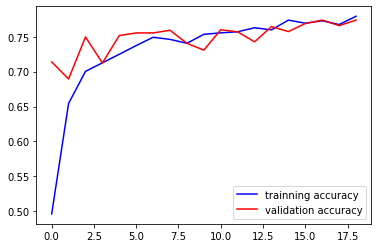

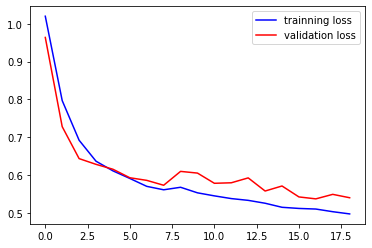

Epoch 1/10
163/163 [==============================] - 3s 17ms/step - loss: 1.0576 - accuracy: 0.4837 - val_loss: 1.0585 - val_accuracy: 0.4645
Epoch 2/10
163/163 [==============================] - 3s 19ms/step - loss: 1.0370 - accuracy: 0.4850 - val_loss: 1.0438 - val_accuracy: 0.4645
Epoch 3/10
163/163 [==============================] - 3s 19ms/step - loss: 1.0145 - accuracy: 0.4906 - val_loss: 1.0229 - val_accuracy: 0.4645
Epoch 4/10
163/163 [==============================] - 2s 13ms/step - loss: 0.9923 - accuracy: 0.5006 - val_loss: 0.9994 - val_accuracy: 0.5080
Epoch 5/10
163/163 [==============================] - 2s 13ms/step - loss: 0.9603 - accuracy: 0.5504 - val_loss: 0.9683 - val_accuracy: 0.6256
Epoch 6/10
163/163 [==============================] - 2s 13ms/step - loss: 0.9190 - accuracy: 0.6014 - val_loss: 0.9245 - val_accuracy: 0.6391
Epoch 7/10
163/163 [==============================] - 2s 13ms/step - loss: 0.8738 - accuracy: 0.6355 - val_loss: 0.8810 - val_accuracy: 0.6819

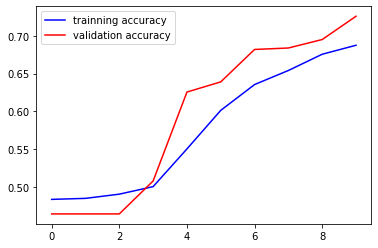

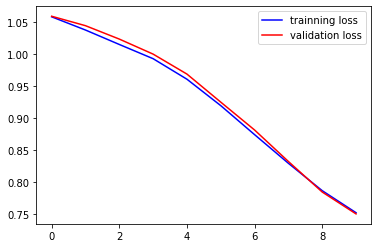

Epoch 1/11
163/163 [==============================] - 3s 17ms/step - loss: 1.0490 - accuracy: 0.4854 - val_loss: 1.0475 - val_accuracy: 0.4645
Epoch 2/11
163/163 [==============================] - 2s 13ms/step - loss: 1.0220 - accuracy: 0.4885 - val_loss: 1.0244 - val_accuracy: 0.4731
Epoch 3/11
163/163 [==============================] - 2s 15ms/step - loss: 0.9926 - accuracy: 0.5084 - val_loss: 0.9973 - val_accuracy: 0.4932
Epoch 4/11
163/163 [==============================] - 2s 15ms/step - loss: 0.9586 - accuracy: 0.5504 - val_loss: 0.9629 - val_accuracy: 0.5416
Epoch 5/11
163/163 [==============================] - 3s 18ms/step - loss: 0.9225 - accuracy: 0.5901 - val_loss: 0.9223 - val_accuracy: 0.5976
Epoch 6/11
163/163 [==============================] - 2s 14ms/step - loss: 0.8720 - accuracy: 0.6451 - val_loss: 0.8752 - val_accuracy: 0.6592
Epoch 7/11
163/163 [==============================] - 2s 14ms/step - loss: 0.8212 - accuracy: 0.6718 - val_loss: 0.8259 - val_accuracy: 0.6849

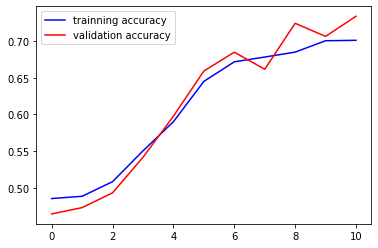

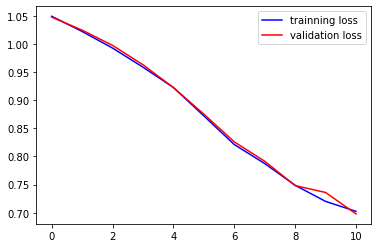

Epoch 1/12
163/163 [==============================] - 3s 16ms/step - loss: 1.0656 - accuracy: 0.4617 - val_loss: 1.0636 - val_accuracy: 0.4645
Epoch 2/12
163/163 [==============================] - 2s 13ms/step - loss: 1.0448 - accuracy: 0.4850 - val_loss: 1.0518 - val_accuracy: 0.4645
Epoch 3/12
163/163 [==============================] - 3s 19ms/step - loss: 1.0313 - accuracy: 0.4850 - val_loss: 1.0396 - val_accuracy: 0.4645
Epoch 4/12
163/163 [==============================] - 3s 17ms/step - loss: 1.0131 - accuracy: 0.4873 - val_loss: 1.0243 - val_accuracy: 0.4647
Epoch 5/12
163/163 [==============================] - 2s 14ms/step - loss: 0.9957 - accuracy: 0.4948 - val_loss: 1.0043 - val_accuracy: 0.4979
Epoch 6/12
163/163 [==============================] - 3s 17ms/step - loss: 0.9666 - accuracy: 0.5332 - val_loss: 0.9758 - val_accuracy: 0.5334
Epoch 7/12
163/163 [==============================] - 2s 13ms/step - loss: 0.9324 - accuracy: 0.5809 - val_loss: 0.9408 - val_accuracy: 0.6064

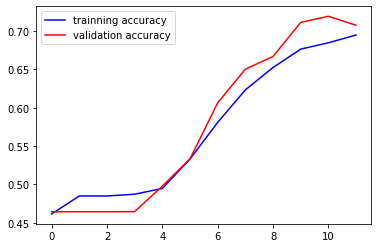

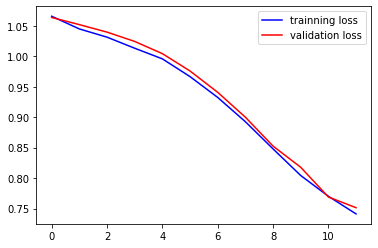

Epoch 1/13
163/163 [==============================] - 3s 16ms/step - loss: 1.0562 - accuracy: 0.4780 - val_loss: 1.0594 - val_accuracy: 0.4645
Epoch 2/13
163/163 [==============================] - 3s 17ms/step - loss: 1.0358 - accuracy: 0.4850 - val_loss: 1.0434 - val_accuracy: 0.4645
Epoch 3/13
163/163 [==============================] - 3s 18ms/step - loss: 1.0203 - accuracy: 0.4862 - val_loss: 1.0276 - val_accuracy: 0.4654
Epoch 4/13
163/163 [==============================] - 3s 18ms/step - loss: 0.9961 - accuracy: 0.4994 - val_loss: 1.0026 - val_accuracy: 0.4885
Epoch 5/13
163/163 [==============================] - 2s 13ms/step - loss: 0.9724 - accuracy: 0.5263 - val_loss: 0.9776 - val_accuracy: 0.5075
Epoch 6/13
163/163 [==============================] - 2s 13ms/step - loss: 0.9389 - accuracy: 0.5736 - val_loss: 0.9458 - val_accuracy: 0.5686
Epoch 7/13
163/163 [==============================] - 2s 13ms/step - loss: 0.8981 - accuracy: 0.6212 - val_loss: 0.9045 - val_accuracy: 0.6170

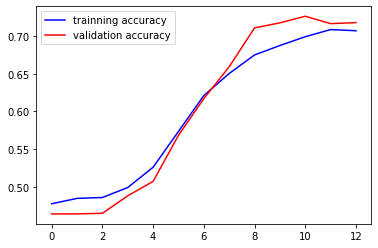

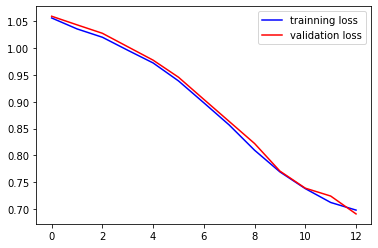

Epoch 1/14
163/163 [==============================] - 4s 18ms/step - loss: 1.0539 - accuracy: 0.4787 - val_loss: 1.0540 - val_accuracy: 0.4645
Epoch 2/14
163/163 [==============================] - 3s 17ms/step - loss: 1.0281 - accuracy: 0.4856 - val_loss: 1.0351 - val_accuracy: 0.4645
Epoch 3/14
163/163 [==============================] - 2s 14ms/step - loss: 1.0059 - accuracy: 0.4937 - val_loss: 1.0131 - val_accuracy: 0.4645
Epoch 4/14
163/163 [==============================] - 3s 17ms/step - loss: 0.9784 - accuracy: 0.5213 - val_loss: 0.9865 - val_accuracy: 0.4764
Epoch 5/14
163/163 [==============================] - 2s 15ms/step - loss: 0.9435 - accuracy: 0.5771 - val_loss: 0.9592 - val_accuracy: 0.4953
Epoch 6/14
163/163 [==============================] - 3s 16ms/step - loss: 0.9081 - accuracy: 0.6146 - val_loss: 0.9264 - val_accuracy: 0.5133
Epoch 7/14
163/163 [==============================] - 3s 16ms/step - loss: 0.8595 - accuracy: 0.6457 - val_loss: 0.8717 - val_accuracy: 0.6977

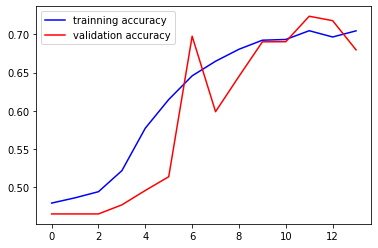

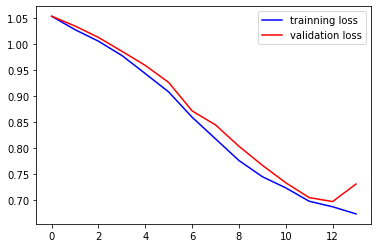

Epoch 1/15
163/163 [==============================] - 3s 17ms/step - loss: 1.0568 - accuracy: 0.4657 - val_loss: 1.0558 - val_accuracy: 0.4645
Epoch 2/15
163/163 [==============================] - 2s 14ms/step - loss: 1.0348 - accuracy: 0.4852 - val_loss: 1.0430 - val_accuracy: 0.4645
Epoch 3/15
163/163 [==============================] - 2s 15ms/step - loss: 1.0147 - accuracy: 0.4887 - val_loss: 1.0291 - val_accuracy: 0.4713
Epoch 4/15
163/163 [==============================] - 3s 17ms/step - loss: 0.9942 - accuracy: 0.5015 - val_loss: 1.0096 - val_accuracy: 0.5194
Epoch 5/15
163/163 [==============================] - 3s 18ms/step - loss: 0.9643 - accuracy: 0.5422 - val_loss: 0.9817 - val_accuracy: 0.6023
Epoch 6/15
163/163 [==============================] - 2s 14ms/step - loss: 0.9322 - accuracy: 0.5903 - val_loss: 0.9377 - val_accuracy: 0.5983
Epoch 7/15
163/163 [==============================] - 3s 17ms/step - loss: 0.8851 - accuracy: 0.6352 - val_loss: 0.9015 - val_accuracy: 0.6700

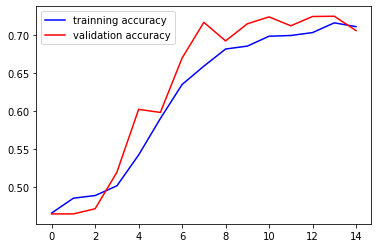

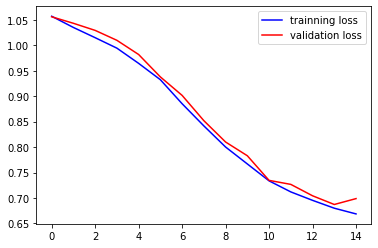

Epoch 1/16
163/163 [==============================] - 3s 17ms/step - loss: 1.0621 - accuracy: 0.4678 - val_loss: 1.0610 - val_accuracy: 0.4645
Epoch 2/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0423 - accuracy: 0.4850 - val_loss: 1.0513 - val_accuracy: 0.4645
Epoch 3/16
163/163 [==============================] - 2s 13ms/step - loss: 1.0299 - accuracy: 0.4850 - val_loss: 1.0383 - val_accuracy: 0.4645
Epoch 4/16
163/163 [==============================] - 2s 14ms/step - loss: 1.0137 - accuracy: 0.4860 - val_loss: 1.0247 - val_accuracy: 0.4645
Epoch 5/16
163/163 [==============================] - 2s 14ms/step - loss: 0.9923 - accuracy: 0.4967 - val_loss: 1.0038 - val_accuracy: 0.4864
Epoch 6/16
163/163 [==============================] - 3s 20ms/step - loss: 0.9614 - accuracy: 0.5366 - val_loss: 0.9801 - val_accuracy: 0.4984
Epoch 7/16
163/163 [==============================] - 2s 14ms/step - loss: 0.9319 - accuracy: 0.5855 - val_loss: 0.9464 - val_accuracy: 0.5338

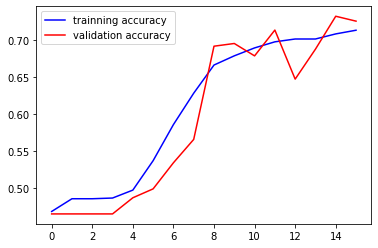

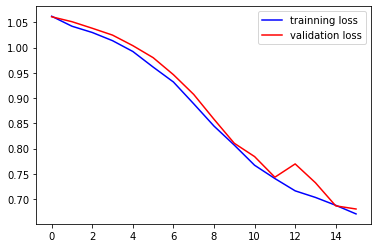

Epoch 1/17
163/163 [==============================] - 3s 17ms/step - loss: 1.0616 - accuracy: 0.4705 - val_loss: 1.0555 - val_accuracy: 0.4645
Epoch 2/17
163/163 [==============================] - 2s 14ms/step - loss: 1.0345 - accuracy: 0.4864 - val_loss: 1.0350 - val_accuracy: 0.4645
Epoch 3/17
163/163 [==============================] - 2s 13ms/step - loss: 1.0100 - accuracy: 0.4914 - val_loss: 1.0105 - val_accuracy: 0.4669
Epoch 4/17
163/163 [==============================] - 2s 13ms/step - loss: 0.9776 - accuracy: 0.5245 - val_loss: 0.9851 - val_accuracy: 0.5805
Epoch 5/17
163/163 [==============================] - 2s 14ms/step - loss: 0.9426 - accuracy: 0.5771 - val_loss: 0.9511 - val_accuracy: 0.6125
Epoch 6/17
163/163 [==============================] - 3s 16ms/step - loss: 0.9028 - accuracy: 0.6160 - val_loss: 0.9063 - val_accuracy: 0.6597
Epoch 7/17
163/163 [==============================] - 3s 19ms/step - loss: 0.8567 - accuracy: 0.6543 - val_loss: 0.8580 - val_accuracy: 0.6548

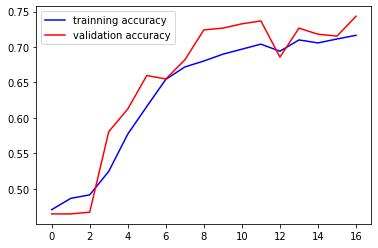

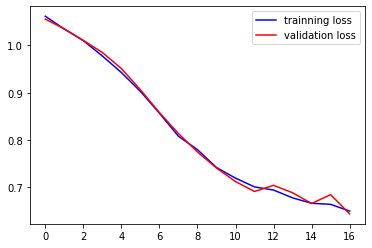

Epoch 1/18
163/163 [==============================] - 3s 17ms/step - loss: 1.0496 - accuracy: 0.4785 - val_loss: 1.0470 - val_accuracy: 0.4645
Epoch 2/18
163/163 [==============================] - 2s 13ms/step - loss: 1.0248 - accuracy: 0.4883 - val_loss: 1.0266 - val_accuracy: 0.4645
Epoch 3/18
163/163 [==============================] - 2s 13ms/step - loss: 0.9928 - accuracy: 0.5171 - val_loss: 1.0007 - val_accuracy: 0.4647
Epoch 4/18
163/163 [==============================] - 3s 17ms/step - loss: 0.9562 - accuracy: 0.5537 - val_loss: 0.9645 - val_accuracy: 0.5887
Epoch 5/18
163/163 [==============================] - 3s 20ms/step - loss: 0.9152 - accuracy: 0.6106 - val_loss: 0.9187 - val_accuracy: 0.6517
Epoch 6/18
163/163 [==============================] - 3s 17ms/step - loss: 0.8703 - accuracy: 0.6398 - val_loss: 0.8716 - val_accuracy: 0.6219
Epoch 7/18
163/163 [==============================] - 3s 18ms/step - loss: 0.8256 - accuracy: 0.6609 - val_loss: 0.8335 - val_accuracy: 0.7112

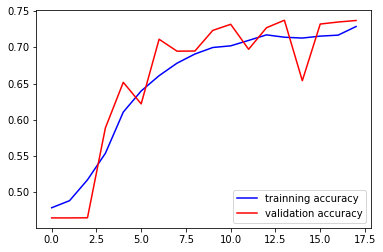

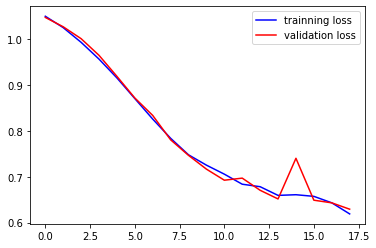

Epoch 1/19
163/163 [==============================] - 3s 17ms/step - loss: 1.0525 - accuracy: 0.4824 - val_loss: 1.0547 - val_accuracy: 0.4645
Epoch 2/19
163/163 [==============================] - 2s 15ms/step - loss: 1.0267 - accuracy: 0.4858 - val_loss: 1.0357 - val_accuracy: 0.4645
Epoch 3/19
163/163 [==============================] - 3s 16ms/step - loss: 1.0040 - accuracy: 0.4975 - val_loss: 1.0138 - val_accuracy: 0.4746
Epoch 4/19
163/163 [==============================] - 2s 15ms/step - loss: 0.9741 - accuracy: 0.5295 - val_loss: 0.9890 - val_accuracy: 0.6092
Epoch 5/19
163/163 [==============================] - 2s 14ms/step - loss: 0.9434 - accuracy: 0.5700 - val_loss: 0.9541 - val_accuracy: 0.6377
Epoch 6/19
163/163 [==============================] - 3s 17ms/step - loss: 0.8998 - accuracy: 0.6173 - val_loss: 0.9081 - val_accuracy: 0.6174
Epoch 7/19
163/163 [==============================] - 3s 17ms/step - loss: 0.8534 - accuracy: 0.6511 - val_loss: 0.8600 - val_accuracy: 0.6414

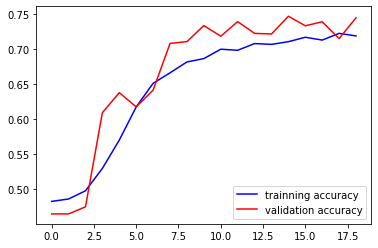

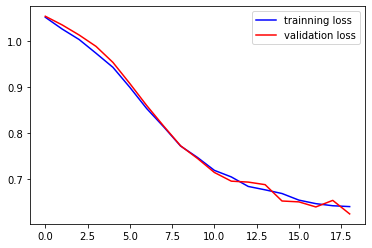

In [ ]:
from keras.saving.legacy.serialization import DisableSharedObjectScope
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#-------------------------------------------
#   Q4 CNN
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
import matplotlib.pyplot as plt
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if img.find("virus") !=-1:
                  data.append([new_array, 2])
                else:
                  data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:

    if(i[1] == 0):
        l.append("Normal")
    elif(i[1] == 1):
        l.append("Bacteria")
    else:
        l.append("Virus")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
#model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#history = model.fit(X_train, y_train, epochs=10,batch_size = 32, validation_data=(X_val, y_val))

#optimizers = [tf.keras.optimizers.SGD(), tf.keras.optimizers.SGD(momentum=0.9), tf.keras.optimizers.Adam(), tf.keras.optimizers.RMSprop()]
from keras.optimizers import SGD,Adam,RMSprop
optimizers=[SGD,Adam,RMSprop]
# Define a list of learning rates to test
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Define the number of epochs to train each model


# Train the model for each combination of optimization algorithm and learning rate
for optimizer in optimizers:
    for learning_rate in learning_rates:
        for epochs in range(10 ,20,1):
            model = Sequential()

            model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(2, 2))
            model.add(Dropout(0.25))

            model.add(Conv2D(128, (3, 3), padding="same"))
            model.add(Activation("relu"))
            model.add(MaxPooling2D(2, 2))
            model.add(Dropout(0.25))


            model.add(Flatten())
            model.add(Dense(512, activation="relu"))

            model.add(Dense(3, activation="softmax"))
            

            model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learning_rate), metrics=["accuracy"])
            history = model.fit(X_train, y_train, epochs=epochs,batch_size = 32, validation_data=(X_val, y_val))
            scores = model.evaluate(X_test, y_test)
            print('Optimizer:', optimizer, 'Learning rate:', learning_rate)
             # scores
            print("Test loss {}".format(scores[0]))
            print("Test accuracy {}".format(scores[1]))
            # visualization

            accuracy = history.history['accuracy']
            val_accuracy = history.history['val_accuracy']
            loss = history.history['loss']
            val_loss = history.history['val_loss']
            epochs = range(len(accuracy))

            plt.plot(epochs, accuracy, "b", label="trainning accuracy")
            plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
            plt.legend()
            plt.show()

            plt.plot(epochs, loss, "b", label="trainning loss")
            plt.plot(epochs, val_loss, "r", label="validation loss")
            plt.legend()
            plt.show()

for learning_rate in learning_rates:
    for epochs in range(10 ,20,1):
        model = Sequential()

        model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(2, 2))
        model.add(Dropout(0.25))

        model.add(Conv2D(128, (3, 3), padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(2, 2))
        model.add(Dropout(0.25))


        model.add(Flatten())
        model.add(Dense(512, activation="relu"))

        model.add(Dense(3, activation="softmax"))

        model.compile(loss="sparse_categorical_crossentropy", optimizer=SGD(learning_rate=learning_rate,momentum=0.9), metrics=["accuracy"])
        history = model.fit(X_train, y_train, epochs=epochs,batch_size = 32, validation_data=(X_val, y_val))
        scores = model.evaluate(X_test, y_test)
        print('Optimizer:', "sgd with 0.9 momentom", 'Learning rate:', learning_rate)
        # scores
        print("Test loss {}".format(scores[0]))
        print("Test accuracy {}".format(scores[1]))
        # visualization

        accuracy = history.history['accuracy']
        val_accuracy = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(len(accuracy))

        plt.plot(epochs, accuracy, "b", label="trainning accuracy")
        plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
        plt.legend()
        plt.show()

        plt.plot(epochs, loss, "b", label="trainning loss")
        plt.plot(epochs, val_loss, "r", label="validation loss")
        plt.legend()
        plt.show()

['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-13-f664cec58cb0>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 50, 50, 64)        1792      
                                                                 
 activation_12 (Activation)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 25, 25, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 activation_13 (Activation)  (None, 25, 25, 128)       0         
                                                      

Test loss 0.26765331625938416
Test accuracy 0.9506766200065613


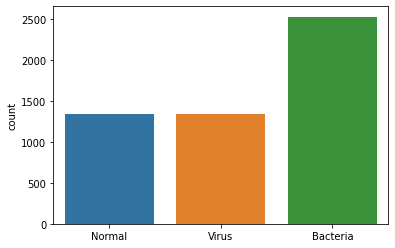

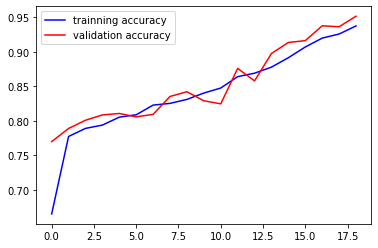

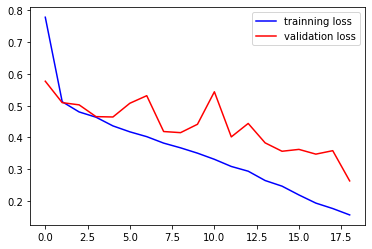

176/176 [==============================] - 1s 4ms/step


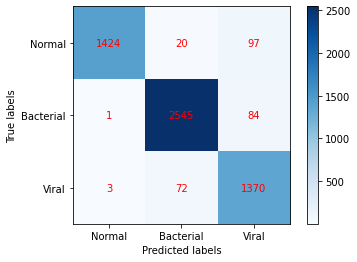

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#-------------------------------------------
#   q4
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD,Adam,RMSprop
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if img.find("virus") !=-1:
                  data.append([new_array, 2])
                else:
                  data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:

    if(i[1] == 0):
        l.append("Normal")
    elif(i[1] == 1):
        l.append("Bacteria")
    else:
        l.append("Virus")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD,Adam,RMSprop
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(3, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=19,batch_size = 32, validation_data=(X_val, y_val))
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
from datetime import datetime

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1, 2], ['Normal', 'Bacterial', 'Viral'])
plt.yticks([0, 1, 2], ['Normal', 'Bacterial', 'Viral'])
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()

['chest_xray']
['chest_xray']
OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



<ipython-input-15-c5fc80767067>:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.6.0) /io/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 activation_16 (Activation)  (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 25, 25, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 activation_17 (Activation)  (None, 25, 25, 128)       0         
                                                      

Test loss 0.3028269410133362
Test accuracy 0.937856137752533


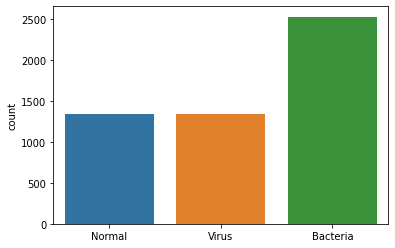

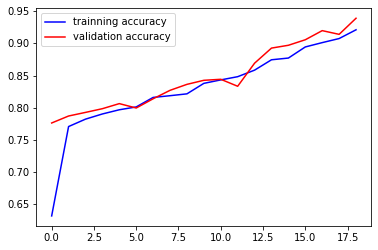

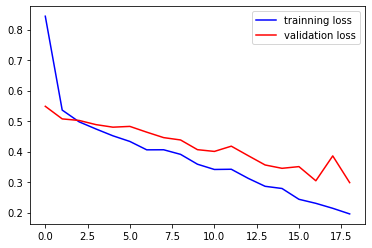

176/176 [==============================] - 1s 3ms/step


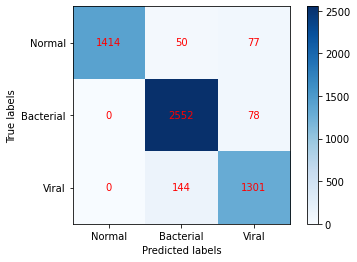

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#-------------------------------------------
#   q4
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os
from keras.callbacks import EarlyStopping
from keras.optimizers import SGD,Adam,RMSprop
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
print(os.listdir("chest_xray_new"))
DIR = (os.listdir("chest_xray_new"))

print(DIR)
train_folder = '/content/chest_xray_new/chest_xray/train'
test_folder = '/content/chest_xray_new/chest_xray/test'
val_folder = '/content/chest_xray_new/chest_xray/val'
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 50 # resize image
data = []
def get_data_train(data_dir):
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                if img.find("virus") !=-1:
                  data.append([new_array, 2])
                else:
                  data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data_train(train_folder)
test = get_data_train(test_folder)
val = get_data_train(val_folder)
l = []
for i in train:

    if(i[1] == 0):
        l.append("Normal")
    elif(i[1] == 1):
        l.append("Bacteria")
    else:
        l.append("Virus")
        
sns.countplot(l)
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.array(y_test)
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD,Adam,RMSprop
model = Sequential()

model.add(Conv2D(64, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(3, activation="softmax"))
model.summary()
early_stopping_monitor = EarlyStopping(patience = 4, monitor = "val_loss", mode="auto", verbose = 2)
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=19,batch_size = 32, validation_data=(X_val, y_val),callbacks=[early_stopping_monitor])
scores = model.evaluate(X_test, y_test)

model.save("cnn.model")
# scores
print("Test loss {}".format(scores[0]))
print("Test accuracy {}".format(scores[1]))
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure()
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()
from datetime import datetime

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([0, 1, 2], ['Normal', 'Bacterial', 'Viral'])
plt.yticks([0, 1, 2], ['Normal', 'Bacterial', 'Viral'])
plt.colorbar()
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="red")
plt.show()